In [1]:
# pip install dictdiffer
import dictdiffer 
import random

import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
sns.set_context('paper')
sns.set(font_scale=1.5)


import warnings
warnings.filterwarnings('ignore')


import h2o
h2o.init(min_mem_size='26G')


DATA_LOCATION  = "../../data/"
MODELS_LOCATION = "../../models/"


Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "1.8.0_265"; OpenJDK Runtime Environment (build 1.8.0_265-8u265-b01-0ubuntu2~16.04-b01); OpenJDK 64-Bit Server VM (build 25.265-b01, mixed mode)
  Starting server from /anaconda/envs/azureml_py36/lib/python3.6/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp0tezywcf
  JVM stdout: /tmp/tmp0tezywcf/h2o_azureuser_started_from_python.out
  JVM stderr: /tmp/tmp0tezywcf/h2o_azureuser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


--------------------------  ------------------------------------------------------------------
H2O_cluster_uptime:         06 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.30.0.4
H2O_cluster_version_age:    5 months and 17 days !!!
H2O_cluster_name:           H2O_from_python_azureuser_3atzjk
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    24.92 Gb
H2O_cluster_total_cores:    4
H2O_cluster_allowed_cores:  4
H2O_cluster_status:         accepting new members, healthy
H2O_connection_url:         http://127.0.0.1:54321
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
H2O_API_Extensions:         Amazon S3, XGBoost, Algos, AutoML, Core V3, TargetEncoder, Core V4
Python_version:             3.6.9 final
--------------------------  ------------------------------------------------------------------

## Models trained on ALL_FEATURES

In [7]:
train = h2o.import_file( DATA_LOCATION + "processed/final.train.tsv")
test = h2o.import_file( DATA_LOCATION + "processed/final.test.tsv")

# Identify predictors and response
train_predictor_cols = train.columns
train_response_col = "Resistance_Status"
train_predictor_cols.remove('SampleID')
train_predictor_cols.remove(train_response_col)
print("train frame - predictor column: ", train_predictor_cols[0], train_predictor_cols[-1])
print("train frame - response column: ", train_response_col)



# Identify predictors and response
test_predictor_cols = test.columns
test_response_col = "Resistance_Status"
test_predictor_cols.remove('SampleID')
test_predictor_cols.remove(test_response_col)
print("test frame - predictor columns: ", test_predictor_cols[0], test_predictor_cols[-1])
print("test frame - response column: ", test_response_col)



Parse progress: |██████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
train frame - predictor column:  NC000962_3.22 NC000962_3.4411327
train frame - response column:  Resistance_Status
test frame - predictor columns:  NC000962_3.22 NC000962_3.4411327
test frame - response column:  Resistance_Status


In [8]:

# For binary classification, response should be a factor
train[train_response_col] = train[train_response_col].asfactor()
test[test_response_col] = test[test_response_col].asfactor()


# Number of CV folds (to generate level-one data for stacking)
nfolds = 5

MAX_GRID_MODELS = 10


x = train_predictor_cols
y = train_response_col




In [4]:
top_dl= h2o.load_model(MODELS_LOCATION + "ALL_FEATURES/FINAL/top_dl/DeepLearning_model_python_1605423034668_341")
top_drf= h2o.load_model(MODELS_LOCATION + "ALL_FEATURES/FINAL/top_drf/DRF_model_python_1605423034668_386")
top_gbm= h2o.load_model(MODELS_LOCATION + "ALL_FEATURES/FINAL/top_gbm/GBM_model_python_1605423034668_39")
top_glm= h2o.load_model(MODELS_LOCATION + "ALL_FEATURES/FINAL/top_glm/GLM_model_python_1605423034668_20")
top_nb= h2o.load_model(MODELS_LOCATION + "ALL_FEATURES/FINAL/top_nb/NaiveBayes_model_python_1605423034668_1")
top_xgb= h2o.load_model(MODELS_LOCATION + "ALL_FEATURES/FINAL/top_xgb/XGBoost_model_python_1605423034668_274")



# top_ensemble_ALL_MODELS_METALEARNER_auto= h2o.load_model(MODELS_LOCATION + "ALL_FEATURES/FINAL/top_ensemble_ALL_MODELS_METALEARNER_auto/stacked_ensemble_ALL_FEATURES_ALL_MODELS_metalearner_auto")
top_ensemble_ALL_MODELS_METALEARNER_deeplearning= h2o.load_model(MODELS_LOCATION + "ALL_FEATURES/FINAL/top_ensemble_ALL_MODELS_METALEARNER_deeplearning/stacked_ensemble_ALL_FEATURES_ALL_MODELS_metalearner_deeplearning")
top_ensemble_ALL_MODELS_METALEARNER_drf= h2o.load_model(MODELS_LOCATION + "ALL_FEATURES/FINAL/top_ensemble_ALL_MODELS_METALEARNER_drf/stacked_ensemble_ALL_FEATURES_ALL_MODELS_metalearner_drf")
top_ensemble_ALL_MODELS_METALEARNER_gbm= h2o.load_model(MODELS_LOCATION + "ALL_FEATURES/FINAL/top_ensemble_ALL_MODELS_METALEARNER_gbm/stacked_ensemble_ALL_FEATURES_ALL_MODELS_metalearner_gbm")
top_ensemble_ALL_MODELS_METALEARNER_glm= h2o.load_model(MODELS_LOCATION + "ALL_FEATURES/FINAL/top_ensemble_ALL_MODELS_METALEARNER_glm/stacked_ensemble_ALL_FEATURES_ALL_MODELS_metalearner_glm")
top_ensemble_ALL_MODELS_METALEARNER_naivebayes= h2o.load_model(MODELS_LOCATION + "ALL_FEATURES/FINAL/top_ensemble_ALL_MODELS_METALEARNER_naivebayes/stacked_ensemble_ALL_FEATURES_ALL_MODELS_metalearner_naivebayes")
top_ensemble_ALL_MODELS_METALEARNER_xgboost= h2o.load_model(MODELS_LOCATION + "ALL_FEATURES/FINAL/top_ensemble_ALL_MODELS_METALEARNER_xgboost/stacked_ensemble_ALL_FEATURES_ALL_MODELS_metalearner_xgboost")


# top_ensemble_CHECKPOINT_MODELS_METALEARNER_auto= h2o.load_model(MODELS_LOCATION + "ALL_FEATURES/FINAL/top_ensemble_CHECKPOINT_MODELS_METALEARNER_auto/stacked_ensemble_ALL_FEATURES_CHECKPOINT_MODELS_metalearner_auto")
top_ensemble_CHECKPOINT_MODELS_METALEARNER_deeplearning= h2o.load_model(MODELS_LOCATION + "ALL_FEATURES/FINAL/top_ensemble_CHECKPOINT_MODELS_METALEARNER_deeplearning/stacked_ensemble_ALL_FEATURES_CHECKPOINT_MODELS_metalearner_deeplearning")
top_ensemble_CHECKPOINT_MODELS_METALEARNER_drf= h2o.load_model(MODELS_LOCATION + "ALL_FEATURES/FINAL/top_ensemble_CHECKPOINT_MODELS_METALEARNER_drf/stacked_ensemble_ALL_FEATURES_CHECKPOINT_MODELS_metalearner_drf")
top_ensemble_CHECKPOINT_MODELS_METALEARNER_gbm= h2o.load_model(MODELS_LOCATION + "ALL_FEATURES/FINAL/top_ensemble_CHECKPOINT_MODELS_METALEARNER_gbm/stacked_ensemble_ALL_FEATURES_CHECKPOINT_MODELS_metalearner_gbm")
top_ensemble_CHECKPOINT_MODELS_METALEARNER_glm= h2o.load_model(MODELS_LOCATION + "ALL_FEATURES/FINAL/top_ensemble_CHECKPOINT_MODELS_METALEARNER_glm/stacked_ensemble_ALL_FEATURES_CHECKPOINT_MODELS_metalearner_glm")
top_ensemble_CHECKPOINT_MODELS_METALEARNER_naivebayes= h2o.load_model(MODELS_LOCATION + "ALL_FEATURES/FINAL/top_ensemble_CHECKPOINT_MODELS_METALEARNER_naivebayes/stacked_ensemble_ALL_FEATURES_CHECKPOINT_MODELS_metalearner_naivebayes")
top_ensemble_CHECKPOINT_MODELS_METALEARNER_xgboost= h2o.load_model(MODELS_LOCATION + "ALL_FEATURES/FINAL/top_ensemble_CHECKPOINT_MODELS_METALEARNER_xgboost/stacked_ensemble_ALL_FEATURES_CHECKPOINT_MODELS_metalearner_xgboost")


# top_ensemble_CHECKPOINT_nogbm_MODELS_METALEARNER_auto= h2o.load_model(MODELS_LOCATION + "ALL_FEATURES/FINAL/top_ensemble_CHECKPOINT_nogbm_MODELS_METALEARNER_auto/stacked_ensemble_ALL_FEATURES_CHECKPOINT_nogbm_MODELS_metalearner_auto")
top_ensemble_CHECKPOINT_nogbm_MODELS_METALEARNER_deeplearning= h2o.load_model(MODELS_LOCATION + "ALL_FEATURES/FINAL/top_ensemble_CHECKPOINT_nogbm_MODELS_METALEARNER_deeplearning/stacked_ensemble_ALL_FEATURES_CHECKPOINT_nogbm_MODELS_metalearner_deeplearning")
top_ensemble_CHECKPOINT_nogbm_MODELS_METALEARNER_drf= h2o.load_model(MODELS_LOCATION + "ALL_FEATURES/FINAL/top_ensemble_CHECKPOINT_nogbm_MODELS_METALEARNER_drf/stacked_ensemble_ALL_FEATURES_CHECKPOINT_nogbm_MODELS_metalearner_drf")
top_ensemble_CHECKPOINT_nogbm_MODELS_METALEARNER_gbm= h2o.load_model(MODELS_LOCATION + "ALL_FEATURES/FINAL/top_ensemble_CHECKPOINT_nogbm_MODELS_METALEARNER_gbm/stacked_ensemble_ALL_FEATURES_CHECKPOINT_nogbm_MODELS_metalearner_gbm")
top_ensemble_CHECKPOINT_nogbm_MODELS_METALEARNER_glm= h2o.load_model(MODELS_LOCATION + "ALL_FEATURES/FINAL/top_ensemble_CHECKPOINT_nogbm_MODELS_METALEARNER_glm/stacked_ensemble_ALL_FEATURES_CHECKPOINT_nogbm_MODELS_metalearner_glm")
top_ensemble_CHECKPOINT_nogbm_MODELS_METALEARNER_naivebayes= h2o.load_model(MODELS_LOCATION + "ALL_FEATURES/FINAL/top_ensemble_CHECKPOINT_nogbm_MODELS_METALEARNER_naivebayes/stacked_ensemble_ALL_FEATURES_CHECKPOINT_nogbm_MODELS_metalearner_naivebayes")
top_ensemble_CHECKPOINT_nogbm_MODELS_METALEARNER_xgboost= h2o.load_model(MODELS_LOCATION + "ALL_FEATURES/FINAL/top_ensemble_CHECKPOINT_nogbm_MODELS_METALEARNER_xgboost/stacked_ensemble_ALL_FEATURES_CHECKPOINT_nogbm_MODELS_metalearner_xgboost")



In [7]:
models_trained_on_all_features = [


top_dl,
top_drf,
top_gbm,
top_glm,
top_nb,
top_xgb, # index 5

top_ensemble_ALL_MODELS_METALEARNER_deeplearning,
top_ensemble_ALL_MODELS_METALEARNER_drf, # index 7
top_ensemble_ALL_MODELS_METALEARNER_gbm,
top_ensemble_ALL_MODELS_METALEARNER_glm,
top_ensemble_ALL_MODELS_METALEARNER_naivebayes,
top_ensemble_ALL_MODELS_METALEARNER_xgboost, # index 11

top_ensemble_CHECKPOINT_MODELS_METALEARNER_deeplearning,
top_ensemble_CHECKPOINT_MODELS_METALEARNER_drf, # index 14
top_ensemble_CHECKPOINT_MODELS_METALEARNER_gbm,
top_ensemble_CHECKPOINT_MODELS_METALEARNER_glm,
top_ensemble_CHECKPOINT_MODELS_METALEARNER_naivebayes,
top_ensemble_CHECKPOINT_MODELS_METALEARNER_xgboost, # index 18

top_ensemble_CHECKPOINT_nogbm_MODELS_METALEARNER_deeplearning,
top_ensemble_CHECKPOINT_nogbm_MODELS_METALEARNER_drf, # index 21
top_ensemble_CHECKPOINT_nogbm_MODELS_METALEARNER_gbm,
top_ensemble_CHECKPOINT_nogbm_MODELS_METALEARNER_glm,
top_ensemble_CHECKPOINT_nogbm_MODELS_METALEARNER_naivebayes, 
top_ensemble_CHECKPOINT_nogbm_MODELS_METALEARNER_xgboost, # index 25



]

models_trained_on_all_features_list = []
models_trained_on_all_features_dict = {}



for a_model in models_trained_on_all_features:
    test_performance = a_model.model_performance(valid= True)
    train_performance = a_model.model_performance(train= True)

    metrics_dict = {
        'test': {
            'auc': test_performance.auc(),
            'confusion_matrix': test_performance.confusion_matrix(),
            'accuracy': test_performance.accuracy(),
            'sensitivity': test_performance.sensitivity(),
            'specificity': test_performance.specificity(),
            'run_time': a_model.run_time,
            'precision': test_performance.precision(),
            'recall': test_performance.recall(),
            'fallout': test_performance.fallout(),
            'missrate': test_performance.missrate()
            # 'r2':
        },
        'train': {
            'auc': train_performance.auc(),
            'confusion_matrix': train_performance.confusion_matrix(),
            'accuracy': train_performance.accuracy(),
            'sensitivity': train_performance.sensitivity(),
            'specificity': train_performance.specificity(),
            'run_time': a_model.run_time,
            'precision': train_performance.precision(),
            'recall': train_performance.recall(),
            'fallout': train_performance.fallout(),
            'missrate': train_performance.missrate()
            # 'r2':
        }
    }

    models_trained_on_all_features_dict[a_model.model_id] = metrics_dict
    models_trained_on_all_features_list.append([a_model.model_id, metrics_dict])

    print('Model ID : ', a_model.model_id)
    print('AUC on train data: ', train_performance.auc())
    try:
        print('AUC on xval data: ', a_model.model_performance(xval= True).auc())
    except:
        print("No XVAL data")

    print('AUC on test data: ', test_performance.auc()) 
    print("\n============================")


Model ID :  DeepLearning_model_python_1605423034668_341
AUC on train data:  0.999991134751773
AUC on xval data:  0.9027482269503546
AUC on test data:  0.6180890841107924

Model ID :  DRF_model_python_1605423034668_386
AUC on train data:  0.9490741027227723
AUC on xval data:  0.9106057919621748
AUC on test data:  0.6008821287254511

Model ID :  GBM_model_python_1605423034668_39
AUC on train data:  0.9466164302600473
AUC on xval data:  0.9054151891252956
AUC on test data:  0.684212436925981

Model ID :  GLM_model_python_1605423034668_20
AUC on train data:  0.9719208037825059
AUC on xval data:  0.9118498817966902
AUC on test data:  0.7188169310632736

Model ID :  NaiveBayes_model_python_1605423034668_1
AUC on train data:  0.7209751773049646
AUC on xval data:  0.7146276595744682
AUC on test data:  0.6037862562166479

Model ID :  XGBoost_model_python_1605423034668_274
AUC on train data:  0.9818764775413712
AUC on xval data:  0.9238918439716312
AUC on test data:  0.7019820670127418

Model ID

In [29]:
top_ensemble_ALL_MODELS_METALEARNER_auto.model_performance()


ModelMetricsBinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.09771048803007454
RMSE: 0.31258676880199926
LogLoss: 0.3639383962459934
Null degrees of freedom: 1222
Residual degrees of freedom: 1217
Null deviance: 1577.310356148988
Residual deviance: 890.1933172176999
AIC: 902.1933172176999
AUC: 0.9993794326241136
AUCPR: 0.9997085968027083
Gini: 0.9987588652482271

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5494776426962991: 

Maximum Metrics: Maximum metrics at their respective thresholds

Gains/Lift Table: Avg response rate: 65.41 %, avg score: 63.83 %



0      1   Error            Rate
0      0  415.0    8.0  0.0189     (8.0/423.0)
1      1    2.0  798.0  0.0025     (2.0/800.0)
2  Total  417.0  806.0  0.0082   (10.0/1223.0)

metric  threshold       value    idx
0                        max f1   0.549478    0.993773  206.0
1                        max f2   0.549478    0.996006  206.0
2                  max f0point5   0.613630    0.996450  189.0
3                  max accuracy   0.573689    0.991823  199.0
4                 max precision   0.794796    1.000000    0.0
5                    max recall   0.413089    1.000000  297.0
6               max specificity   0.794796    1.000000    0.0
7              max absolute_mcc   0.573689    0.981956  199.0
8    max min_per_class_accuracy   0.583060    0.990544  198.0
9   max mean_per_class_accuracy   0.585395    0.992011  196.0
10                      max tns   0.794796  423.000000    0.0
11                      max fns   0.794796  798.000000    0.0
12                      max fps   0.330219  423.000000  399.0
13                      max tps   0.413089  800.000000  297.0
14                      max tnr   0.794796    1.000000    0.0
15                      max fnr   0.794796    0.997500    0.0
16                      max fpr   0.330219    1.000000  399.0
17                      max tpr   0.413089    1.000000  297.0

group  cumulative_data_fraction  lower_threshold      lift  \
0         1                  0.010630         0.793275  1.528750   
1         2                  0.020442         0.792464  1.528750   
2         3                  0.030253         0.792134  1.528750   
3         4                  0.040065         0.791823  1.528750   
4         5                  0.050695         0.791645  1.528750   
5         6                  0.100572         0.790610  1.528750   
6         7                  0.150450         0.789648  1.528750   
7         8                  0.200327         0.787434  1.528750   
8         9                  0.300082         0.776433  1.528750   
9        10                  0.399836         0.763770  1.528750   
10       11                  0.500409         0.747679  1.528750   
11       12                  0.600164         0.703589  1.528750   
12       13                  0.699918         0.495032  0.814498   
13       14                  0.799673         0.395909  0.012531   
14       15                  0.899428         0.362402  0.000000   
15       16                  1.000000         0.330219  0.000000   

    cumulative_lift  response_rate     score  cumulative_response_rate  \
0          1.528750       1.000000  0.793784                  1.000000   
1          1.528750       1.000000  0.792836                  1.000000   
2          1.528750       1.000000  0.792269                  1.000000   
3          1.528750       1.000000  0.792022                  1.000000   
4          1.528750       1.000000  0.791730                  1.000000   
5          1.528750       1.000000  0.791121                  1.000000   
6          1.528750       1.000000  0.790120                  1.000000   
7          1.528750       1.000000  0.788818                  1.000000   
8          1.528750       1.000000  0.782152                  1.000000   
9          1.528750       1.000000  0.770250                  1.000000   
10         1.528750       1.000000  0.756839                  1.000000   
11         1.528750       1.000000  0.731379                  1.000000   
12         1.426952       0.532787  0.590499                  0.933411   
13         1.250511       0.008197  0.440888                  0.817996   
14         1.111818       0.000000  0.376748                  0.727273   
15         1.000000       0.000000  0.352875                  0.654129   

    cumulative_score  capture_rate  cumulative_capture_rate        gain  \
0           0.793784       0.01625                  0.01625   52.875000   
1           0.793329       0.01500                  0.03125   52.875000   
2           0.792985       0.01500                  0.04625   52.875000   
3           0.792749       0.01500                  0.06125   52.875000   
4           0.792535       0.01625                  0.07750   52.875000   
5           0.791834       0.07625                  0.15375   52.875000   
6           0.791266       0.07625                  0.23000   52.875000   
7           0.790656       0.07625                  0.30625   52.875000   
8           0.787829       0.15250                  0.45875   52.875000   
9           0.783443       0.15250                  0.61125   52.875000   
10          0.778096       0.15375                  0.76500   52.875000   
11          0.770331       0.15250                  0.91750   52.875000   
12          0.744701       0.08125                  0.99875  -18.550205   
13          0.706802       0.00125                  1.00000  -98.746926   
14          0.670196       0.00000                  1.00000 -100.000000   
15          0.638282       0.00000                  1.00000 -100.000000   

    cumulative_gain  
0         52.875000  
1         52.875000  
2         52.875000  
3         52.875000  
4         52.875000  
5         52.875000  
6         52.875000  
7         52.875000  
8         52.875000  
9         52.875000  
10        52.875000  
11        52.875000  
12        42.695239  
13    

In [27]:
top_ensemble_ALL_MODELS_METALEARNER_auto

Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  stacked_ensemble_ALL_FEATURES_ALL_MODELS_metalearner_auto

No model summary for this model

ModelMetricsBinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.09771048803007454
RMSE: 0.31258676880199926
LogLoss: 0.3639383962459934
Null degrees of freedom: 1222
Residual degrees of freedom: 1217
Null deviance: 1577.310356148988
Residual deviance: 890.1933172176999
AIC: 902.1933172176999
AUC: 0.9993794326241136
AUCPR: 0.9997085968027083
Gini: 0.9987588652482271

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5494776426962991: 


0      1   Error            Rate
0      0  415.0    8.0  0.0189     (8.0/423.0)
1      1    2.0  798.0  0.0025     (2.0/800.0)
2  Total  417.0  806.0  0.0082   (10.0/1223.0)


Maximum Metrics: Maximum metrics at their respective thresholds

Gains/Lift Table: Avg response rate: 65.41 %, avg score: 63.83 %


ModelMetricsBinomialGLM: stackedensemble
** Reported on validation data. **

MSE: 0.21084029195476606
RMSE: 0.4591734878613595
LogLoss: 0.608588153832287
Null degrees of freedom: 500
Residual degrees of freedom: 495
Null deviance: 633.0394016859412
Residual deviance: 609.8053301399516
AIC: 621.8053301399516
AUC: 0.6691563509638073
AUCPR: 0.8294215559954724
Gini: 0.33831270192761465

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.37771499146400145: 

Maximum Metrics: Maximum metrics at their respective thresholds

Gains/Lift Table: Avg response rate: 67.47 %, avg score: 65.03 %



metric  threshold       value    idx
0                        max f1   0.549478    0.993773  206.0
1                        max f2   0.549478    0.996006  206.0
2                  max f0point5   0.613630    0.996450  189.0
3                  max accuracy   0.573689    0.991823  199.0
4                 max precision   0.794796    1.000000    0.0
5                    max recall   0.413089    1.000000  297.0
6               max specificity   0.794796    1.000000    0.0
7              max absolute_mcc   0.573689    0.981956  199.0
8    max min_per_class_accuracy   0.583060    0.990544  198.0
9   max mean_per_class_accuracy   0.585395    0.992011  196.0
10                      max tns   0.794796  423.000000    0.0
11                      max fns   0.794796  798.000000    0.0
12                      max fps   0.330219  423.000000  399.0
13                      max tps   0.413089  800.000000  297.0
14                      max tnr   0.794796    1.000000    0.0
15                      max fnr   0.794796    0.997500    0.0
16                      max fpr   0.330219    1.000000  399.0
17                      max tpr   0.413089    1.000000  297.0

group  cumulative_data_fraction  lower_threshold      lift  \
0         1                  0.010630         0.793275  1.528750   
1         2                  0.020442         0.792464  1.528750   
2         3                  0.030253         0.792134  1.528750   
3         4                  0.040065         0.791823  1.528750   
4         5                  0.050695         0.791645  1.528750   
5         6                  0.100572         0.790610  1.528750   
6         7                  0.150450         0.789648  1.528750   
7         8                  0.200327         0.787434  1.528750   
8         9                  0.300082         0.776433  1.528750   
9        10                  0.399836         0.763770  1.528750   
10       11                  0.500409         0.747679  1.528750   
11       12                  0.600164         0.703589  1.528750   
12       13                  0.699918         0.495032  0.814498   
13       14                  0.799673         0.395909  0.012531   
14       15                  0.899428         0.362402  0.000000   
15       16                  1.000000         0.330219  0.000000   

    cumulative_lift  response_rate     score  cumulative_response_rate  \
0          1.528750       1.000000  0.793784                  1.000000   
1          1.528750       1.000000  0.792836                  1.000000   
2          1.528750       1.000000  0.792269                  1.000000   
3          1.528750       1.000000  0.792022                  1.000000   
4          1.528750       1.000000  0.791730                  1.000000   
5          1.528750       1.000000  0.791121                  1.000000   
6          1.528750       1.000000  0.790120                  1.000000   
7          1.528750       1.000000  0.788818                  1.000000   
8          1.528750       1.000000  0.782152                  1.000000   
9          1.528750       1.000000  0.770250                  1.000000   
10         1.528750       1.000000  0.756839                  1.000000   
11         1.528750       1.000000  0.731379                  1.000000   
12         1.426952       0.532787  0.590499                  0.933411   
13         1.250511       0.008197  0.440888                  0.817996   
14         1.111818       0.000000  0.376748                  0.727273   
15         1.000000       0.000000  0.352875                  0.654129   

    cumulative_score  capture_rate  cumulative_capture_rate        gain  \
0           0.793784       0.01625                  0.01625   52.875000   
1           0.793329       0.01500                  0.03125   52.875000   
2           0.792985       0.01500                  0.04625   52.875000   
3           0.792749       0.01500                  0.06125   52.875000   
4           0.792535       0.01625                  0.07750   52.875000   
5           0.791834       0.07625                  0.15375   52.875000   
6           0.791266       0.07625                  0.23000   52.875000   
7           0.790656       0.07625                  0.30625   52.875000   
8           0.787829       0.15250                  0.45875   52.875000   
9           0.783443       0.15250                  0.61125   52.875000   
10          0.778096       0.15375                  0.76500   52.875000   
11          0.770331       0.15250                  0.91750   52.875000   
12          0.744701       0.08125                  0.99875  -18.550205   
13          0.706802       0.00125                  1.00000  -98.746926   
14          0.670196       0.00000                  1.00000 -100.000000   
15          0.638282       0.00000                  1.00000 -100.000000   

    cumulative_gain  
0         52.875000  
1         52.875000  
2         52.875000  
3         52.875000  
4         52.875000  
5         52.875000  
6         52.875000  
7         52.875000  
8         52.875000  
9         52.875000  
10        52.875000  
11        52.875000  
12        42.695239  
13    

0      1   Error            Rate
0      0   9.0  154.0  0.9448   (154.0/163.0)
1      1   5.0  333.0  0.0148     (5.0/338.0)
2  Total  14.0  487.0  0.3174   (159.0/501.0)

metric  threshold       value    idx
0                        max f1   0.377715    0.807273  388.0
1                        max f2   0.355521    0.912035  399.0
2                  max f0point5   0.700738    0.752608  182.0
3                  max accuracy   0.377715    0.682635  388.0
4                 max precision   0.793857    1.000000    0.0
5                    max recall   0.355521    1.000000  399.0
6               max specificity   0.793857    1.000000    0.0
7              max absolute_mcc   0.743765    0.308793   80.0
8    max min_per_class_accuracy   0.694225    0.627219  197.0
9   max mean_per_class_accuracy   0.700738    0.648510  182.0
10                      max tns   0.793857  163.000000    0.0
11                      max fns   0.793857  337.000000    0.0
12                      max fps   0.356929  163.000000  398.0
13                      max tps   0.355521  338.000000  399.0
14                      max tnr   0.793857    1.000000    0.0
15                      max fnr   0.793857    0.997041    0.0
16                      max fpr   0.356929    1.000000  398.0
17                      max tpr   0.355521    1.000000  399.0

group  cumulative_data_fraction  lower_threshold      lift  \
0         1                  0.011976         0.792062  1.482249   
1         2                  0.021956         0.791339  1.482249   
2         3                  0.031936         0.789307  1.482249   
3         4                  0.041916         0.786784  1.482249   
4         5                  0.051896         0.780480  1.482249   
5         6                  0.101796         0.773671  1.422959   
6         7                  0.151697         0.764475  1.304379   
7         8                  0.201597         0.745134  1.482249   
8         9                  0.301397         0.725179  0.889349   
9        10                  0.401198         0.714111  1.096864   
10       11                  0.500998         0.700694  1.126509   
11       12                  0.600798         0.682295  0.652189   
12       13                  0.700599         0.639931  0.978284   
13       14                  0.800399         0.535757  0.681834   
14       15                  0.900200         0.412596  0.918994   
15       16                  1.000000         0.355521  0.800414   

    cumulative_lift  response_rate     score  cumulative_response_rate  \
0          1.482249           1.00  0.792563                  1.000000   
1          1.482249           1.00  0.791691                  1.000000   
2          1.482249           1.00  0.790669                  1.000000   
3          1.482249           1.00  0.788103                  1.000000   
4          1.482249           1.00  0.782919                  1.000000   
5          1.453185           0.96  0.776892                  0.980392   
6          1.404235           0.88  0.768851                  0.947368   
7          1.423546           1.00  0.755267                  0.960396   
8          1.246659           0.60  0.732057                  0.841060   
9          1.209397           0.74  0.718937                  0.815920   
10         1.192885           0.76  0.708734                  0.804781   
11         1.103069           0.44  0.692061                  0.744186   
12         1.085293           0.66  0.664029                  0.732194   
13         1.034986           0.46  0.579589                  0.698254   
14         1.022127           0.62  0.474064                  0.689579   
15         1.000000           0.54  0.385093                  0.674651   

    cumulative_score  capture_rate  cumulative_capture_rate       gain  \
0           0.792563      0.017751                 0.017751  48.224852   
1           0.792167      0.014793                 0.032544  48.224852   
2           0.791699      0.014793                 0.047337  48.224852   
3           0.790842      0.014793                 0.062130  48.224852   
4           0.789319      0.014793                 0.076923  48.224852   
5           0.783227      0.071006                 0.147929  42.295858   
6           0.778498      0.065089                 0.213018  30.437870   
7           0.772748      0.073964                 0.286982  48.224852   
8           0.759274      0.088757                 0.375740 -11.065089   
9           0.749240      0.109467                 0.485207   9.686391   
10          0.741171      0.112426                 0.597633  12.650888   
11          0.733013      0.065089                 0.662722 -34.781065   
12          0.723186      0.097633                 0.760355  -2.171598   
13          0.705281      0.068047                 0.828402 -31.816568   
14          0.679648      0.091716                 0.920118  -8.100592   
15          0.650251      0.079882                 1.000000 -19.958580   

    cumulative_gain  
0         48.224852  
1         48.224852  
2         48.224852  
3         48.224852  
4         48.224852  
5         45.318482  
6         40.423544  
7         42.354561  
8         24.665935  
9         20.939680  
10        19.288526  
11        10.306867  
12         8.529308  
13         3.498650  
1

In [9]:
    models_trained_on_all_features_dict


Confusion Matrix (Act/Pred) for max f1 @ threshold = 3.11800524538468e-09: 

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.6368022702966603: 

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.1517463897101641: 

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.6072912378111978: 

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3074193000474594: 

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.6015905236924759: 

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.1712486833340903: 

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5565447430944747: 

Confusion Matrix (Act/Pred) for max f1 @ threshold = 3.3427911446149027e-10: 

Confusion Matrix (Act/Pred) for max f1 @ threshold = 2.541621383875028e-06: 

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.14221715927124023: 


0      1   Error            Rate
0      0  5.0  158.0  0.9693   (158.0/163.0)
1      1  3.0  335.0  0.0089     (3.0/338.0)
2  Total  8.0  493.0  0.3214   (161.0/501.0)

0      1   Error           Rate
0      0  423.0    0.0     0.0    (0.0/423.0)
1      1    1.0  799.0  0.0013    (1.0/800.0)
2  Total  424.0  799.0  0.0008   (1.0/1223.0)

0      1   Error            Rate
0      0  4.0  159.0  0.9755   (159.0/163.0)
1      1  2.0  336.0  0.0059     (2.0/338.0)
2  Total  6.0  495.0  0.3214   (161.0/501.0)

0      1   Error            Rate
0      0  392.0   31.0  0.0733    (31.0/423.0)
1      1   41.0  759.0  0.0512    (41.0/800.0)
2  Total  433.0  790.0  0.0589   (72.0/1223.0)

0      1   Error            Rate
0      0  0.0  163.0     1.0   (163.0/163.0)
1      1  0.0  338.0     0.0     (0.0/338.0)
2  Total  0.0  501.0  0.3253   (163.0/501.0)

0      1   Error             Rate
0      0  335.0   88.0   0.208     (88.0/423.0)
1      1   63.0  737.0  0.0788     (63.0/800.0)
2  Total  398.0  825.0  0.1235   (151.0/1223.0)

0      1   Error            Rate
0      0  11.0  152.0  0.9325   (152.0/163.0)
1      1   3.0  335.0  0.0089     (3.0/338.0)
2  Total  14.0  487.0  0.3094   (155.0/501.0)

0      1   Error             Rate
0      0  370.0   53.0  0.1253     (53.0/423.0)
1      1   50.0  750.0  0.0625     (50.0/800.0)
2  Total  420.0  803.0  0.0842   (103.0/1223.0)

0      1   Error            Rate
0      0  0.0  163.0     1.0   (163.0/163.0)
1      1  0.0  338.0     0.0     (0.0/338.0)
2  Total  0.0  501.0  0.3253   (163.0/501.0)

0      1   Error             Rate
0      0  200.0  223.0  0.5272    (223.0/423.0)
1      1   93.0  707.0  0.1163     (93.0/800.0)
2  Total  293.0  930.0  0.2584   (316.0/1223.0)


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5440162618954977: 

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.37771499146400145: 

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5494776426962991: 

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.9870583973273163: 

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.9981992341987573: 

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.020000000000000018: 

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.37: 

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.05080996695315882: 

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.40381650068238023: 

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.08037685005249232: 

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4293619773119027: 

Confusion Matrix (Act/Pred) for max f1 @ threshold = 1.3669471107954381e-10: 

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.19908361432134863: 

Confusion Matrix (Act/Pred)

0      1   Error            Rate
0      0  11.0  152.0  0.9325   (152.0/163.0)
1      1   2.0  336.0  0.0059     (2.0/338.0)
2  Total  13.0  488.0  0.3074   (154.0/501.0)



Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.369933545589447: 

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.39925713213977515: 

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5859394245495759: 

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.9932920825086148: 

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.9976361730202669: 

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.0: 

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.37: 

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.060870771134760054: 

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.27289515281532856: 

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.07481890437564598: 

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.41224350385634856: 

Confusion Matrix (Act/Pred) for max f1 @ threshold = 1.406380559909144e-08: 

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.04266921661801123: 

Confusion Matrix (Act/Pred) for max f1 @ th

0      1   Error            Rate
0      0  399.0   24.0  0.0567    (24.0/423.0)
1      1   51.0  749.0  0.0638    (51.0/800.0)
2  Total  450.0  773.0  0.0613   (75.0/1223.0)

0      1   Error            Rate
0      0   9.0  154.0  0.9448   (154.0/163.0)
1      1   5.0  333.0  0.0148     (5.0/338.0)
2  Total  14.0  487.0  0.3174   (159.0/501.0)

0      1   Error            Rate
0      0  415.0    8.0  0.0189     (8.0/423.0)
1      1    2.0  798.0  0.0025     (2.0/800.0)
2  Total  417.0  806.0  0.0082   (10.0/1223.0)

0      1   Error            Rate
0      0  1.0  162.0  0.9939   (162.0/163.0)
1      1  0.0  338.0     0.0     (0.0/338.0)
2  Total  1.0  500.0  0.3234   (162.0/501.0)

0      1   Error            Rate
0      0  408.0   15.0  0.0355    (15.0/423.0)
1      1    3.0  797.0  0.0037     (3.0/800.0)
2  Total  411.0  812.0  0.0147   (18.0/1223.0)

0      1   Error            Rate
0      0  1.0  162.0  0.9939   (162.0/163.0)
1      1  0.0  338.0     0.0     (0.0/338.0)
2  Total  1.0  500.0  0.3234   (162.0/501.0)

0      1   Error            Rate
0      0  405.0   18.0  0.0426    (18.0/423.0)
1      1   19.0  781.0  0.0238    (19.0/800.0)
2  Total  424.0  799.0  0.0303   (37.0/1223.0)

0      1   Error            Rate
0      0  1.0  162.0  0.9939   (162.0/163.0)
1      1  0.0  338.0     0.0     (0.0/338.0)
2  Total  1.0  500.0  0.3234   (162.0/501.0)

0      1   Error            Rate
0      0  417.0    6.0  0.0142     (6.0/423.0)
1      1   17.0  783.0  0.0213    (17.0/800.0)
2  Total  434.0  789.0  0.0188   (23.0/1223.0)

0      1   Error            Rate
0      0  14.0  149.0  0.9141   (149.0/163.0)
1      1   7.0  331.0  0.0207     (7.0/338.0)
2  Total  21.0  480.0  0.3114   (156.0/501.0)

0      1   Error            Rate
0      0  411.0   12.0  0.0284    (12.0/423.0)
1      1   16.0  784.0    0.02    (16.0/800.0)
2  Total  427.0  796.0  0.0229   (28.0/1223.0)

0      1   Error            Rate
0      0  0.0  163.0     1.0   (163.0/163.0)
1      1  0.0  338.0     0.0     (0.0/338.0)
2  Total  0.0  501.0  0.3253   (163.0/501.0)

0      1   Error            Rate
0      0  415.0    8.0  0.0189     (8.0/423.0)
1      1   37.0  763.0  0.0462    (37.0/800.0)
2  Total  452.0  771.0  0.0368   (45.0/1223.0)



Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.9997507803824165: 

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.006666666269302346: 

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.36888239458203315: 

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.047321408134693994: 

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.23272842901553925: 

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.06944972591664633: 

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.45406422107008587: 

Confusion Matrix (Act/Pred) for max f1 @ threshold = 6.216652648585759e-07: 

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.08788499405232429: 

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.006913866847753525: 

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5575309991836548: 


0      1   Error            Rate
0      0  3.0  160.0  0.9816   (160.0/163.0)
1      1  0.0  338.0     0.0     (0.0/338.0)
2  Total  3.0  498.0  0.3194   (160.0/501.0)

0      1   Error            Rate
0      0  408.0   15.0  0.0355    (15.0/423.0)
1      1   16.0  784.0    0.02    (16.0/800.0)
2  Total  424.0  799.0  0.0253   (31.0/1223.0)

0      1   Error            Rate
0      0  1.0  162.0  0.9939   (162.0/163.0)
1      1  0.0  338.0     0.0     (0.0/338.0)
2  Total  1.0  500.0  0.3234   (162.0/501.0)

0      1   Error           Rate
0      0  422.0    1.0  0.0024    (1.0/423.0)
1      1    1.0  799.0  0.0013    (1.0/800.0)
2  Total  423.0  800.0  0.0016   (2.0/1223.0)

0      1   Error            Rate
0      0  35.0  128.0  0.7853   (128.0/163.0)
1      1  20.0  318.0  0.0592    (20.0/338.0)
2  Total  55.0  446.0  0.2954   (148.0/501.0)

0      1   Error            Rate
0      0  406.0   17.0  0.0402    (17.0/423.0)
1      1   42.0  758.0  0.0525    (42.0/800.0)
2  Total  448.0  775.0  0.0482   (59.0/1223.0)

0      1   Error            Rate
0      0  0.0  163.0     1.0   (163.0/163.0)
1      1  0.0  338.0     0.0     (0.0/338.0)
2  Total  0.0  501.0  0.3253   (163.0/501.0)

0      1   Error            Rate
0      0  401.0   22.0   0.052    (22.0/423.0)
1      1   21.0  779.0  0.0262    (21.0/800.0)
2  Total  422.0  801.0  0.0352   (43.0/1223.0)

0      1   Error            Rate
0      0  7.0  156.0  0.9571   (156.0/163.0)
1      1  2.0  336.0  0.0059     (2.0/338.0)
2  Total  9.0  492.0  0.3154   (158.0/501.0)

0      1   Error            Rate
0      0  405.0   18.0  0.0426    (18.0/423.0)
1      1    8.0  792.0    0.01     (8.0/800.0)
2  Total  413.0  810.0  0.0213   (26.0/1223.0)

0      1   Error            Rate
0      0  13.0  150.0  0.9202   (150.0/163.0)
1      1   5.0  333.0  0.0148     (5.0/338.0)
2  Total  18.0  483.0  0.3094   (155.0/501.0)

0      1   Error            Rate
0      0  406.0   17.0  0.0402    (17.0/423.0)
1      1   14.0  786.0  0.0175    (14.0/800.0)
2  Total  420.0  803.0  0.0253   (31.0/1223.0)

0      1   Error            Rate
0      0  0.0  163.0     1.0   (163.0/163.0)
1      1  0.0  338.0     0.0     (0.0/338.0)
2  Total  0.0  501.0  0.3253   (163.0/501.0)

0      1   Error            Rate
0      0  413.0   10.0  0.0236    (10.0/423.0)
1      1   24.0  776.0    0.03    (24.0/800.0)
2  Total  437.0  786.0  0.0278   (34.0/1223.0)

0      1   Error            Rate
0      0  3.0  160.0  0.9816   (160.0/163.0)
1      1  0.0  338.0     0.0     (0.0/338.0)
2  Total  3.0  498.0  0.3194   (160.0/501.0)

0      1   Error            Rate
0      0  406.0   17.0  0.0402    (17.0/423.0)
1      1   26.0  774.0  0.0325    (26.0/800.0)
2  Total  432.0  791.0  0.0352   (43.0/1223.0)

0      1   Error            Rate
0      0  1.0  162.0  0.9939   (162.0/163.0)
1      1  0.0  338.0     0.0     (0.0/338.0)
2  Total  1.0  500.0  0.3234   (162.0/501.0)

0      1   Error           Rate
0      0  422.0    1.0  0.0024    (1.0/423.0)
1      1    1.0  799.0  0.0013    (1.0/800.0)
2  Total  423.0  800.0  0.0016   (2.0/1223.0)

0      1   Error            Rate
0      0  10.0  153.0  0.9387   (153.0/163.0)
1      1   5.0  333.0  0.0148     (5.0/338.0)
2  Total  15.0  486.0  0.3154   (158.0/501.0)

0      1   Error            Rate
0      0  407.0   16.0  0.0378    (16.0/423.0)
1      1   17.0  783.0  0.0213    (17.0/800.0)
2  Total  424.0  799.0   0.027   (33.0/1223.0)

0      1   Error            Rate
0      0  4.0  159.0  0.9755   (159.0/163.0)
1      1  1.0  337.0   0.003     (1.0/338.0)
2  Total  5.0  496.0  0.3194   (160.0/501.0)

0      1   Error            Rate
0      0  405.0   18.0  0.0426    (18.0/423.0)
1      1   17.0  783.0  0.0213    (17.0/800.0)
2  Total  422.0  801.0  0.0286   (35.0/1223.0)

0      1   Error            Rate
0      0  3.0  160.0  0.9816   (160.0/163.0)
1      1  0.0  338.0     0.0     (0.0/338.0)
2  Total  3.0  498.0  0.3194   (160.0/501.0)

0      1   Error            Rate
0      0  400.0   23.0  0.0544    (23.0/423.0)
1      1    8.0  792.0    0.01     (8.0/800.0)
2  Total  408.0  815.0  0.0253   (31.0/1223.0)

0      1   Error            Rate
0      0   7.0  156.0  0.9571   (156.0/163.0)
1      1   3.0  335.0  0.0089     (3.0/338.0)
2  Total  10.0  491.0  0.3174   (159.0/501.0)

0      1   Error            Rate
0      0  405.0   18.0  0.0426    (18.0/423.0)
1      1   21.0  779.0  0.0262    (21.0/800.0)
2  Total  426.0  797.0  0.0319   (39.0/1223.0)

0      1   Error            Rate
0      0  0.0  163.0     1.0   (163.0/163.0)
1      1  0.0  338.0     0.0     (0.0/338.0)
2  Total  0.0  501.0  0.3253   (163.0/501.0)

0      1   Error            Rate
0      0  421.0    2.0  0.0047     (2.0/423.0)
1      1   15.0  785.0  0.0187    (15.0/800.0)
2  Total  436.0  787.0  0.0139   (17.0/1223.0)

0      1   Error            Rate
0      0  2.0  161.0  0.9877   (161.0/163.0)
1      1  1.0  337.0   0.003     (1.0/338.0)
2  Total  3.0  498.0  0.3234   (162.0/501.0)

0      1   Error            Rate
0      0  415.0    8.0  0.0189     (8.0/423.0)
1      1   31.0  769.0  0.0387    (31.0/800.0)
2  Total  446.0  777.0  0.0319   (39.0/1223.0)

{'DeepLearning_model_python_1605423034668_341': {'test': {'auc': 0.6180890841107924,
   'confusion_matrix': ,
   'accuracy': [[3.11800524538468e-09, 0.6786427145708582]],
   'sensitivity': [[4.384807920429836e-14, 1.0]],
   'specificity': [[0.9999999959632739, 0.8834355828220859]],
   'run_time': 470361,
   'precision': [[0.9999999959632739, 0.822429906542056]],
   'recall': [[4.384807920429836e-14, 1.0]],
   'fallout': [[1.1153667748935455e-11, 1.0]],
   'missrate': [[0.9999999959632739, 0.7396449704142012]]},
  'train': {'auc': 0.999991134751773,
   'confusion_matrix': ,
   'accuracy': [[0.6368022702966603, 0.9991823385118561]],
   'sensitivity': [[0.14849952057942856, 1.0]],
   'specificity': [[0.9999999989611189, 1.0]],
   'run_time': 470361,
   'precision': [[0.9999999989611189, 1.0]],
   'recall': [[0.14849952057942856, 1.0]],
   'fallout': [[1.1769803523899671e-15, 1.0]],
   'missrate': [[0.9999999989611189, 0.10625]]}},
 'DRF_model_python_1605423034668_386': {'test': {'auc': 0.

In [8]:
for a_mdl in models_trained_on_all_features_list:
    
    print(a_mdl[0])
    print(a_mdl[1]['test']['accuracy'])
    print(a_mdl[1]['test']['auc'])
    print(a_mdl[1]['test']['run_time'])

    print("-----------------------------")

DeepLearning_model_python_1605423034668_341
[[3.11800524538468e-09, 0.6786427145708582]]
0.6180890841107924
470361
-----------------------------
DRF_model_python_1605423034668_386
[[0.32202096923050844, 0.6806387225548902]]
0.6008821287254511
1900902
-----------------------------
GBM_model_python_1605423034668_39
[[0.5200488385209365, 0.7005988023952096]]
0.684212436925981
71120
-----------------------------
GLM_model_python_1605423034668_20
[[0.1712486833340903, 0.6906187624750499]]
0.7188169310632736
6048
-----------------------------
NaiveBayes_model_python_1605423034668_1
[[3.9900264539838685e-05, 0.6946107784431138]]
0.6037862562166479
5211
-----------------------------
XGBoost_model_python_1605423034668_274
[[0.36545637249946594, 0.6926147704590818]]
0.7019820670127418
9638
-----------------------------
stacked_ensemble_ALL_FEATURES_ALL_MODELS_metalearner_deeplearning
[[0.9989392895198526, 0.6906187624750499]]
0.7236450430173885
54195
-----------------------------
stacked_ensembl

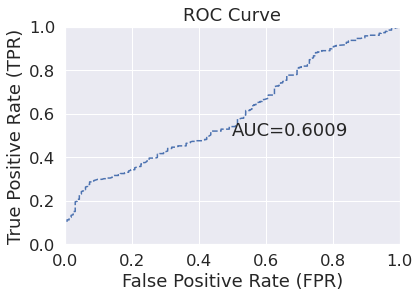

In [15]:
top_drf.model_performance(valid=True).plot()

In [37]:
top_nb.model_performance().precision()

[[0.9999831492105087, 0.89375]]

In [39]:
top_nb.model_performance(test).r2()

-0.529004196852279

In [59]:
top_drf.model_performance().confusion_matrix()


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.6458369548724031: 


0      1   Error             Rate
0      0  558.0  250.0  0.3094    (250.0/808.0)
1      1  133.0  667.0  0.1663    (133.0/800.0)
2  Total  691.0  917.0  0.2382   (383.0/1608.0)

''

In [32]:
top_drf.model_performance(test).confusion_matrix()


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4043096005966431: 


0      1   Error            Rate
0      0  0.0  163.0     1.0   (163.0/163.0)
1      1  0.0  338.0     0.0     (0.0/338.0)
2  Total  0.0  501.0  0.3253   (163.0/501.0)

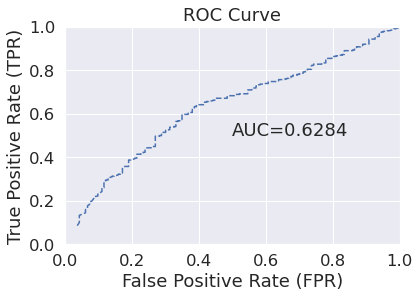

In [19]:
top_dl.model_performance(test).plot()

In [121]:
top_ensemble_CHECKPOINT_MODELS_MTLNR_auto.metalearner().params

{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'metalearner_AUTO_StackedEnsemble_model_python_1604937120558_594',
   'type': 'Key<Model>',
   'URL': '/3/Models/metalearner_AUTO_StackedEnsemble_model_python_1604937120558_594'}},
 'training_frame': {'default': None, 'actual': None},
 'validation_frame': {'default': None, 'actual': None},
 'nfolds': {'default': 0, 'actual': 0},
 'seed': {'default': -1, 'actual': -629306770440964306},
 'keep_cross_validation_models': {'default': True, 'actual': True},
 'keep_cross_validation_predictions': {'default': False, 'actual': False},
 'keep_cross_validation_fold_assignment': {'default': False, 'actual': False},
 'fold_assignment': {'default': 'AUTO', 'actual': 'AUTO'},
 'fold_column': {'default': None, 'actual': None},
 'response_column': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ColSpecifierV3',
    's

In [11]:
print('AUC on test data: ', top_nb.model_performance(test).auc(), "\n\n============================")
top_nb

AUC on test data:  0.6308581696736486 

Model Details
H2ONaiveBayesEstimator :  Naive Bayes
Model Key:  NaiveBayes_model_python_1604923471176_225


Model Summary: 


ModelMetricsBinomial: naivebayes
** Reported on train data. **

MSE: 0.27036993349759847
RMSE: 0.5199710890978444
LogLoss: 4.3907733111276475
Mean Per-Class Error: 0.28826979905437355
AUC: 0.751100768321513
AUCPR: 0.8346945181496381
Gini: 0.5022015366430259

Confusion Matrix (Act/Pred) for max f1 @ threshold = 2.4338228925939728e-05: 

Maximum Metrics: Maximum metrics at their respective thresholds

Gains/Lift Table: Avg response rate: 65.41 %, avg score: 57.68 %


ModelMetricsBinomial: naivebayes
** Reported on validation data. **

MSE: 0.33561203828422775
RMSE: 0.5793203244183892
LogLoss: 4.38842128604827
Mean Per-Class Error: 0.3850328529422442
AUC: 0.6308581696736486
AUCPR: 0.7700108089513915
Gini: 0.2617163393472972

Confusion Matrix (Act/Pred) for max f1 @ threshold = 9.018296132152746e-17: 

Maximum Metrics: Maximum

number_of_response_levels  min_apriori_probability  \
0                          2.0                 0.345896   

   max_apriori_probability  
0                 0.654104

0      1   Error             Rate
0      0  241.0  182.0  0.4303    (182.0/423.0)
1      1  152.0  648.0    0.19    (152.0/800.0)
2  Total  393.0  830.0  0.2731   (334.0/1223.0)

metric     threshold       value    idx
0                        max f1  2.433823e-05    0.795092  397.0
1                        max f2  6.252900e-08    0.904364  399.0
2                  max f0point5  9.490915e-02    0.799843  348.0
3                  max accuracy  9.490915e-02    0.728536  348.0
4                 max precision  9.999831e-01    0.893750    1.0
5                    max recall  6.252900e-08    1.000000  399.0
6               max specificity  9.999997e-01    0.919622    0.0
7              max absolute_mcc  9.490915e-02    0.414922  348.0
8    max min_per_class_accuracy  7.526658e-01    0.699764  277.0
9   max mean_per_class_accuracy  9.490915e-02    0.711730  348.0
10                      max tns  9.999997e-01  389.000000    0.0
11                      max fns  9.999997e-01  525.000000    0.0
12                      max fps  6.252900e-08  423.000000  399.0
13                      max tps  6.252900e-08  800.000000  399.0
14                      max tnr  9.999997e-01    0.919622    0.0
15                      max fnr  9.999997e-01    0.656250    0.0
16                      max fpr  6.252900e-08    1.000000  399.0
17                      max tpr  6.252900e-08    1.000000  399.0

group  cumulative_data_fraction  lower_threshold      lift  \
0         1                  0.102208     1.000000e+00  1.467600   
1         2                  0.150450     1.000000e+00  1.399195   
2         3                  0.200327     9.999999e-01  1.278135   
3         4                  0.300082     9.996645e-01  1.240543   
4         5                  0.399836     9.916471e-01  1.190420   
5         6                  0.500409     9.438170e-01  1.193171   
6         7                  0.600164     2.706567e-01  0.989928   
7         8                  0.699918     1.046298e-06  0.789436   
8         9                  0.799673     2.625813e-12  0.864621   
9        10                  0.899428     6.179552e-17  0.538822   
10       11                  1.000000     1.624480e-41  0.385295   

    cumulative_lift  response_rate         score  cumulative_response_rate  \
0          1.467600       0.960000  1.000000e+00                  0.960000   
1          1.445666       0.915254  1.000000e+00                  0.945652   
2          1.403954       0.836066  1.000000e+00                  0.918367   
3          1.349632       0.811475  9.999410e-01                  0.882834   
4          1.309911       0.778689  9.971887e-01                  0.856851   
5          1.286448       0.780488  9.761841e-01                  0.841503   
6          1.237163       0.647541  7.455082e-01                  0.809264   
7          1.173351       0.516393  4.702651e-02                  0.767523   
8          1.134839       0.565574  1.003969e-07                  0.742331   
9          1.068735       0.352459  1.329336e-13                  0.699091   
10         1.000000       0.252033  5.267744e-18                  0.654129   

    cumulative_score  capture_rate  cumulative_capture_rate       gain  \
0           1.000000       0.15000                  0.15000  46.760000   
1           1.000000       0.06750                  0.21750  39.919492   
2           1.000000       0.06375                  0.28125  27.813525   
3           0.999980       0.12375                  0.40500  24.054303   
4           0.999284       0.11875                  0.52375  19.042008   
5           0.994641       0.12000                  0.64375  19.317073   
6           0.953232       0.09875                  0.74250  -1.007172   
7           0.824077       0.07875                  0.82125 -21.056352   
8           0.721278       0.08625                  0.90750 -13.537910   
9           0.641282       0.05375                  0.96125 -46.117828   
10          0.576786       0.03875                  1.00000 -61.470528   

    cumulative_gain  
0         46.760000  
1         44.566576  
2         40.395408  
3         34.963215  
4         30.991053  
5         28.644812  
6         23.716281  
7         17.335134  
8         13.483896  
9          6.873523  
10         0.000000

0      1   Error            Rate
0      0  4.0  159.0  0.9755   (159.0/163.0)
1      1  2.0  336.0  0.0059     (2.0/338.0)
2  Total  6.0  495.0  0.3214   (161.0/501.0)

metric     threshold       value    idx
0                        max f1  9.018296e-17    0.806723  351.0
1                        max f2  1.103935e-27    0.912035  356.0
2                  max f0point5  5.856787e-04    0.737212  270.0
3                  max accuracy  4.350758e-16    0.678643  349.0
4                 max precision  9.999998e-01    0.846715    4.0
5                    max recall  1.103935e-27    1.000000  356.0
6               max specificity  1.000000e+00    0.877301    0.0
7              max absolute_mcc  9.999947e-01    0.226567   30.0
8    max min_per_class_accuracy  9.972941e-01    0.588957  123.0
9   max mean_per_class_accuracy  9.999947e-01    0.614967   30.0
10                      max tns  1.000000e+00  143.000000    0.0
11                      max fns  1.000000e+00  245.000000    0.0
12                      max fps  2.087760e-18  163.000000  355.0
13                      max tps  1.103935e-27  338.000000  356.0
14                      max tnr  1.000000e+00    0.877301    0.0
15                      max fnr  1.000000e+00    0.724852    0.0
16                      max fpr  2.087760e-18    1.000000  355.0
17                      max tpr  1.103935e-27    1.000000  356.0

group  cumulative_data_fraction  lower_threshold      lift  \
0         1                  0.035928     1.000000e+00  0.823471   
1         2                  0.041916     1.000000e+00  0.988166   
2         3                  0.051896     1.000000e+00  1.482249   
3         4                  0.101796     1.000000e+00  1.304379   
4         5                  0.151697     1.000000e+00  1.422959   
5         6                  0.201597     1.000000e+00  1.126509   
6         7                  0.301397     9.999991e-01  1.245089   
7         8                  0.401198     9.999738e-01  0.978284   
8         9                  0.500998     9.995045e-01  0.948639   
9        10                  0.600798     9.756694e-01  0.978284   
10       11                  0.700599     7.970543e-01  0.859704   
11       12                  0.800399     7.705696e-03  0.978284   
12       13                  0.900200     1.034812e-08  0.770769   
13       14                  1.000000     1.103935e-27  0.830059   

    cumulative_lift  response_rate         score  cumulative_response_rate  \
0          0.823471       0.555556  1.000000e+00                  0.555556   
1          0.846999       0.666667  1.000000e+00                  0.571429   
2          0.969162       1.000000  1.000000e+00                  0.653846   
3          1.133484       0.880000  1.000000e+00                  0.764706   
4          1.228706       0.960000  1.000000e+00                  0.828947   
5          1.203410       0.760000  1.000000e+00                  0.811881   
6          1.217211       0.840000  9.999998e-01                  0.821192   
7          1.157776       0.660000  9.999905e-01                  0.781095   
8          1.116115       0.640000  9.998360e-01                  0.752988   
9          1.093220       0.660000  9.911600e-01                  0.737542   
10         1.059955       0.580000  9.021262e-01                  0.715100   
11         1.049772       0.660000  3.823763e-01                  0.708229   
12         1.018840       0.520000  5.872073e-04                  0.687361   
13         1.000000       0.560000  1.156131e-09                  0.674651   

    cumulative_score  capture_rate  cumulative_capture_rate       gain  \
0           1.000000      0.029586                 0.029586 -17.652860   
1           1.000000      0.005917                 0.035503  -1.183432   
2           1.000000      0.014793                 0.050296  48.224852   
3           1.000000      0.065089                 0.115385  30.437870   
4           1.000000      0.071006                 0.186391  42.295858   
5           1.000000      0.056213                 0.242604  12.650888   
6           1.000000      0.124260                 0.366864  24.508876   
7           0.999998      0.097633                 0.464497  -2.171598   
8           0.999965      0.094675                 0.559172  -5.136095   
9           0.998503      0.097633                 0.656805  -2.171598   
10          0.984774      0.085799                 0.742604 -14.029586   
11          0.909662      0.097633                 0.840237  -2.171598   
12          0.808878      0.076923                 0.917160 -22.923077   
13          0.728151      0.082840                 1.000000 -16.994083   

    cumulative_gain  
0        -17.652860  
1        -15.300085  
2         -3.083751  
3         13.348416  
4         22.870601  
5         20.340969  
6         21.721071  
7         15.777621  
8         11.611542  
9          9.321984  
10         5.995549  
11         4.977202  
12         1.884045  
13         0.000000

0       1   Error             Rate
0      0  0.0   423.0     1.0    (423.0/423.0)
1      1  0.0   800.0     0.0      (0.0/800.0)
2  Total  0.0  1223.0  0.3459   (423.0/1223.0)

metric     threshold       value    idx
0                        max f1  3.107947e-10    0.790905  399.0
1                        max f2  3.107947e-10    0.904364  399.0
2                  max f0point5  6.877151e-04    0.755682  274.0
3                  max accuracy  2.923637e-08    0.680294  398.0
4                 max precision  1.000000e+00    0.841808    0.0
5                    max recall  3.107947e-10    1.000000  399.0
6               max specificity  1.000000e+00    0.867612    0.0
7              max absolute_mcc  6.877151e-04    0.301672  274.0
8    max min_per_class_accuracy  1.544699e-03    0.652482  263.0
9   max mean_per_class_accuracy  6.877151e-04    0.657559  274.0
10                      max tns  1.000000e+00  367.000000    0.0
11                      max fns  1.000000e+00  502.000000    0.0
12                      max fps  3.107947e-10  423.000000  399.0
13                      max tps  3.107947e-10  800.000000  399.0
14                      max tnr  1.000000e+00    0.867612    0.0
15                      max fnr  1.000000e+00    0.627500    0.0
16                      max fpr  3.107947e-10    1.000000  399.0
17                      max tpr  3.107947e-10    1.000000  399.0

group  cumulative_data_fraction  lower_threshold      lift  \
0         1                  0.119379     1.000000e+00  1.413570   
1         2                  0.152903     1.000000e+00  1.193171   
2         3                  0.200327     1.000000e+00  1.186099   
3         4                  0.300082     9.999999e-01  1.202951   
4         5                  0.399836     9.993061e-01  1.090174   
5         6                  0.500409     1.397471e-01  1.081311   
6         7                  0.600164     1.076027e-04  1.002459   
7         8                  0.699918     4.439823e-09  0.889682   
8         9                  0.799673     3.509020e-12  0.877152   
9        10                  0.899428     1.257580e-20  0.839559   
10       11                  1.000000     1.716001e-50  0.372866   

    cumulative_lift  response_rate         score  cumulative_response_rate  \
0          1.413570       0.924658  1.000000e+00                  0.924658   
1          1.365247       0.780488  1.000000e+00                  0.893048   
2          1.322837       0.775862  1.000000e+00                  0.865306   
3          1.282984       0.786885  1.000000e+00                  0.839237   
4          1.234880       0.713115  9.999141e-01                  0.807771   
5          1.204016       0.707317  8.368773e-01                  0.787582   
6          1.170514       0.655738  1.313929e-02                  0.765668   
7          1.130489       0.581967  1.451966e-05                  0.739486   
8          1.098887       0.573770  4.980517e-10                  0.718814   
9          1.070125       0.549180  3.575193e-13                  0.700000   
10         1.000000       0.243902  6.413437e-22                  0.654129   

    cumulative_score  capture_rate  cumulative_capture_rate       gain  \
0           1.000000       0.16875                  0.16875  41.357021   
1           1.000000       0.04000                  0.20875  19.317073   
2           1.000000       0.05625                  0.26500  18.609914   
3           1.000000       0.12000                  0.38500  20.295082   
4           0.999979       0.10875                  0.49375   9.017418   
5           0.967198       0.10875                  0.60250   8.131098   
6           0.808622       0.10000                  0.70250   0.245902   
7           0.693376       0.08875                  0.79125 -11.031762   
8           0.606882       0.08750                  0.87875 -12.284836   
9           0.539573       0.08375                  0.96250 -16.044057   
10          0.485307       0.03750                  1.00000 -62.713415   

    cumulative_gain  
0         41.357021  
1         36.524733  
2         32.283673  
3         28.298365  
4         23.487986  
5         20.401552  
6         17.051431  
7         13.048919  
8          9.888676  
9          7.012500  
10         0.000000

mean           sd   cv_1_valid  cv_2_valid  \
0                  accuracy  0.73104733  0.019846965    0.7148594   0.7380952   
1                       auc   0.7422957  0.045274667   0.76082253  0.76421857   
2                     aucpr   0.8217056  0.034272775    0.8420239   0.8386451   
3                       err  0.26895267  0.019846965   0.28514057  0.26190478   
4                 err_count        65.8     5.263079         71.0        66.0   
5                  f0point5   0.7643697  0.017081713    0.7551826   0.7643979   
6                        f1  0.81966215  0.007892913    0.8116711   0.8156425   
7                        f2   0.8841447  0.018203774    0.8772936   0.8742515   
8            lift_top_group   1.4557146   0.10668536    1.3676137   1.5849056   
9                   logloss   6.9117966    3.3499985     4.768356   6.8185945   
10      max_per_class_error  0.65660584   0.13303019   0.70238096  0.56989247   
11                      mcc  0.35774708  0.073062874   0.29894164  0.41246495   
12  mean_per_class_accuracy   0.6384603  0.050967164    0.6124459  0.67417324   
13     mean_per_class_error   0.3615397  0.050967164    0.3875541  0.32582673   
14                      mse  0.35954806   0.13990273   0.27073798  0.44373035   
15                   pr_auc   0.8217056  0.034272775    0.8420239   0.8386451   
16                precision   0.7316471  0.023456795    0.7216981   0.7336683   
17                       r2  -0.5914858    0.6229319  -0.21111293  -0.9056368   
18                   recall  0.93352646   0.03357713   0.92727274    0.918239   
19                     rmse  0.59103066  0.113086365    0.5203249   0.6661309   

    cv_3_valid   cv_4_valid   cv_5_valid  
0     0.748954    0.7053942   0.74793386  
1    0.7336871   0.66809005    0.7846601  
2   0.82557905    0.7615305   0.84074944  
3   0.25104603   0.29460582    0.2520661  
4         60.0         71.0         61.0  
5    0.7801047   0.74091333      0.78125  
6    0.8324022   0.81748074   0.82111436  
7   0.89221555   0.91169727    0.8652658  
8    1.5031446    1.3251196    1.4977896  
9     12.62863     6.051729    4.2916746  
10       0.625       0.8625    0.5232558  
11  0.39453945    0.2607345   0.42205486  
12   0.6560535    0.5625388   0.68709004  
13  0.34394655   0.43746117   0.31290996  
14   0.5643074   0.28560242   0.23336224  
15  0.82557905    0.7615305   0.84074944  
16   0.7487437   0.69736844    0.7567568  
17  -1.5341041  -0.28789395  -0.01868114  
18   0.9371069    0.9875776    0.8974359  
19  0.75120395    0.5344178    0.4830758

Model Details
H2ONaiveBayesEstimator :  Naive Bayes
Model Key:  NaiveBayes_model_python_1604923471176_225


Model Summary: 




number_of_response_levels  min_apriori_probability  \
0                          2.0                 0.345896   

   max_apriori_probability  
0                 0.654104

ModelMetricsBinomial: naivebayes
** Reported on train data. **

MSE: 0.27036993349759847
RMSE: 0.5199710890978444
LogLoss: 4.3907733111276475
Mean Per-Class Error: 0.28826979905437355
AUC: 0.751100768321513
AUCPR: 0.8346945181496381
Gini: 0.5022015366430259

Confusion Matrix (Act/Pred) for max f1 @ threshold = 2.4338228925939728e-05: 

Maximum Metrics: Maximum metrics at their respective thresholds

Gains/Lift Table: Avg response rate: 65.41 %, avg score: 57.68 %


0      1   Error             Rate
0      0  241.0  182.0  0.4303    (182.0/423.0)
1      1  152.0  648.0    0.19    (152.0/800.0)
2  Total  393.0  830.0  0.2731   (334.0/1223.0)

metric     threshold       value    idx
0                        max f1  2.433823e-05    0.795092  397.0
1                        max f2  6.252900e-08    0.904364  399.0
2                  max f0point5  9.490915e-02    0.799843  348.0
3                  max accuracy  9.490915e-02    0.728536  348.0
4                 max precision  9.999831e-01    0.893750    1.0
5                    max recall  6.252900e-08    1.000000  399.0
6               max specificity  9.999997e-01    0.919622    0.0
7              max absolute_mcc  9.490915e-02    0.414922  348.0
8    max min_per_class_accuracy  7.526658e-01    0.699764  277.0
9   max mean_per_class_accuracy  9.490915e-02    0.711730  348.0
10                      max tns  9.999997e-01  389.000000    0.0
11                      max fns  9.999997e-01  525.000000    0.0
12                      max fps  6.252900e-08  423.000000  399.0
13                      max tps  6.252900e-08  800.000000  399.0
14                      max tnr  9.999997e-01    0.919622    0.0
15                      max fnr  9.999997e-01    0.656250    0.0
16                      max fpr  6.252900e-08    1.000000  399.0
17                      max tpr  6.252900e-08    1.000000  399.0

group  cumulative_data_fraction  lower_threshold      lift  \
0         1                  0.102208     1.000000e+00  1.467600   
1         2                  0.150450     1.000000e+00  1.399195   
2         3                  0.200327     9.999999e-01  1.278135   
3         4                  0.300082     9.996645e-01  1.240543   
4         5                  0.399836     9.916471e-01  1.190420   
5         6                  0.500409     9.438170e-01  1.193171   
6         7                  0.600164     2.706567e-01  0.989928   
7         8                  0.699918     1.046298e-06  0.789436   
8         9                  0.799673     2.625813e-12  0.864621   
9        10                  0.899428     6.179552e-17  0.538822   
10       11                  1.000000     1.624480e-41  0.385295   

    cumulative_lift  response_rate         score  cumulative_response_rate  \
0          1.467600       0.960000  1.000000e+00                  0.960000   
1          1.445666       0.915254  1.000000e+00                  0.945652   
2          1.403954       0.836066  1.000000e+00                  0.918367   
3          1.349632       0.811475  9.999410e-01                  0.882834   
4          1.309911       0.778689  9.971887e-01                  0.856851   
5          1.286448       0.780488  9.761841e-01                  0.841503   
6          1.237163       0.647541  7.455082e-01                  0.809264   
7          1.173351       0.516393  4.702651e-02                  0.767523   
8          1.134839       0.565574  1.003969e-07                  0.742331   
9          1.068735       0.352459  1.329336e-13                  0.699091   
10         1.000000       0.252033  5.267744e-18                  0.654129   

    cumulative_score  capture_rate  cumulative_capture_rate       gain  \
0           1.000000       0.15000                  0.15000  46.760000   
1           1.000000       0.06750                  0.21750  39.919492   
2           1.000000       0.06375                  0.28125  27.813525   
3           0.999980       0.12375                  0.40500  24.054303   
4           0.999284       0.11875                  0.52375  19.042008   
5           0.994641       0.12000                  0.64375  19.317073   
6           0.953232       0.09875                  0.74250  -1.007172   
7           0.824077       0.07875                  0.82125 -21.056352   
8           0.721278       0.08625                  0.90750 -13.537910   
9           0.641282       0.05375                  0.96125 -46.117828   
10          0.576786       0.03875                  1.00000 -61.470528   

    cumulative_gain  
0         46.760000  
1         44.566576  
2         40.395408  
3         34.963215  
4         30.991053  
5         28.644812  
6         23.716281  
7         17.335134  
8         13.483896  
9          6.873523  
10         0.000000



ModelMetricsBinomial: naivebayes
** Reported on validation data. **

MSE: 0.33561203828422775
RMSE: 0.5793203244183892
LogLoss: 4.38842128604827
Mean Per-Class Error: 0.3850328529422442
AUC: 0.6308581696736486
AUCPR: 0.7700108089513915
Gini: 0.2617163393472972

Confusion Matrix (Act/Pred) for max f1 @ threshold = 9.018296132152746e-17: 

Maximum Metrics: Maximum metrics at their respective thresholds

Gains/Lift Table: Avg response rate: 67.47 %, avg score: 72.82 %


0      1   Error            Rate
0      0  4.0  159.0  0.9755   (159.0/163.0)
1      1  2.0  336.0  0.0059     (2.0/338.0)
2  Total  6.0  495.0  0.3214   (161.0/501.0)

metric     threshold       value    idx
0                        max f1  9.018296e-17    0.806723  351.0
1                        max f2  1.103935e-27    0.912035  356.0
2                  max f0point5  5.856787e-04    0.737212  270.0
3                  max accuracy  4.350758e-16    0.678643  349.0
4                 max precision  9.999998e-01    0.846715    4.0
5                    max recall  1.103935e-27    1.000000  356.0
6               max specificity  1.000000e+00    0.877301    0.0
7              max absolute_mcc  9.999947e-01    0.226567   30.0
8    max min_per_class_accuracy  9.972941e-01    0.588957  123.0
9   max mean_per_class_accuracy  9.999947e-01    0.614967   30.0
10                      max tns  1.000000e+00  143.000000    0.0
11                      max fns  1.000000e+00  245.000000    0.0
12                      max fps  2.087760e-18  163.000000  355.0
13                      max tps  1.103935e-27  338.000000  356.0
14                      max tnr  1.000000e+00    0.877301    0.0
15                      max fnr  1.000000e+00    0.724852    0.0
16                      max fpr  2.087760e-18    1.000000  355.0
17                      max tpr  1.103935e-27    1.000000  356.0

group  cumulative_data_fraction  lower_threshold      lift  \
0         1                  0.035928     1.000000e+00  0.823471   
1         2                  0.041916     1.000000e+00  0.988166   
2         3                  0.051896     1.000000e+00  1.482249   
3         4                  0.101796     1.000000e+00  1.304379   
4         5                  0.151697     1.000000e+00  1.422959   
5         6                  0.201597     1.000000e+00  1.126509   
6         7                  0.301397     9.999991e-01  1.245089   
7         8                  0.401198     9.999738e-01  0.978284   
8         9                  0.500998     9.995045e-01  0.948639   
9        10                  0.600798     9.756694e-01  0.978284   
10       11                  0.700599     7.970543e-01  0.859704   
11       12                  0.800399     7.705696e-03  0.978284   
12       13                  0.900200     1.034812e-08  0.770769   
13       14                  1.000000     1.103935e-27  0.830059   

    cumulative_lift  response_rate         score  cumulative_response_rate  \
0          0.823471       0.555556  1.000000e+00                  0.555556   
1          0.846999       0.666667  1.000000e+00                  0.571429   
2          0.969162       1.000000  1.000000e+00                  0.653846   
3          1.133484       0.880000  1.000000e+00                  0.764706   
4          1.228706       0.960000  1.000000e+00                  0.828947   
5          1.203410       0.760000  1.000000e+00                  0.811881   
6          1.217211       0.840000  9.999998e-01                  0.821192   
7          1.157776       0.660000  9.999905e-01                  0.781095   
8          1.116115       0.640000  9.998360e-01                  0.752988   
9          1.093220       0.660000  9.911600e-01                  0.737542   
10         1.059955       0.580000  9.021262e-01                  0.715100   
11         1.049772       0.660000  3.823763e-01                  0.708229   
12         1.018840       0.520000  5.872073e-04                  0.687361   
13         1.000000       0.560000  1.156131e-09                  0.674651   

    cumulative_score  capture_rate  cumulative_capture_rate       gain  \
0           1.000000      0.029586                 0.029586 -17.652860   
1           1.000000      0.005917                 0.035503  -1.183432   
2           1.000000      0.014793                 0.050296  48.224852   
3           1.000000      0.065089                 0.115385  30.437870   
4           1.000000      0.071006                 0.186391  42.295858   
5           1.000000      0.056213                 0.242604  12.650888   
6           1.000000      0.124260                 0.366864  24.508876   
7           0.999998      0.097633                 0.464497  -2.171598   
8           0.999965      0.094675                 0.559172  -5.136095   
9           0.998503      0.097633                 0.656805  -2.171598   
10          0.984774      0.085799                 0.742604 -14.029586   
11          0.909662      0.097633                 0.840237  -2.171598   
12          0.808878      0.076923                 0.917160 -22.923077   
13          0.728151      0.082840                 1.000000 -16.994083   

    cumulative_gain  
0        -17.652860  
1        -15.300085  
2         -3.083751  
3         13.348416  
4         22.870601  
5         20.340969  
6         21.721071  
7         15.777621  
8         11.611542  
9          9.321984  
10         5.995549  
11         4.977202  
12         1.884045  
13         0.000000



ModelMetricsBinomial: naivebayes
** Reported on cross-validation data. **

MSE: 0.35928627640629757
RMSE: 0.5994049352535376
LogLoss: 6.885446402616566
Mean Per-Class Error: 0.3424408983451537
AUC: 0.6892390661938534
AUCPR: 0.7895239621957413
Gini: 0.3784781323877069

Confusion Matrix (Act/Pred) for max f1 @ threshold = 3.1079474322197317e-10: 

Maximum Metrics: Maximum metrics at their respective thresholds


0       1   Error             Rate
0      0  0.0   423.0     1.0    (423.0/423.0)
1      1  0.0   800.0     0.0      (0.0/800.0)
2  Total  0.0  1223.0  0.3459   (423.0/1223.0)

metric     threshold       value    idx
0                        max f1  3.107947e-10    0.790905  399.0
1                        max f2  3.107947e-10    0.904364  399.0
2                  max f0point5  6.877151e-04    0.755682  274.0
3                  max accuracy  2.923637e-08    0.680294  398.0
4                 max precision  1.000000e+00    0.841808    0.0
5                    max recall  3.107947e-10    1.000000  399.0
6               max specificity  1.000000e+00    0.867612    0.0
7              max absolute_mcc  6.877151e-04    0.301672  274.0
8    max min_per_class_accuracy  1.544699e-03    0.652482  263.0
9   max mean_per_class_accuracy  6.877151e-04    0.657559  274.0
10                      max tns  1.000000e+00  367.000000    0.0
11                      max fns  1.000000e+00  502.000000    0.0
12                      max fps  3.107947e-10  423.000000  399.0
13                      max tps  3.107947e-10  800.000000  399.0
14                      max tnr  1.000000e+00    0.867612    0.0
15                      max fnr  1.000000e+00    0.627500    0.0
16                      max fpr  3.107947e-10    1.000000  399.0
17                      max tpr  3.107947e-10    1.000000  399.0


Gains/Lift Table: Avg response rate: 65.41 %, avg score: 48.53 %


Cross-Validation Metrics Summary: 

See the whole table with table.as_data_frame()



group  cumulative_data_fraction  lower_threshold      lift  \
0         1                  0.119379     1.000000e+00  1.413570   
1         2                  0.152903     1.000000e+00  1.193171   
2         3                  0.200327     1.000000e+00  1.186099   
3         4                  0.300082     9.999999e-01  1.202951   
4         5                  0.399836     9.993061e-01  1.090174   
5         6                  0.500409     1.397471e-01  1.081311   
6         7                  0.600164     1.076027e-04  1.002459   
7         8                  0.699918     4.439823e-09  0.889682   
8         9                  0.799673     3.509020e-12  0.877152   
9        10                  0.899428     1.257580e-20  0.839559   
10       11                  1.000000     1.716001e-50  0.372866   

    cumulative_lift  response_rate         score  cumulative_response_rate  \
0          1.413570       0.924658  1.000000e+00                  0.924658   
1          1.365247       0.780488  1.000000e+00                  0.893048   
2          1.322837       0.775862  1.000000e+00                  0.865306   
3          1.282984       0.786885  1.000000e+00                  0.839237   
4          1.234880       0.713115  9.999141e-01                  0.807771   
5          1.204016       0.707317  8.368773e-01                  0.787582   
6          1.170514       0.655738  1.313929e-02                  0.765668   
7          1.130489       0.581967  1.451966e-05                  0.739486   
8          1.098887       0.573770  4.980517e-10                  0.718814   
9          1.070125       0.549180  3.575193e-13                  0.700000   
10         1.000000       0.243902  6.413437e-22                  0.654129   

    cumulative_score  capture_rate  cumulative_capture_rate       gain  \
0           1.000000       0.16875                  0.16875  41.357021   
1           1.000000       0.04000                  0.20875  19.317073   
2           1.000000       0.05625                  0.26500  18.609914   
3           1.000000       0.12000                  0.38500  20.295082   
4           0.999979       0.10875                  0.49375   9.017418   
5           0.967198       0.10875                  0.60250   8.131098   
6           0.808622       0.10000                  0.70250   0.245902   
7           0.693376       0.08875                  0.79125 -11.031762   
8           0.606882       0.08750                  0.87875 -12.284836   
9           0.539573       0.08375                  0.96250 -16.044057   
10          0.485307       0.03750                  1.00000 -62.713415   

    cumulative_gain  
0         41.357021  
1         36.524733  
2         32.283673  
3         28.298365  
4         23.487986  
5         20.401552  
6         17.051431  
7         13.048919  
8          9.888676  
9          7.012500  
10         0.000000

mean           sd   cv_1_valid  cv_2_valid  \
0                  accuracy  0.73104733  0.019846965    0.7148594   0.7380952   
1                       auc   0.7422957  0.045274667   0.76082253  0.76421857   
2                     aucpr   0.8217056  0.034272775    0.8420239   0.8386451   
3                       err  0.26895267  0.019846965   0.28514057  0.26190478   
4                 err_count        65.8     5.263079         71.0        66.0   
5                  f0point5   0.7643697  0.017081713    0.7551826   0.7643979   
6                        f1  0.81966215  0.007892913    0.8116711   0.8156425   
7                        f2   0.8841447  0.018203774    0.8772936   0.8742515   
8            lift_top_group   1.4557146   0.10668536    1.3676137   1.5849056   
9                   logloss   6.9117966    3.3499985     4.768356   6.8185945   
10      max_per_class_error  0.65660584   0.13303019   0.70238096  0.56989247   
11                      mcc  0.35774708  0.073062874   0.29894164  0.41246495   
12  mean_per_class_accuracy   0.6384603  0.050967164    0.6124459  0.67417324   
13     mean_per_class_error   0.3615397  0.050967164    0.3875541  0.32582673   
14                      mse  0.35954806   0.13990273   0.27073798  0.44373035   
15                   pr_auc   0.8217056  0.034272775    0.8420239   0.8386451   
16                precision   0.7316471  0.023456795    0.7216981   0.7336683   
17                       r2  -0.5914858    0.6229319  -0.21111293  -0.9056368   
18                   recall  0.93352646   0.03357713   0.92727274    0.918239   
19                     rmse  0.59103066  0.113086365    0.5203249   0.6661309   

    cv_3_valid   cv_4_valid   cv_5_valid  
0     0.748954    0.7053942   0.74793386  
1    0.7336871   0.66809005    0.7846601  
2   0.82557905    0.7615305   0.84074944  
3   0.25104603   0.29460582    0.2520661  
4         60.0         71.0         61.0  
5    0.7801047   0.74091333      0.78125  
6    0.8324022   0.81748074   0.82111436  
7   0.89221555   0.91169727    0.8652658  
8    1.5031446    1.3251196    1.4977896  
9     12.62863     6.051729    4.2916746  
10       0.625       0.8625    0.5232558  
11  0.39453945    0.2607345   0.42205486  
12   0.6560535    0.5625388   0.68709004  
13  0.34394655   0.43746117   0.31290996  
14   0.5643074   0.28560242   0.23336224  
15  0.82557905    0.7615305   0.84074944  
16   0.7487437   0.69736844    0.7567568  
17  -1.5341041  -0.28789395  -0.01868114  
18   0.9371069    0.9875776    0.8974359  
19  0.75120395    0.5344178    0.4830758

In [27]:
top_nb.save_model_details()

'/mnt/batch/tasks/shared/LS_root/mounts/clusters/dissertationrgvm/code/Users/UPLASHA2/LJMU_Masters_Dissertation/src/notebooks/FINAL/NaiveBayes_model_python_1604923471176_225.json'

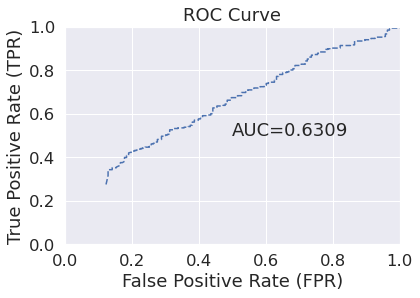

In [24]:
top_nb.model_performance(test).plot()

In [60]:
top_nb.params

{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'NaiveBayes_model_python_1604923471176_225',
   'type': 'Key<Model>',
   'URL': '/3/Models/NaiveBayes_model_python_1604923471176_225'}},
 'nfolds': {'default': 0, 'actual': 5},
 'seed': {'default': -1, 'actual': 1234},
 'fold_assignment': {'default': 'AUTO', 'actual': 'Random'},
 'fold_column': {'default': None, 'actual': None},
 'keep_cross_validation_models': {'default': True, 'actual': True},
 'keep_cross_validation_predictions': {'default': False, 'actual': True},
 'keep_cross_validation_fold_assignment': {'default': False, 'actual': False},
 'training_frame': {'default': None, 'actual': None},
 'validation_frame': {'default': None, 'actual': None},
 'response_column': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ColSpecifierV3',
    'schema_type': 'VecSpecifier'},
   'column_name': 'Resistanc

In [33]:
top_nb.model_performance(xval=True)


ModelMetricsBinomial: naivebayes
** Reported on cross-validation data. **

MSE: 0.35928627640629757
RMSE: 0.5994049352535376
LogLoss: 6.885446402616566
Mean Per-Class Error: 0.3424408983451537
AUC: 0.6892390661938534
AUCPR: 0.7895239621957413
Gini: 0.3784781323877069

Confusion Matrix (Act/Pred) for max f1 @ threshold = 3.1079474322197317e-10: 


0       1   Error             Rate
0      0  0.0   423.0     1.0    (423.0/423.0)
1      1  0.0   800.0     0.0      (0.0/800.0)
2  Total  0.0  1223.0  0.3459   (423.0/1223.0)


Maximum Metrics: Maximum metrics at their respective thresholds

Gains/Lift Table: Avg response rate: 65.41 %, avg score: 48.53 %



metric     threshold       value    idx
0                        max f1  3.107947e-10    0.790905  399.0
1                        max f2  3.107947e-10    0.904364  399.0
2                  max f0point5  6.877151e-04    0.755682  274.0
3                  max accuracy  2.923637e-08    0.680294  398.0
4                 max precision  1.000000e+00    0.841808    0.0
5                    max recall  3.107947e-10    1.000000  399.0
6               max specificity  1.000000e+00    0.867612    0.0
7              max absolute_mcc  6.877151e-04    0.301672  274.0
8    max min_per_class_accuracy  1.544699e-03    0.652482  263.0
9   max mean_per_class_accuracy  6.877151e-04    0.657559  274.0
10                      max tns  1.000000e+00  367.000000    0.0
11                      max fns  1.000000e+00  502.000000    0.0
12                      max fps  3.107947e-10  423.000000  399.0
13                      max tps  3.107947e-10  800.000000  399.0
14                      max tnr  1.000000e+00    0.867612    0.0
15                      max fnr  1.000000e+00    0.627500    0.0
16                      max fpr  3.107947e-10    1.000000  399.0
17                      max tpr  3.107947e-10    1.000000  399.0

group  cumulative_data_fraction  lower_threshold      lift  \
0         1                  0.119379     1.000000e+00  1.413570   
1         2                  0.152903     1.000000e+00  1.193171   
2         3                  0.200327     1.000000e+00  1.186099   
3         4                  0.300082     9.999999e-01  1.202951   
4         5                  0.399836     9.993061e-01  1.090174   
5         6                  0.500409     1.397471e-01  1.081311   
6         7                  0.600164     1.076027e-04  1.002459   
7         8                  0.699918     4.439823e-09  0.889682   
8         9                  0.799673     3.509020e-12  0.877152   
9        10                  0.899428     1.257580e-20  0.839559   
10       11                  1.000000     1.716001e-50  0.372866   

    cumulative_lift  response_rate         score  cumulative_response_rate  \
0          1.413570       0.924658  1.000000e+00                  0.924658   
1          1.365247       0.780488  1.000000e+00                  0.893048   
2          1.322837       0.775862  1.000000e+00                  0.865306   
3          1.282984       0.786885  1.000000e+00                  0.839237   
4          1.234880       0.713115  9.999141e-01                  0.807771   
5          1.204016       0.707317  8.368773e-01                  0.787582   
6          1.170514       0.655738  1.313929e-02                  0.765668   
7          1.130489       0.581967  1.451966e-05                  0.739486   
8          1.098887       0.573770  4.980517e-10                  0.718814   
9          1.070125       0.549180  3.575193e-13                  0.700000   
10         1.000000       0.243902  6.413437e-22                  0.654129   

    cumulative_score  capture_rate  cumulative_capture_rate       gain  \
0           1.000000       0.16875                  0.16875  41.357021   
1           1.000000       0.04000                  0.20875  19.317073   
2           1.000000       0.05625                  0.26500  18.609914   
3           1.000000       0.12000                  0.38500  20.295082   
4           0.999979       0.10875                  0.49375   9.017418   
5           0.967198       0.10875                  0.60250   8.131098   
6           0.808622       0.10000                  0.70250   0.245902   
7           0.693376       0.08875                  0.79125 -11.031762   
8           0.606882       0.08750                  0.87875 -12.284836   
9           0.539573       0.08375                  0.96250 -16.044057   
10          0.485307       0.03750                  1.00000 -62.713415   

    cumulative_gain  
0         41.357021  
1         36.524733  
2         32.283673  
3         28.298365  
4         23.487986  
5         20.401552  
6         17.051431  
7         13.048919  
8          9.888676  
9          7.012500  
10         0.000000

In [ ]:
top_glm


In [61]:
top_glm.params

{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'GLM_model_python_1604923471176_393',
   'type': 'Key<Model>',
   'URL': '/3/Models/GLM_model_python_1604923471176_393'}},
 'training_frame': {'default': None, 'actual': None},
 'validation_frame': {'default': None, 'actual': None},
 'nfolds': {'default': 0, 'actual': 5},
 'seed': {'default': -1, 'actual': 1234},
 'keep_cross_validation_models': {'default': True, 'actual': True},
 'keep_cross_validation_predictions': {'default': False, 'actual': True},
 'keep_cross_validation_fold_assignment': {'default': False, 'actual': False},
 'fold_assignment': {'default': 'AUTO', 'actual': 'Random'},
 'fold_column': {'default': None, 'actual': None},
 'response_column': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ColSpecifierV3',
    'schema_type': 'VecSpecifier'},
   'column_name': 'Resistance_Status',
   

In [62]:
top_glm.actual_params

{'model_id': 'GLM_model_python_1604923471176_393',
 'training_frame': None,
 'validation_frame': None,
 'nfolds': 5,
 'seed': 1234,
 'keep_cross_validation_models': True,
 'keep_cross_validation_predictions': True,
 'keep_cross_validation_fold_assignment': False,
 'fold_assignment': 'Random',
 'fold_column': None,
 'response_column': 'Resistance_Status',
 'ignored_columns': ['SampleID'],
 'random_columns': None,
 'ignore_const_cols': True,
 'score_each_iteration': False,
 'offset_column': None,
 'weights_column': None,
 'family': 'binomial',
 'rand_family': None,
 'tweedie_variance_power': 6.0,
 'tweedie_link_power': 3.0,
 'theta': 0.6,
 'solver': 'IRLSM',
 'alpha': [0.6],
 'lambda': [0.028483474641804576],
 'lambda_search': False,
 'early_stopping': True,
 'nlambdas': -1,
 'standardize': True,
 'missing_values_handling': 'MeanImputation',
 'plug_values': None,
 'compute_p_values': False,
 'remove_collinear_columns': False,
 'intercept': True,
 'non_negative': False,
 'max_iterations':

In [63]:
top_glm.run_time

6256

In [113]:
top_glm.std_coef_plot()

KeyboardInterrupt: 

In [116]:
top_glm.coef()

{'Intercept': -0.33622570593014733,
 'NC000962_3.22': 0.0,
 'NC000962_3.434': 0.0,
 'NC000962_3.524': 0.0,
 'NC000962_3.698': 0.0,
 'NC000962_3.1045': 0.0,
 'NC000962_3.1049': 0.0,
 'NC000962_3.1089': 0.0,
 'NC000962_3.1255': 0.0,
 'NC000962_3.1291': 0.0,
 'NC000962_3.1326': 0.0,
 'NC000962_3.1399': 0.0,
 'NC000962_3.1422': 0.0,
 'NC000962_3.1431': 0.0,
 'NC000962_3.1452': 0.0,
 'NC000962_3.1474': 0.0,
 'NC000962_3.1653': 0.0,
 'NC000962_3.1676': 0.0,
 'NC000962_3.1703': 0.0,
 'NC000962_3.1708': 0.0,
 'NC000962_3.1718': 0.0,
 'NC000962_3.1729': 0.0,
 'NC000962_3.1771': 0.0,
 'NC000962_3.1827': 0.0,
 'NC000962_3.1849': 0.0,
 'NC000962_3.1918': 0.0,
 'NC000962_3.1977': 0.0,
 'NC000962_3.3352': 0.0,
 'NC000962_3.3446': 0.0,
 'NC000962_3.4086': 0.0,
 'NC000962_3.4096': 0.0,
 'NC000962_3.4119': 0.0,
 'NC000962_3.5856': 0.0,
 'NC000962_3.6003': 0.0,
 'NC000962_3.6575': 0.0,
 'NC000962_3.6579': 0.0,
 'NC000962_3.6620': 0.0,
 'NC000962_3.6695': 0.0,
 'NC000962_3.6735': 0.0,
 'NC000962_3.6738':

In [ ]:
top_glm.plot()

In [ ]:
plt.figure(figsize=(10,10))
top_glm.plot()



In [ ]:
top_gbm


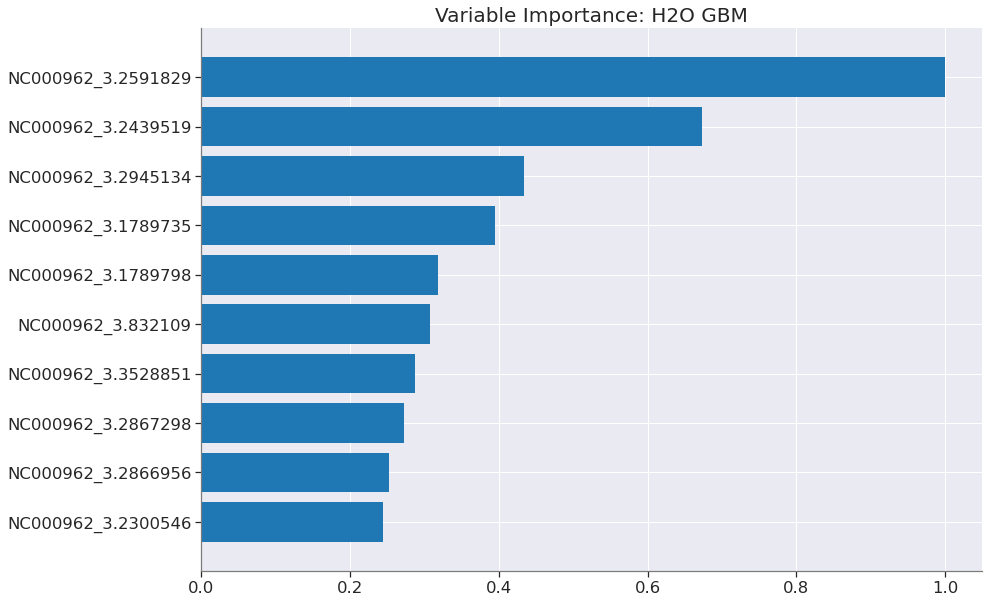

In [49]:
top_gbm.varimp_plot()

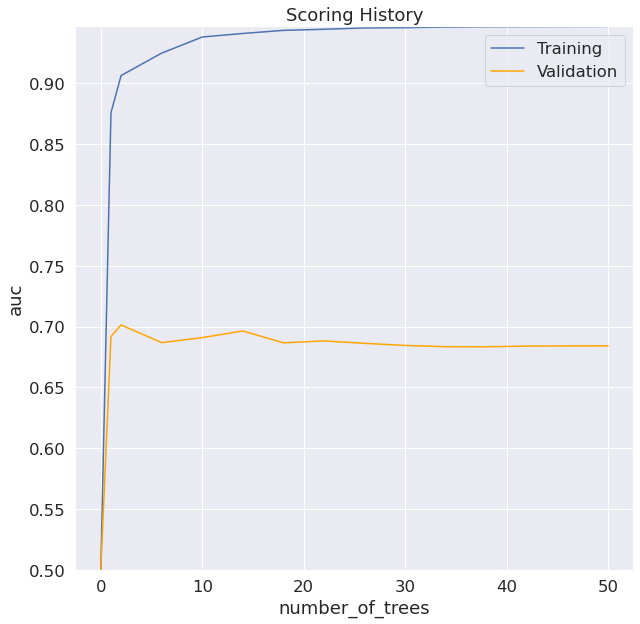

In [92]:
plt.figure(figsize=(10,10))

top_gbm.plot(metric='auc')

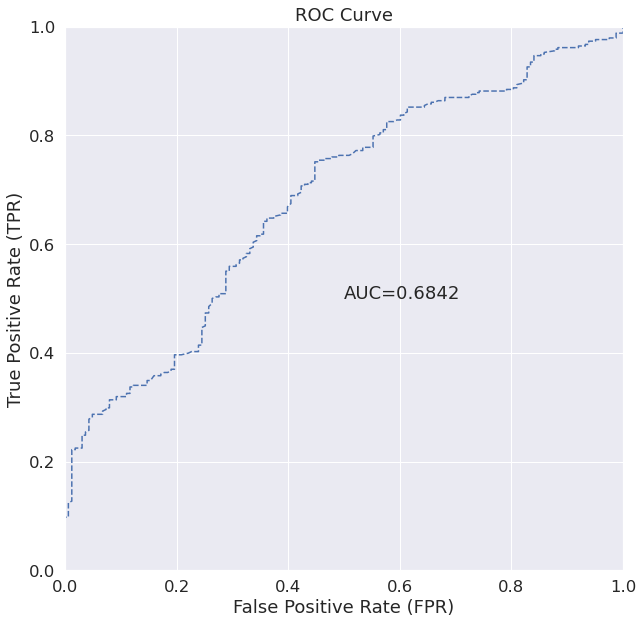

In [95]:
plt.figure(figsize=(10,10))
# plt.title('Gradient Boosting Machine')
top_gbm.model_performance(test).plot()

In [ ]:
top_xgb


In [ ]:
top_dl


In [70]:
top_dl.params

{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'DeepLearning_model_python_1604930735703_113',
   'type': 'Key<Model>',
   'URL': '/3/Models/DeepLearning_model_python_1604930735703_113'}},
 'training_frame': {'default': None, 'actual': None},
 'validation_frame': {'default': None, 'actual': None},
 'nfolds': {'default': 0, 'actual': 5},
 'keep_cross_validation_models': {'default': True, 'actual': True},
 'keep_cross_validation_predictions': {'default': False, 'actual': True},
 'keep_cross_validation_fold_assignment': {'default': False, 'actual': False},
 'fold_assignment': {'default': 'AUTO', 'actual': 'Random'},
 'fold_column': {'default': None, 'actual': None},
 'response_column': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ColSpecifierV3',
    'schema_type': 'VecSpecifier'},
   'column_name': 'Resistance_Status',
   'is_member_of_frames': N

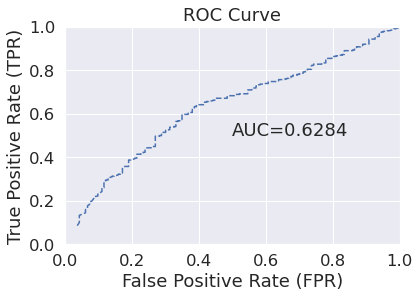

In [85]:
top_dl.model_performance(test).plot()


In [ ]:
top_drf

In [8]:
top_ensemble_ALL_MODELS_MTLNR_auto

Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_model_python_1604937120558_589

No model summary for this model

ModelMetricsBinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.09352990361164965
RMSE: 0.30582659075307633
LogLoss: 0.3440902946312779
Null degrees of freedom: 1222
Residual degrees of freedom: 1217
Null deviance: 1577.310356148988
Residual deviance: 841.6448606681057
AIC: 853.6448606681057
AUC: 0.9797739361702127
AUCPR: 0.9893731412795469
Gini: 0.9595478723404254

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.65870090079126: 

Maximum Metrics: Maximum metrics at their respective thresholds

Gains/Lift Table: Avg response rate: 65.41 %, avg score: 64.12 %


ModelMetricsBinomialGLM: stackedensemble
** Reported on validation data. **

MSE: 0.1994984719309511
RMSE: 0.44665251810658263
LogLoss: 0.5792089148305252
Null degrees of freedom: 500
Residual degrees of freedom: 495
Null deviance: 633.0394016859412
Residu

0      1   Error            Rate
0      0  397.0   26.0  0.0615    (26.0/423.0)
1      1   59.0  741.0  0.0737    (59.0/800.0)
2  Total  456.0  767.0  0.0695   (85.0/1223.0)

metric  threshold       value    idx
0                        max f1   0.658701    0.945756  181.0
1                        max f2   0.389687    0.963491  284.0
2                  max f0point5   0.685386    0.965173  160.0
3                  max accuracy   0.662455    0.930499  178.0
4                 max precision   0.850517    1.000000    0.0
5                    max recall   0.326661    1.000000  315.0
6               max specificity   0.850517    1.000000    0.0
7              max absolute_mcc   0.662455    0.851333  178.0
8    max min_per_class_accuracy   0.655040    0.927500  183.0
9   max mean_per_class_accuracy   0.680631    0.933941  163.0
10                      max tns   0.850517  423.000000    0.0
11                      max fns   0.850517  798.000000    0.0
12                      max fps   0.213703  423.000000  399.0
13                      max tps   0.326661  800.000000  315.0
14                      max tnr   0.850517    1.000000    0.0
15                      max fnr   0.850517    0.997500    0.0
16                      max fpr   0.213703    1.000000  399.0
17                      max tpr   0.326661    1.000000  315.0

group  cumulative_data_fraction  lower_threshold      lift  \
0         1                  0.010630         0.848413  1.528750   
1         2                  0.020442         0.847694  1.528750   
2         3                  0.030253         0.846136  1.528750   
3         4                  0.040065         0.845426  1.528750   
4         5                  0.050695         0.844344  1.528750   
5         6                  0.100572         0.841527  1.528750   
6         7                  0.150450         0.839382  1.528750   
7         8                  0.200327         0.837356  1.528750   
8         9                  0.300082         0.818708  1.516219   
9        10                  0.399836         0.794543  1.528750   
10       11                  0.500409         0.754428  1.479035   
11       12                  0.600164         0.675770  1.403443   
12       13                  0.699918         0.527512  0.664129   
13       14                  0.799673         0.343341  0.338330   
14       15                  0.899428         0.271692  0.012531   
15       16                  1.000000         0.213703  0.000000   

    cumulative_lift  response_rate     score  cumulative_response_rate  \
0          1.528750       1.000000  0.849017                  1.000000   
1          1.528750       1.000000  0.847955                  1.000000   
2          1.528750       1.000000  0.846894                  1.000000   
3          1.528750       1.000000  0.845702                  1.000000   
4          1.528750       1.000000  0.844824                  1.000000   
5          1.528750       1.000000  0.842769                  1.000000   
6          1.528750       1.000000  0.840477                  1.000000   
7          1.528750       1.000000  0.838379                  1.000000   
8          1.524584       0.991803  0.830385                  0.997275   
9          1.525624       1.000000  0.806837                  0.997955   
10         1.516260       0.967480  0.775484                  0.991830   
11         1.497509       0.918033  0.724191                  0.979564   
12         1.378732       0.434426  0.616098                  0.901869   
13         1.248948       0.221311  0.425877                  0.816973   
14         1.111818       0.008197  0.298061                  0.727273   
15         1.000000       0.000000  0.250894                  0.654129   

    cumulative_score  capture_rate  cumulative_capture_rate        gain  \
0           0.849017       0.01625                  0.01625   52.875000   
1           0.848507       0.01500                  0.03125   52.875000   
2           0.847984       0.01500                  0.04625   52.875000   
3           0.847425       0.01500                  0.06125   52.875000   
4           0.846880       0.01625                  0.07750   52.875000   
5           0.844841       0.07625                  0.15375   52.875000   
6           0.843394       0.07625                  0.23000   52.875000   
7           0.842146       0.07625                  0.30625   52.875000   
8           0.838236       0.15125                  0.45750   51.621926   
9           0.830402       0.15250                  0.61000   52.875000   
10          0.819365       0.14875                  0.75875   47.903455   
11          0.803546       0.14000                  0.89875   40.344262   
12          0.776830       0.06625                  0.96500  -33.587090   
13          0.733051       0.03375                  0.99875  -66.167008   
14          0.684806       0.00125                  1.00000  -98.746926   
15          0.641167       0.00000                  1.00000 -100.000000   

    cumulative_gain  
0         52.875000  
1         52.875000  
2         52.875000  
3         52.875000  
4         52.875000  
5         52.875000  
6         52.875000  
7         52.875000  
8         52.458447  
9         52.562372  
10        51.626021  
11        49.750851  
12        37.873248  
13    

0      1   Error            Rate
0      0  6.0  157.0  0.9632   (157.0/163.0)
1      1  1.0  337.0   0.003     (1.0/338.0)
2  Total  7.0  494.0  0.3154   (158.0/501.0)

metric  threshold       value    idx
0                        max f1   0.280767    0.810096  392.0
1                        max f2   0.258199    0.913020  397.0
2                  max f0point5   0.731959    0.801012  149.0
3                  max accuracy   0.308588    0.686627  384.0
4                 max precision   0.849016    1.000000    0.0
5                    max recall   0.258199    1.000000  397.0
6               max specificity   0.849016    1.000000    0.0
7              max absolute_mcc   0.763738    0.428010  115.0
8    max min_per_class_accuracy   0.691308    0.656442  199.0
9   max mean_per_class_accuracy   0.763738    0.716584  115.0
10                      max tns   0.849016  163.000000    0.0
11                      max fns   0.849016  337.000000    0.0
12                      max fps   0.240902  163.000000  399.0
13                      max tps   0.258199  338.000000  397.0
14                      max tnr   0.849016    1.000000    0.0
15                      max fnr   0.849016    0.997041    0.0
16                      max fpr   0.240902    1.000000  399.0
17                      max tpr   0.258199    1.000000  397.0

group  cumulative_data_fraction  lower_threshold      lift  \
0         1                  0.011976         0.844289  1.482249   
1         2                  0.021956         0.841633  1.482249   
2         3                  0.031936         0.840888  1.482249   
3         4                  0.041916         0.839998  1.482249   
4         5                  0.051896         0.837651  1.482249   
5         6                  0.101796         0.822227  1.422959   
6         7                  0.151697         0.809477  1.422959   
7         8                  0.201597         0.795736  1.482249   
8         9                  0.301397         0.778788  1.304379   
9        10                  0.401198         0.737226  1.126509   
10       11                  0.500998         0.708998  0.918994   
11       12                  0.600798         0.672252  0.711479   
12       13                  0.700599         0.589464  0.681834   
13       14                  0.802395         0.506885  0.755656   
14       15                  0.900200         0.384285  0.725999   
15       16                  1.000000         0.240902  0.859704   

    cumulative_lift  response_rate     score  cumulative_response_rate  \
0          1.482249       1.000000  0.846175                  1.000000   
1          1.482249       1.000000  0.842212                  1.000000   
2          1.482249       1.000000  0.841120                  1.000000   
3          1.482249       1.000000  0.840339                  1.000000   
4          1.482249       1.000000  0.838721                  1.000000   
5          1.453185       0.960000  0.826103                  0.980392   
6          1.443242       0.960000  0.817554                  0.973684   
7          1.452897       1.000000  0.801854                  0.980198   
8          1.403719       0.880000  0.787895                  0.947020   
9          1.334761       0.760000  0.758404                  0.900498   
10         1.251939       0.620000  0.722802                  0.844622   
11         1.162162       0.480000  0.691530                  0.784053   
12         1.093739       0.460000  0.624433                  0.737892   
13         1.050848       0.509804  0.549437                  0.708955   
14         1.015554       0.489796  0.449648                  0.685144   
15         1.000000       0.580000  0.326482                  0.674651   

    cumulative_score  capture_rate  cumulative_capture_rate       gain  \
0           0.846175      0.017751                 0.017751  48.224852   
1           0.844374      0.014793                 0.032544  48.224852   
2           0.843357      0.014793                 0.047337  48.224852   
3           0.842638      0.014793                 0.062130  48.224852   
4           0.841885      0.014793                 0.076923  48.224852   
5           0.834149      0.071006                 0.147929  42.295858   
6           0.828690      0.071006                 0.218935  42.295858   
7           0.822047      0.073964                 0.292899  48.224852   
8           0.810739      0.130178                 0.423077  30.437870   
9           0.797720      0.112426                 0.535503  12.650888   
10          0.782796      0.091716                 0.627219  -8.100592   
11          0.767636      0.071006                 0.698225 -28.852071   
12          0.747237      0.068047                 0.766272 -31.816568   
13          0.722143      0.076923                 0.843195 -24.434389   
14          0.692537      0.071006                 0.914201 -27.400072   
15          0.656004      0.085799                 1.000000 -14.029586   

    cumulative_gain  
0         48.224852  
1         48.224852  
2         48.224852  
3         48.224852  
4         48.224852  
5         45.318482  
6         44.324198  
7         45.289706  
8         40.371880  
9         33.476111  
10        25.193899  
11        16.216163  
12         9.373894  
13         5.084783  
1

In [5]:
top_ensemble_ALL_MODELS_MTLNR_auto.plot()

No score history for this model


H2OValueError: Plotting not implemented for this type of model

In [6]:
top_ensemble_ALL_MODELS_MTLNR_auto.varimp()

In [10]:
top_ensemble_ALL_MODELS_MTLNR_auto.model_performance(test).confusion_matrix()


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2807666647472811: 


0      1   Error            Rate
0      0  6.0  157.0  0.9632   (157.0/163.0)
1      1  1.0  337.0   0.003     (1.0/338.0)
2  Total  7.0  494.0  0.3154   (158.0/501.0)

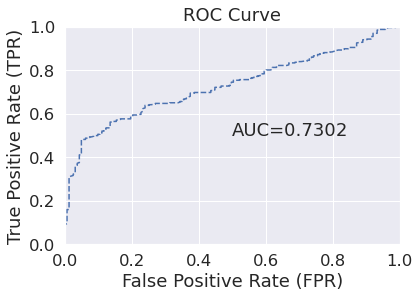

In [84]:
top_ensemble_ALL_MODELS_MTLNR_auto.model_performance(test).plot()

In [72]:
top_ensemble_ALL_MODELS_MTLNR_auto.params

{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'StackedEnsemble_model_python_1604937120558_589',
   'type': 'Key<Model>',
   'URL': '/3/Models/StackedEnsemble_model_python_1604937120558_589'}},
 'training_frame': {'default': None, 'actual': None},
 'response_column': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ColSpecifierV3',
    'schema_type': 'VecSpecifier'},
   'column_name': 'Resistance_Status',
   'is_member_of_frames': None}},
 'validation_frame': {'default': None, 'actual': None},
 'blending_frame': {'default': None, 'actual': None},
 'base_models': {'default': [],
  'actual': [{'__meta': {'schema_version': 3,
     'schema_name': 'KeyV3',
     'schema_type': 'Key<Keyed>'},
    'name': 'NaiveBayes_model_python_1604937120558_113',
    'type': 'Key<Keyed>',
    'URL': None},
   {'__meta': {'schema_version': 3,
     'schema_name': 'KeyV3'

In [7]:
top_ensemble_ALL_MODELS_MTLNR_auto.model_performance(test).auc()

0.7302428576614514

## Models trained on PCA300 Features

In [7]:
# save the model
# model_path = h2o.save_model(model= my_pca, path="../models/my_pca_model", force=True)

model_path = "../../models/PCA300/PCA_model_python_1603962989759_1_k300"

# load the model
pca300 = h2o.load_model(model_path)


In [20]:
pca300.

Model Details
H2OPrincipalComponentAnalysisEstimator :  Principal Components Analysis
Model Key:  PCA_model_python_1603962989759_1


Importance of components: 


ModelMetricsPCA: pca
** Reported on train data. **

MSE: NaN
RMSE: NaN

Scoring History for GramSVD: 


pc1       pc2       pc3       pc4       pc5  \
0      Standard deviation  8.748536  4.715628  3.877237  3.107335  2.784571   
1  Proportion of Variance  0.319086  0.092708  0.062673  0.040254  0.032326   
2   Cumulative Proportion  0.319086  0.411794  0.474467  0.514722  0.547048   

        pc6       pc7       pc8       pc9    ...        pc291     pc292  \
0  2.583031  2.371838  1.989349  1.914256    ...     0.241208  0.240459   
1  0.027816  0.023453  0.016499  0.015277    ...     0.000243  0.000241   
2  0.574864  0.598318  0.614817  0.630094    ...     0.931150  0.931391   

      pc293     pc294     pc295     pc296     pc297     pc298     pc299  \
0  0.239932  0.239419  0.238373  0.237840  0.237656  0.237487  0.236259   
1  0.000240  0.000239  0.000237  0.000236  0.000235  0.000235  0.000233   
2  0.931631  0.931870  0.932107  0.932342  0.932578  0.932813  0.933046   

      pc300  
0  0.236189  
1  0.000233  
2  0.933278  

[3 rows x 301 columns]

timestamp           duration  iterations
0    2020-10-29 09:44:18  26 min 37.862 sec         0.0

<bound method ModelBase.varimp_plot of >

In [17]:
pca300.screeplot(type='lines')

KeyError: 'server'

In [21]:
pca300_df = pca300.summary().as_data_frame().set_index("")
pca300_df

pc1       pc2       pc3       pc4       pc5  \
                                                                           
Standard deviation      8.748536  4.715628  3.877237  3.107335  2.784571   
Proportion of Variance  0.319086  0.092708  0.062673  0.040254  0.032326   
Cumulative Proportion   0.319086  0.411794  0.474467  0.514722  0.547048   

                             pc6       pc7       pc8       pc9      pc10  \
                                                                           
Standard deviation      2.583031  2.371838  1.989349  1.914256  1.835004   
Proportion of Variance  0.027816  0.023453  0.016499  0.015277  0.014038   
Cumulative Proportion   0.574864  0.598318  0.614817  0.630094  0.644132   

                          ...        pc291     pc292     pc293     pc294  \
                          ...                                              
Standard deviation        ...     0.241208  0.240459  0.239932  0.239419   
Proportion of Variance    ...     0.000243  0.000241  0.000240  0.000239   
Cumulative Proportion     ...     0.931150  0.931391  0.931631  0.931870   

                           pc295     pc296     pc297     pc298     pc299  \
                                                                           
Standard deviation      0.238373  0.237840  0.237656  0.237487  0.236259   
Proportion of Variance  0.000237  0.000236  0.000235  0.000235  0.000233   
Cumulative Proportion   0.932107  0.932342  0.932578  0.932813  0.933046   

                           pc300  
                                  
Standard deviation      0.236189  
Proportion of Variance  0.000233  
Cumulative Proportion   0.933278  

[3 rows x 300 columns]

Text(0.5, 0, 'Number of Components')

<Figure size 600x400 with 0 Axes>

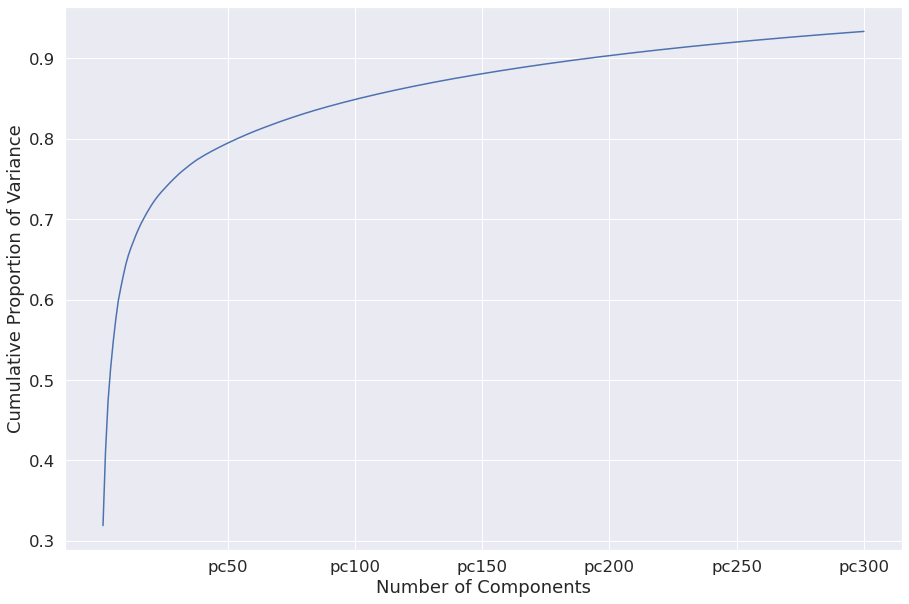

In [29]:
a4_dims = (15, 10)
plt.figure(
    # figsize=(10,10),
    dpi=100)

fig, ax = plt.subplots(figsize=a4_dims)
ax.set_xticks([49,99,149, 199, 249, 299])
sns.lineplot(ax=ax, data= pca300_df.loc['Cumulative Proportion'])

plt.ylabel('Cumulative Proportion of Variance') 

plt.xlabel('Number of Components') 



In [15]:
train_pca_df_frame = h2o.import_file(DATA_LOCATION + "processed/train_pca_df.tsv")

test_pca_df_frame = h2o.import_file(DATA_LOCATION + "processed/test_pca_df.tsv")

index_col = 'SampleID'
nfolds = 5

# Identify predictors and response columns
predictor_cols = train_pca_df_frame.columns
response_col = "Resistance_Status"

predictor_cols.remove(response_col)


Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [3]:
top_dl_pca= h2o.load_model(MODELS_LOCATION + "PCA300/top_dl/DeepLearning_model_python_1605362597414_3340")
top_drf_pca= h2o.load_model(MODELS_LOCATION + "PCA300/top_drf/DRF_model_python_1605362597414_2415")
top_gbm_pca= h2o.load_model(MODELS_LOCATION + "PCA300/top_gbm/GBM_model_python_1605362597414_1525")
top_glm_pca= h2o.load_model(MODELS_LOCATION + "PCA300/top_glm/GLM_model_python_1605362597414_1506")
top_nb_pca= h2o.load_model(MODELS_LOCATION + "PCA300/top_nb/NaiveBayes_model_python_1605362597414_1487")
top_xgb_pca= h2o.load_model(MODELS_LOCATION + "PCA300/top_xgb/XGBoost_model_python_1605362597414_1768")

# top_ensemble_ALL_MODELS_METALEARNER_auto_pca= h2o.load_model(MODELS_LOCATION + "PCA300/top_ensemble_ALL_MODELS_METALEARNER_auto/stacked_ensemble_PCA300_FEATURES_ALL_MODELS_metalearner_auto")
top_ensemble_ALL_MODELS_METALEARNER_deeplearning_pca= h2o.load_model(MODELS_LOCATION + "PCA300/top_ensemble_ALL_MODELS_METALEARNER_deeplearning/stacked_ensemble_PCA300_FEATURES_ALL_MODELS_metalearner_deeplearning")
top_ensemble_ALL_MODELS_METALEARNER_drf_pca= h2o.load_model(MODELS_LOCATION + "PCA300/top_ensemble_ALL_MODELS_METALEARNER_drf/stacked_ensemble_PCA300_FEATURES_ALL_MODELS_metalearner_drf")
top_ensemble_ALL_MODELS_METALEARNER_gbm_pca= h2o.load_model(MODELS_LOCATION + "PCA300/top_ensemble_ALL_MODELS_METALEARNER_gbm/stacked_ensemble_PCA300_FEATURES_ALL_MODELS_metalearner_gbm")
top_ensemble_ALL_MODELS_METALEARNER_glm_pca= h2o.load_model(MODELS_LOCATION + "PCA300/top_ensemble_ALL_MODELS_METALEARNER_glm/stacked_ensemble_PCA300_FEATURES_ALL_MODELS_metalearner_glm")
top_ensemble_ALL_MODELS_METALEARNER_naivebayes_pca= h2o.load_model(MODELS_LOCATION + "PCA300/top_ensemble_ALL_MODELS_METALEARNER_naivebayes/stacked_ensemble_PCA300_FEATURES_ALL_MODELS_metalearner_naivebayes")
top_ensemble_ALL_MODELS_METALEARNER_xgboost_pca= h2o.load_model(MODELS_LOCATION + "PCA300/top_ensemble_ALL_MODELS_METALEARNER_xgboost/stacked_ensemble_PCA300_FEATURES_ALL_MODELS_metalearner_xgboost")

# top_ensemble_CHECKPOINT_MODELS_METALEARNER_auto_pca= h2o.load_model(MODELS_LOCATION + "PCA300/top_ensemble_CHECKPOINT_MODELS_METALEARNER_auto/stacked_ensemble_PCA300_FEATURES_CHECKPOINT_MODELS_metalearner_auto")
top_ensemble_CHECKPOINT_MODELS_METALEARNER_deeplearning_pca= h2o.load_model(MODELS_LOCATION + "PCA300/top_ensemble_CHECKPOINT_MODELS_METALEARNER_deeplearning/stacked_ensemble_PCA300_FEATURES_CHECKPOINT_MODELS_metalearner_deeplearning")
top_ensemble_CHECKPOINT_MODELS_METALEARNER_drf_pca= h2o.load_model(MODELS_LOCATION + "PCA300/top_ensemble_CHECKPOINT_MODELS_METALEARNER_drf/stacked_ensemble_PCA300_FEATURES_CHECKPOINT_MODELS_metalearner_drf")
top_ensemble_CHECKPOINT_MODELS_METALEARNER_gbm_pca= h2o.load_model(MODELS_LOCATION + "PCA300/top_ensemble_CHECKPOINT_MODELS_METALEARNER_gbm/stacked_ensemble_PCA300_FEATURES_CHECKPOINT_MODELS_metalearner_gbm")
top_ensemble_CHECKPOINT_MODELS_METALEARNER_glm_pca= h2o.load_model(MODELS_LOCATION + "PCA300/top_ensemble_CHECKPOINT_MODELS_METALEARNER_glm/stacked_ensemble_PCA300_FEATURES_CHECKPOINT_MODELS_metalearner_glm")
top_ensemble_CHECKPOINT_MODELS_METALEARNER_naivebayes_pca= h2o.load_model(MODELS_LOCATION + "PCA300/top_ensemble_CHECKPOINT_MODELS_METALEARNER_naivebayes/stacked_ensemble_PCA300_FEATURES_CHECKPOINT_MODELS_metalearner_naivebayes")
top_ensemble_CHECKPOINT_MODELS_METALEARNER_xgboost_pca= h2o.load_model(MODELS_LOCATION + "PCA300/top_ensemble_CHECKPOINT_MODELS_METALEARNER_xgboost/stacked_ensemble_PCA300_FEATURES_CHECKPOINT_MODELS_metalearner_xgboost")

# top_ensemble_CHECKPOINT_nogbm_MODELS_METALEARNER_auto_pca= h2o.load_model(MODELS_LOCATION + "PCA300/top_ensemble_CHECKPOINT_nogbm_MODELS_METALEARNER_auto/stacked_ensemble_PCA300_FEATURES_CHECKPOINT_nogbm_MODELS_metalearner_auto")
top_ensemble_CHECKPOINT_nogbm_MODELS_METALEARNER_deeplearning_pca= h2o.load_model(MODELS_LOCATION + "PCA300/top_ensemble_CHECKPOINT_nogbm_MODELS_METALEARNER_deeplearning/stacked_ensemble_PCA300_FEATURES_CHECKPOINT_nogbm_MODELS_metalearner_deeplearning")
top_ensemble_CHECKPOINT_nogbm_MODELS_METALEARNER_drf_pca= h2o.load_model(MODELS_LOCATION + "PCA300/top_ensemble_CHECKPOINT_nogbm_MODELS_METALEARNER_drf/stacked_ensemble_PCA300_FEATURES_CHECKPOINT_nogbm_MODELS_metalearner_drf")
top_ensemble_CHECKPOINT_nogbm_MODELS_METALEARNER_gbm_pca= h2o.load_model(MODELS_LOCATION + "PCA300/top_ensemble_CHECKPOINT_nogbm_MODELS_METALEARNER_gbm/stacked_ensemble_PCA300_FEATURES_CHECKPOINT_nogbm_MODELS_metalearner_gbm")
top_ensemble_CHECKPOINT_nogbm_MODELS_METALEARNER_glm_pca= h2o.load_model(MODELS_LOCATION + "PCA300/top_ensemble_CHECKPOINT_nogbm_MODELS_METALEARNER_glm/stacked_ensemble_PCA300_FEATURES_CHECKPOINT_nogbm_MODELS_metalearner_glm")
top_ensemble_CHECKPOINT_nogbm_MODELS_METALEARNER_naivebayes_pca= h2o.load_model(MODELS_LOCATION + "PCA300/top_ensemble_CHECKPOINT_nogbm_MODELS_METALEARNER_naivebayes/stacked_ensemble_PCA300_FEATURES_CHECKPOINT_nogbm_MODELS_metalearner_naivebayes")
top_ensemble_CHECKPOINT_nogbm_MODELS_METALEARNER_xgboost_pca= h2o.load_model(MODELS_LOCATION + "PCA300/top_ensemble_CHECKPOINT_nogbm_MODELS_METALEARNER_xgboost/stacked_ensemble_PCA300_FEATURES_CHECKPOINT_nogbm_MODELS_metalearner_xgboost")


In [13]:
models_trained_on_pca300_features = [
top_dl_pca,
top_drf_pca,
top_gbm_pca, # index 3
top_glm_pca,
top_nb_pca,
top_xgb_pca, # index 5

top_ensemble_ALL_MODELS_METALEARNER_auto_pca,
top_ensemble_ALL_MODELS_METALEARNER_deeplearning_pca,
top_ensemble_ALL_MODELS_METALEARNER_drf_pca, # index 8
top_ensemble_ALL_MODELS_METALEARNER_gbm_pca,
top_ensemble_ALL_MODELS_METALEARNER_glm_pca,
top_ensemble_ALL_MODELS_METALEARNER_naivebayes_pca, # index 11
top_ensemble_ALL_MODELS_METALEARNER_xgboost_pca,

top_ensemble_CHECKPOINT_MODELS_METALEARNER_auto_pca,
top_ensemble_CHECKPOINT_MODELS_METALEARNER_deeplearning_pca, # index 14
top_ensemble_CHECKPOINT_MODELS_METALEARNER_drf_pca,
top_ensemble_CHECKPOINT_MODELS_METALEARNER_gbm_pca,
top_ensemble_CHECKPOINT_MODELS_METALEARNER_glm_pca, # index 17
top_ensemble_CHECKPOINT_MODELS_METALEARNER_naivebayes_pca,
top_ensemble_CHECKPOINT_MODELS_METALEARNER_xgboost_pca,

top_ensemble_CHECKPOINT_nogbm_MODELS_METALEARNER_auto_pca, # index 20
top_ensemble_CHECKPOINT_nogbm_MODELS_METALEARNER_deeplearning_pca,
top_ensemble_CHECKPOINT_nogbm_MODELS_METALEARNER_drf_pca,
top_ensemble_CHECKPOINT_nogbm_MODELS_METALEARNER_gbm_pca, # index 23
top_ensemble_CHECKPOINT_nogbm_MODELS_METALEARNER_glm_pca,
top_ensemble_CHECKPOINT_nogbm_MODELS_METALEARNER_naivebayes_pca,
top_ensemble_CHECKPOINT_nogbm_MODELS_METALEARNER_xgboost_pca, # index 26
]





models_trained_on_pca300_features_list = []
models_trained_on_pca300_features_dict = {}


for a_model in models_trained_on_pca300_features:
    test_performance = a_model.model_performance(valid=True)
    train_performance = a_model.model_performance(train=True)

    metrics_dict = {
        'test': {
            'auc': test_performance.auc(),
            'confusion_matrix': test_performance.confusion_matrix(),
            'accuracy': test_performance.accuracy(),
            'sensitivity': test_performance.sensitivity(),
            'specificity': test_performance.specificity(),
            'run_time': a_model.run_time,
            'precision': test_performance.precision(),
            'recall': test_performance.recall(),
            'fallout': test_performance.fallout(),
            'missrate': test_performance.missrate()
            # 'r2':
        },
        'train': {
            'auc': train_performance.auc(),
            'confusion_matrix': train_performance.confusion_matrix(),
            'accuracy': train_performance.accuracy(),
            'sensitivity': train_performance.sensitivity(),
            'specificity': train_performance.specificity(),
            'run_time': a_model.run_time,
            'precision': train_performance.precision(),
            'recall': train_performance.recall(),
            'fallout': train_performance.fallout(),
            'missrate': train_performance.missrate()
            # 'r2':
        }
    }

    models_trained_on_pca300_features_dict[a_model.model_id] = metrics_dict
    models_trained_on_pca300_features_list.append([a_model.model_id, metrics_dict])

    print('Model ID : ', a_model.model_id)
    print('AUC on test data: ', test_performance.auc(), "\n\n============================")



Model ID :  DeepLearning_model_python_1605362597414_3340
AUC on test data:  0.5544977674519911 

Model ID :  DRF_model_python_1605362597414_2415
AUC on test data:  0.5821051294151813 

Model ID :  GBM_model_python_1605362597414_1525
AUC on test data:  0.5569935020147384 

Model ID :  GLM_model_python_1605362597414_1506
AUC on test data:  0.6266381094130032 

Model ID :  NaiveBayes_model_python_1605362597414_1487
AUC on test data:  0.5736650088938905 

Model ID :  XGBoost_model_python_1605362597414_1768
AUC on test data:  0.6006189421715613 

Model ID :  stacked_ensemble_PCA300_FEATURES_ALL_MODELS_metalearner_auto
AUC on test data:  0.6012088430682108 

Model ID :  stacked_ensemble_PCA300_FEATURES_ALL_MODELS_metalearner_deeplearning
AUC on test data:  0.6050931135876866 

Could not find exact threshold 0.0; using closest threshold found 0.0.
Could not find exact threshold 0.0; using closest threshold found 0.0.
Model ID :  stacked_ensemble_PCA300_FEATURES_ALL_MODELS_metalearner_drf
AUC 

In [114]:
for a_mdl in models_trained_on_pca300_features_list[20:27]:
    print(a_mdl[0])
    print(a_mdl[1]['test']['accuracy'])
    print(a_mdl[1]['test']['auc'])
    print(a_mdl[1]['test']['run_time'])

    print("-----------------------------")

stacked_ensemble_PCA300_FEATURES_ALL_MODELS_metalearner_auto
[[0.36917977483728703, 0.6766467065868264]]
0.661151849566196
419
-----------------------------
stacked_ensemble_PCA300_FEATURES_ALL_MODELS_metalearner_deeplearning
[[0.11575687561468544, 0.6746506986027944]]
0.6485914981667695
2323
-----------------------------
stacked_ensemble_PCA300_FEATURES_ALL_MODELS_metalearner_drf
[[0.020000000000000018, 0.6746506986027944]]
0.6622953497658547
735
-----------------------------
stacked_ensemble_PCA300_FEATURES_ALL_MODELS_metalearner_gbm
[[0.06674979768614445, 0.6806387225548902]]
0.6541184157984535
945
-----------------------------
stacked_ensemble_PCA300_FEATURES_ALL_MODELS_metalearner_glm
[[0.060685591322269986, 0.6746506986027944]]
0.6533016299415544
203
-----------------------------
stacked_ensemble_PCA300_FEATURES_ALL_MODELS_metalearner_naivebayes
[[8.832209277123537e-07, 0.6746506986027944]]
0.653710022870004
210
-----------------------------
stacked_ensemble_PCA300_FEATURES_ALL_M

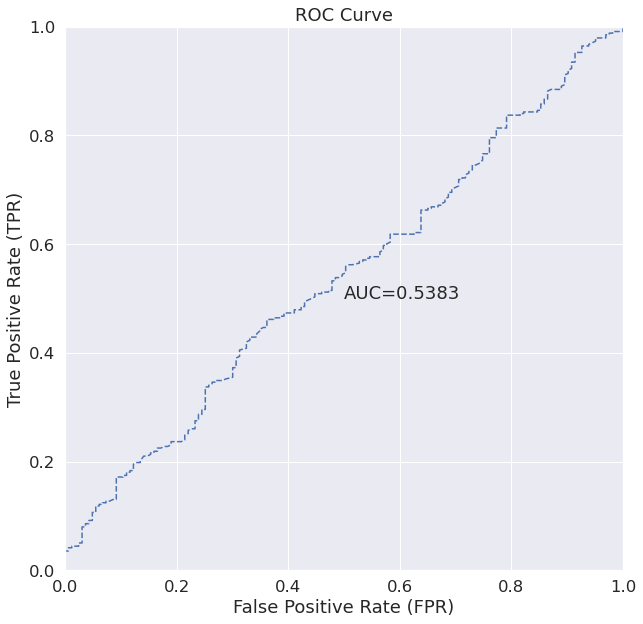

In [104]:
plt.figure(figsize=(10,10))
# plt.title('Gradient Boosting Machine')
top_gbm_pca.model_performance(test_pca_df_frame).plot()

In [20]:
top_nb.model_performance(test_pca_df_frame).plot()

NameError: name 'test_pca_df_frame' is not defined

In [ ]:
ensemble_list[0].model_performance(xval=True).plot()

# Comparison of models 

XVal AUC:  0.8844089834515367
Accuracy:  0.8348323793949305
Runtime:  4970


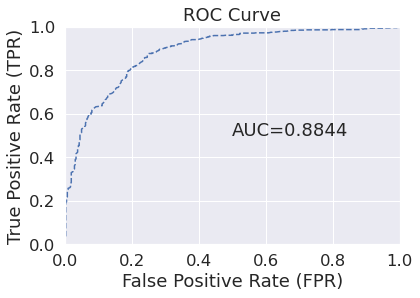

[('balance_classes', True),
 ('binomial_double_trees', False),
 ('build_tree_one_node', False),
 ('calibrate_model', False),
 ('calibration_frame', None),
 ('categorical_encoding', 'AUTO'),
 ('check_constant_response', True),
 ('checkpoint', None),
 ('class_sampling_factors', None),
 ('col_sample_rate_change_per_level', 0.8),
 ('col_sample_rate_per_tree', 0.3),
 ('custom_metric_func', None),
 ('distribution', 'multinomial'),
 ('export_checkpoints_dir', None),
 ('fold_assignment', 'Random'),
 ('fold_column', None),
 ('histogram_type', 'AUTO'),
 ('ignore_const_cols', True),
 ('ignored_columns', None),
 ('keep_cross_validation_fold_assignment', False),
 ('keep_cross_validation_models', True),
 ('keep_cross_validation_predictions', True),
 ('max_after_balance_size', 5.0),
 ('max_confusion_matrix_size', 20),
 ('max_depth', 10),
 ('max_hit_ratio_k', 0),
 ('max_runtime_secs', 0.0),
 ('min_rows', 1.0),
 ('min_split_improvement', 1e-05),
 ('model_id', 'DRF_model_python_1605362597414_2415'),
 ('

In [51]:
# model = top_dl
# model = top_dl_pca
# model = top_drf
model = top_drf_pca
# model = top_gbm
# model = top_gbm_pca
# model = top_glm
# model = top_glm_pca
# model = top_nb
# model = top_nb_pca
# model = top_xgb
# model = top_xgb_pca



train_perf = model.model_performance(train=True)
xval_perf = model.model_performance(xval=True)
valid_perf = model.model_performance(valid=True)


# print('Train AUC: ', train_perf.auc())
print('XVal AUC: ', xval_perf.auc())
print('Accuracy: ', xval_perf.accuracy()[0][1])
print('Runtime: ', model.run_time)
xval_perf.plot()

sorted(model.actual_params.items())

# print('Valid AUC: ', valid_perf.auc())


In [53]:
# model = top_ensemble_ALL_MODELS_METALEARNER_deeplearning_pca
# model = top_ensemble_ALL_MODELS_METALEARNER_deeplearning
# model = top_ensemble_ALL_MODELS_METALEARNER_drf_pca
# model = top_ensemble_ALL_MODELS_METALEARNER_drf
# model = top_ensemble_ALL_MODELS_METALEARNER_gbm_pca
# model = top_ensemble_ALL_MODELS_METALEARNER_gbm
# model = top_ensemble_ALL_MODELS_METALEARNER_glm_pca
# model = top_ensemble_ALL_MODELS_METALEARNER_glm
# model = top_ensemble_ALL_MODELS_METALEARNER_naivebayes_pca
# model = top_ensemble_ALL_MODELS_METALEARNER_naivebayes
# model = top_ensemble_ALL_MODELS_METALEARNER_xgboost_pca
# model = top_ensemble_ALL_MODELS_METALEARNER_xgboost


# model = top_ensemble_CHECKPOINT_MODELS_METALEARNER_deeplearning_pca
# model = top_ensemble_CHECKPOINT_MODELS_METALEARNER_deeplearning
# model = top_ensemble_CHECKPOINT_MODELS_METALEARNER_drf_pca
# model = top_ensemble_CHECKPOINT_MODELS_METALEARNER_drf
# model = top_ensemble_CHECKPOINT_MODELS_METALEARNER_gbm_pca
# model = top_ensemble_CHECKPOINT_MODELS_METALEARNER_gbm
# model = top_ensemble_CHECKPOINT_MODELS_METALEARNER_glm_pca
# model = top_ensemble_CHECKPOINT_MODELS_METALEARNER_glm
# model = top_ensemble_CHECKPOINT_MODELS_METALEARNER_naivebayes_pca
# model = top_ensemble_CHECKPOINT_MODELS_METALEARNER_naivebayes
# model = top_ensemble_CHECKPOINT_MODELS_METALEARNER_xgboost_pca
# model = top_ensemble_CHECKPOINT_MODELS_METALEARNER_xgboost


# model = top_ensemble_CHECKPOINT_nogbm_MODELS_METALEARNER_deeplearning_pca
# model = top_ensemble_CHECKPOINT_nogbm_MODELS_METALEARNER_deeplearning
# model = top_ensemble_CHECKPOINT_nogbm_MODELS_METALEARNER_drf_pca
# model = top_ensemble_CHECKPOINT_nogbm_MODELS_METALEARNER_drf
# model = top_ensemble_CHECKPOINT_nogbm_MODELS_METALEARNER_gbm_pca
# model = top_ensemble_CHECKPOINT_nogbm_MODELS_METALEARNER_gbm
# model = top_ensemble_CHECKPOINT_nogbm_MODELS_METALEARNER_glm_pca
# model = top_ensemble_CHECKPOINT_nogbm_MODELS_METALEARNER_glm
# model = top_ensemble_CHECKPOINT_nogbm_MODELS_METALEARNER_naivebayes_pca
# model = top_ensemble_CHECKPOINT_nogbm_MODELS_METALEARNER_naivebayes
# model = top_ensemble_CHECKPOINT_nogbm_MODELS_METALEARNER_xgboost_pca
# model = top_ensemble_CHECKPOINT_nogbm_MODELS_METALEARNER_xgboost


train_perf = model.model_performance(train=True)
xval_perf = model.model_performance(xval=True)
valid_perf = model.model_performance(valid=True)


print('Train AUC: ', train_perf.auc())
print('Accuracy: ', train_perf.accuracy()[0][1])

print('XVal AUC: ', xval_perf.auc())
# print('Accuracy: ', xval_perf.accuracy()[0][1])
print('Runtime: ', model.run_time)
# xval_perf.plot()

train_perf.plot()

sorted(model.actual_params.items())

# print('Valid AUC: ', valid_perf.auc())


Train AUC:  0.9978782505910166
Accuracy:  0.9852820932134096


AttributeError: 'NoneType' object has no attribute 'auc'

Model ID:  DeepLearning_model_python_1605423034668_341
XVal Accuracy:  0.8511856091578087
Training time (ms):  470361
XVal AUC:  0.9027482269503546


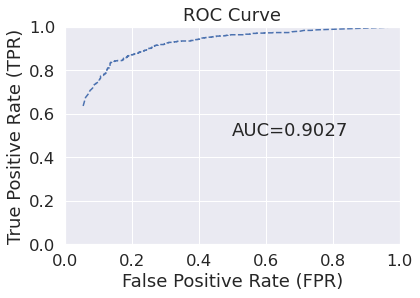

-----------------------------
Model ID:  DeepLearning_model_python_1605362597414_3340
XVal Accuracy:  0.7710547833197057
Training time (ms):  92889
XVal AUC:  0.8209884751773049


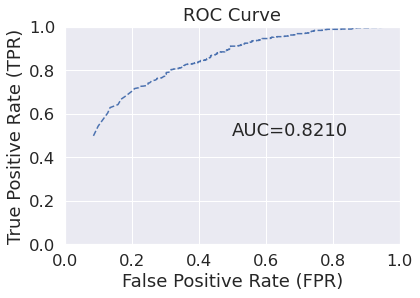

-----------------------------
Model ID:  DRF_model_python_1605423034668_386
XVal Accuracy:  0.856909239574816
Training time (ms):  1900902
XVal AUC:  0.9106057919621748


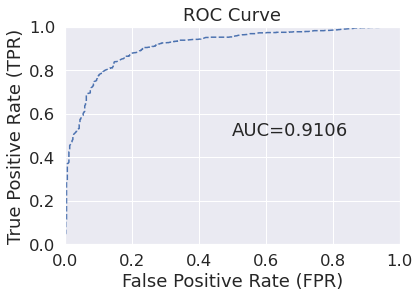

-----------------------------
Model ID:  DRF_model_python_1605362597414_2415
XVal Accuracy:  0.8348323793949305
Training time (ms):  4970
XVal AUC:  0.8844089834515367


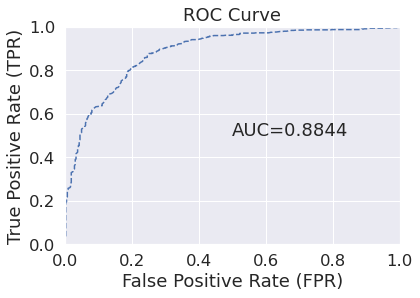

-----------------------------
Model ID:  GBM_model_python_1605423034668_39
XVal Accuracy:  0.8479149632052331
Training time (ms):  71120
XVal AUC:  0.9054151891252956


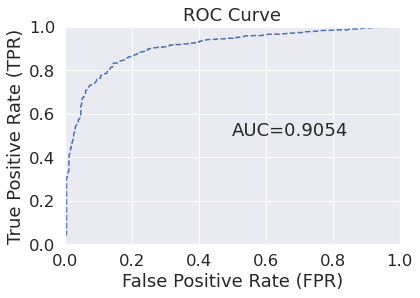

-----------------------------
Model ID:  GBM_model_python_1605362597414_1525
XVal Accuracy:  0.8274734260016353
Training time (ms):  22756
XVal AUC:  0.8782254728132387


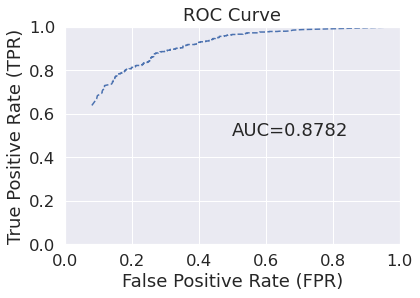

-----------------------------
Model ID:  GLM_model_python_1605423034668_20
XVal Accuracy:  0.8577269010629599
Training time (ms):  6048
XVal AUC:  0.9118498817966902


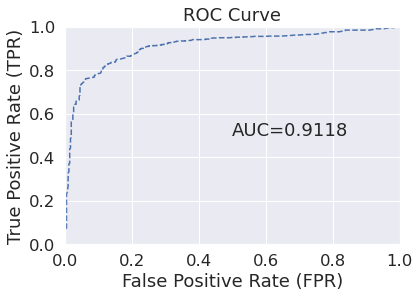

-----------------------------
Model ID:  GLM_model_python_1605362597414_1506
XVal Accuracy:  0.8086672117743254
Training time (ms):  216
XVal AUC:  0.8693484042553191


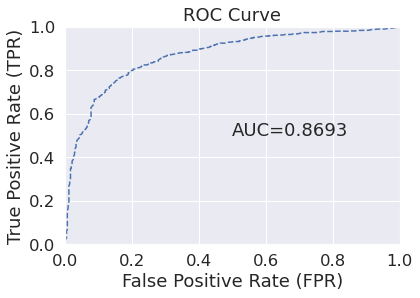

-----------------------------
Model ID:  NaiveBayes_model_python_1605423034668_1
XVal Accuracy:  0.7334423548650858
Training time (ms):  5211
XVal AUC:  0.7146276595744682


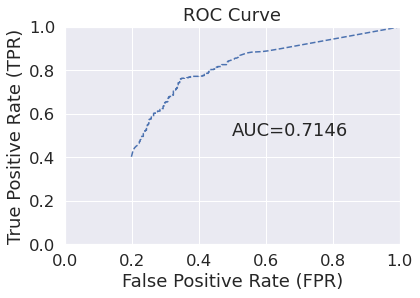

-----------------------------
Model ID:  NaiveBayes_model_python_1605362597414_1487
XVal Accuracy:  0.6745707277187244
Training time (ms):  130
XVal AUC:  0.62177304964539


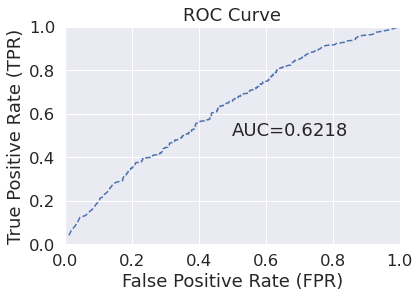

-----------------------------
Model ID:  XGBoost_model_python_1605423034668_274
XVal Accuracy:  0.866721177432543
Training time (ms):  9638
XVal AUC:  0.9238918439716312


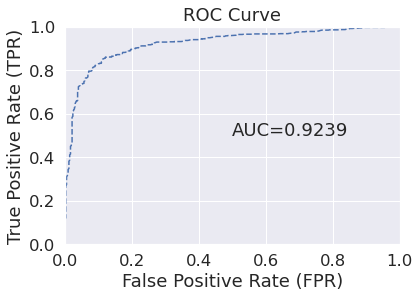

-----------------------------
Model ID:  XGBoost_model_python_1605362597414_1768
XVal Accuracy:  0.83892068683565
Training time (ms):  4348
XVal AUC:  0.8880614657210402


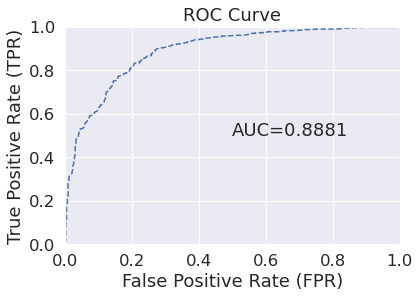

-----------------------------
Model ID:  stacked_ensemble_ALL_FEATURES_ALL_MODELS_metalearner_deeplearning
XVal Accuracy:  0.8086672117743254
Training time (ms):  54195
XVal AUC:  0.8633983451536642


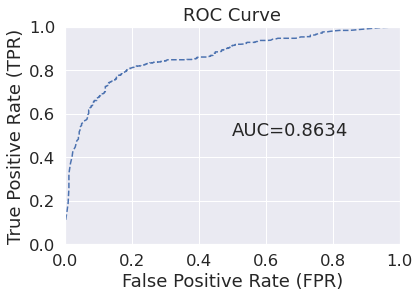

-----------------------------
Model ID:  stacked_ensemble_PCA300_FEATURES_ALL_MODELS_metalearner_deeplearning
XVal Accuracy:  0.7391659852820932
Training time (ms):  280253
XVal AUC:  0.7148921394799055


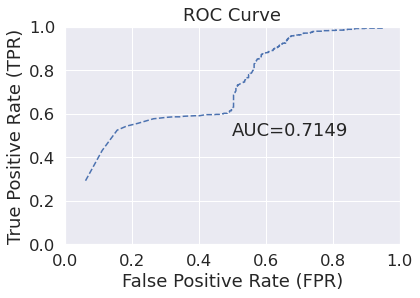

-----------------------------
Model ID:  stacked_ensemble_ALL_FEATURES_ALL_MODELS_metalearner_drf
XVal Accuracy:  0.8683565004088307
Training time (ms):  16388
XVal AUC:  0.9260268912529551


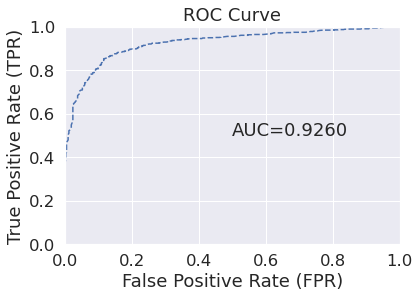

-----------------------------
Model ID:  stacked_ensemble_PCA300_FEATURES_ALL_MODELS_metalearner_drf
XVal Accuracy:  0.8242027800490597
Training time (ms):  7132
XVal AUC:  0.880774231678487


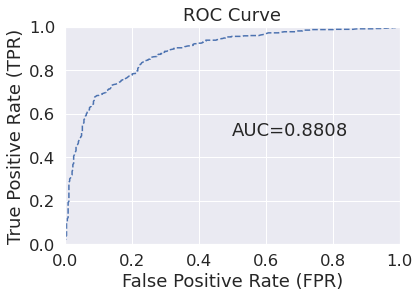

-----------------------------
Model ID:  stacked_ensemble_ALL_FEATURES_ALL_MODELS_metalearner_gbm
XVal Accuracy:  0.866721177432543
Training time (ms):  14372
XVal AUC:  0.9249010047281323


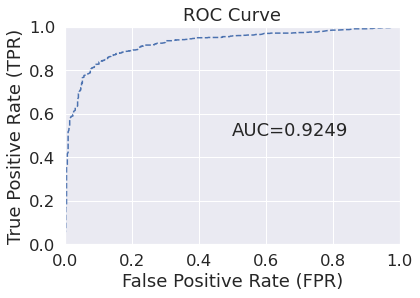

-----------------------------
Model ID:  stacked_ensemble_PCA300_FEATURES_ALL_MODELS_metalearner_gbm
XVal Accuracy:  0.8086672117743254
Training time (ms):  12611
XVal AUC:  0.8498921394799054


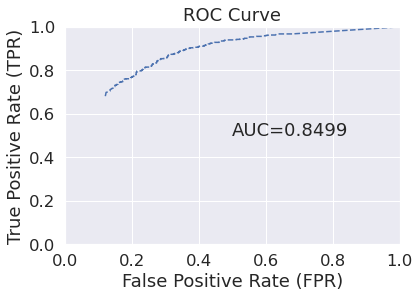

-----------------------------
Model ID:  stacked_ensemble_ALL_FEATURES_ALL_MODELS_metalearner_glm
XVal Accuracy:  0.874897792313982
Training time (ms):  13136
XVal AUC:  0.9231072695035462


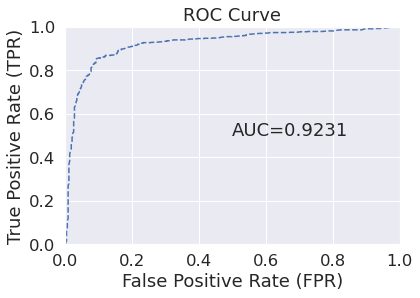

-----------------------------
Model ID:  stacked_ensemble_PCA300_FEATURES_ALL_MODELS_metalearner_glm
XVal Accuracy:  0.8405560098119379
Training time (ms):  685
XVal AUC:  0.9017479314420803


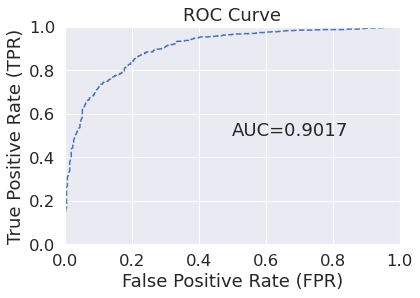

-----------------------------
Model ID:  stacked_ensemble_ALL_FEATURES_ALL_MODELS_metalearner_naivebayes
XVal Accuracy:  0.8634505314799673
Training time (ms):  12785
XVal AUC:  0.9184530141843972


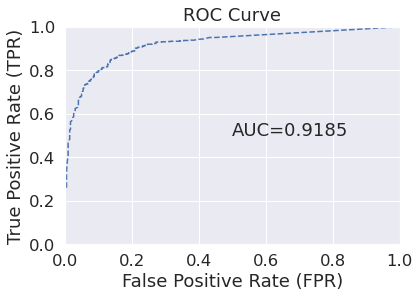

-----------------------------
Model ID:  stacked_ensemble_PCA300_FEATURES_ALL_MODELS_metalearner_naivebayes
XVal Accuracy:  0.8454619787408013
Training time (ms):  655
XVal AUC:  0.8984471040189125


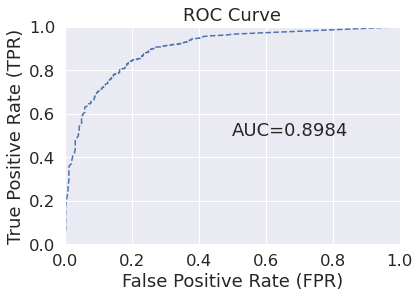

-----------------------------
Model ID:  stacked_ensemble_ALL_FEATURES_ALL_MODELS_metalearner_xgboost
XVal Accuracy:  0.8503679476696647
Training time (ms):  17681
XVal AUC:  0.9159352836879433


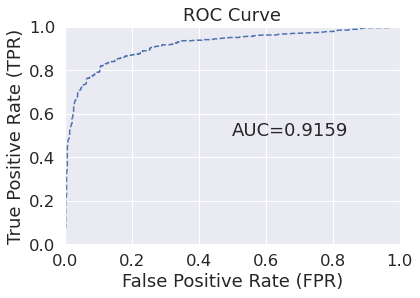

-----------------------------
Model ID:  stacked_ensemble_PCA300_FEATURES_ALL_MODELS_metalearner_xgboost
XVal Accuracy:  0.8250204415372036
Training time (ms):  5528
XVal AUC:  0.8839967494089835


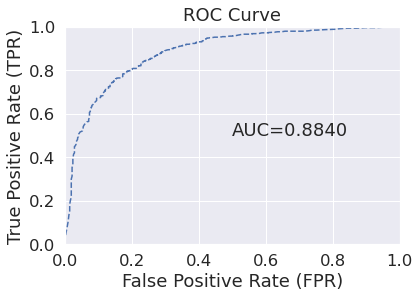

-----------------------------
Model ID:  stacked_ensemble_ALL_FEATURES_CHECKPOINT_MODELS_metalearner_deeplearning
XVal Accuracy:  0.7481602616516762
Training time (ms):  47602
XVal AUC:  0.8082505910165484


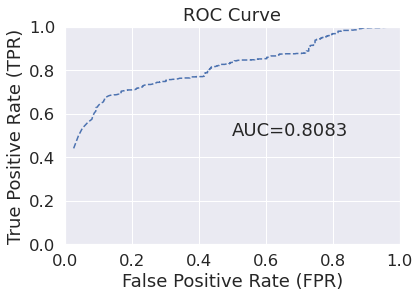

-----------------------------
Model ID:  stacked_ensemble_PCA300_FEATURES_CHECKPOINT_MODELS_metalearner_deeplearning
XVal Accuracy:  0.7269010629599346
Training time (ms):  279786
XVal AUC:  0.7530082742316785
-----------------------------
Model ID:  stacked_ensemble_ALL_FEATURES_CHECKPOINT_MODELS_metalearner_drf
XVal Accuracy:  0.8659035159443991
Training time (ms):  11379
XVal AUC:  0.9191282505910165
-----------------------------
Model ID:  stacked_ensemble_PCA300_FEATURES_CHECKPOINT_MODELS_metalearner_drf
XVal Accuracy:  0.821749795584628
Training time (ms):  6638
XVal AUC:  0.8804920212765958
-----------------------------
Model ID:  stacked_ensemble_ALL_FEATURES_CHECKPOINT_MODELS_metalearner_gbm
XVal Accuracy:  0.866721177432543
Training time (ms):  11276
XVal AUC:  0.9223847517730496
-----------------------------
Model ID:  stacked_ensemble_PCA300_FEATURES_CHECKPOINT_MODELS_metalearner_gbm
XVal Accuracy:  0.8062142273098937
Training time (ms):  11894
XVal AUC:  0.854057328605201


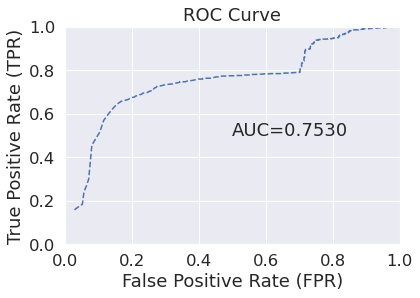

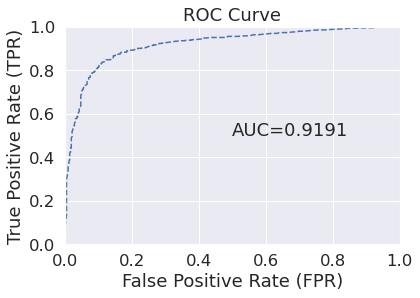

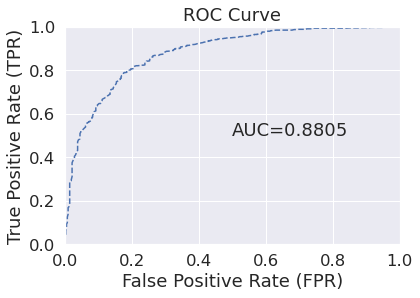

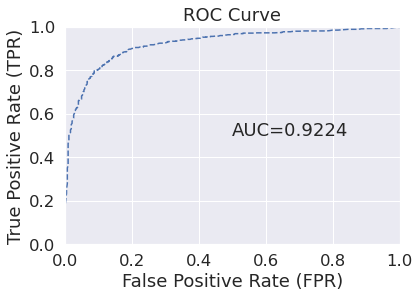

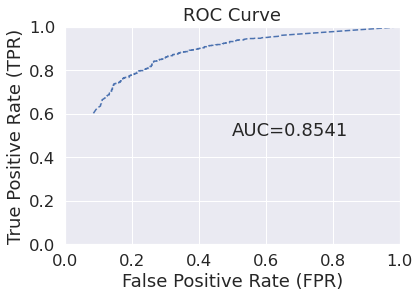

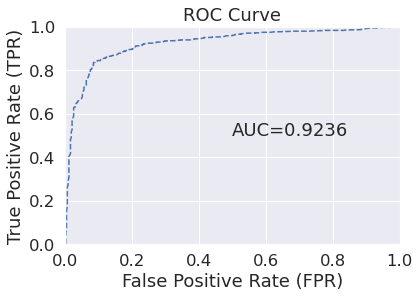

-----------------------------
Model ID:  stacked_ensemble_PCA300_FEATURES_CHECKPOINT_MODELS_metalearner_glm
XVal Accuracy:  0.8413736713000818
Training time (ms):  597
XVal AUC:  0.8965174349881797


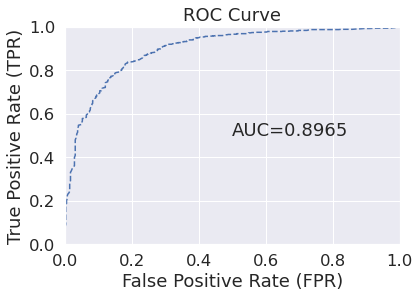

-----------------------------
Model ID:  stacked_ensemble_ALL_FEATURES_CHECKPOINT_MODELS_metalearner_naivebayes
XVal Accuracy:  0.8618152085036794
Training time (ms):  9295
XVal AUC:  0.9221498226950354


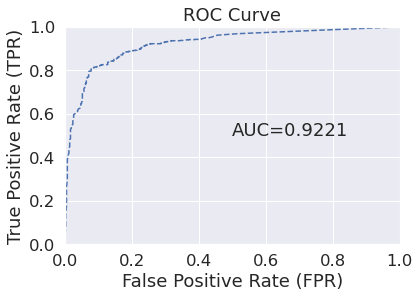

-----------------------------
Model ID:  stacked_ensemble_PCA300_FEATURES_CHECKPOINT_MODELS_metalearner_naivebayes
XVal Accuracy:  0.8405560098119379
Training time (ms):  601
XVal AUC:  0.8956368203309693


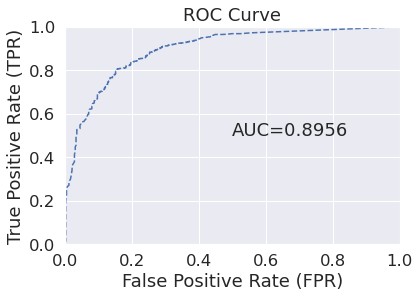

-----------------------------
Model ID:  stacked_ensemble_ALL_FEATURES_CHECKPOINT_MODELS_metalearner_xgboost
XVal Accuracy:  0.8528209321340965
Training time (ms):  14069
XVal AUC:  0.9068676122931443


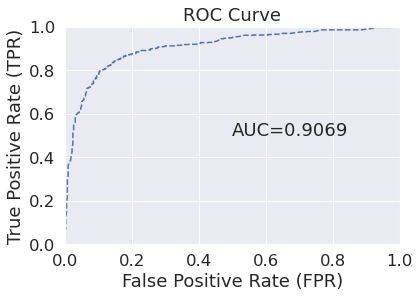

-----------------------------
Model ID:  stacked_ensemble_PCA300_FEATURES_CHECKPOINT_MODELS_metalearner_xgboost
XVal Accuracy:  0.8233851185609158
Training time (ms):  5439
XVal AUC:  0.8786244089834515


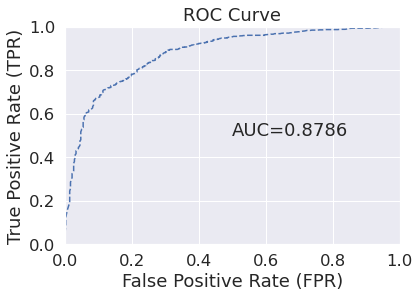

-----------------------------
Model ID:  stacked_ensemble_ALL_FEATURES_CHECKPOINT_nogbm_MODELS_metalearner_deeplearning
XVal Accuracy:  0.8282910874897792
Training time (ms):  45733
XVal AUC:  0.8788741134751773


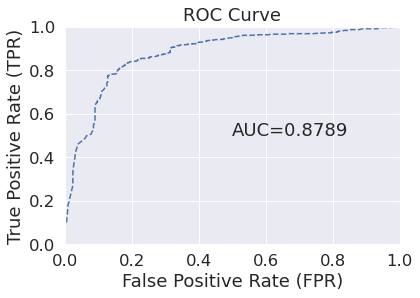

-----------------------------
Model ID:  stacked_ensemble_PCA300_FEATURES_CHECKPOINT_nogbm_MODELS_metalearner_deeplearning
XVal Accuracy:  0.7031888798037612
Training time (ms):  338640
XVal AUC:  0.6323758865248227


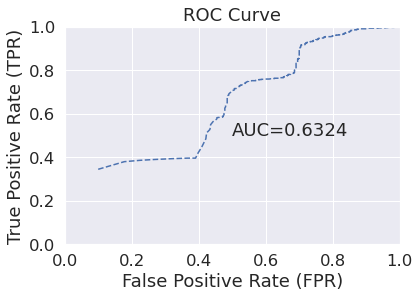

-----------------------------
Model ID:  stacked_ensemble_ALL_FEATURES_CHECKPOINT_nogbm_MODELS_metalearner_drf
XVal Accuracy:  0.8708094848732625
Training time (ms):  10068
XVal AUC:  0.9200059101654847


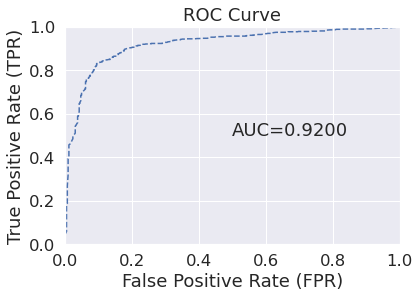

-----------------------------
Model ID:  stacked_ensemble_PCA300_FEATURES_CHECKPOINT_nogbm_MODELS_metalearner_drf
XVal Accuracy:  0.8160261651676206
Training time (ms):  6518
XVal AUC:  0.8663593380614658


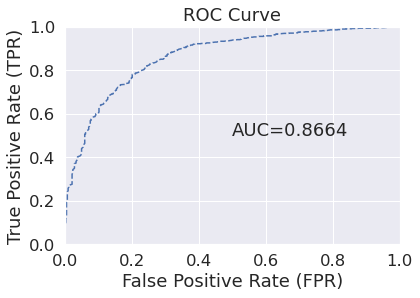

-----------------------------
Model ID:  stacked_ensemble_ALL_FEATURES_CHECKPOINT_nogbm_MODELS_metalearner_gbm
XVal Accuracy:  0.8618152085036794
Training time (ms):  10280
XVal AUC:  0.9218543144208038


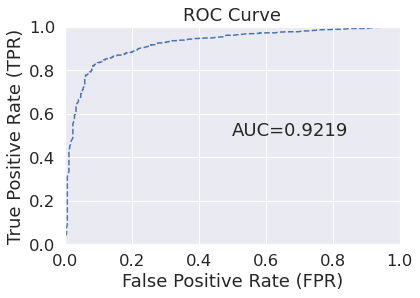

-----------------------------
Model ID:  stacked_ensemble_PCA300_FEATURES_CHECKPOINT_nogbm_MODELS_metalearner_gbm
XVal Accuracy:  0.7923139820114473
Training time (ms):  11571
XVal AUC:  0.8412086288416076


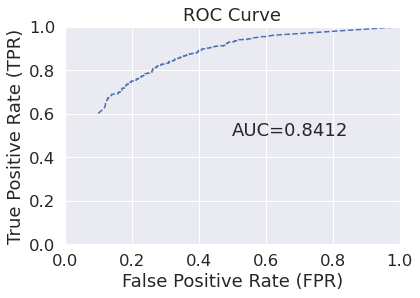

-----------------------------
Model ID:  stacked_ensemble_ALL_FEATURES_CHECKPOINT_nogbm_MODELS_metalearner_glm
XVal Accuracy:  0.866721177432543
Training time (ms):  8128
XVal AUC:  0.9242213356973995


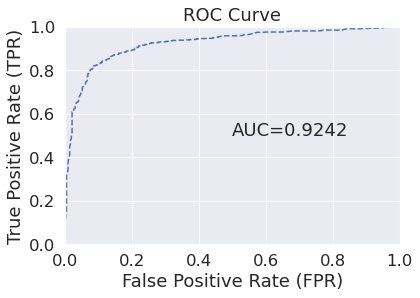

-----------------------------
Model ID:  stacked_ensemble_PCA300_FEATURES_CHECKPOINT_nogbm_MODELS_metalearner_glm
XVal Accuracy:  0.8413736713000818
Training time (ms):  589
XVal AUC:  0.8967715721040189


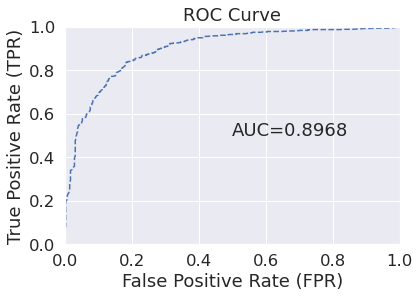

-----------------------------
Model ID:  stacked_ensemble_ALL_FEATURES_CHECKPOINT_nogbm_MODELS_metalearner_naivebayes
XVal Accuracy:  0.8683565004088307
Training time (ms):  7497
XVal AUC:  0.9242686170212766


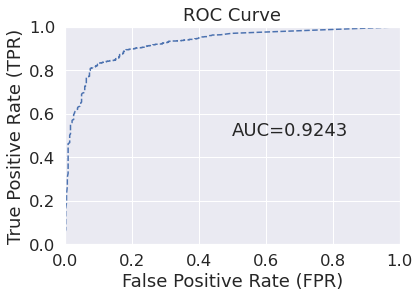

-----------------------------
Model ID:  stacked_ensemble_PCA300_FEATURES_CHECKPOINT_nogbm_MODELS_metalearner_naivebayes
XVal Accuracy:  0.83892068683565
Training time (ms):  468
XVal AUC:  0.8972680260047281


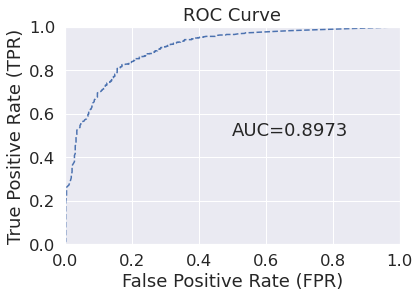

-----------------------------
Model ID:  stacked_ensemble_ALL_FEATURES_CHECKPOINT_nogbm_MODELS_metalearner_xgboost
XVal Accuracy:  0.8479149632052331
Training time (ms):  11570
XVal AUC:  0.9019355791962175


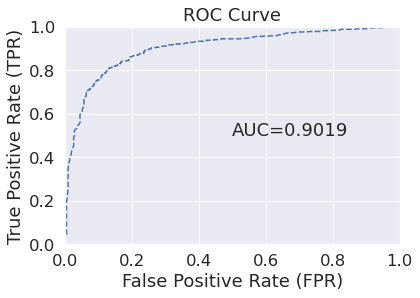

-----------------------------
Model ID:  stacked_ensemble_PCA300_FEATURES_CHECKPOINT_nogbm_MODELS_metalearner_xgboost
XVal Accuracy:  0.8143908421913328
Training time (ms):  6247
XVal AUC:  0.8744400118203309


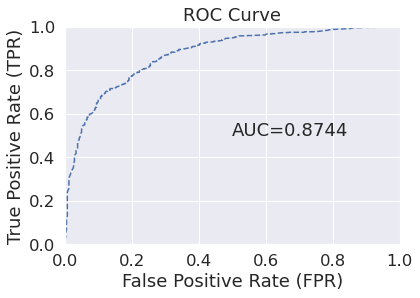

-----------------------------


In [130]:
import time

all_final_models = [
top_dl,
top_dl_pca,
top_drf,
top_drf_pca,
top_gbm,
top_gbm_pca,
top_glm,
top_glm_pca,
top_nb,
top_nb_pca,
top_xgb,
top_xgb_pca,


top_ensemble_ALL_MODELS_METALEARNER_deeplearning,
top_ensemble_ALL_MODELS_METALEARNER_deeplearning_pca,
top_ensemble_ALL_MODELS_METALEARNER_drf,
top_ensemble_ALL_MODELS_METALEARNER_drf_pca,
top_ensemble_ALL_MODELS_METALEARNER_gbm,
top_ensemble_ALL_MODELS_METALEARNER_gbm_pca,
top_ensemble_ALL_MODELS_METALEARNER_glm,
top_ensemble_ALL_MODELS_METALEARNER_glm_pca,
top_ensemble_ALL_MODELS_METALEARNER_naivebayes,
top_ensemble_ALL_MODELS_METALEARNER_naivebayes_pca,
top_ensemble_ALL_MODELS_METALEARNER_xgboost,
top_ensemble_ALL_MODELS_METALEARNER_xgboost_pca,

top_ensemble_CHECKPOINT_MODELS_METALEARNER_deeplearning,
top_ensemble_CHECKPOINT_MODELS_METALEARNER_deeplearning_pca,
top_ensemble_CHECKPOINT_MODELS_METALEARNER_drf,
top_ensemble_CHECKPOINT_MODELS_METALEARNER_drf_pca,
top_ensemble_CHECKPOINT_MODELS_METALEARNER_gbm,
top_ensemble_CHECKPOINT_MODELS_METALEARNER_gbm_pca,
top_ensemble_CHECKPOINT_MODELS_METALEARNER_glm,
top_ensemble_CHECKPOINT_MODELS_METALEARNER_glm_pca,
top_ensemble_CHECKPOINT_MODELS_METALEARNER_naivebayes,
top_ensemble_CHECKPOINT_MODELS_METALEARNER_naivebayes_pca,
top_ensemble_CHECKPOINT_MODELS_METALEARNER_xgboost,
top_ensemble_CHECKPOINT_MODELS_METALEARNER_xgboost_pca,

top_ensemble_CHECKPOINT_nogbm_MODELS_METALEARNER_deeplearning,
top_ensemble_CHECKPOINT_nogbm_MODELS_METALEARNER_deeplearning_pca,
top_ensemble_CHECKPOINT_nogbm_MODELS_METALEARNER_drf,
top_ensemble_CHECKPOINT_nogbm_MODELS_METALEARNER_drf_pca,
top_ensemble_CHECKPOINT_nogbm_MODELS_METALEARNER_gbm,
top_ensemble_CHECKPOINT_nogbm_MODELS_METALEARNER_gbm_pca,
top_ensemble_CHECKPOINT_nogbm_MODELS_METALEARNER_glm,
top_ensemble_CHECKPOINT_nogbm_MODELS_METALEARNER_glm_pca,
top_ensemble_CHECKPOINT_nogbm_MODELS_METALEARNER_naivebayes, 
top_ensemble_CHECKPOINT_nogbm_MODELS_METALEARNER_naivebayes_pca ,
top_ensemble_CHECKPOINT_nogbm_MODELS_METALEARNER_xgboost,
top_ensemble_CHECKPOINT_nogbm_MODELS_METALEARNER_xgboost_pca,
]


for a_mdl in all_final_models:
    xval_perf = a_mdl.model_performance(xval=True)

    time.sleep(3)

    valid_perf = a_mdl.model_performance(valid=True)



    print('Model ID: ', a_mdl.model_id)
    print('XVal Accuracy: ', xval_perf.accuracy()[0][1])
    print('Training time (ms): ', a_mdl.run_time)
    print('XVal AUC: ', xval_perf.auc())

    time.sleep(1)
    
    xval_perf.plot()


    # print('Validation data AUC: ', valid_perf.auc())
    # print('Validation data Accuracy: ', valid_perf.accuracy()[0][1])


    time.sleep(3)

    # valid_perf.plot()



    print("-----------------------------")

Model ID:  DeepLearning_model_python_1605423034668_341
Validation data AUC:  0.6180890841107924
Validation data Accuracy:  0.6786427145708582


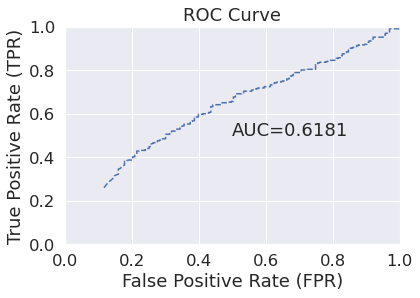

-----------------------------
Model ID:  DeepLearning_model_python_1605362597414_3340
Validation data AUC:  0.5544977674519911
Validation data Accuracy:  0.6746506986027944


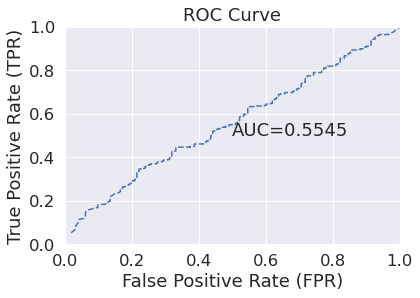

-----------------------------
Model ID:  DRF_model_python_1605423034668_386
Validation data AUC:  0.6008821287254511
Validation data Accuracy:  0.6806387225548902


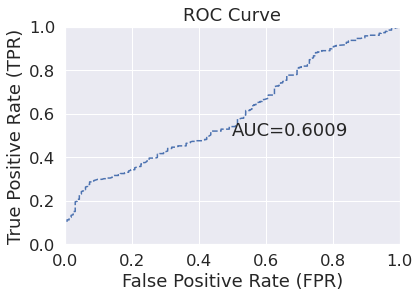

-----------------------------
Model ID:  DRF_model_python_1605362597414_2415
Validation data AUC:  0.5821051294151813
Validation data Accuracy:  0.6866267465069861


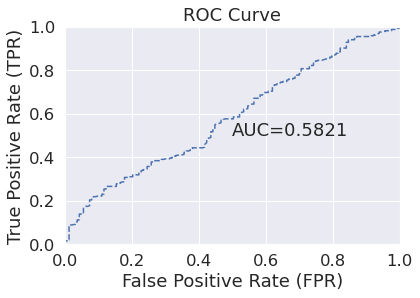

-----------------------------
Model ID:  GBM_model_python_1605423034668_39
Validation data AUC:  0.684212436925981
Validation data Accuracy:  0.7005988023952096


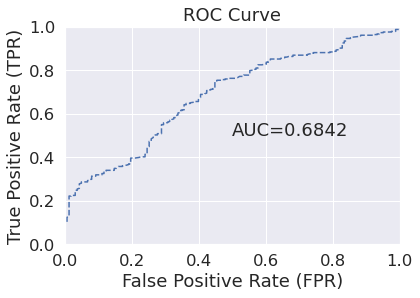

-----------------------------
Model ID:  GBM_model_python_1605362597414_1525
Validation data AUC:  0.5569935020147384
Validation data Accuracy:  0.6826347305389222


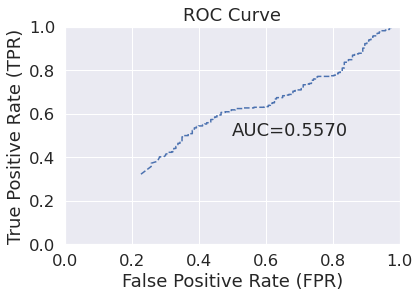

-----------------------------
Model ID:  GLM_model_python_1605423034668_20
Validation data AUC:  0.7188169310632736
Validation data Accuracy:  0.6906187624750499


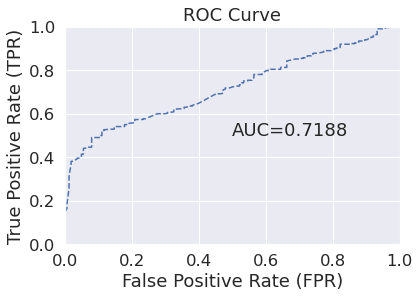

-----------------------------
Model ID:  GLM_model_python_1605362597414_1506
Validation data AUC:  0.6266381094130032
Validation data Accuracy:  0.6786427145708582


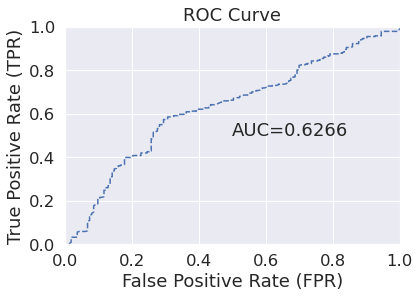

-----------------------------
Model ID:  NaiveBayes_model_python_1605423034668_1
Validation data AUC:  0.6037862562166479
Validation data Accuracy:  0.6946107784431138


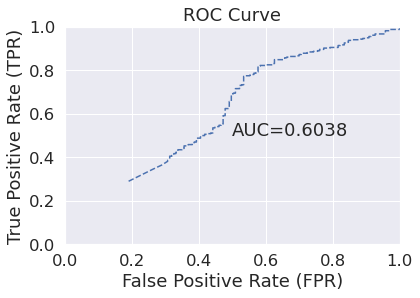

-----------------------------
Model ID:  NaiveBayes_model_python_1605362597414_1487
Validation data AUC:  0.5736650088938905
Validation data Accuracy:  0.6786427145708582


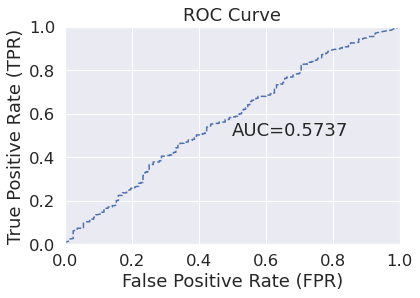

-----------------------------
Model ID:  XGBoost_model_python_1605423034668_274
Validation data AUC:  0.7019820670127418
Validation data Accuracy:  0.6926147704590818


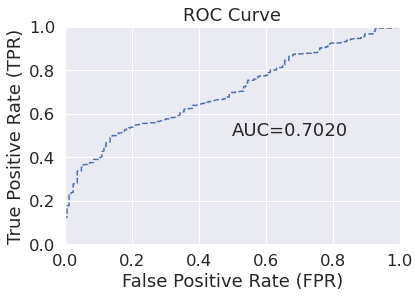

-----------------------------
Model ID:  XGBoost_model_python_1605362597414_1768
Validation data AUC:  0.6006189421715613
Validation data Accuracy:  0.6746506986027944


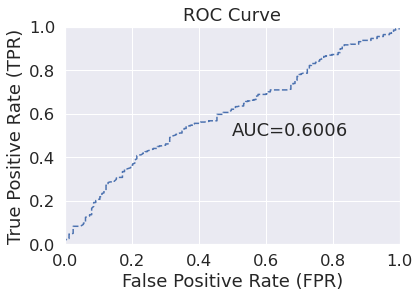

-----------------------------
Model ID:  stacked_ensemble_ALL_FEATURES_ALL_MODELS_metalearner_deeplearning
Validation data AUC:  0.7236450430173885
Validation data Accuracy:  0.6906187624750499


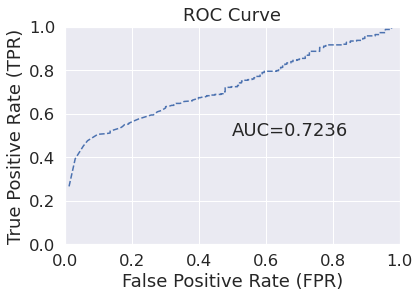

-----------------------------
Model ID:  stacked_ensemble_PCA300_FEATURES_ALL_MODELS_metalearner_deeplearning
Validation data AUC:  0.6143227937706466
Validation data Accuracy:  0.6766467065868264


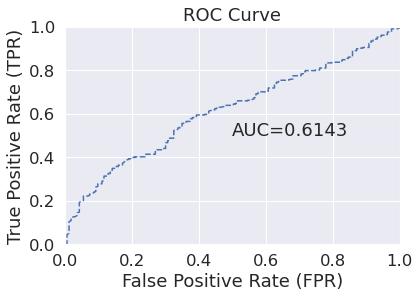

-----------------------------
Model ID:  stacked_ensemble_ALL_FEATURES_ALL_MODELS_metalearner_drf
Validation data AUC:  0.699050713326315
Validation data Accuracy:  0.6846307385229541


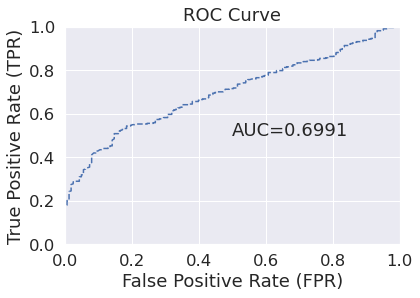

-----------------------------
Model ID:  stacked_ensemble_PCA300_FEATURES_ALL_MODELS_metalearner_drf
Validation data AUC:  0.5751079972410789
Validation data Accuracy:  0.6766467065868264


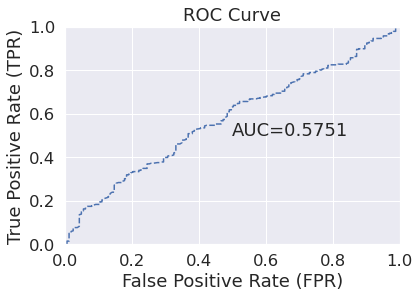

-----------------------------
Model ID:  stacked_ensemble_ALL_FEATURES_ALL_MODELS_metalearner_gbm
Validation data AUC:  0.6927342360329619
Validation data Accuracy:  0.6906187624750499


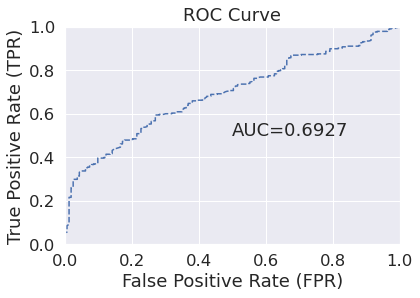

-----------------------------
Model ID:  stacked_ensemble_PCA300_FEATURES_ALL_MODELS_metalearner_gbm
Validation data AUC:  0.5934584528260791
Validation data Accuracy:  0.6746506986027944


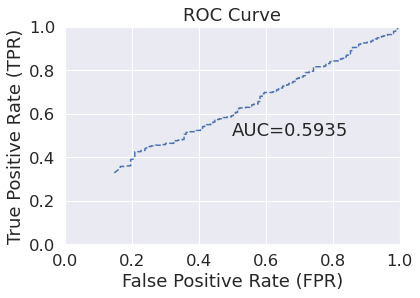

-----------------------------
Model ID:  stacked_ensemble_ALL_FEATURES_ALL_MODELS_metalearner_glm
Validation data AUC:  0.7093875921152939
Validation data Accuracy:  0.6926147704590818


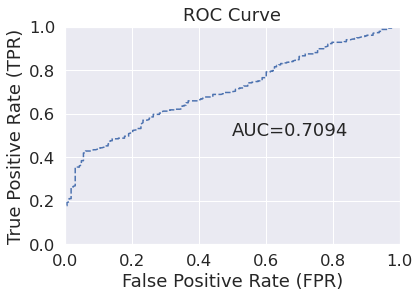

-----------------------------
Model ID:  stacked_ensemble_PCA300_FEATURES_ALL_MODELS_metalearner_glm
Validation data AUC:  0.6213834537336189
Validation data Accuracy:  0.6746506986027944


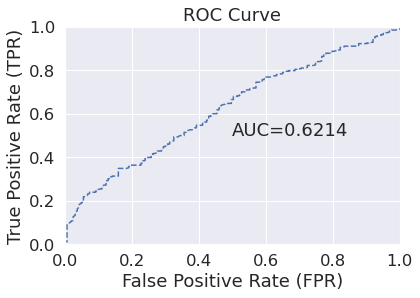

-----------------------------
Model ID:  stacked_ensemble_ALL_FEATURES_ALL_MODELS_metalearner_naivebayes
Validation data AUC:  0.6918085453951428
Validation data Accuracy:  0.6946107784431138


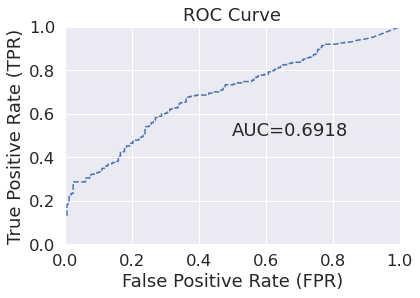

-----------------------------
Model ID:  stacked_ensemble_PCA300_FEATURES_ALL_MODELS_metalearner_naivebayes
Validation data AUC:  0.6091044396849021
Validation data Accuracy:  0.6746506986027944


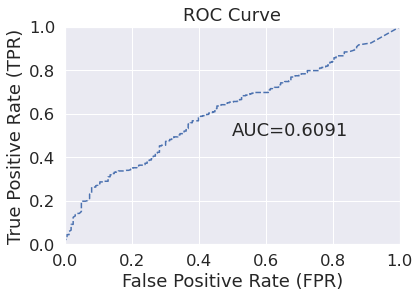

-----------------------------
Model ID:  stacked_ensemble_ALL_FEATURES_ALL_MODELS_metalearner_xgboost
Validation data AUC:  0.650896649362907
Validation data Accuracy:  0.6826347305389222


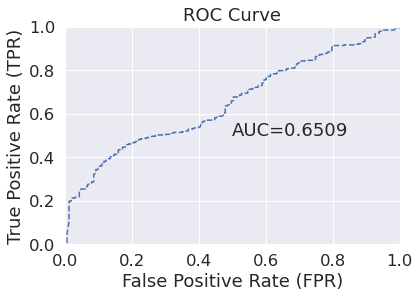

-----------------------------
Model ID:  stacked_ensemble_PCA300_FEATURES_ALL_MODELS_metalearner_xgboost
Validation data AUC:  0.5999473626892221
Validation data Accuracy:  0.6786427145708582


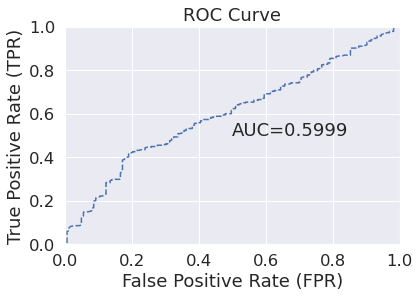

-----------------------------
Model ID:  stacked_ensemble_ALL_FEATURES_CHECKPOINT_MODELS_metalearner_deeplearning
Validation data AUC:  0.6794206265655063
Validation data Accuracy:  0.6946107784431138


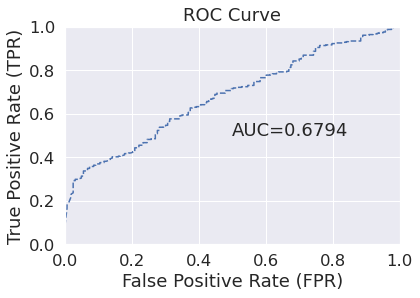

-----------------------------
Model ID:  stacked_ensemble_PCA300_FEATURES_CHECKPOINT_MODELS_metalearner_deeplearning
Validation data AUC:  0.5992485570116528
Validation data Accuracy:  0.6746506986027944


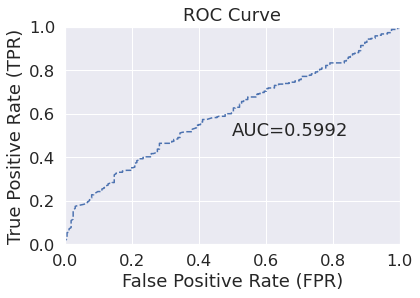

-----------------------------
Model ID:  stacked_ensemble_ALL_FEATURES_CHECKPOINT_MODELS_metalearner_drf
Validation data AUC:  0.6710349584346753
Validation data Accuracy:  0.6866267465069861


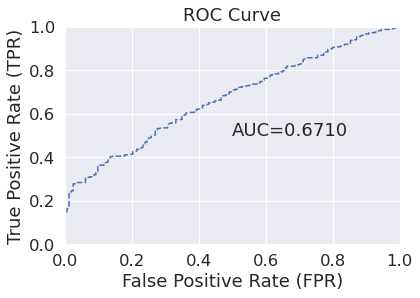

-----------------------------
Model ID:  stacked_ensemble_PCA300_FEATURES_CHECKPOINT_MODELS_metalearner_drf
Validation data AUC:  0.5761970450502777
Validation data Accuracy:  0.6806387225548902


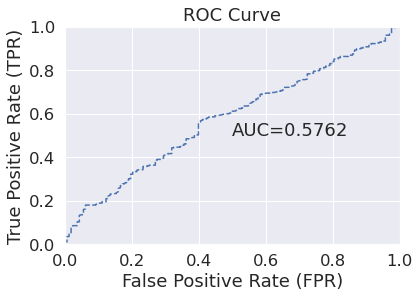

-----------------------------
Model ID:  stacked_ensemble_ALL_FEATURES_CHECKPOINT_MODELS_metalearner_gbm
Validation data AUC:  0.6637927905035031
Validation data Accuracy:  0.6786427145708582


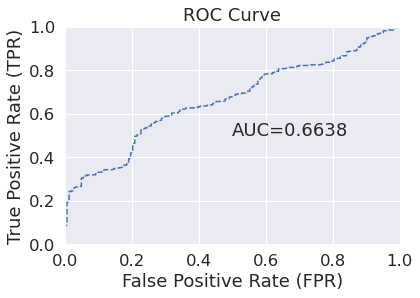

-----------------------------
Model ID:  stacked_ensemble_PCA300_FEATURES_CHECKPOINT_MODELS_metalearner_gbm
Validation data AUC:  0.5840744908701492
Validation data Accuracy:  0.6806387225548902


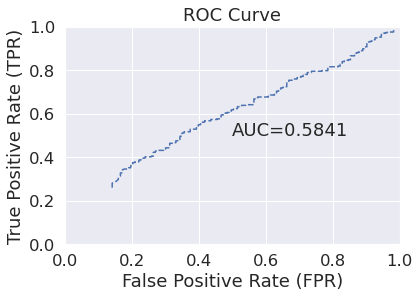

-----------------------------
Model ID:  stacked_ensemble_ALL_FEATURES_CHECKPOINT_MODELS_metalearner_glm
Validation data AUC:  0.6710712600283153
Validation data Accuracy:  0.6946107784431138


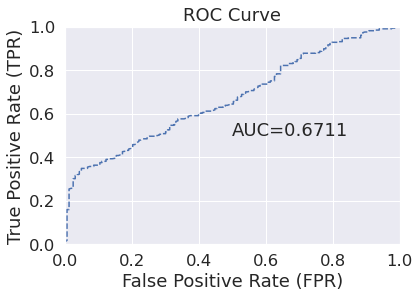

-----------------------------
Model ID:  stacked_ensemble_PCA300_FEATURES_CHECKPOINT_MODELS_metalearner_glm
Validation data AUC:  0.6081696736486731
Validation data Accuracy:  0.6746506986027944


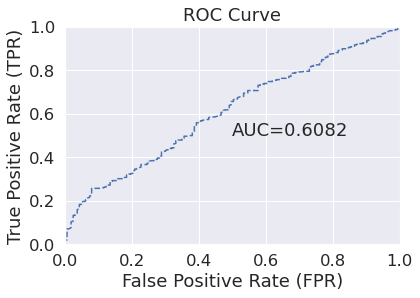

-----------------------------
Model ID:  stacked_ensemble_ALL_FEATURES_CHECKPOINT_MODELS_metalearner_naivebayes
Validation data AUC:  0.676806911823429
Validation data Accuracy:  0.6946107784431138


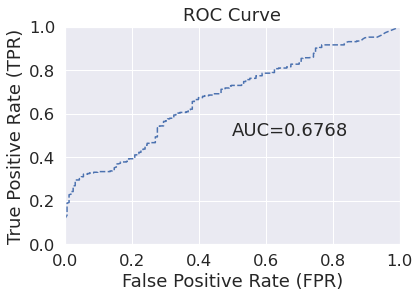

-----------------------------
Model ID:  stacked_ensemble_PCA300_FEATURES_CHECKPOINT_MODELS_metalearner_naivebayes
Validation data AUC:  0.5926507423675899
Validation data Accuracy:  0.6746506986027944


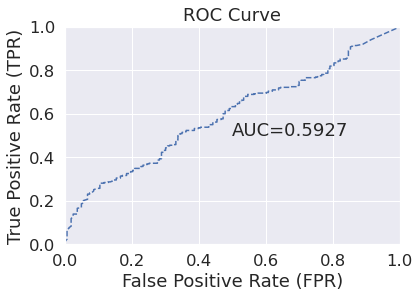

-----------------------------
Model ID:  stacked_ensemble_ALL_FEATURES_CHECKPOINT_MODELS_metalearner_xgboost
Validation data AUC:  0.6314480705702981
Validation data Accuracy:  0.6806387225548902


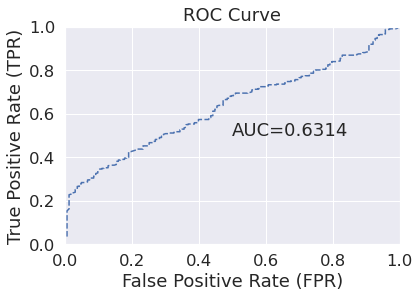

-----------------------------
Model ID:  stacked_ensemble_PCA300_FEATURES_CHECKPOINT_MODELS_metalearner_xgboost
Validation data AUC:  0.5822231095945112
Validation data Accuracy:  0.6826347305389222


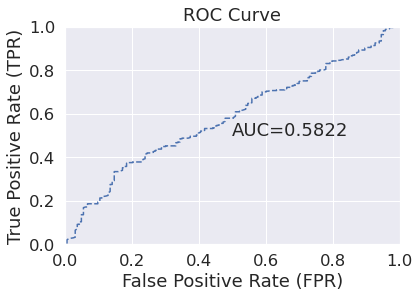

-----------------------------
Model ID:  stacked_ensemble_ALL_FEATURES_CHECKPOINT_nogbm_MODELS_metalearner_deeplearning
Validation data AUC:  0.6776055468835083
Validation data Accuracy:  0.6926147704590818


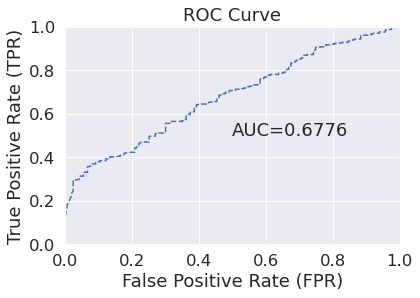

-----------------------------
Model ID:  stacked_ensemble_PCA300_FEATURES_CHECKPOINT_nogbm_MODELS_metalearner_deeplearning
Validation data AUC:  0.6149943732529858
Validation data Accuracy:  0.6746506986027944


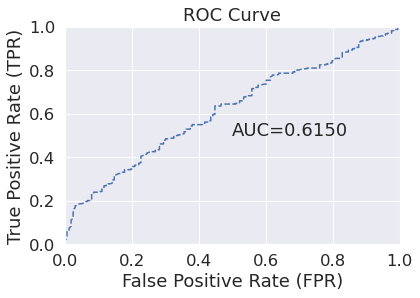

-----------------------------
Model ID:  stacked_ensemble_ALL_FEATURES_CHECKPOINT_nogbm_MODELS_metalearner_drf
Validation data AUC:  0.6450157911932334
Validation data Accuracy:  0.6806387225548902


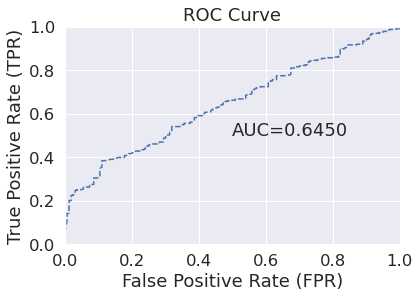

-----------------------------
Model ID:  stacked_ensemble_PCA300_FEATURES_CHECKPOINT_nogbm_MODELS_metalearner_drf
Validation data AUC:  0.577776164373616
Validation data Accuracy:  0.6746506986027944


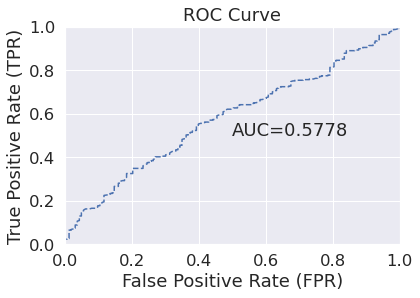

-----------------------------
Model ID:  stacked_ensemble_ALL_FEATURES_CHECKPOINT_nogbm_MODELS_metalearner_gbm
Validation data AUC:  0.6578665553417795
Validation data Accuracy:  0.6826347305389222


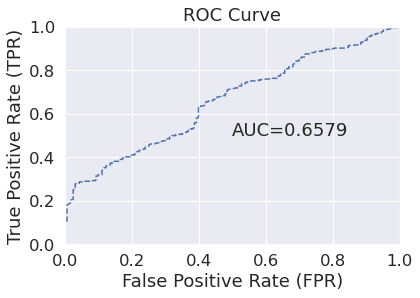

-----------------------------
Model ID:  stacked_ensemble_PCA300_FEATURES_CHECKPOINT_nogbm_MODELS_metalearner_gbm
Validation data AUC:  0.5681834682542564
Validation data Accuracy:  0.6786427145708582


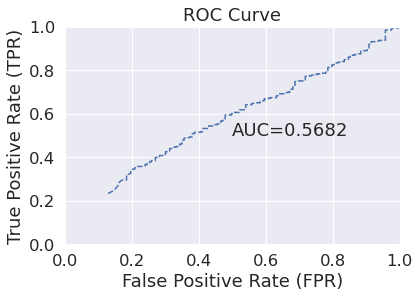

-----------------------------
Model ID:  stacked_ensemble_ALL_FEATURES_CHECKPOINT_nogbm_MODELS_metalearner_glm
Validation data AUC:  0.6919991287617526
Validation data Accuracy:  0.6966067864271457


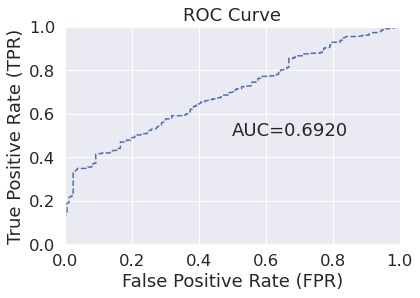

-----------------------------
Model ID:  stacked_ensemble_PCA300_FEATURES_CHECKPOINT_nogbm_MODELS_metalearner_glm
Validation data AUC:  0.6095309834101716
Validation data Accuracy:  0.6746506986027944


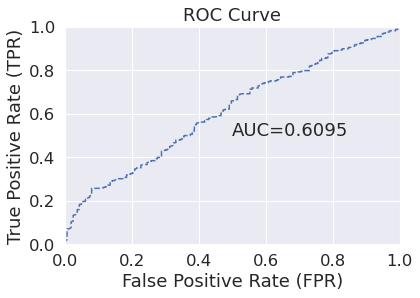

-----------------------------
Model ID:  stacked_ensemble_ALL_FEATURES_CHECKPOINT_nogbm_MODELS_metalearner_naivebayes
Validation data AUC:  0.6688477874178677
Validation data Accuracy:  0.6846307385229541


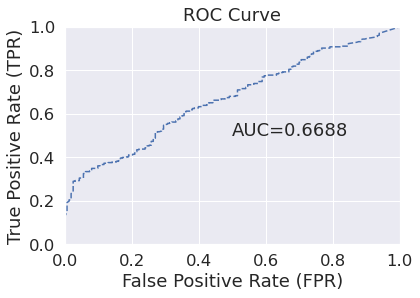

-----------------------------
Model ID:  stacked_ensemble_PCA300_FEATURES_CHECKPOINT_nogbm_MODELS_metalearner_naivebayes
Validation data AUC:  0.6125530910806984
Validation data Accuracy:  0.6746506986027944


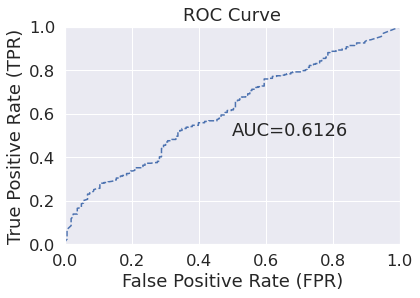

-----------------------------
Model ID:  stacked_ensemble_ALL_FEATURES_CHECKPOINT_nogbm_MODELS_metalearner_xgboost
Validation data AUC:  0.6451428467709732
Validation data Accuracy:  0.6786427145708582


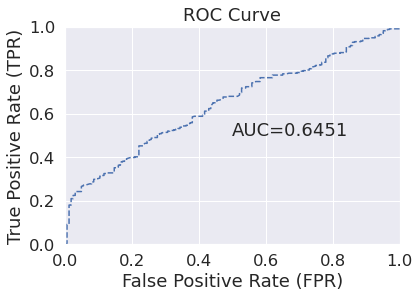

-----------------------------
Model ID:  stacked_ensemble_PCA300_FEATURES_CHECKPOINT_nogbm_MODELS_metalearner_xgboost
Validation data AUC:  0.5808164228409627
Validation data Accuracy:  0.6746506986027944


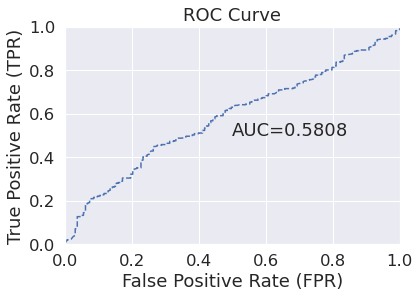

-----------------------------


In [43]:
import time

all_final_models = [
top_dl,
top_dl_pca,
top_drf,
top_drf_pca,
top_gbm,
top_gbm_pca,
top_glm,
top_glm_pca,
top_nb,
top_nb_pca,
top_xgb,
top_xgb_pca,


top_ensemble_ALL_MODELS_METALEARNER_deeplearning,
top_ensemble_ALL_MODELS_METALEARNER_deeplearning_pca,
top_ensemble_ALL_MODELS_METALEARNER_drf,
top_ensemble_ALL_MODELS_METALEARNER_drf_pca,
top_ensemble_ALL_MODELS_METALEARNER_gbm,
top_ensemble_ALL_MODELS_METALEARNER_gbm_pca,
top_ensemble_ALL_MODELS_METALEARNER_glm,
top_ensemble_ALL_MODELS_METALEARNER_glm_pca,
top_ensemble_ALL_MODELS_METALEARNER_naivebayes,
top_ensemble_ALL_MODELS_METALEARNER_naivebayes_pca,
top_ensemble_ALL_MODELS_METALEARNER_xgboost,
top_ensemble_ALL_MODELS_METALEARNER_xgboost_pca,

top_ensemble_CHECKPOINT_MODELS_METALEARNER_deeplearning,
top_ensemble_CHECKPOINT_MODELS_METALEARNER_deeplearning_pca,
top_ensemble_CHECKPOINT_MODELS_METALEARNER_drf,
top_ensemble_CHECKPOINT_MODELS_METALEARNER_drf_pca,
top_ensemble_CHECKPOINT_MODELS_METALEARNER_gbm,
top_ensemble_CHECKPOINT_MODELS_METALEARNER_gbm_pca,
top_ensemble_CHECKPOINT_MODELS_METALEARNER_glm,
top_ensemble_CHECKPOINT_MODELS_METALEARNER_glm_pca,
top_ensemble_CHECKPOINT_MODELS_METALEARNER_naivebayes,
top_ensemble_CHECKPOINT_MODELS_METALEARNER_naivebayes_pca,
top_ensemble_CHECKPOINT_MODELS_METALEARNER_xgboost,
top_ensemble_CHECKPOINT_MODELS_METALEARNER_xgboost_pca,

top_ensemble_CHECKPOINT_nogbm_MODELS_METALEARNER_deeplearning,
top_ensemble_CHECKPOINT_nogbm_MODELS_METALEARNER_deeplearning_pca,
top_ensemble_CHECKPOINT_nogbm_MODELS_METALEARNER_drf,
top_ensemble_CHECKPOINT_nogbm_MODELS_METALEARNER_drf_pca,
top_ensemble_CHECKPOINT_nogbm_MODELS_METALEARNER_gbm,
top_ensemble_CHECKPOINT_nogbm_MODELS_METALEARNER_gbm_pca,
top_ensemble_CHECKPOINT_nogbm_MODELS_METALEARNER_glm,
top_ensemble_CHECKPOINT_nogbm_MODELS_METALEARNER_glm_pca,
top_ensemble_CHECKPOINT_nogbm_MODELS_METALEARNER_naivebayes, 
top_ensemble_CHECKPOINT_nogbm_MODELS_METALEARNER_naivebayes_pca ,
top_ensemble_CHECKPOINT_nogbm_MODELS_METALEARNER_xgboost,
top_ensemble_CHECKPOINT_nogbm_MODELS_METALEARNER_xgboost_pca,
]




for a_mdl in all_final_models:
    xval_perf = a_mdl.model_performance(xval=True)

    time.sleep(3)

    valid_perf = a_mdl.model_performance(valid=True)



    print('Model ID: ', a_mdl.model_id)
    # print('XVal Accuracy: ', xval_perf.accuracy()[0][1])
    # print('Training time (ms): ', a_mdl.run_time)
    # print('XVal AUC: ', xval_perf.auc())

    time.sleep(1)
    
    # xval_perf.plot()


    print('Validation data AUC: ', valid_perf.auc())
    print('Validation data Accuracy: ', valid_perf.accuracy()[0][1])


    time.sleep(3)

    valid_perf.plot()



    print("-----------------------------")

In [9]:
import time

all_final_models = [
top_dl,
top_dl_pca,
top_drf,
top_drf_pca,
top_gbm,
top_gbm_pca,
top_glm,
top_glm_pca,
top_nb,
top_nb_pca,
top_xgb,
top_xgb_pca,


top_ensemble_ALL_MODELS_METALEARNER_deeplearning,
top_ensemble_ALL_MODELS_METALEARNER_deeplearning_pca,
top_ensemble_ALL_MODELS_METALEARNER_drf,
top_ensemble_ALL_MODELS_METALEARNER_drf_pca,
top_ensemble_ALL_MODELS_METALEARNER_gbm,
top_ensemble_ALL_MODELS_METALEARNER_gbm_pca,
top_ensemble_ALL_MODELS_METALEARNER_glm,
top_ensemble_ALL_MODELS_METALEARNER_glm_pca,
top_ensemble_ALL_MODELS_METALEARNER_naivebayes,
top_ensemble_ALL_MODELS_METALEARNER_naivebayes_pca,
top_ensemble_ALL_MODELS_METALEARNER_xgboost,
top_ensemble_ALL_MODELS_METALEARNER_xgboost_pca,

top_ensemble_CHECKPOINT_MODELS_METALEARNER_deeplearning,
top_ensemble_CHECKPOINT_MODELS_METALEARNER_deeplearning_pca,
top_ensemble_CHECKPOINT_MODELS_METALEARNER_drf,
top_ensemble_CHECKPOINT_MODELS_METALEARNER_drf_pca,
top_ensemble_CHECKPOINT_MODELS_METALEARNER_gbm,
top_ensemble_CHECKPOINT_MODELS_METALEARNER_gbm_pca,
top_ensemble_CHECKPOINT_MODELS_METALEARNER_glm,
top_ensemble_CHECKPOINT_MODELS_METALEARNER_glm_pca,
top_ensemble_CHECKPOINT_MODELS_METALEARNER_naivebayes,
top_ensemble_CHECKPOINT_MODELS_METALEARNER_naivebayes_pca,
top_ensemble_CHECKPOINT_MODELS_METALEARNER_xgboost,
top_ensemble_CHECKPOINT_MODELS_METALEARNER_xgboost_pca,

top_ensemble_CHECKPOINT_nogbm_MODELS_METALEARNER_deeplearning,
top_ensemble_CHECKPOINT_nogbm_MODELS_METALEARNER_deeplearning_pca,
top_ensemble_CHECKPOINT_nogbm_MODELS_METALEARNER_drf,
top_ensemble_CHECKPOINT_nogbm_MODELS_METALEARNER_drf_pca,
top_ensemble_CHECKPOINT_nogbm_MODELS_METALEARNER_gbm,
top_ensemble_CHECKPOINT_nogbm_MODELS_METALEARNER_gbm_pca,
top_ensemble_CHECKPOINT_nogbm_MODELS_METALEARNER_glm,
top_ensemble_CHECKPOINT_nogbm_MODELS_METALEARNER_glm_pca,
top_ensemble_CHECKPOINT_nogbm_MODELS_METALEARNER_naivebayes, 
top_ensemble_CHECKPOINT_nogbm_MODELS_METALEARNER_naivebayes_pca ,
top_ensemble_CHECKPOINT_nogbm_MODELS_METALEARNER_xgboost,
top_ensemble_CHECKPOINT_nogbm_MODELS_METALEARNER_xgboost_pca,
]



all_final_model_metrics = []


for a_mdl in all_final_models:
    xval_perf = a_mdl.model_performance(xval=True)


    valid_perf = a_mdl.model_performance(valid=True)

    perf_dict = {}

    perf_dict['model_id'] = a_mdl.model_id
    perf_dict['XVal Accuracy'] = xval_perf.accuracy()[0][1]
    perf_dict['Training time (ms)'] = a_mdl.run_time
    perf_dict['XVal AUC'] = xval_perf.auc()
    perf_dict['Validation data AUC'] = valid_perf.auc()
    perf_dict['Validation data Accuracy'] = valid_perf.accuracy()[0][1]
    all_final_model_metrics.append([a_mdl, perf_dict])


    print('Model ID: ', a_mdl.model_id)


    print("-----------------------------")

Model ID:  DeepLearning_model_python_1605423034668_341
-----------------------------
Model ID:  DeepLearning_model_python_1605362597414_3340
-----------------------------
Model ID:  DRF_model_python_1605423034668_386
-----------------------------
Model ID:  DRF_model_python_1605362597414_2415
-----------------------------
Model ID:  GBM_model_python_1605423034668_39
-----------------------------
Model ID:  GBM_model_python_1605362597414_1525
-----------------------------
Model ID:  GLM_model_python_1605423034668_20
-----------------------------
Model ID:  GLM_model_python_1605362597414_1506
-----------------------------
Model ID:  NaiveBayes_model_python_1605423034668_1
-----------------------------
Model ID:  NaiveBayes_model_python_1605362597414_1487
-----------------------------
Model ID:  XGBoost_model_python_1605423034668_274
-----------------------------
Model ID:  XGBoost_model_python_1605362597414_1768
-----------------------------
Model ID:  stacked_ensemble_ALL_FEATURES_ALL_M

In [14]:
import json
import pprint

for mdl_tuple in all_final_model_metrics:
    perf_dict = mdl_tuple[1]
    pp = pprint.PrettyPrinter(indent=4)
    pp.pprint(perf_dict)


{   'Training time (ms)': 470361,
    'Validation data AUC': 0.6180890841107924,
    'Validation data Accuracy': 0.6786427145708582,
    'XVal AUC': 0.9027482269503546,
    'XVal Accuracy': 0.8511856091578087,
    'model_id': 'DeepLearning_model_python_1605423034668_341'}
{   'Training time (ms)': 92889,
    'Validation data AUC': 0.5544977674519911,
    'Validation data Accuracy': 0.6746506986027944,
    'XVal AUC': 0.8209884751773049,
    'XVal Accuracy': 0.7710547833197057,
    'model_id': 'DeepLearning_model_python_1605362597414_3340'}
{   'Training time (ms)': 1900902,
    'Validation data AUC': 0.6008821287254511,
    'Validation data Accuracy': 0.6806387225548902,
    'XVal AUC': 0.9106057919621748,
    'XVal Accuracy': 0.856909239574816,
    'model_id': 'DRF_model_python_1605423034668_386'}
{   'Training time (ms)': 4970,
    'Validation data AUC': 0.5821051294151813,
    'Validation data Accuracy': 0.6866267465069861,
    'XVal AUC': 0.8844089834515367,
    'XVal Accuracy': 0.

In [23]:
import json
import pprint

for mdl_tuple in all_final_model_metrics[12:24:2]:
    perf_dict = mdl_tuple[1]
    pp = pprint.PrettyPrinter(indent=4)
    # pp.pprint(perf_dict['XVal AUC'])
    pp.pprint(perf_dict['model_id'])


'stacked_ensemble_ALL_FEATURES_ALL_MODELS_metalearner_deeplearning'
'stacked_ensemble_ALL_FEATURES_ALL_MODELS_metalearner_drf'
'stacked_ensemble_ALL_FEATURES_ALL_MODELS_metalearner_gbm'
'stacked_ensemble_ALL_FEATURES_ALL_MODELS_metalearner_glm'
'stacked_ensemble_ALL_FEATURES_ALL_MODELS_metalearner_naivebayes'
'stacked_ensemble_ALL_FEATURES_ALL_MODELS_metalearner_xgboost'


In [18]:
all_final_model_metrics[0:12:1]

Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  DeepLearning_model_python_1605423034668_341


Status of Neuron Layers: predicting Resistance_Status, 2-class classification, bernoulli distribution, CrossEntropy loss, 8,169,502 weights/biases, 102.3 MB, 38,389 training samples, mini-batch size 1


ModelMetricsBinomial: deeplearning
** Reported on train data. **

MSE: 0.0012258900876661381
RMSE: 0.03501271322914204
LogLoss: 0.0036507175060449316
Mean Per-Class Error: 0.0006249999999999867
AUC: 0.999991134751773
AUCPR: 0.9999953271021991
Gini: 0.9999822695035461

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.6368022702966603: 

Maximum Metrics: Maximum metrics at their respective thresholds

Gains/Lift Table: Avg response rate: 65.41 %, avg score: 65.44 %


ModelMetricsBinomial: deeplearning
** Reported on validation data. **

MSE: 0.34593172014589346
RMSE: 0.5881596043132284
LogLoss: 3.5610883292121813
Mean Per-Class Error: 0.3928649217700657
AUC: 0.6180890841

layer  units              type dropout l1 l2  mean_rate  rate_rms  \
0        1  15334             Input       0                              
1        2    500  RectifierDropout      50  0  0   0.751419  0.304448   
2        3    500  RectifierDropout      50  0  0   0.206263  0.330184   
3        4    500  RectifierDropout      50  0  0   0.150533  0.245624   
4        5      2           Softmax          0  0  0.0576422  0.119384   

  momentum mean_weight weight_rms    mean_bias    bias_rms  
0                                                           
1        0  0.00373305  0.0125243     0.493041   0.0059357  
2        0  -0.0012017  0.0464941     0.991294   0.0113085  
3        0  -0.0022917  0.0465452     0.993041  0.00996595  
4        0 -0.00503695   0.244501 -0.000745905   0.0128464

0      1   Error           Rate
0      0  423.0    0.0     0.0    (0.0/423.0)
1      1    1.0  799.0  0.0013    (1.0/800.0)
2  Total  424.0  799.0  0.0008   (1.0/1223.0)

metric     threshold       value    idx
0                        max f1  6.368023e-01    0.999375   43.0
1                        max f2  1.484995e-01    0.999251   47.0
2                  max f0point5  6.368023e-01    0.999750   43.0
3                  max accuracy  6.368023e-01    0.999182   43.0
4                 max precision  1.000000e+00    1.000000    0.0
5                    max recall  1.484995e-01    1.000000   47.0
6               max specificity  1.000000e+00    1.000000    0.0
7              max absolute_mcc  6.368023e-01    0.998196   43.0
8    max min_per_class_accuracy  6.368023e-01    0.998750   43.0
9   max mean_per_class_accuracy  6.368023e-01    0.999375   43.0
10                      max tns  1.000000e+00  423.000000    0.0
11                      max fns  1.000000e+00   85.000000    0.0
12                      max fps  1.176980e-15  423.000000  399.0
13                      max tps  1.484995e-01  800.000000   47.0
14                      max tnr  1.000000e+00    1.000000    0.0
15                      max fnr  1.000000e+00    0.106250    0.0
16                      max fpr  1.176980e-15    1.000000  399.0
17                      max tpr  1.484995e-01    1.000000   47.0

group  cumulative_data_fraction  lower_threshold      lift  \
0         1                  0.063778     1.000000e+00  1.528750   
1         2                  0.103025     1.000000e+00  1.528750   
2         3                  0.151267     1.000000e+00  1.528750   
3         4                  0.200327     1.000000e+00  1.528750   
4         5                  0.300082     1.000000e+00  1.528750   
5         6                  0.399836     1.000000e+00  1.528750   
6         7                  0.500409     1.000000e+00  1.528750   
7         8                  0.600164     9.999999e-01  1.528750   
8         9                  0.699918     8.576781e-06  0.827029   
9        10                  0.799673     4.274945e-09  0.000000   
10       11                  0.899428     2.176997e-11  0.000000   
11       12                  1.000000     1.126409e-42  0.000000   

    cumulative_lift  response_rate         score  cumulative_response_rate  \
0          1.528750       1.000000  1.000000e+00                  1.000000   
1          1.528750       1.000000  1.000000e+00                  1.000000   
2          1.528750       1.000000  1.000000e+00                  1.000000   
3          1.528750       1.000000  1.000000e+00                  1.000000   
4          1.528750       1.000000  1.000000e+00                  1.000000   
5          1.528750       1.000000  1.000000e+00                  1.000000   
6          1.528750       1.000000  1.000000e+00                  1.000000   
7          1.528750       1.000000  1.000000e+00                  1.000000   
8          1.428738       0.540984  5.435974e-01                  0.934579   
9          1.250511       0.000000  9.563100e-07                  0.817996   
10         1.111818       0.000000  1.034711e-09                  0.727273   
11         1.000000       0.000000  2.819443e-12                  0.654129   

    cumulative_score  capture_rate  cumulative_capture_rate        gain  \
0           1.000000       0.09750                  0.09750   52.875000   
1           1.000000       0.06000                  0.15750   52.875000   
2           1.000000       0.07375                  0.23125   52.875000   
3           1.000000       0.07500                  0.30625   52.875000   
4           1.000000       0.15250                  0.45875   52.875000   
5           1.000000       0.15250                  0.61125   52.875000   
6           1.000000       0.15375                  0.76500   52.875000   
7           1.000000       0.15250                  0.91750   52.875000   
8           0.934952       0.08250                  1.00000  -17.297131   
9           0.818322       0.00000                  1.00000 -100.000000   
10          0.727563       0.00000                  1.00000 -100.000000   
11          0.654390       0.00000                  1.00000 -100.000000   

    cumulative_gain  
0         52.875000  
1         52.875000  
2         52.875000  
3         52.875000  
4         52.875000  
5         52.875000  
6         52.875000  
7         52.875000  
8         42.873832  
9         25.051125  
10        11.181818  
11         0.000000


Gains/Lift Table: Avg response rate: 65.41 %, avg score: 82.06 %


Cross-Validation Metrics Summary: 

See the whole table with table.as_data_frame()

Scoring History: 

Variable Importances: 

See the whole table with table.as_data_frame()
Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  DRF_model_python_1605423034668_386


Model Summary: 


ModelMetricsBinomial: drf
** Reported on train data. **

MSE: 0.10664542007637448
RMSE: 0.32656610368557004
LogLoss: 0.3433487515046809
Mean Per-Class Error: 0.10392945544554455
AUC: 0.9490741027227723
AUCPR: 0.9592618407474772
Gini: 0.8981482054455445

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.6542079824627587: 

Maximum Metrics: Maximum metrics at their respective thresholds

Gains/Lift Table: Avg response rate: 49.75 %, avg score: 57.25 %


ModelMetricsBinomial: drf
** Reported on validation data. **

MSE: 0.22893121618870146
RMSE: 0.4784675706761133
LogLoss: 0.6453296660547845
Mean Per-Class Error: 

0      1   Error            Rate
0      0  5.0  158.0  0.9693   (158.0/163.0)
1      1  3.0  335.0  0.0089     (3.0/338.0)
2  Total  8.0  493.0  0.3214   (161.0/501.0)

metric     threshold       value    idx
0                        max f1  3.118005e-09    0.806258  347.0
1                        max f2  4.384808e-14    0.912035  355.0
2                  max f0point5  9.892084e-01    0.728518  172.0
3                  max accuracy  3.118005e-09    0.678643  347.0
4                 max precision  1.000000e+00    0.822430    0.0
5                    max recall  4.384808e-14    1.000000  355.0
6               max specificity  1.000000e+00    0.883436    0.0
7              max absolute_mcc  9.999956e-01    0.209231   36.0
8    max min_per_class_accuracy  9.992829e-01    0.597633  122.0
9   max mean_per_class_accuracy  9.999956e-01    0.607135   36.0
10                      max tns  1.000000e+00  144.000000    0.0
11                      max fns  1.000000e+00  250.000000    0.0
12                      max fps  1.115367e-11  163.000000  352.0
13                      max tps  4.384808e-14  338.000000  355.0
14                      max tnr  1.000000e+00    0.883436    0.0
15                      max fnr  1.000000e+00    0.739645    0.0
16                      max fpr  1.115367e-11    1.000000  352.0
17                      max tpr  4.384808e-14    1.000000  355.0

group  cumulative_data_fraction  lower_threshold      lift  \
0         1                  0.027944     1.000000e+00  1.270499   
1         2                  0.031936     1.000000e+00  1.482249   
2         3                  0.041916     1.000000e+00  1.185799   
3         4                  0.051896     1.000000e+00  1.185799   
4         5                  0.101796     1.000000e+00  1.245089   
5         6                  0.151697     1.000000e+00  1.304379   
6         7                  0.201597     1.000000e+00  1.067219   
7         8                  0.301397     9.999991e-01  1.156154   
8         9                  0.401198     9.999852e-01  1.067219   
9        10                  0.500998     9.997746e-01  0.948639   
10       11                  0.600798     9.925065e-01  0.918994   
11       12                  0.700599     8.736993e-01  0.859704   
12       13                  0.800399     1.471893e-01  0.859704   
13       14                  0.900200     1.611086e-04  0.889349   
14       15                  1.000000     4.384808e-14  0.859704   

    cumulative_lift  response_rate     score  cumulative_response_rate  \
0          1.270499       0.857143  1.000000                  0.857143   
1          1.296967       1.000000  1.000000                  0.875000   
2          1.270499       0.800000  1.000000                  0.857143   
3          1.254210       0.800000  1.000000                  0.846154   
4          1.249739       0.840000  1.000000                  0.843137   
5          1.267713       0.880000  1.000000                  0.855263   
6          1.218085       0.720000  1.000000                  0.821782   
7          1.197578       0.780000  1.000000                  0.807947   
8          1.165151       0.720000  0.999995                  0.786070   
9          1.122021       0.640000  0.999918                  0.756972   
10         1.088295       0.620000  0.997813                  0.734219   
11         1.055733       0.580000  0.963296                  0.712251   
12         1.031290       0.580000  0.509954                  0.695761   
13         1.015554       0.600000  0.033440                  0.685144   
14         1.000000       0.580000  0.000019                  0.674651   

    cumulative_score  capture_rate  cumulative_capture_rate       gain  \
0           1.000000      0.035503                 0.035503  27.049873   
1           1.000000      0.005917                 0.041420  48.224852   
2           1.000000      0.011834                 0.053254  18.579882   
3           1.000000      0.011834                 0.065089  18.579882   
4           1.000000      0.062130                 0.127219  24.508876   
5           1.000000      0.065089                 0.192308  30.437870   
6           1.000000      0.053254                 0.245562   6.721893   
7           1.000000      0.115385                 0.360947  15.615385   
8           0.999999      0.106509                 0.467456   6.721893   
9           0.999983      0.094675                 0.562130  -5.136095   
10          0.999622      0.091716                 0.653846  -8.100592   
11          0.994448      0.085799                 0.739645 -14.029586   
12          0.934037      0.085799                 0.825444 -14.029586   
13          0.834192      0.088757                 0.914201 -11.065089   
14          0.750942      0.085799                 1.000000 -14.029586   

    cumulative_gain  
0         27.049873  
1         29.696746  
2         27.049873  
3         25.421029  
4         24.973895  
5         26.771255  
6         21.808542  
7         19.757828  
8         16.515058  
9         12.202079  
10         8.829543  
11         5.573256  
12         3.129012  
13         1.555386  
14         0.000000

0      1   Error             Rate
0      0  309.0  114.0  0.2695    (114.0/423.0)
1      1   68.0  732.0   0.085     (68.0/800.0)
2  Total  377.0  846.0  0.1488   (182.0/1223.0)

metric     threshold       value    idx
0                        max f1  8.938347e-01    0.889429  192.0
1                        max f2  2.223462e-03    0.922249  326.0
2                  max f0point5  9.995242e-01    0.902478   75.0
3                  max accuracy  8.938347e-01    0.851186  192.0
4                 max precision  1.000000e+00    0.956767    0.0
5                    max recall  1.680983e-08    1.000000  399.0
6               max specificity  1.000000e+00    0.945626    0.0
7              max absolute_mcc  9.995242e-01    0.678708   75.0
8    max min_per_class_accuracy  9.990455e-01    0.843972   89.0
9   max mean_per_class_accuracy  9.995242e-01    0.850192   75.0
10                      max tns  1.000000e+00  400.000000    0.0
11                      max fns  1.000000e+00  291.000000    0.0
12                      max fps  1.680983e-08  423.000000  399.0
13                      max tps  1.680983e-08  800.000000  399.0
14                      max tnr  1.000000e+00    0.945626    0.0
15                      max fnr  1.000000e+00    0.363750    0.0
16                      max fpr  1.680983e-08    1.000000  399.0
17                      max tpr  1.680983e-08    1.000000  399.0

group  cumulative_data_fraction  lower_threshold      lift  \
0         1                  0.039248     1.000000e+00  1.433203   
1         2                  0.042518     1.000000e+00  1.146562   
2         3                  0.053148     1.000000e+00  1.411154   
3         4                  0.100572     1.000000e+00  1.476034   
4         5                  0.150450     1.000000e+00  1.503689   
5         6                  0.200327     1.000000e+00  1.503689   
6         7                  0.300082     1.000000e+00  1.453566   
7         8                  0.399836     1.000000e+00  1.453566   
8         9                  0.500409     9.999968e-01  1.354746   
9        10                  0.600164     9.992873e-01  1.190420   
10       11                  0.699918     8.377675e-01  0.789436   
11       12                  0.799673     2.397619e-03  0.438576   
12       13                  0.899428     3.728926e-07  0.213023   
13       14                  1.000000     8.477786e-19  0.161575   

    cumulative_lift  response_rate         score  cumulative_response_rate  \
0          1.433203       0.937500  1.000000e+00                  0.937500   
1          1.411154       0.750000  1.000000e+00                  0.923077   
2          1.411154       0.923077  1.000000e+00                  0.923077   
3          1.441748       0.965517  1.000000e+00                  0.943089   
4          1.462283       0.983607  1.000000e+00                  0.956522   
5          1.472592       0.983607  1.000000e+00                  0.963265   
6          1.466267       0.950820  1.000000e+00                  0.959128   
7          1.463098       0.950820  1.000000e+00                  0.957055   
8          1.441321       0.886179  9.999994e-01                  0.942810   
9          1.399619       0.778689  9.998936e-01                  0.915531   
10         1.312653       0.516393  9.699344e-01                  0.858645   
11         1.203617       0.286885  2.818131e-01                  0.787321   
12         1.093751       0.139344  3.570619e-04                  0.715455   
13         1.000000       0.105691  3.143431e-08                  0.654129   

    cumulative_score  capture_rate  cumulative_capture_rate       gain  \
0           1.000000       0.05625                  0.05625  43.320312   
1           1.000000       0.00375                  0.06000  14.656250   
2           1.000000       0.01500                  0.07500  41.115385   
3           1.000000       0.07000                  0.14500  47.603448   
4           1.000000       0.07500                  0.22000  50.368852   
5           1.000000       0.07500                  0.29500  50.368852   
6           1.000000       0.14500                  0.44000  45.356557   
7           1.000000       0.14500                  0.58500  45.356557   
8           1.000000       0.13625                  0.72125  35.474593   
9           0.999982       0.11875                  0.84000  19.042008   
10          0.995700       0.07875                  0.91875 -21.056352   
11          0.906646       0.04375                  0.96250 -56.142418   
12          0.806131       0.02125                  0.98375 -78.697746   
13          0.725056       0.01625                  1.00000 -83.842480   

    cumulative_gain  
0         43.320312  
1         41.115385  
2         41.115385  
3         44.174797  
4         46.228261  
5         47.259184  
6         46.626703  
7         46.309816  
8         44.132149  
9         39.961853  
10        31.265333  
11        20.361708  
12         9.375114  
13         0.000000

mean            sd  cv_1_valid  cv_2_valid  \
0                  accuracy    0.869293   0.010832935   0.8514056  0.86904764   
1                       auc   0.9053693   0.008785494   0.8920635   0.9082302   
2                     aucpr   0.9340771   0.008227044    0.936332    0.928914   
3                       err  0.13070704   0.010832935  0.14859438  0.13095239   
4                 err_count        32.0     3.1622777        37.0        33.0   
5                  f0point5  0.89957565  0.0073810234  0.90268886   0.8948686   
6                        f1  0.90007997   0.010342287   0.8840125   0.8965517   
7                        f2  0.90095407    0.02390635  0.86609334   0.8982412   
8            lift_top_group    1.453264   0.090634406   1.3414141   1.3735849   
9                   logloss   1.5002667    0.25455827    1.577531   1.9006581   
10      max_per_class_error  0.19187199   0.038745753  0.15476191   0.1827957   
11                      mcc   0.7124272   0.019593233  0.68111926   0.7182043   
12  mean_per_class_accuracy  0.85493493    0.00799141   0.8498918   0.8582877   
13     mean_per_class_error  0.14506505    0.00799141  0.15010822  0.14171231   
14                      mse  0.14771704   0.023613349  0.16760677  0.16907147   
15                   pr_auc   0.9340771   0.008227044    0.936332    0.928914   
16                precision   0.8994457   0.015838435  0.91558444     0.89375   
17                       r2  0.34617656    0.10413018  0.25023177  0.27390856   
18                   recall  0.90174186   0.033305507   0.8545455   0.8993711   
19                     rmse   0.3833168    0.03133028  0.40939808    0.411183   

    cv_3_valid  cv_4_valid   cv_5_valid  
0   0.87447697   0.8713693    0.8801653  
1    0.9034984   0.9162267    0.9068277  
2     0.928209    0.947577   0.92935336  
3   0.12552302  0.12863071   0.11983471  
4         30.0        31.0         29.0  
5   0.89221555  0.91082805   0.89727724  
6    0.9085366   0.9022082   0.90909094  
7    0.9254658     0.89375    0.9212198  
8    1.5031446   1.4968944     1.551282  
9     1.392818    1.395303    1.2350234  
10        0.25      0.1625   0.20930232  
11  0.71248466   0.7152248   0.73510295  
12   0.8435535  0.86284935    0.8600924  
13  0.15644655  0.13715062   0.13990757  
14  0.13104111  0.15541874  0.115447156  
15    0.928209    0.947577   0.92935336  
16   0.8816568   0.9166667   0.88957053  
17  0.41154093   0.2991556   0.49604595  
18   0.9371069  0.88819873   0.92948717  
19  0.36199602  0.39423183   0.33977517

timestamp           duration training_speed     epochs  \
0    2020-11-15 07:34:56          0.000 sec           None   0.000000   
1    2020-11-15 07:35:01  31 min 35.087 sec     67 obs/sec   0.252657   
2    2020-11-15 07:37:42  34 min 15.369 sec     85 obs/sec  10.490597   
3    2020-11-15 07:40:16  36 min 49.345 sec     92 obs/sec  21.847915   
4    2020-11-15 07:42:30  39 min  2.656 sec     94 obs/sec  31.389207   

   iterations  samples  training_rmse  training_logloss  training_r2  \
0           0      0.0            NaN               NaN          NaN   
1           1    309.0       0.451284          0.738988     0.099836   
2          39  12830.0       0.259763          0.309944     0.701753   
3          81  26720.0       0.099742          0.040468     0.956028   
4         116  38389.0       0.035013          0.003651     0.994582   

                ...                 training_pr_auc  training_lift  \
0               ...                             NaN            NaN   
1               ...                        0.864749        1.52875   
2               ...                        0.997015        1.52875   
3               ...                        0.999835        1.52875   
4               ...                        0.999995        1.52875   

   training_classification_error  validation_rmse  validation_logloss  \
0                            NaN              NaN                 NaN   
1                       0.208504         0.523575            1.116508   
2                       0.031071         0.564490            2.150099   
3                       0.006541         0.577786            2.806337   
4                       0.000818         0.588160            3.561088   

   validation_r2  validation_auc  validation_pr_auc  validation_lift  \
0            NaN             NaN                NaN              NaN   
1      -0.248906        0.554144           0.702787         1.482249   
2      -0.451721        0.664982           0.802032         1.111686   
3      -0.520915        0.626575           0.769644         1.235207   
4      -0.576019        0.618089           0.764560         1.270499   

   validation_classification_error  
0                              NaN  
1                         0.315369  
2                         0.323353  
3                         0.321357  
4                         0.321357  

[5 rows x 21 columns]

variable  relative_importance  scaled_importance  percentage
0   NC000962_3.2591829             1.000000           1.000000    0.000150
1   NC000962_3.1636892             0.811999           0.811999    0.000122
2   NC000962_3.1480948             0.806359           0.806359    0.000121
3   NC000962_3.1480945             0.802356           0.802356    0.000121
4   NC000962_3.3528851             0.801548           0.801548    0.000120
5   NC000962_3.2300546             0.776849           0.776849    0.000117
6   NC000962_3.2945134             0.742247           0.742247    0.000111
7   NC000962_3.1789798             0.719786           0.719786    0.000108
8   NC000962_3.1789795             0.644215           0.644215    0.000097
9   NC000962_3.3934878             0.627099           0.627099    0.000094
10     NC000962_3.7582             0.623977           0.623977    0.000094
11  NC000962_3.3119513             0.608230           0.608230    0.000091
12  NC000962_3.3949000             0.603420           0.603420    0.000091
13  NC000962_3.1096600             0.599850           0.599850    0.000090
14  NC000962_3.1340688             0.594481           0.594481    0.000089
15  NC000962_3.3736072             0.592424           0.592424    0.000089
16  NC000962_3.2945167             0.577517           0.577517    0.000087
17   NC000962_3.336140             0.572902           0.572902    0.000086
18  NC000962_3.2196715             0.568972           0.568972    0.000085
19  NC000962_3.1533583             0.568081           0.568081    0.000085

layer  units     type dropout     l1 l2  mean_rate    rate_rms momentum  \
0        1    300    Input      20                                             
1        2    500     Tanh       0  1e-05  0  0.0127596   0.0135663        0   
2        3    500     Tanh       0  1e-05  0  0.0181411  0.00874159        0   
3        4    500     Tanh       0  1e-05  0   0.351327    0.425433        0   
4        5      2  Softmax          1e-05  0  0.0269606   0.0494144        0   

   mean_weight weight_rms    mean_bias   bias_rms  
0                                                  
1  6.85733e-05  0.0493986  0.000520097  0.0448682  
2 -3.42511e-05  0.0393124 -0.000765034  0.0645045  
3  -3.5517e-05  0.0316539    0.0022822  0.0429055  
4  -0.00459972   0.216058   -2.684e-06  0.0304001

0      1   Error            Rate
0      0  398.0   25.0  0.0591    (25.0/423.0)
1      1   10.0  790.0  0.0125    (10.0/800.0)
2  Total  408.0  815.0  0.0286   (35.0/1223.0)

metric  threshold       value    idx
0                        max f1   0.088034    0.978328  276.0
1                        max f2   0.069650    0.984830  282.0
2                  max f0point5   0.588897    0.983176  212.0
3                  max accuracy   0.135126    0.971382  266.0
4                 max precision   0.999998    1.000000    0.0
5                    max recall   0.002794    1.000000  362.0
6               max specificity   0.999998    1.000000    0.0
7              max absolute_mcc   0.135126    0.936616  266.0
8    max min_per_class_accuracy   0.299101    0.967500  248.0
9   max mean_per_class_accuracy   0.374550    0.968805  240.0
10                      max tns   0.999998  423.000000    0.0
11                      max fns   0.999998  684.000000    0.0
12                      max fps   0.000003  423.000000  399.0
13                      max tps   0.002794  800.000000  362.0
14                      max tnr   0.999998    1.000000    0.0
15                      max fnr   0.999998    0.855000    0.0
16                      max fpr   0.000003    1.000000  399.0
17                      max tpr   0.002794    1.000000  362.0

group  cumulative_data_fraction  lower_threshold      lift  \
0         1                  0.010630     9.999999e-01  1.528750   
1         2                  0.020442     9.999998e-01  1.528750   
2         3                  0.030253     9.999996e-01  1.528750   
3         4                  0.040065     9.999993e-01  1.528750   
4         5                  0.050695     9.999988e-01  1.528750   
5         6                  0.100572     9.999919e-01  1.528750   
6         7                  0.150450     9.999766e-01  1.528750   
7         8                  0.200327     9.999485e-01  1.528750   
8         9                  0.300082     9.997756e-01  1.528750   
9        10                  0.399836     9.988999e-01  1.516219   
10       11                  0.500409     9.872983e-01  1.516321   
11       12                  0.600164     7.567615e-01  1.516219   
12       13                  0.699918     1.595363e-02  0.801967   
13       14                  0.799673     1.092667e-03  0.062654   
14       15                  0.899428     6.666733e-05  0.000000   
15       16                  1.000000     8.344603e-08  0.000000   

    cumulative_lift  response_rate     score  cumulative_response_rate  \
0          1.528750       1.000000  1.000000                  1.000000   
1          1.528750       1.000000  1.000000                  1.000000   
2          1.528750       1.000000  1.000000                  1.000000   
3          1.528750       1.000000  0.999999                  1.000000   
4          1.528750       1.000000  0.999999                  1.000000   
5          1.528750       1.000000  0.999996                  1.000000   
6          1.528750       1.000000  0.999985                  1.000000   
7          1.528750       1.000000  0.999965                  1.000000   
8          1.528750       1.000000  0.999884                  1.000000   
9          1.525624       0.991803  0.999471                  0.997955   
10         1.523754       0.991870  0.995519                  0.996732   
11         1.522502       0.991803  0.928560                  0.995913   
12         1.419809       0.524590  0.283825                  0.928738   
13         1.250511       0.040984  0.004767                  0.817996   
14         1.111818       0.000000  0.000330                  0.727273   
15         1.000000       0.000000  0.000016                  0.654129   

    cumulative_score  capture_rate  cumulative_capture_rate        gain  \
0           1.000000       0.01625                  0.01625   52.875000   
1           1.000000       0.01500                  0.03125   52.875000   
2           1.000000       0.01500                  0.04625   52.875000   
3           1.000000       0.01500                  0.06125   52.875000   
4           1.000000       0.01625                  0.07750   52.875000   
5           0.999998       0.07625                  0.15375   52.875000   
6           0.999994       0.07625                  0.23000   52.875000   
7           0.999987       0.07625                  0.30625   52.875000   
8           0.999952       0.15250                  0.45875   52.875000   
9           0.999832       0.15125                  0.61000   51.621926   
10          0.998965       0.15250                  0.76250   51.632114   
11          0.987263       0.15125                  0.91375   51.621926   
12          0.887007       0.08000                  0.99375  -19.803279   
13          0.776952       0.00625                  1.00000  -93.734631   
14          0.690818       0.00000                  1.00000 -100.000000   
15          0.621342       0.00000                  1.00000 -100.000000   

    cumulative_gain  
0         52.875000  
1         52.875000  
2         52.875000  
3         52.875000  
4         52.875000  
5         52.875000  
6         52.875000  
7         52.875000  
8         52.875000  
9         52.562372  
10        52.375408  
11        52.250170  
12        41.980870  
13    

0      1   Error            Rate
0      0  0.0  163.0     1.0   (163.0/163.0)
1      1  0.0  338.0     0.0     (0.0/338.0)
2  Total  0.0  501.0  0.3253   (163.0/501.0)

metric  threshold       value    idx
0                        max f1   0.000018    0.805721  399.0
1                        max f2   0.000018    0.912035  399.0
2                  max f0point5   0.001969    0.723861  385.0
3                  max accuracy   0.000018    0.674651  399.0
4                 max precision   0.999993    0.857143    0.0
5                    max recall   0.000018    1.000000  399.0
6               max specificity   0.999993    0.981595    0.0
7              max absolute_mcc   0.990180    0.127453   67.0
8    max min_per_class_accuracy   0.874611    0.533742  168.0
9   max mean_per_class_accuracy   0.990180    0.562647   67.0
10                      max tns   0.999993  160.000000    0.0
11                      max fns   0.999993  320.000000    0.0
12                      max fps   0.000018  163.000000  399.0
13                      max tps   0.000018  338.000000  399.0
14                      max tnr   0.999993    0.981595    0.0
15                      max fnr   0.999993    0.946746    0.0
16                      max fpr   0.000018    1.000000  399.0
17                      max tpr   0.000018    1.000000  399.0

group  cumulative_data_fraction  lower_threshold      lift  \
0         1                  0.011976         0.999998  1.482249   
1         2                  0.021956         0.999992  1.482249   
2         3                  0.031936         0.999990  0.889349   
3         4                  0.041916         0.999983  1.185799   
4         5                  0.051896         0.999965  1.185799   
5         6                  0.101796         0.999760  1.185799   
6         7                  0.151697         0.999274  1.067219   
7         8                  0.201597         0.998636  1.007929   
8         9                  0.301397         0.991072  1.126509   
9        10                  0.401198         0.958280  0.948639   
10       11                  0.500998         0.894267  0.889349   
11       12                  0.600798         0.685368  1.037574   
12       13                  0.700599         0.379481  0.800414   
13       14                  0.800399         0.117067  1.037574   
14       15                  0.900200         0.017735  0.948639   
15       16                  1.000000         0.000017  0.948639   

    cumulative_lift  response_rate     score  cumulative_response_rate  \
0          1.482249           1.00  0.999999                  1.000000   
1          1.482249           1.00  0.999995                  1.000000   
2          1.296967           0.60  0.999991                  0.875000   
3          1.270499           0.80  0.999986                  0.857143   
4          1.254210           0.80  0.999968                  0.846154   
5          1.220675           0.80  0.999886                  0.823529   
6          1.170196           0.72  0.999557                  0.789474   
7          1.130031           0.68  0.998934                  0.762376   
8          1.128865           0.76  0.995645                  0.761589   
9          1.084033           0.64  0.976631                  0.731343   
10         1.045251           0.60  0.937279                  0.705179   
11         1.043976           0.70  0.802138                  0.704319   
12         1.009280           0.54  0.551602                  0.680912   
13         1.012808           0.70  0.233415                  0.683292   
14         1.005694           0.64  0.051759                  0.678492   
15         1.000000           0.64  0.003929                  0.674651   

    cumulative_score  capture_rate  cumulative_capture_rate       gain  \
0           0.999999      0.017751                 0.017751  48.224852   
1           0.999997      0.014793                 0.032544  48.224852   
2           0.999995      0.008876                 0.041420 -11.065089   
3           0.999993      0.011834                 0.053254  18.579882   
4           0.999988      0.011834                 0.065089  18.579882   
5           0.999938      0.059172                 0.124260  18.579882   
6           0.999813      0.053254                 0.177515   6.721893   
7           0.999595      0.050296                 0.227811   0.792899   
8           0.998287      0.112426                 0.340237  12.650888   
9           0.992900      0.094675                 0.434911  -5.136095   
10          0.981820      0.088757                 0.523669 -11.065089   
11          0.951973      0.103550                 0.627219   3.757396   
12          0.894940      0.079882                 0.707101 -19.958580   
13          0.812455      0.103550                 0.810651   3.757396   
14          0.728121      0.094675                 0.905325  -5.136095   
15          0.655846      0.094675                 1.000000  -5.136095   

    cumulative_gain  
0         48.224852  
1         48.224852  
2         29.696746  
3         27.049873  
4         25.421029  
5         22.067525  
6         17.019620  
7         13.003105  
8         12.886477  
9          8.403250  
10         4.525095  
11         4.397570  
12         0.928033  
13         1.280822  
1

0      1   Error             Rate
0      0  214.0  209.0  0.4941    (209.0/423.0)
1      1   71.0  729.0  0.0887     (71.0/800.0)
2  Total  285.0  938.0  0.2289   (280.0/1223.0)



ModelMetricsBinomial: drf
** Reported on cross-validation data. **

MSE: 0.1168827949608926
RMSE: 0.3418812585692474
LogLoss: 0.37417101759607624
Mean Per-Class Error: 0.154468085106383
AUC: 0.9106057919621748
AUCPR: 0.9483337168894878
Gini: 0.8212115839243497

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.6117944378003554: 

Maximum Metrics: Maximum metrics at their respective thresholds

Gains/Lift Table: Avg response rate: 65.41 %, avg score: 67.45 %


Cross-Validation Metrics Summary: 

See the whole table with table.as_data_frame()

Scoring History: 

See the whole table with table.as_data_frame()

Variable Importances: 

See the whole table with table.as_data_frame()
Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  DRF_model_python_1605362597414_2415


Model Summary: 


ModelMetricsBinomial: drf
** Reported on train data. **

MSE: 0.09378924212244653
RMSE: 0.3062502932609968
LogLoss: 0.3338295215374348
Mean Per-Class Error: 0.056559405940

metric  threshold       value    idx
0                        max f1   0.909935    0.838895  172.0
1                        max f2   0.015374    0.915199  345.0
2                  max f0point5   0.999865    0.831882    9.0
3                  max accuracy   0.917964    0.771055  170.0
4                 max precision   0.999999    0.917241    0.0
5                    max recall   0.000003    1.000000  399.0
6               max specificity   0.999999    0.914894    0.0
7              max absolute_mcc   0.999865    0.485055    9.0
8    max min_per_class_accuracy   0.999569    0.742500   16.0
9   max mean_per_class_accuracy   0.999865    0.754106    9.0
10                      max tns   0.999999  387.000000    0.0
11                      max fns   0.999999  401.000000    0.0
12                      max fps   0.000003  423.000000  399.0
13                      max tps   0.000003  800.000000  399.0
14                      max tnr   0.999999    0.914894    0.0
15                      max fnr   0.999999    0.501250    0.0
16                      max fpr   0.000003    1.000000  399.0
17                      max tpr   0.000003    1.000000  399.0


AUCPR: 0.980135446032191
Gini: 0.9547509282178219

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5673465723395894: 

Maximum Metrics: Maximum metrics at their respective thresholds

Gains/Lift Table: Avg response rate: 49.75 %, avg score: 56.38 %


group  cumulative_data_fraction  lower_threshold      lift  \
0         1                  0.010630     1.000000e+00  1.528750   
1         2                  0.020442     1.000000e+00  1.528750   
2         3                  0.030253     1.000000e+00  1.401354   
3         4                  0.040065     1.000000e+00  1.401354   
4         5                  0.050695     1.000000e+00  1.528750   
5         6                  0.100572     1.000000e+00  1.503689   
6         7                  0.150450     1.000000e+00  1.453566   
7         8                  0.200327     9.999999e-01  1.428504   
8         9                  0.300082     9.999988e-01  1.340789   
9        10                  0.399836     9.999887e-01  1.290666   
10       11                  0.500409     9.999280e-01  1.180742   
11       12                  0.600164     9.991171e-01  0.902213   
12       13                  0.699918     9.854039e-01  0.839559   
13       14                  0.799673     7.176640e-01  0.814498   
14       15                  0.899428     2.212087e-02  0.513760   
15       16                  1.000000     2.914346e-08  0.186433   

    cumulative_lift  response_rate     score  cumulative_response_rate  \
0          1.528750       1.000000  1.000000                  1.000000   
1          1.528750       1.000000  1.000000                  1.000000   
2          1.487432       0.916667  1.000000                  0.972973   
3          1.466352       0.916667  1.000000                  0.959184   
4          1.479435       1.000000  1.000000                  0.967742   
5          1.491463       0.983607  1.000000                  0.975610   
6          1.478899       0.950820  1.000000                  0.967391   
7          1.466352       0.934426  1.000000                  0.959184   
8          1.424612       0.877049  1.000000                  0.931880   
9          1.391194       0.844262  0.999996                  0.910020   
10         1.348897       0.772358  0.999968                  0.882353   
11         1.274653       0.590164  0.999703                  0.833787   
12         1.212642       0.549180  0.994915                  0.793224   
13         1.162975       0.532787  0.919560                  0.760736   
14         1.090972       0.336066  0.291495                  0.713636   
15         1.000000       0.121951  0.004279                  0.654129   

    cumulative_score  capture_rate  cumulative_capture_rate       gain  \
0           1.000000       0.01625                  0.01625  52.875000   
1           1.000000       0.01500                  0.03125  52.875000   
2           1.000000       0.01375                  0.04500  40.135417   
3           1.000000       0.01375                  0.05875  40.135417   
4           1.000000       0.01625                  0.07500  52.875000   
5           1.000000       0.07500                  0.15000  50.368852   
6           1.000000       0.07250                  0.22250  45.356557   
7           1.000000       0.07125                  0.29375  42.850410   
8           1.000000       0.13375                  0.42750  34.078893   
9           0.999999       0.12875                  0.55625  29.066598   
10          0.999993       0.11875                  0.67500  18.074187   
11          0.999944       0.09000                  0.76500  -9.778689   
12          0.999228       0.08375                  0.84875 -16.044057   
13          0.989290       0.08125                  0.93000 -18.550205   
14          0.911898       0.05125                  0.98125 -48.623975   
15          0.820617       0.01875                  1.00000 -81.356707   

    cumulative_gain  
0         52.875000  
1         52.875000  
2         48.743243  
3         46.635204  
4         47.943548  
5         49.146341  
6         47.889946  
7         46.635204  
8         42.461172  
9         39.119376  
10        34.889706  
11        27.465259  
12        21.264165  
13        16.297546  
1

mean           sd   cv_1_valid  \
0                  accuracy    0.8205712   0.03864655    0.7550201   
1                       auc    0.8736682  0.027242541   0.83910537   
2                     aucpr   0.92344534  0.019449692   0.91429466   
3                       err   0.17942883   0.03864655   0.24497992   
4                 err_count         44.0    10.198039         61.0   
5                  f0point5    0.8451481  0.041178156    0.7786484   
6                        f1    0.8711252  0.021284899    0.8390501   
7                        f2     0.900319  0.025505371     0.909611   
8            lift_top_group    1.5290636   0.03780725    1.5090909   
9                   logloss    1.6369561    0.8852186     1.048341   
10      max_per_class_error   0.37605304   0.18022868    0.6547619   
11                      mcc    0.5926249   0.09962594   0.42016774   
12  mean_per_class_accuracy   0.77294266   0.07205133   0.65443724   
13     mean_per_class_error   0.22705737   0.07205133   0.34556276   
14                      mse   0.22155832   0.07457378   0.20138067   
15                   pr_auc   0.92344534  0.019449692   0.91429466   
16                precision   0.82932574  0.055037204    0.7429907   
17                       r2  0.024445618    0.3090517  0.099148415   
18                   recall    0.9219383  0.044913705   0.96363634   
19                     rmse   0.46527177  0.079690844   0.44875458   

    cv_2_valid  cv_3_valid  cv_4_valid   cv_5_valid  
0    0.8214286   0.8535565   0.8298755    0.8429752  
1    0.8715426   0.9018082     0.85625    0.8996348  
2    0.9138669  0.94684714   0.9013718   0.94084626  
3   0.17857143  0.14644352  0.17012449    0.1570248  
4         45.0        35.0        41.0         38.0  
5   0.85276073   0.8834356   0.8377802    0.8731156  
6    0.8606811  0.89164084  0.88450706   0.87974685  
7      0.86875         0.9  0.93675417    0.8864796  
8    1.5849056   1.5031446   1.4968944     1.551282  
9    2.6949685  0.71235156   1.2687035     2.460416  
10  0.26881722        0.25      0.4625   0.24418604  
11   0.6127972   0.6667606  0.60930336    0.6540956  
12   0.8026983   0.8278302   0.7563276    0.8234198  
13  0.19730169   0.1721698  0.24367236    0.1765802  
14  0.30595776   0.1370485  0.17101099   0.29239365  
15   0.9138669  0.94684714   0.9013718   0.94084626  
16    0.847561   0.8780488  0.80927837      0.86875  
17  -0.3139611   0.3845639  0.22884402  -0.27636716  
18   0.8742138   0.9056604   0.9751553   0.89102566  
19   0.5531345  0.37020063  0.41353476   0.54073435

timestamp           duration training_speed  epochs  \
0     2020-11-14 16:49:36          0.000 sec           None     0.0   
1     2020-11-14 16:49:40   6 min 21.533 sec    308 obs/sec     1.0   
2     2020-11-14 16:49:49   6 min 30.477 sec    302 obs/sec     3.0   
3     2020-11-14 16:49:58   6 min 39.362 sec    302 obs/sec     5.0   
4     2020-11-14 16:50:07   6 min 48.021 sec    304 obs/sec     7.0   
5     2020-11-14 16:50:16   6 min 56.909 sec    303 obs/sec     9.0   
6     2020-11-14 16:50:25   7 min  5.783 sec    303 obs/sec    11.0   
7     2020-11-14 16:50:33   7 min 14.465 sec    304 obs/sec    13.0   
8     2020-11-14 16:50:42   7 min 23.099 sec    305 obs/sec    15.0   
9     2020-11-14 16:50:51   7 min 31.865 sec    305 obs/sec    17.0   
10    2020-11-14 16:51:00   7 min 40.730 sec    304 obs/sec    19.0   
11    2020-11-14 16:51:08   7 min 49.586 sec    304 obs/sec    21.0   

    iterations  samples  training_rmse  training_logloss  training_r2  \
0            0      0.0            NaN               NaN          NaN   
1            1   1223.0       0.476302          1.120593    -0.002740   
2            3   3669.0       0.456408          0.847881     0.079277   
3            5   6115.0       0.465121          1.068664     0.043787   
4            7   8561.0       0.333154          0.438384     0.509417   
5            9  11007.0       0.331910          0.457977     0.513073   
6           11  13453.0       0.338840          0.533812     0.492530   
7           13  15899.0       0.247706          0.230015     0.728797   
8           15  18345.0       0.515808          2.106585    -0.175977   
9           17  20791.0       0.560599          2.979801    -0.389079   
10          19  23237.0       0.220522          0.168316     0.785056   
11          21  25683.0       0.174063          0.109548     0.866083   

                 ...                 training_pr_auc  training_lift  \
0                ...                             NaN            NaN   
1                ...                        0.899272        1.52875   
2                ...                        0.930560        1.52875   
3                ...                        0.943486        1.52875   
4                ...                        0.943991        1.52875   
5                ...                        0.964056        1.52875   
6                ...                        0.980373        1.52875   
7                ...                        0.987765        1.52875   
8                ...                        0.958579        1.52875   
9                ...                        0.962785        1.52875   
10               ...                        0.991858        1.52875   
11               ...                        0.997170        1.52875   

    training_classification_error  validation_rmse  validation_logloss  \
0                             NaN              NaN                 NaN   
1                        0.285364         0.595661            1.750782   
2                        0.192968         0.633374            1.730664   
3                        0.159444         0.557488            2.364198   
4                        0.132461         0.552803            1.284617   
5                        0.124285         0.551310            1.447945   
6                        0.083401         0.559380            2.165807   
7                        0.076043         0.556048            1.791916   
8                        0.116926         0.571939            3.321299   
9                        0.087490         0.569984            4.339801   
10                       0.059689         0.568440            1.483822   
11                       0.028618         0.596448            1.692064   

    validation_r2  validation_auc  validation_pr_auc  validation_lift  \
0             NaN             NaN                NaN              NaN   
1       -0.616476        0.549443           0.720196         1.235207   
2       -0.827645        0.518151   

variable  relative_importance  scaled_importance  percentage
0     PC182             1.000000           1.000000    0.004221
1      PC14             0.937286           0.937286    0.003957
2     PC206             0.926396           0.926396    0.003911
3     PC154             0.919298           0.919298    0.003881
4     PC169             0.898230           0.898230    0.003792
5     PC150             0.894802           0.894802    0.003777
6      PC51             0.887468           0.887468    0.003746
7      PC40             0.885395           0.885395    0.003738
8     PC218             0.885164           0.885164    0.003737
9      PC20             0.881504           0.881504    0.003721
10    PC242             0.875407           0.875407    0.003695
11    PC159             0.871253           0.871253    0.003678
12     PC83             0.867930           0.867930    0.003664
13    PC195             0.867263           0.867263    0.003661
14    PC231             0.866835           0.866835    0.003659
15    PC122             0.866489           0.866489    0.003658
16     PC25             0.865727           0.865727    0.003655
17    PC217             0.861854           0.861854    0.003638
18    PC180             0.860448           0.860448    0.003632
19    PC210             0.859088           0.859088    0.003626

number_of_trees  number_of_internal_trees  model_size_in_bytes  \
0               50.0                      50.0              36427.0   

   min_depth  max_depth  mean_depth  min_leaves  max_leaves  mean_leaves  
0       10.0       10.0        10.0        35.0        69.0        52.66

0      1   Error             Rate
0      0  736.0   72.0  0.0891     (72.0/808.0)
1      1   95.0  705.0  0.1187     (95.0/800.0)
2  Total  831.0  777.0  0.1039   (167.0/1608.0)

metric  threshold       value    idx
0                        max f1   0.654208    0.894103  165.0
1                        max f2   0.533780    0.904255  214.0
2                  max f0point5   0.752088    0.919204  128.0
3                  max accuracy   0.654208    0.896144  165.0
4                 max precision   0.999299    1.000000    0.0
5                    max recall   0.068128    1.000000  385.0
6               max specificity   0.999299    1.000000    0.0
7              max absolute_mcc   0.654208    0.792578  165.0
8    max min_per_class_accuracy   0.636472    0.891250  172.0
9   max mean_per_class_accuracy   0.654208    0.896071  165.0
10                      max tns   0.999299  808.000000    0.0
11                      max fns   0.999299  789.000000    0.0
12                      max fps   0.031125  808.000000  399.0
13                      max tps   0.068128  800.000000  385.0
14                      max tnr   0.999299    1.000000    0.0
15                      max fnr   0.999299    0.986250    0.0
16                      max fpr   0.031125    1.000000  399.0
17                      max tpr   0.068128    1.000000  385.0

group  cumulative_data_fraction  lower_threshold      lift  \
0         1                  0.010572         0.998686  2.010000   
1         2                  0.020522         0.997629  2.010000   
2         3                  0.030473         0.996959  2.010000   
3         4                  0.040423         0.996351  2.010000   
4         5                  0.050373         0.993595  2.010000   
5         6                  0.100124         0.976965  2.010000   
6         7                  0.150498         0.951757  2.010000   
7         8                  0.200249         0.918842  1.984875   
8         9                  0.300373         0.846215  1.972547   
9        10                  0.399876         0.757853  1.746188   
10       11                  0.500000         0.631166  1.210994   
11       12                  0.600124         0.507934  0.436957   
12       13                  0.699627         0.295785  0.251250   
13       14                  0.799751         0.172583  0.187267   
14       15                  0.899876         0.106863  0.087391   
15       16                  1.000000         0.029977  0.099876   

    cumulative_lift  response_rate     score  cumulative_response_rate  \
0          2.010000       1.000000  0.999137                  1.000000   
1          2.010000       1.000000  0.998125                  1.000000   
2          2.010000       1.000000  0.997286                  1.000000   
3          2.010000       1.000000  0.996700                  1.000000   
4          2.010000       1.000000  0.995081                  1.000000   
5          2.010000       1.000000  0.983395                  1.000000   
6          2.010000       1.000000  0.965494                  1.000000   
7          2.003758       0.987500  0.933574                  0.996894   
8          1.993354       0.981366  0.880701                  0.991718   
9          1.931851       0.868750  0.804834                  0.961120   
10         1.787500       0.602484  0.696019                  0.889303   
11         1.562176       0.217391  0.572191                  0.777202   
12         1.375733       0.125000  0.390645                  0.684444   
13         1.226944       0.093168  0.228036                  0.610420   
14         1.100152       0.043478  0.136306                  0.547339   
15         1.000000       0.049689  0.076163                  0.497512   

    cumulative_score  capture_rate  cumulative_capture_rate        gain  \
0           0.999137       0.02125                  0.02125  101.000000   
1           0.998646       0.02000                  0.04125  101.000000   
2           0.998202       0.02000                  0.06125  101.000000   
3           0.997832       0.02000                  0.08125  101.000000   
4           0.997289       0.02000                  0.10125  101.000000   
5           0.990385       0.10000                  0.20125  101.000000   
6           0.982054       0.10125                  0.30250  101.000000   
7           0.970009       0.09875                  0.40125   98.487500   
8           0.940240       0.19750                  0.59875   97.254658   
9           0.906546       0.17375                  0.77250   74.618750   
10          0.864388       0.12125                  0.89375   21.099379   
11          0.815638       0.04375                  0.93750  -56.304348   
12          0.755195       0.02500                  0.96250  -74.875000   
13          0.689197       0.01875                  0.98125  -81.273292   
14          0.627680       0.00875                  0.99000  -91.260870   
15          0.572460       0.01000                  1.00000  -90.012422   

    cumulative_gain  
0        101.000000  
1        101.000000  
2        101.000000  
3        101.000000  
4        101.000000  
5        101.000000  
6        101.000000  
7        100.375776  
8         99.335404  
9         93.185070  
10        78.750000  
11        56.217617  
12        37.573333  
13    

0      1   Error            Rate
0      0  4.0  159.0  0.9755   (159.0/163.0)
1      1  2.0  336.0  0.0059     (2.0/338.0)
2  Total  6.0  495.0  0.3214   (161.0/501.0)

metric  threshold       value    idx
0                        max f1   0.151746    0.806723  393.0
1                        max f2   0.084360    0.912527  398.0
2                  max f0point5   0.435588    0.738355  326.0
3                  max accuracy   0.322021    0.680639  355.0
4                 max precision   0.997516    1.000000    0.0
5                    max recall   0.084360    1.000000  398.0
6               max specificity   0.997516    1.000000    0.0
7              max absolute_mcc   0.803863    0.242278   84.0
8    max min_per_class_accuracy   0.621817    0.529586  194.0
9   max mean_per_class_accuracy   0.803863    0.606681   84.0
10                      max tns   0.997516  163.000000    0.0
11                      max fns   0.997516  337.000000    0.0
12                      max fps   0.076816  163.000000  399.0
13                      max tps   0.084360  338.000000  398.0
14                      max tnr   0.997516    1.000000    0.0
15                      max fnr   0.997516    0.997041    0.0
16                      max fpr   0.076816    1.000000  399.0
17                      max tpr   0.084360    1.000000  398.0



ModelMetricsBinomial: drf
** Reported on validation data. **

MSE: 0.21987748973068402
RMSE: 0.468910961410249
LogLoss: 0.6322992883445343
Mean Per-Class Error: 0.4282135985769775
AUC: 0.5821051294151813
AUCPR: 0.7520371662557974
Gini: 0.16421025883036267

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.28797825975519664: 

Maximum Metrics: Maximum metrics at their respective thresholds

Gains/Lift Table: Avg response rate: 67.47 %, avg score: 69.08 %


ModelMetricsBinomial: drf
** Reported on cross-validation data. **

MSE: 0.1480384722901824
RMSE: 0.3847576799625739
LogLoss: 0.45660318420183876
Mean Per-Class Error: 0.18654550827423177
AUC: 0.8844089834515367
AUCPR: 0.9292240110585137
Gini: 0.7688179669030735

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.623777872790557: 

Maximum Metrics: Maximum metrics at their respective thresholds

Gains/Lift Table: Avg response rate: 65.41 %, avg score: 71.56 %


Cross-Validation Metrics Summary: 

See the whole table with ta

group  cumulative_data_fraction  lower_threshold      lift  \
0         1                  0.011976         0.996163  1.482249   
1         2                  0.021956         0.986897  1.482249   
2         3                  0.031936         0.975071  1.482249   
3         4                  0.041916         0.947489  1.482249   
4         5                  0.051896         0.925490  1.482249   
5         6                  0.101796         0.876634  1.245089   
6         7                  0.151697         0.849182  1.363669   
7         8                  0.201597         0.818601  1.185799   
8         9                  0.301397         0.746936  0.800414   
9        10                  0.401198         0.692021  0.948639   
10       11                  0.500998         0.630109  0.800414   
11       12                  0.600798         0.582242  1.007929   
12       13                  0.700599         0.535456  1.096864   
13       14                  0.800399         0.459822  1.037574   
14       15                  0.900200         0.331218  0.948639   
15       16                  1.000000         0.076816  0.711479   

    cumulative_lift  response_rate     score  cumulative_response_rate  \
0          1.482249           1.00  0.996860                  1.000000   
1          1.482249           1.00  0.989985                  1.000000   
2          1.482249           1.00  0.980056                  1.000000   
3          1.482249           1.00  0.957667                  1.000000   
4          1.482249           1.00  0.934246                  1.000000   
5          1.365994           0.84  0.893317                  0.921569   
6          1.365229           0.92  0.860490                  0.921053   
7          1.320816           0.80  0.835263                  0.891089   
8          1.148497           0.54  0.778456                  0.774834   
9          1.098781           0.64  0.720675                  0.741294   
10         1.039346           0.54  0.659035                  0.701195   
11         1.034127           0.68  0.602314                  0.697674   
12         1.043064           0.74  0.560335                  0.703704   
13         1.042379           0.70  0.499175                  0.703242   
14         1.031987           0.64  0.403983                  0.696231   
15         1.000000           0.48  0.221345                  0.674651   

    cumulative_score  capture_rate  cumulative_capture_rate       gain  \
0           0.996860      0.017751                 0.017751  48.224852   
1           0.993735      0.014793                 0.032544  48.224852   
2           0.989460      0.014793                 0.047337  48.224852   
3           0.981890      0.014793                 0.062130  48.224852   
4           0.972728      0.014793                 0.076923  48.224852   
5           0.933801      0.062130                 0.139053  24.508876   
6           0.909686      0.068047                 0.207101  36.366864   
7           0.891264      0.059172                 0.266272  18.579882   
8           0.853910      0.079882                 0.346154 -19.958580   
9           0.820767      0.094675                 0.440828  -5.136095   
10          0.788550      0.079882                 0.520710 -19.958580   
11          0.757614      0.100592                 0.621302   0.792899   
12          0.729511      0.109467                 0.730769   9.686391   
13          0.700791      0.103550                 0.834320   3.757396   
14          0.667885      0.094675                 0.928994  -5.136095   
15          0.623320      0.071006                 1.000000 -28.852071   

    cumulative_gain  
0         48.224852  
1         48.224852  
2         48.224852  
3         48.224852  
4         48.224852  
5         36.599373  
6         36.522890  
7         32.081551  
8         14.849720  
9          9.878124  
10         3.934558  
11         3.412687  
12         4.306377  
13         4.237926  
1



See the whole table with table.as_data_frame()

Variable Importances: 

See the whole table with table.as_data_frame()
Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  

0      1   Error             Rate
0      0  324.0   99.0   0.234     (99.0/423.0)
1      1   76.0  724.0   0.095     (76.0/800.0)
2  Total  400.0  823.0  0.1431   (175.0/1223.0)

metric  threshold       value    idx
0                        max f1   0.611794    0.892175  212.0
1                        max f2   0.285698    0.921146  311.0
2                  max f0point5   0.750665    0.899709  153.0
3                  max accuracy   0.611794    0.856909  212.0
4                 max precision   1.000000    1.000000    0.0
5                    max recall   0.075640    1.000000  393.0
6               max specificity   1.000000    1.000000    0.0
7              max absolute_mcc   0.611794    0.680268  212.0
8    max min_per_class_accuracy   0.695564    0.841250  179.0
9   max mean_per_class_accuracy   0.699906    0.845532  177.0
10                      max tns   1.000000  423.000000    0.0
11                      max fns   1.000000  795.000000    0.0
12                      max fps   0.023508  423.000000  399.0
13                      max tps   0.075640  800.000000  393.0
14                      max tnr   1.000000    1.000000    0.0
15                      max fnr   1.000000    0.993750    0.0
16                      max fpr   0.023508    1.000000  399.0
17                      max tpr   0.075640    1.000000  393.0

group  cumulative_data_fraction  lower_threshold      lift  \
0         1                  0.010630         0.997966  1.528750   
1         2                  0.020442         0.996385  1.528750   
2         3                  0.032706         0.994087  1.426833   
3         4                  0.041701         0.992115  1.528750   
4         5                  0.050695         0.988607  1.528750   
5         6                  0.100572         0.978706  1.503689   
6         7                  0.150450         0.965510  1.528750   
7         8                  0.200327         0.944621  1.503689   
8         9                  0.300082         0.887575  1.491158   
9        10                  0.399836         0.834218  1.340789   
10       11                  0.500409         0.774555  1.367175   
11       12                  0.600164         0.699828  1.177889   
12       13                  0.699918         0.561957  0.814498   
13       14                  0.799673         0.331431  0.350861   
14       15                  0.899428         0.174032  0.250615   
15       16                  1.000000         0.023508  0.186433   

    cumulative_lift  response_rate     score  cumulative_response_rate  \
0          1.528750       1.000000  0.999317                  1.000000   
1          1.528750       1.000000  0.996789                  1.000000   
2          1.490531       0.933333  0.995351                  0.975000   
3          1.498775       1.000000  0.992648                  0.980392   
4          1.504093       1.000000  0.989558                  0.983871   
5          1.503892       0.983607  0.984740                  0.983740   
6          1.512133       1.000000  0.972434                  0.989130   
7          1.510031       0.983607  0.956199                  0.987755   
8          1.503757       0.975410  0.918424                  0.983651   
9          1.463098       0.877049  0.860431                  0.957055   
10         1.443819       0.894309  0.803964                  0.944444   
11         1.399619       0.770492  0.739916                  0.915531   
12         1.316225       0.532787  0.643308                  0.860981   
13         1.195801       0.229508  0.450489                  0.782209   
14         1.090972       0.163934  0.257605                  0.713636   
15         1.000000       0.121951  0.117739                  0.654129   

    cumulative_score  capture_rate  cumulative_capture_rate       gain  \
0           0.999317       0.01625                  0.01625  52.875000   
1           0.998104       0.01500                  0.03125  52.875000   
2           0.997071       0.01750                  0.04875  42.683333   
3           0.996117       0.01375                  0.06250  52.875000   
4           0.994954       0.01375                  0.07625  52.875000   
5           0.989888       0.07500                  0.15125  50.368852   
6           0.984102       0.07625                  0.22750  52.875000   
7           0.977155       0.07500                  0.30250  50.368852   
8           0.957631       0.14875                  0.45125  49.115779   
9           0.933381       0.13375                  0.58500  34.078893   
10          0.907371       0.13750                  0.72250  36.717480   
11          0.879538       0.11750                  0.84000  17.788934   
12          0.845869       0.08125                  0.92125 -18.550205   
13          0.796548       0.03500                  0.95625 -64.913934   
14          0.736774       0.02500                  0.98125 -74.938525   
15          0.674516       0.01875                  1.00000 -81.356707   

    cumulative_gain  
0         52.875000  
1         52.875000  
2         49.053125  
3         49.877451  
4         50.409274  
5         50.389228  
6         51.213315  
7         51.003061  
8         50.375681  
9         46.309816  
10        44.381944  
11        39.961853  
12        31.622518  
13        19.580138  
1

mean           sd  cv_1_valid  cv_2_valid  \
0                  accuracy   0.8630621  0.026208693  0.85542166   0.8214286   
1                       auc   0.9114302   0.01854052   0.9171717   0.8791506   
2                     aucpr  0.94931024  0.012607477    0.962718  0.92938197   
3                       err  0.13693792  0.026208693  0.14457831  0.17857143   
4                 err_count        33.6    7.1972218        36.0        45.0   
5                  f0point5  0.88800955  0.024118638   0.8883553   0.8505468   
6                        f1   0.8968914  0.021535337   0.8915663  0.86153847   
7                        f2  0.90614724   0.02382997   0.8948005  0.87281793   
8            lift_top_group   1.5290636   0.03780725   1.5090909   1.5849056   
9                   logloss  0.37361273   0.03731865   0.3655338  0.43847147   
10      max_per_class_error  0.23155905  0.054999366  0.22619048   0.2795699   
11                      mcc   0.6942438   0.05527896   0.6748326   0.6115937   
12  mean_per_class_accuracy   0.8404886    0.0290416   0.8353896   0.8004666   
13     mean_per_class_error  0.15951137    0.0290416  0.16461039  0.19953337   
14                      mse  0.11664178  0.015744062  0.11566352  0.14372279   
15                   pr_auc  0.94931024  0.012607477    0.962718  0.92938197   
16                precision   0.8822859  0.027802985  0.88622755   0.8433735   
17                       r2  0.48459798  0.060088377  0.48259354  0.38277054   
18                   recall   0.9125363  0.027795654   0.8969697   0.8805031   
19                     rmse    0.340945  0.022312744   0.3400934   0.3791079   

    cv_3_valid   cv_4_valid   cv_5_valid  
0    0.8786611    0.8713693   0.88842976  
1    0.9181604    0.9267469    0.9159213  
2    0.9567646    0.9500445     0.947642  
3   0.12133891   0.12863071   0.11157025  
4         29.0         31.0         27.0  
5    0.8913813   0.89179546   0.91796875  
6    0.9123867    0.9063444    0.9126214  
7    0.9344059   0.92137593   0.90733594  
8    1.5031446    1.4968944     1.551282  
9    0.3528523    0.3451362   0.36606985  
10      0.2625         0.25   0.13953489  
11  0.72196466    0.7041788    0.7586493  
12  0.84359276    0.8408385   0.88215566  
13  0.15640724    0.1591615  0.117844366  
14  0.11074983  0.103518866  0.109553896  
15   0.9567646    0.9500445     0.947642  
16    0.877907   0.88235295   0.92156863  
17   0.5026618   0.53319263   0.52177143  
18   0.9496855   0.93167704   0.90384614  
19  0.33279097    0.3217435   0.33098927

timestamp      duration  number_of_trees  training_rmse  \
0     2020-11-15 10:33:17   2:49:58.699              0.0            NaN   
1     2020-11-15 11:03:21   3:20:02.420              1.0       0.439857   
2     2020-11-15 11:03:26   3:20:07.315              3.0       0.372934   
3     2020-11-15 11:03:30   3:20:11.874              5.0       0.348911   
4     2020-11-15 11:03:36   3:20:17.679              8.0       0.336263   
5     2020-11-15 11:03:40   3:20:21.755             10.0       0.333130   
6     2020-11-15 11:03:44   3:20:25.913             12.0       0.330734   
7     2020-11-15 11:03:50   3:20:31.248             14.0       0.328963   
8     2020-11-15 11:03:54   3:20:35.816             16.0       0.326395   
9     2020-11-15 11:03:59   3:20:40.146             18.0       0.325625   
10    2020-11-15 11:04:03   3:20:44.407             20.0       0.325823   
11    2020-11-15 11:04:07   3:20:48.764             22.0       0.324942   
12    2020-11-15 11:04:12   3:20:53.121             24.0       0.325402   
13    2020-11-15 11:04:16   3:20:57.721             26.0       0.326294   
14    2020-11-15 11:04:21   3:21:02.070             28.0       0.324179   
15    2020-11-15 11:04:26   3:21:07.392             31.0       0.324418   
16    2020-11-15 11:04:31   3:21:12.512             34.0       0.324166   
17    2020-11-15 11:04:36   3:21:17.227             37.0       0.323989   
18    2020-11-15 11:04:40   3:21:21.903             40.0       0.324285   
19    2020-11-15 11:04:45   3:21:26.745             43.0       0.325801   

    training_logloss  training_auc  training_pr_auc  training_lift  \
0                NaN           NaN              NaN            NaN   
1           3.182180      0.790101         0.785446       1.712782   
2           1.425425      0.874129         0.868772       1.856799   
3           0.620231      0.912466         0.919811       1.973288   
4           0.398819      0.929841         0.938053       1.977581   
5           0.375052      0.934404         0.942344       1.967234   
6           0.352136      0.938075         0.946503       2.010000   
7           0.349411      0.939523         0.947031       2.010000   
8           0.343505      0.942714         0.951922       2.010000   
9           0.342489      0.942802         0.952880       2.010000   
10          0.342735      0.943759         0.953644       2.010000   
11          0.341575      0.944435         0.953546       2.010000   
12          0.341470      0.945243         0.954673       2.010000   
13          0.343002      0.945494         0.954514       2.010000   
14          0.340100      0.946921         0.955911       2.010000   
15          0.341127      0.947233         0.956400       2.010000   
16          0.340089      0.948660         0.958293       2.010000   
17          0.339599      0.949403         0.958900       2.010000   
18          0.339916      0.949559         0.959186       2.010000   
19          0.342080      0.949117         0.959152       2.010000   

    training_classification_error  validation_rmse  validation_logloss  \
0                             NaN              NaN                 NaN   
1                        0.222125         0.655869            7.503892   
2                        0.170077         0.525184            1.294381   
3                        0.141609         0.514908            0.826431   
4                        0.126866         0.513932            0.748878   
5                        0.121891         0.510406            0.731566   
6                        0.115050         0.509965            0.720694   
7                        0.115050         0.505336            0.703932   
8                        0.110697         0.489422            0.668768   
9                        0.112562         0.492908            0.676045   
10                       0.113184         0.490116            0.669914   
11                       0.115050         0.489604            0.669406   
12     

variable  relative_importance  scaled_importance  percentage
0   NC000962_3.3502273            95.161934           1.000000    0.017096
1    NC000962_3.336560            85.767639           0.901281    0.015408
2   NC000962_3.2866580            76.237282           0.801132    0.013696
3    NC000962_3.336504            59.748428           0.627861    0.010734
4   NC000962_3.3528851            57.973362           0.609207    0.010415
5   NC000962_3.2300546            56.474827           0.593460    0.010146
6    NC000962_3.336611            55.179123           0.579844    0.009913
7   NC000962_3.2591829            54.635124           0.574128    0.009815
8   NC000962_3.2945134            50.077435           0.526234    0.008996
9   NC000962_3.2945167            48.016769           0.504580    0.008626
10  NC000962_3.2196715            47.018772           0.494092    0.008447
11  NC000962_3.1480945            45.663548           0.479851    0.008203
12  NC000962_3.2266550            45.349594           0.476552    0.008147
13  NC000962_3.1636892            43.965717           0.462009    0.007898
14  NC000962_3.1480948            43.579884           0.457955    0.007829
15  NC000962_3.1481185            43.360592           0.455651    0.007790
16  NC000962_3.3502288            41.537323           0.436491    0.007462
17  NC000962_3.2866551            41.073944           0.431622    0.007379
18  NC000962_3.2592310            40.769192           0.428419    0.007324
19  NC000962_3.1789735            39.801651           0.418252    0.007150

number_of_trees  number_of_internal_trees  model_size_in_bytes  \
0              100.0                     100.0             115555.0   

   min_depth  max_depth  mean_depth  min_leaves  max_leaves  mean_leaves  
0       10.0       10.0        10.0        63.0       113.0        87.42

0      1   Error            Rate
0      0  757.0   51.0  0.0631    (51.0/808.0)
1      1   40.0  760.0    0.05    (40.0/800.0)
2  Total  797.0  811.0  0.0566   (91.0/1608.0)

metric  threshold       value    idx
0                        max f1   0.567347    0.943513  185.0
1                        max f2   0.554408    0.947826  190.0
2                  max f0point5   0.648927    0.955490  161.0
3                  max accuracy   0.567347    0.943408  185.0
4                 max precision   0.995143    1.000000    0.0
5                    max recall   0.119408    1.000000  376.0
6               max specificity   0.995143    1.000000    0.0
7              max absolute_mcc   0.567347    0.886904  185.0
8    max min_per_class_accuracy   0.582987    0.941250  180.0
9   max mean_per_class_accuracy   0.567347    0.943441  185.0
10                      max tns   0.995143  808.000000    0.0
11                      max fns   0.995143  798.000000    0.0
12                      max fps   0.018249  808.000000  399.0
13                      max tps   0.119408  800.000000  376.0
14                      max tnr   0.995143    1.000000    0.0
15                      max fnr   0.995143    0.997500    0.0
16                      max fpr   0.018249    1.000000  399.0
17                      max tpr   0.119408    1.000000  376.0

GBM_model_python_1605423034668_39


Model Summary: 


ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.12355073750405068
RMSE: 0.3514978485055786
LogLoss: 0.41053334266192226
Mean Per-Class Error: 0.11380319148936169
AUC: 0.9466164302600473
AUCPR: 0.9730472990891045
Gini: 0.8932328605200945

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.6015905148327042: 

Maximum Metrics: Maximum metrics at their respective thresholds

Gains/Lift Table: Avg response rate: 65.41 %, avg score: 65.35 %


ModelMetricsBinomial: gbm
** Reported on validation data. **

MSE: 0.20237251264178333
RMSE: 0.4498583250777775
LogLoss: 0.5892686769621505
Mean Per-Class Error: 0.34818673539768397
AUC: 0.684212436925981
AUCPR: 0.8280141965080744
Gini: 0.368424873851962

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3074193000474594: 

Maximum Metrics: Maximum metrics at their respective thresholds

Gains/Lift Table: Avg response rate: 67.47 %, avg score: 62.00 %


ModelMetricsBinomial: 

group  cumulative_data_fraction  lower_threshold      lift  \
0         1                  0.010572         0.979453  2.010000   
1         2                  0.020522         0.968347  2.010000   
2         3                  0.030473         0.961837  2.010000   
3         4                  0.040423         0.953626  2.010000   
4         5                  0.050373         0.947936  2.010000   
5         6                  0.100124         0.913712  2.010000   
6         7                  0.150498         0.877486  1.985185   
7         8                  0.200249         0.850112  1.984875   
8         9                  0.300373         0.796541  1.997516   
9        10                  0.399876         0.730431  1.922063   
10       11                  0.500000         0.576023  1.523106   
11       12                  0.600124         0.445800  0.299627   
12       13                  0.699627         0.340139  0.150750   
13       14                  0.799751         0.262819  0.012484   
14       15                  0.899876         0.188404  0.062422   
15       16                  1.000000         0.018249  0.037453   

    cumulative_lift  response_rate     score  cumulative_response_rate  \
0          2.010000       1.000000  0.986354                  1.000000   
1          2.010000       1.000000  0.973256                  1.000000   
2          2.010000       1.000000  0.965600                  1.000000   
3          2.010000       1.000000  0.957496                  1.000000   
4          2.010000       1.000000  0.951225                  1.000000   
5          2.010000       1.000000  0.931750                  1.000000   
6          2.001694       0.987654  0.894401                  0.995868   
7          1.997516       0.987500  0.863214                  0.993789   
8          1.997516       0.993789  0.823710                  0.993789   
9          1.978740       0.956250  0.764863                  0.984448   
10         1.887500       0.757764  0.660187                  0.939055   
11         1.622580       0.149068  0.505380                  0.807254   
12         1.413253       0.075000  0.394661                  0.703111   
13         1.237885       0.006211  0.299262                  0.615863   
14         1.107097       0.031056  0.225883                  0.550795   
15         1.000000       0.018634  0.135817                  0.497512   

    cumulative_score  capture_rate  cumulative_capture_rate        gain  \
0           0.986354       0.02125                  0.02125  101.000000   
1           0.980003       0.02000                  0.04125  101.000000   
2           0.975300       0.02000                  0.06125  101.000000   
3           0.970918       0.02000                  0.08125  101.000000   
4           0.967028       0.02000                  0.10125  101.000000   
5           0.949499       0.10000                  0.20125  101.000000   
6           0.931057       0.10000                  0.30125   98.518519   
7           0.914201       0.09875                  0.40000   98.487500   
8           0.884037       0.20000                  0.60000   99.751553   
9           0.854383       0.19125                  0.79125   92.206250   
10          0.815496       0.15250                  0.94375   52.310559   
11          0.763756       0.03000                  0.97375  -70.037267   
12          0.711263       0.01500                  0.98875  -84.925000   
13          0.659682       0.00125                  0.99000  -98.751553   
14          0.611416       0.00625                  0.99625  -93.757764   
15          0.563797       0.00375                  1.00000  -96.254658   

    cumulative_gain  
0        101.000000  
1        101.000000  
2        101.000000  
3        101.000000  
4        101.000000  
5        101.000000  
6        100.169421  
7         99.751553  
8         99.751553  
9         97.874028  
10        88.750000  
11        62.258031  
12        41.325333  
13    



MSE: 0.1392284225046044
RMSE: 0.37313325033371714
LogLoss: 0.4458744135239038
Mean Per-Class Error: 0.1559219858156029
AUC: 0.9054151891252956
AUCPR: 0.9453339359832847
Gini: 0.8108303782505912

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.6203277195649521: 

Maximum Metrics: Maximum metrics at their respective thresholds

Gains/Lift Table: Avg response rate: 65.41 %, avg score: 65.55 %


Cross-Validation Metrics Summary: 

See the whole table with table.as_data_frame()


0      1   Error            Rate
0      0  0.0  163.0     1.0   (163.0/163.0)
1      1  0.0  338.0     0.0     (0.0/338.0)
2  Total  0.0  501.0  0.3253   (163.0/501.0)

metric  threshold       value    idx
0                        max f1   0.287978    0.805721  399.0
1                        max f2   0.287978    0.912035  399.0
2                  max f0point5   0.501896    0.735430  358.0
3                  max accuracy   0.490848    0.686627  364.0
4                 max precision   0.976633    1.000000    0.0
5                    max recall   0.287978    1.000000  399.0
6               max specificity   0.976633    1.000000    0.0
7              max absolute_mcc   0.834430    0.169249   68.0
8    max min_per_class_accuracy   0.689065    0.550296  202.0
9   max mean_per_class_accuracy   0.808645    0.571786   86.0
10                      max tns   0.976633  163.000000    0.0
11                      max fns   0.976633  337.000000    0.0
12                      max fps   0.317697  163.000000  397.0
13                      max tps   0.287978  338.000000  399.0
14                      max tnr   0.976633    1.000000    0.0
15                      max fnr   0.976633    0.997041    0.0
16                      max fpr   0.317697    1.000000  397.0
17                      max tpr   0.287978    1.000000  399.0

group  cumulative_data_fraction  lower_threshold      lift  \
0         1                  0.011976         0.945625  1.235207   
1         2                  0.021956         0.932828  1.185799   
2         3                  0.031936         0.919073  1.482249   
3         4                  0.041916         0.900995  1.482249   
4         5                  0.051896         0.888879  1.482249   
5         6                  0.101796         0.856645  1.185799   
6         7                  0.151697         0.838139  1.185799   
7         8                  0.201597         0.817721  1.067219   
8         9                  0.301397         0.773934  0.948639   
9        10                  0.401198         0.726800  0.859704   
10       11                  0.500998         0.694774  1.037574   
11       12                  0.600798         0.658020  1.007929   
12       13                  0.700599         0.618438  1.067219   
13       14                  0.800399         0.577367  0.948639   
14       15                  0.900200         0.511389  1.007929   
15       16                  1.000000         0.287978  0.711479   

    cumulative_lift  response_rate     score  cumulative_response_rate  \
0          1.235207       0.833333  0.958670                  0.833333   
1          1.212749       0.800000  0.936473                  0.818182   
2          1.296967       1.000000  0.925097                  0.875000   
3          1.341082       1.000000  0.912775                  0.904762   
4          1.368229       1.000000  0.894768                  0.923077   
5          1.278803       0.800000  0.867869                  0.862745   
6          1.248209       0.800000  0.846720                  0.842105   
7          1.203410       0.720000  0.829072                  0.811881   
8          1.119049       0.640000  0.796048                  0.754967   
9          1.054535       0.580000  0.751998                  0.711443   
10         1.051156       0.700000  0.710728                  0.709163   
11         1.043976       0.680000  0.675168                  0.704319   
12         1.047287       0.720000  0.639085                  0.706553   
13         1.034986       0.640000  0.599407                  0.698254   
14         1.031987       0.680000  0.545050                  0.696231   
15         1.000000       0.480000  0.450133                  0.674651   

    cumulative_score  capture_rate  cumulative_capture_rate       gain  \
0           0.958670      0.014793                 0.014793  23.520710   
1           0.948581      0.011834                 0.026627  18.579882   
2           0.941242      0.014793                 0.041420  48.224852   
3           0.934464      0.014793                 0.056213  48.224852   
4           0.926830      0.014793                 0.071006  48.224852   
5           0.897927      0.059172                 0.130178  18.579882   
6           0.881083      0.059172                 0.189349  18.579882   
7           0.868209      0.053254                 0.242604   6.721893   
8           0.844314      0.094675                 0.337278  -5.136095   
9           0.821350      0.085799                 0.423077 -14.029586   
10          0.799314      0.103550                 0.526627   3.757396   
11          0.778692      0.100592                 0.627219   0.792899   
12          0.758805      0.106509                 0.733728   6.721893   
13          0.738930      0.094675                 0.828402  -5.136095   
14          0.717435      0.100592                 0.928994   0.792899   
15          0.690758      0.071006                 1.000000 -28.852071   

    cumulative_gain  
0         23.520710  
1         21.274879  
2         29.696746  
3         34.108199  
4         36.822940  
5         27.880265  
6         24.820928  
7         20.340969  
8         11.904855  
9          5.453502  
10         5.115632  
11         4.397570  
12         4.728670  
13         3.498650  
1

0      1   Error             Rate
0      0  272.0  151.0   0.357    (151.0/423.0)
1      1   54.0  746.0  0.0675     (54.0/800.0)
2  Total  326.0  897.0  0.1676   (205.0/1223.0)

metric  threshold       value    idx
0                        max f1   0.623778    0.879199  235.0
1                        max f2   0.525139    0.925000  280.0
2                  max f0point5   0.698162    0.870536  201.0
3                  max accuracy   0.682321    0.834832  210.0
4                 max precision   0.985729    1.000000    0.0
5                    max recall   0.139715    1.000000  399.0
6               max specificity   0.985729    1.000000    0.0
7              max absolute_mcc   0.698162    0.629782  201.0
8    max min_per_class_accuracy   0.730109    0.803783  180.0
9   max mean_per_class_accuracy   0.698162    0.813454  201.0
10                      max tns   0.985729  423.000000    0.0
11                      max fns   0.985729  799.000000    0.0
12                      max fps   0.139715  423.000000  399.0
13                      max tps   0.139715  800.000000  399.0
14                      max tnr   0.985729    1.000000    0.0
15                      max fnr   0.985729    0.998750    0.0
16                      max fpr   0.139715    1.000000  399.0
17                      max tpr   0.139715    1.000000  399.0

group  cumulative_data_fraction  lower_threshold      lift  \
0         1                  0.010630         0.973447  1.528750   
1         2                  0.020442         0.966153  1.401354   
2         3                  0.030253         0.956775  1.528750   
3         4                  0.040065         0.951030  1.528750   
4         5                  0.050695         0.945337  1.528750   
5         6                  0.100572         0.922875  1.528750   
6         7                  0.150450         0.903162  1.478627   
7         8                  0.200327         0.878481  1.403443   
8         9                  0.300082         0.841677  1.428504   
9        10                  0.399836         0.806635  1.378381   
10       11                  0.500409         0.766653  1.143455   
11       12                  0.600164         0.727136  1.190420   
12       13                  0.699918         0.663034  0.977398   
13       14                  0.799673         0.546061  0.538822   
14       15                  0.899428         0.403196  0.250615   
15       16                  1.000000         0.139141  0.136717   

    cumulative_lift  response_rate     score  cumulative_response_rate  \
0          1.528750       1.000000  0.976624                  1.000000   
1          1.467600       0.916667  0.968725                  0.960000   
2          1.487432       1.000000  0.961230                  0.972973   
3          1.497551       1.000000  0.953947                  0.979592   
4          1.504093       1.000000  0.948086                  0.983871   
5          1.516321       1.000000  0.933242                  0.991870   
6          1.503825       0.967213  0.912983                  0.983696   
7          1.478832       0.918033  0.890297                  0.967347   
8          1.462101       0.934426  0.860057                  0.956403   
9          1.441214       0.901639  0.824239                  0.942740   
10         1.381371       0.747967  0.786644                  0.903595   
11         1.349632       0.778689  0.747643                  0.882834   
12         1.296580       0.639344  0.701658                  0.848131   
13         1.202054       0.352459  0.608000                  0.786299   
14         1.096531       0.163934  0.475731                  0.717273   
15         1.000000       0.089431  0.303825                  0.654129   

    cumulative_score  capture_rate  cumulative_capture_rate       gain  \
0           0.976624       0.01625                  0.01625  52.875000   
1           0.972832       0.01375                  0.03000  40.135417   
2           0.969069       0.01500                  0.04500  52.875000   
3           0.965366       0.01500                  0.06000  52.875000   
4           0.961743       0.01625                  0.07625  52.875000   
5           0.947608       0.07625                  0.15250  52.875000   
6           0.936129       0.07375                  0.22625  47.862705   
7           0.924718       0.07000                  0.29625  40.344262   
8           0.903223       0.14250                  0.43875  42.850410   
9           0.883517       0.13750                  0.57625  37.838115   
10          0.864048       0.11500                  0.69125  14.345528   
11          0.844700       0.11875                  0.81000  19.042008   
12          0.824313       0.09750                  0.90750  -2.260246   
13          0.797329       0.05375                  0.96125 -46.117828   
14          0.761661       0.02500                  0.98625 -74.938525   
15          0.715615       0.01375                  1.00000 -86.328252   

    cumulative_gain  
0         52.875000  
1         46.760000  
2         48.743243  
3         49.755102  
4         50.409274  
5         51.632114  
6         50.382473  
7         47.883163  
8         46.210150  
9         44.121421  
10        38.137051  
11        34.963215  
12        29.658002  
13        20.205394  
1

mean           sd  cv_1_valid  cv_2_valid  \
0                  accuracy  0.85056084  0.012191841   0.8514056   0.8293651   
1                       auc   0.8847304  0.005531013  0.88795096   0.8817204   
2                     aucpr   0.9298648  0.011238017   0.9416512  0.92589223   
3                       err  0.14943913  0.012191841  0.14859438  0.17063493   
4                 err_count        36.6    3.7815342        37.0        43.0   
5                  f0point5    0.873479  0.012376249   0.8841099  0.86845464   
6                        f1   0.8886605  0.015630547   0.8888889   0.8634921   
7                        f2   0.9053345  0.037887756   0.8937198  0.85858583   
8            lift_top_group   1.5290636   0.03780725   1.5090909   1.5849056   
9                   logloss  0.45639262  0.014040419   0.4562537   0.4768668   
10      max_per_class_error   0.2801647   0.08775162  0.23809524  0.21505377   
11                      mcc  0.66820604  0.019285075  0.66494715    0.636239   
12  mean_per_class_accuracy  0.81861055   0.01890995  0.82943726   0.8201461   
13     mean_per_class_error  0.18138944   0.01890995  0.17056277  0.17985393   
14                      mse  0.14792621  0.007462843  0.14901493  0.15820105   
15                   pr_auc   0.9298648  0.011238017   0.9416512  0.92589223   
16                precision    0.864096  0.024094356  0.88095236   0.8717949   
17                       r2   0.3456979  0.020746762  0.33340004   0.3205924   
18                   recall   0.9173858  0.054722667   0.8969697   0.8553459   
19                     rmse  0.38451424  0.009683092  0.38602453  0.39774495   

    cv_3_valid  cv_4_valid  cv_5_valid  
0    0.8577406   0.8589212   0.8553719  
1   0.89064467   0.8767081   0.8866279  
2    0.9382394  0.91313046  0.93041086  
3   0.14225942  0.14107884   0.1446281  
4         34.0        34.0        35.0  
5   0.86206895  0.86358637  0.88917524  
6    0.9011628  0.90229887   0.8874598  
7   0.94397074    0.944645  0.88575095  
8    1.5031446   1.4968944    1.551282  
9   0.44247666  0.44437772  0.46198812  
10       0.375       0.375  0.19767442  
11    0.676859  0.67780364  0.68518126  
12   0.7999214   0.8000776  0.84347045  
13  0.20007862  0.19992235  0.15652952  
14  0.14169522  0.13970213  0.15101774  
15   0.9382394  0.91313046  0.93041086  
16   0.8378378   0.8395722  0.89032257  
17   0.3636971    0.370028    0.340772  
18   0.9748428   0.9751553  0.88461536  
19  0.37642425  0.37376747     0.38861

timestamp    duration  number_of_trees  training_rmse  \
0     2020-11-14 16:43:14  24.837 sec              0.0            NaN   
1     2020-11-14 16:43:14  24.961 sec              1.0       0.484766   
2     2020-11-14 16:43:14  25.009 sec              2.0       0.436246   
3     2020-11-14 16:43:14  25.054 sec              3.0       0.435541   
4     2020-11-14 16:43:14  25.096 sec              4.0       0.417959   
5     2020-11-14 16:43:14  25.141 sec              5.0       0.407482   
6     2020-11-14 16:43:14  25.184 sec              6.0       0.392713   
7     2020-11-14 16:43:14  25.230 sec              7.0       0.377544   
8     2020-11-14 16:43:14  25.275 sec              8.0       0.364893   
9     2020-11-14 16:43:14  25.322 sec              9.0       0.368507   
10    2020-11-14 16:43:14  25.378 sec             10.0       0.365489   
11    2020-11-14 16:43:14  25.425 sec             11.0       0.357199   
12    2020-11-14 16:43:14  25.477 sec             12.0       0.352161   
13    2020-11-14 16:43:14  25.529 sec             13.0       0.349300   
14    2020-11-14 16:43:14  25.585 sec             14.0       0.347158   
15    2020-11-14 16:43:14  25.634 sec             15.0       0.345296   
16    2020-11-14 16:43:14  25.681 sec             16.0       0.342888   
17    2020-11-14 16:43:14  25.729 sec             17.0       0.341277   
18    2020-11-14 16:43:14  25.779 sec             18.0       0.337992   
19    2020-11-14 16:43:15  25.830 sec             19.0       0.337185   

    training_logloss  training_auc  training_pr_auc  training_lift  \
0                NaN           NaN              NaN            NaN   
1           6.422745      0.732803         0.724162       1.584808   
2           4.268980      0.783656         0.777626       1.687577   
3           4.044009      0.785518         0.764063       1.619364   
4           3.142821      0.811935         0.796946       1.692268   
5           2.776868      0.825337         0.807112       1.695458   
6           1.956826      0.852800         0.835116       1.758750   
7           1.405504      0.873801         0.864890       1.842500   
8           1.089499      0.889264         0.883474       1.879350   
9           1.016379      0.887268         0.883542       1.871813   
10          0.908864      0.893159         0.894497       1.892628   
11          0.813296      0.903258         0.901770       1.899213   
12          0.684402      0.910875         0.911987       1.921842   
13          0.621431      0.915466         0.913482       1.900761   
14          0.541071      0.920144         0.916861       1.890000   
15          0.500078      0.924577         0.921434       1.902321   
16          0.476831      0.927257         0.927957       1.929600   
17          0.414201      0.931873         0.937108       2.010000   
18          0.409313      0.935721         0.939918       2.010000   
19          0.408306      0.936905         0.941563       2.010000   

    training_classification_error  validation_rmse  validation_logloss  \
0                             NaN              NaN                 NaN   
1                        0.241379         0.676686           11.573860   
2                        0.207305         0.574286            3.098114   
3                        0.214739         0.533667            1.845286   
4                        0.208034         0.512782            1.195344   
5                        0.205285         0.501664            0.912134   
6                        0.205497         0.486623            0.766033   
7                        0.189622         0.479296            0.735066   
8                        0.171628         0.477982            0.733914   
9                        0.177136         0.477006            0.659835   
10                       0.167500         0.470488            0.643114   
11                       0.170200         0.466840            0.630077   
12                       0.145262         0.46641

variable  relative_importance  scaled_importance  percentage
0      PC14          1724.483154           1.000000    0.076722
1       PC2           952.419678           0.552293    0.042373
2      PC11           858.823853           0.498018    0.038209
3       PC3           700.542847           0.406234    0.031167
4       PC4           621.191162           0.360219    0.027637
5       PC5           580.841248           0.336820    0.025842
6      PC20           493.652649           0.286261    0.021963
7      PC13           466.062317           0.270262    0.020735
8       PC1           417.042847           0.241836    0.018554
9       PC7           364.417877           0.211320    0.016213
10     PC10           350.441589           0.203215    0.015591
11     PC27           270.892731           0.157086    0.012052
12     PC19           245.425873           0.142319    0.010919
13     PC22           219.490494           0.127279    0.009765
14      PC6           206.910248           0.119984    0.009205
15     PC24           198.131271           0.114893    0.008815
16     PC37           159.309555           0.092381    0.007088
17    PC111           155.600647           0.090230    0.006923
18      PC9           154.789062           0.089760    0.006887
19      PC8           153.105988           0.088784    0.006812


Scoring History: 

Variable Importances: 

See the whole table with table.as_data_frame()
Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_model_python_1605362597414_1525


Model Summary: 


ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 2.015691192817385e-33
RMSE: 4.4896449668290976e-17
LogLoss: 9.622538071158348e-18
Mean Per-Class Error: 0.0
AUC: 1.0
AUCPR: 1.0
Gini: 1.0

Confusion Matrix (Act/Pred) for max f1 @ threshold = 1.0: 

Maximum Metrics: Maximum metrics at their respective thresholds

Gains/Lift Table: Avg response rate: 65.41 %, avg score: 65.41 %


ModelMetricsBinomial: gbm
** Reported on validation data. **

MSE: 0.386094728377163
RMSE: 0.621365213362611
LogLoss: 4.44770804705716
Mean Per-Class Error: 0.4255000544523905
AUC: 0.5569935020147384
AUCPR: 0.7182021038974806
Gini: 0.11398700402947681

Confusion Matrix (Act/Pred) for max f1 @ threshold = 5.997054880112864e-11: 

Maximum Metrics: Maximum metrics at their res

number_of_trees  number_of_internal_trees  model_size_in_bytes  \
0               50.0                      50.0              14775.0   

   min_depth  max_depth  mean_depth  min_leaves  max_leaves  mean_leaves  
0        5.0        5.0         5.0        12.0        24.0        18.84

0      1   Error             Rate
0      0  335.0   88.0   0.208     (88.0/423.0)
1      1   63.0  737.0  0.0788     (63.0/800.0)
2  Total  398.0  825.0  0.1235   (151.0/1223.0)

metric  threshold       value    idx
0                        max f1   0.601591    0.907077  219.0
1                        max f2   0.438716    0.934940  292.0
2                  max f0point5   0.690101    0.933973  170.0
3                  max accuracy   0.676194    0.877351  181.0
4                 max precision   0.869637    1.000000    0.0
5                    max recall   0.325531    1.000000  368.0
6               max specificity   0.869637    1.000000    0.0
7              max absolute_mcc   0.676194    0.747079  181.0
8    max min_per_class_accuracy   0.671983    0.872340  185.0
9   max mean_per_class_accuracy   0.676194    0.886197  181.0
10                      max tns   0.869637  423.000000    0.0
11                      max fns   0.869637  799.000000    0.0
12                      max fps   0.262548  423.000000  399.0
13                      max tps   0.325531  800.000000  368.0
14                      max tnr   0.869637    1.000000    0.0
15                      max fnr   0.869637    0.998750    0.0
16                      max fpr   0.262548    1.000000  399.0
17                      max tpr   0.325531    1.000000  368.0

group  cumulative_data_fraction  lower_threshold      lift  \
0         1                  0.010630         0.868132  1.528750   
1         2                  0.020442         0.866713  1.528750   
2         3                  0.030253         0.865458  1.528750   
3         4                  0.040065         0.864398  1.528750   
4         5                  0.050695         0.863916  1.528750   
5         6                  0.100572         0.861616  1.528750   
6         7                  0.150450         0.858193  1.528750   
7         8                  0.200327         0.849013  1.528750   
8         9                  0.300082         0.796130  1.503689   
9        10                  0.399836         0.747383  1.516219   
10       11                  0.500409         0.712933  1.354746   
11       12                  0.603434         0.674875  1.201161   
12       13                  0.699918         0.562206  0.660731   
13       14                  0.799673         0.400546  0.438576   
14       15                  0.899428         0.339433  0.225553   
15       16                  1.000000         0.262432  0.024858   

    cumulative_lift  response_rate     score  cumulative_response_rate  \
0          1.528750       1.000000  0.868521                  1.000000   
1          1.528750       1.000000  0.867238                  1.000000   
2          1.528750       1.000000  0.866336                  1.000000   
3          1.528750       1.000000  0.864941                  1.000000   
4          1.528750       1.000000  0.864070                  1.000000   
5          1.528750       1.000000  0.862872                  1.000000   
6          1.528750       1.000000  0.859947                  1.000000   
7          1.528750       1.000000  0.854348                  1.000000   
8          1.520419       0.983607  0.825005                  0.994550   
9          1.519371       0.991803  0.770741                  0.993865   
10         1.486285       0.886179  0.730335                  0.972222   
11         1.437605       0.785714  0.692256                  0.940379   
12         1.330513       0.432203  0.632589                  0.870327   
13         1.219248       0.286885  0.478913                  0.797546   
14         1.109039       0.147541  0.364986                  0.725455   
15         1.000000       0.016260  0.316480                  0.654129   

    cumulative_score  capture_rate  cumulative_capture_rate       gain  \
0           0.868521       0.01625                  0.01625  52.875000   
1           0.867905       0.01500                  0.03125  52.875000   
2           0.867396       0.01500                  0.04625  52.875000   
3           0.866795       0.01500                  0.06125  52.875000   
4           0.866223       0.01625                  0.07750  52.875000   
5           0.864561       0.07625                  0.15375  52.875000   
6           0.863032       0.07625                  0.23000  52.875000   
7           0.860869       0.07625                  0.30625  52.875000   
8           0.848947       0.15000                  0.45625  50.368852   
9           0.829436       0.15125                  0.60750  51.621926   
10          0.809518       0.13625                  0.74375  35.474593   
11          0.789498       0.12375                  0.86750  20.116071   
12          0.767868       0.06375                  0.93125 -33.926907   
13          0.731822       0.04375                  0.97500 -56.142418   
14          0.691137       0.02250                  0.99750 -77.444672   
15          0.653457       0.00250                  1.00000 -97.514228   

    cumulative_gain  
0         52.875000  
1         52.875000  
2         52.875000  
3         52.875000  
4         52.875000  
5         52.875000  
6         52.875000  
7         52.875000  
8         52.041894  
9         51.937117  
10        48.628472  
11        43.760501  
12        33.051256  
13        21.924847  
1

0      1   Error            Rate
0      0  0.0  163.0     1.0   (163.0/163.0)
1      1  0.0  338.0     0.0     (0.0/338.0)
2  Total  0.0  501.0  0.3253   (163.0/501.0)

metric  threshold       value    idx
0                        max f1   0.307419    0.805721  399.0
1                        max f2   0.307419    0.912035  399.0
2                  max f0point5   0.574889    0.771567  251.0
3                  max accuracy   0.520049    0.700599  302.0
4                 max precision   0.868887    1.000000    0.0
5                    max recall   0.307419    1.000000  399.0
6               max specificity   0.868887    1.000000    0.0
7              max absolute_mcc   0.574889    0.298774  251.0
8    max min_per_class_accuracy   0.625125    0.642012  206.0
9   max mean_per_class_accuracy   0.574889    0.651813  251.0
10                      max tns   0.868887  163.000000    0.0
11                      max fns   0.868887  337.000000    0.0
12                      max fps   0.315262  163.000000  396.0
13                      max tps   0.307419  338.000000  399.0
14                      max tnr   0.868887    1.000000    0.0
15                      max fnr   0.868887    0.997041    0.0
16                      max fpr   0.315262    1.000000  396.0
17                      max tpr   0.307419    1.000000  399.0

group  cumulative_data_fraction  lower_threshold      lift  \
0         1                  0.011976         0.863534  1.482249   
1         2                  0.021956         0.863278  1.482249   
2         3                  0.031936         0.862149  1.482249   
3         4                  0.041916         0.855305  1.482249   
4         5                  0.051896         0.810482  1.482249   
5         6                  0.101796         0.794512  1.363669   
6         7                  0.151697         0.762226  1.482249   
7         8                  0.201597         0.721776  1.185799   
8         9                  0.301397         0.688004  0.859704   
9        10                  0.401198         0.667744  1.096864   
10       11                  0.500998         0.643336  1.096864   
11       12                  0.600798         0.607011  1.067219   
12       13                  0.700599         0.559879  0.889349   
13       14                  0.800399         0.509832  0.859704   
14       15                  0.900200         0.419428  0.681834   
15       16                  1.000000         0.307419  0.681834   

    cumulative_lift  response_rate     score  cumulative_response_rate  \
0          1.482249           1.00  0.865159                  1.000000   
1          1.482249           1.00  0.863379                  1.000000   
2          1.482249           1.00  0.862648                  1.000000   
3          1.482249           1.00  0.858860                  1.000000   
4          1.482249           1.00  0.831521                  1.000000   
5          1.424121           0.92  0.799018                  0.960784   
6          1.443242           1.00  0.783582                  0.973684   
7          1.379518           0.80  0.736185                  0.930693   
8          1.207394           0.58  0.705809                  0.814570   
9          1.179899           0.74  0.676464                  0.796020   
10         1.163358           0.74  0.658022                  0.784861   
11         1.147388           0.72  0.624984                  0.774086   
12         1.110631           0.60  0.578961                  0.749288   
13         1.079343           0.58  0.534996                  0.728180   
14         1.035273           0.46  0.465371                  0.698448   
15         1.000000           0.46  0.363383                  0.674651   

    cumulative_score  capture_rate  cumulative_capture_rate       gain  \
0           0.865159      0.017751                 0.017751  48.224852   
1           0.864349      0.014793                 0.032544  48.224852   
2           0.863818      0.014793                 0.047337  48.224852   
3           0.862637      0.014793                 0.062130  48.224852   
4           0.856653      0.014793                 0.076923  48.224852   
5           0.828400      0.068047                 0.144970  36.366864   
6           0.813658      0.073964                 0.218935  48.224852   
7           0.794481      0.059172                 0.278107  18.579882   
8           0.765119      0.085799                 0.363905 -14.029586   
9           0.743066      0.109467                 0.473373   9.686391   
10          0.726125      0.109467                 0.582840   9.686391   
11          0.709324      0.106509                 0.689349   6.721893   
12          0.690754      0.088757                 0.778107 -11.065089   
13          0.671333      0.085799                 0.863905 -14.029586   
14          0.648499      0.068047                 0.931953 -31.816568   
15          0.620044      0.068047                 1.000000 -31.816568   

    cumulative_gain  
0         48.224852  
1         48.224852  
2         48.224852  
3         48.224852  
4         48.224852  
5         42.412113  
6         44.324198  
7         37.951843  
8         20.739449  
9         17.989932  
10        16.335840  
11        14.738839  
12        11.063066  
13         7.934306  
1

0      1   Error             Rate
0      0  316.0  107.0   0.253    (107.0/423.0)
1      1   80.0  720.0     0.1     (80.0/800.0)
2  Total  396.0  827.0  0.1529   (187.0/1223.0)

metric  threshold       value    idx
0                        max f1   0.620328    0.885065  218.0
1                        max f2   0.401002    0.913966  312.0
2                  max f0point5   0.677864    0.898268  181.0
3                  max accuracy   0.649524    0.847915  203.0
4                 max precision   0.882683    1.000000    0.0
5                    max recall   0.288826    1.000000  391.0
6               max specificity   0.882683    1.000000    0.0
7              max absolute_mcc   0.676619    0.666127  182.0
8    max min_per_class_accuracy   0.671799    0.836879  185.0
9   max mean_per_class_accuracy   0.677864    0.844078  181.0
10                      max tns   0.882683  423.000000    0.0
11                      max fns   0.882683  799.000000    0.0
12                      max fps   0.253887  423.000000  399.0
13                      max tps   0.288826  800.000000  391.0
14                      max tnr   0.882683    1.000000    0.0
15                      max fnr   0.882683    0.998750    0.0
16                      max fpr   0.253887    1.000000  399.0
17                      max tpr   0.288826    1.000000  391.0

group  cumulative_data_fraction  lower_threshold      lift  \
0         1                  0.010630         0.870417  1.528750   
1         2                  0.020442         0.868800  1.528750   
2         3                  0.030253         0.868038  1.273958   
3         4                  0.040065         0.866752  1.528750   
4         5                  0.050695         0.864975  1.528750   
5         6                  0.100572         0.860990  1.528750   
6         7                  0.150450         0.853363  1.528750   
7         8                  0.200327         0.843621  1.528750   
8         9                  0.300082         0.781103  1.453566   
9        10                  0.399836         0.747136  1.390912   
10       11                  0.500409         0.710451  1.379604   
11       12                  0.600164         0.673901  1.077643   
12       13                  0.699918         0.577845  0.751844   
13       14                  0.799673         0.411682  0.426045   
14       15                  0.899428         0.351606  0.288207   
15       16                  1.000000         0.253887  0.198862   

    cumulative_lift  response_rate     score  cumulative_response_rate  \
0          1.528750       1.000000  0.873084                  1.000000   
1          1.528750       1.000000  0.869649                  1.000000   
2          1.446115       0.833333  0.868365                  0.945946   
3          1.466352       1.000000  0.867511                  0.959184   
4          1.479435       1.000000  0.865870                  0.967742   
5          1.503892       1.000000  0.863014                  0.983740   
6          1.512133       1.000000  0.857707                  0.989130   
7          1.516270       1.000000  0.849384                  0.991837   
8          1.495426       0.950820  0.816461                  0.978202   
9          1.469351       0.909836  0.762254                  0.961145   
10         1.451313       0.902439  0.728973                  0.949346   
11         1.389205       0.704918  0.694380                  0.908719   
12         1.298366       0.491803  0.640267                  0.849299   
13         1.189549       0.278689  0.491121                  0.778119   
14         1.089582       0.188525  0.379881                  0.712727   
15         1.000000       0.130081  0.322143                  0.654129   

    cumulative_score  capture_rate  cumulative_capture_rate       gain  \
0           0.873084       0.01625                  0.01625  52.875000   
1           0.871435       0.01500                  0.03125  52.875000   
2           0.870439       0.01250                  0.04375  27.395833   
3           0.869722       0.01500                  0.05875  52.875000   
4           0.868914       0.01625                  0.07500  52.875000   
5           0.865988       0.07625                  0.15125  52.875000   
6           0.863243       0.07625                  0.22750  52.875000   
7           0.859792       0.07625                  0.30375  52.875000   
8           0.845388       0.14500                  0.44875  45.356557   
9           0.824647       0.13875                  0.58750  39.091189   
10          0.805418       0.13875                  0.72625  37.960366   
11          0.786962       0.10750                  0.83375   7.764344   
12          0.766055       0.07500                  0.90875 -24.815574   
13          0.731758       0.04250                  0.95125 -57.395492   
14          0.692732       0.02875                  0.98000 -71.179303   
15          0.655461       0.02000                  1.00000 -80.113821   

    cumulative_gain  
0         52.875000  
1         52.875000  
2         44.611486  
3         46.635204  
4         47.943548  
5         50.389228  
6         51.213315  
7         51.627041  
8         49.542575  
9         46.935072  
10        45.131332  
11        38.920470  
12        29.836595  
13        18.954882  
1

mean            sd  cv_1_valid  cv_2_valid  \
0                  accuracy   0.8565668   0.032299425   0.8514056   0.8055556   
1                       auc   0.9086447    0.01979681   0.8883117  0.88834786   
2                     aucpr  0.94686466  0.0070258193   0.9452608   0.9375928   
3                       err  0.14343323   0.032299425  0.14859438  0.19444445   
4                 err_count        35.2      8.671793        37.0        49.0   
5                  f0point5   0.8897592    0.03896422  0.91455275   0.8266361   
6                        f1  0.89086396   0.024162022  0.88102895   0.8545994   
7                        f2  0.89315116     0.0300462   0.8498759   0.8845209   
8            lift_top_group   1.5290636    0.03780725   1.5090909   1.5849056   
9                   logloss  0.44550183    0.02116445   0.4593563   0.4758178   
10      max_per_class_error  0.22891665     0.0973784  0.16969697   0.3655914   
11                      mcc   0.6860661   0.071188726   0.6942583   0.5722205   
12  mean_per_class_accuracy    0.840015    0.04484102   0.8615801   0.7700345   
13     mean_per_class_error  0.15998502    0.04484102  0.13841991  0.22996551   
14                      mse  0.13905893   0.009717511   0.1450445  0.15316565   
15                   pr_auc  0.94686466  0.0070258193   0.9452608   0.9375928   
16                precision  0.88968587   0.053497914  0.93835616  0.80898875   
17                       r2  0.38489255   0.035822593   0.3511613   0.3422174   
18                   recall  0.89533263     0.0424528    0.830303   0.9056604   
19                     rmse  0.37272698   0.012919933   0.3808471  0.39136383   

    cv_3_valid   cv_4_valid  cv_5_valid  
0    0.8577406    0.8879668   0.8801653  
1    0.9164701   0.93350154   0.9165921  
2   0.95610344    0.9510159   0.9443504  
3   0.14225942  0.112033196  0.11983471  
4         34.0         27.0        29.0  
5   0.87781733   0.90909094  0.92069894  
6    0.8969697    0.9174312  0.90429044  
7   0.91697645    0.9259259   0.8884565  
8    1.5031446    1.4968944    1.551282  
9    0.4333991   0.42629868   0.4326373  
10      0.2875          0.2  0.12179487  
11   0.6728473    0.7442052   0.7467993  
12   0.8216588    0.8658385    0.880963  
13   0.1783412   0.13416149  0.11903697  
14  0.13395318   0.13006116  0.13307017  
15  0.95610344    0.9510159   0.9443504  
16  0.86549705   0.90361446   0.9319728  
17  0.39846385    0.4135029  0.41911733  
18   0.9308176   0.93167704   0.8782051  
19  0.36599615   0.36063993  0.36478785


Gains/Lift Table: Avg response rate: 65.41 %, avg score: 71.99 %


Cross-Validation Metrics Summary: 

See the whole table with table.as_data_frame()

Scoring History: 

See the whole table with table.as_data_frame()

Variable Importances: 

See the whole table with table.as_data_frame()
Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  GLM_model_python_1605423034668_20


GLM Model: summary


ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.07795256848022077
RMSE: 0.27919987192013673
LogLoss: 0.27767327397231234
Null degrees of freedom: 1222
Residual degrees of freedom: 1061
Null deviance: 1577.310356148988
Residual deviance: 679.188828136276
AIC: 1003.188828136276
AUC: 0.9719208037825059
AUCPR: 0.9862465501073632
Gini: 0.9438416075650118

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5565447430944747: 

Maximum Metrics: Maximum metrics at their respective thresholds

Gains/Lift Table: Avg response rate: 65.41 %, avg scor

timestamp           duration  number_of_trees  training_rmse  \
0     2020-11-15 07:00:37   4 min 20.021 sec              0.0       0.475651   
1     2020-11-15 07:00:38   4 min 21.776 sec              1.0       0.453029   
2     2020-11-15 07:00:40   4 min 23.561 sec              2.0       0.437292   
3     2020-11-15 07:00:45   4 min 28.158 sec              5.0       0.406289   
4     2020-11-15 07:00:49   4 min 32.478 sec              8.0       0.386466   
5     2020-11-15 07:00:53   4 min 36.714 sec             11.0       0.374918   
6     2020-11-15 07:00:57   4 min 40.839 sec             14.0       0.367517   
7     2020-11-15 07:01:02   4 min 45.233 sec             17.0       0.362302   
8     2020-11-15 07:01:06   4 min 49.328 sec             20.0       0.359594   
9     2020-11-15 07:01:10   4 min 53.615 sec             23.0       0.356933   
10    2020-11-15 07:01:14   4 min 57.686 sec             26.0       0.355244   
11    2020-11-15 07:01:19   5 min  2.067 sec             29.0       0.354100   
12    2020-11-15 07:01:23   5 min  6.213 sec             32.0       0.353325   
13    2020-11-15 07:01:27   5 min 10.247 sec             35.0       0.352701   
14    2020-11-15 07:01:31   5 min 14.321 sec             38.0       0.352349   
15    2020-11-15 07:01:35   5 min 18.417 sec             41.0       0.351993   
16    2020-11-15 07:01:39   5 min 22.434 sec             44.0       0.351770   
17    2020-11-15 07:01:44   5 min 27.832 sec             48.0       0.351572   
18    2020-11-15 07:01:47   5 min 30.740 sec             50.0       0.351498   

    training_logloss  training_auc  training_pr_auc  training_lift  \
0           0.644853      0.500000         0.654129       1.000000   
1           0.598991      0.875720         0.922482       1.501451   
2           0.568365      0.906288         0.950486       1.528750   
3           0.510449      0.919815         0.958180       1.528750   
4           0.474660      0.931226         0.964083       1.528750   
5           0.453420      0.938159         0.968593       1.528750   
6           0.440126      0.940838         0.969869       1.528750   
7           0.430587      0.943137         0.971116       1.528750   
8           0.425484      0.943537         0.971331       1.528750   
9           0.420569      0.944471         0.971886       1.528750   
10          0.417492      0.945374         0.972384       1.528750   
11          0.415399      0.945591         0.972482       1.528750   
12          0.413908      0.945932         0.972678       1.528750   
13          0.412743      0.946167         0.972806       1.528750   
14          0.412093      0.946312         0.972878       1.528750   
15          0.411447      0.946430         0.972942       1.528750   
16          0.411035      0.946466         0.972964       1.528750   
17          0.410670      0.946563         0.973020       1.528750   
18          0.410533      0.946616         0.973047       1.528750   

    training_classification_error  validation_rmse  validation_logloss  \
0                        0.345871         0.468954            0.631776   
1                        0.180703         0.459574            0.612578   
2                        0.160262         0.458121            0.609660   
3                        0.133279         0.455649            0.603879   
4                        0.129191         0.451510            0.595320   
5                        0.129191         0.450259            0.591974   
6                        0.125920         0.448857            0.588690   
7                        0.125102         0.449763            0.589999   
8                        0.125102         0.449580            0.589369   
9                        0.125102         0.449331            0.588689   
10                       0.123467         0.449572            0.589031   
11                       0.124285         0.449814            0.589412   
12                       0.123467         0.449884  

variable  relative_importance  scaled_importance  percentage
0   NC000962_3.2591829           120.293037           1.000000    0.073111
1   NC000962_3.2439519            80.965401           0.673068    0.049208
2   NC000962_3.2945134            52.182243           0.433793    0.031715
3   NC000962_3.1789735            47.460617           0.394542    0.028845
4   NC000962_3.1789798            38.207432           0.317620    0.023221
5    NC000962_3.832109            36.993755           0.307530    0.022484
6   NC000962_3.3528851            34.564754           0.287338    0.021007
7   NC000962_3.2867298            32.860004           0.273166    0.019971
8   NC000962_3.2866956            30.304333           0.251921    0.018418
9   NC000962_3.2300546            29.375105           0.244196    0.017853
10  NC000962_3.3941834            28.984522           0.240949    0.017616
11  NC000962_3.1090783            26.839466           0.223117    0.016312
12  NC000962_3.2945167            25.506811           0.212039    0.015502
13  NC000962_3.1789742            24.508999           0.203744    0.014896
14  NC000962_3.1636892            23.523914           0.195555    0.014297
15  NC000962_3.1340135            23.402454           0.194545    0.014223
16  NC000962_3.1340688            23.272371           0.193464    0.014144
17  NC000962_3.1090762            22.791735           0.189468    0.013852
18  NC000962_3.1480972            21.824879           0.181431    0.013265
19  NC000962_3.1093928            21.413486           0.178011    0.013014

number_of_trees  number_of_internal_trees  model_size_in_bytes  \
0              150.0                     150.0              80462.0   

   min_depth  max_depth  mean_depth  min_leaves  max_leaves  mean_leaves  
0        1.0       10.0    7.686667         2.0        87.0     37.97333

0      1 Error           Rate
0      0  423.0    0.0   0.0    (0.0/423.0)
1      1    0.0  800.0   0.0    (0.0/800.0)
2  Total  423.0  800.0   0.0   (0.0/1223.0)

metric     threshold  value    idx
0                        max f1  1.000000e+00    1.0    0.0
1                        max f2  1.000000e+00    1.0    0.0
2                  max f0point5  1.000000e+00    1.0    0.0
3                  max accuracy  1.000000e+00    1.0    0.0
4                 max precision  1.000000e+00    1.0    0.0
5                    max recall  1.000000e+00    1.0    0.0
6               max specificity  1.000000e+00    1.0    0.0
7              max absolute_mcc  1.000000e+00    1.0    0.0
8    max min_per_class_accuracy  1.000000e+00    1.0    0.0
9   max mean_per_class_accuracy  1.000000e+00    1.0    0.0
10                      max tns  1.000000e+00  423.0    0.0
11                      max fns  1.000000e+00    0.0    0.0
12                      max fps  1.000000e-19  423.0  368.0
13                      max tps  1.000000e+00  800.0    0.0
14                      max tnr  1.000000e+00    1.0    0.0
15                      max fnr  1.000000e+00    0.0    0.0
16                      max fpr  1.000000e-19    1.0  368.0
17                      max tpr  1.000000e+00    1.0    0.0

group  cumulative_data_fraction  lower_threshold      lift  \
0        1                  0.616517     1.000000e+00  1.528750   
1        2                  0.699918     2.087403e-17  0.689436   
2        3                  0.799673     3.586533e-18  0.000000   
3        4                  0.899428     5.047307e-19  0.000000   
4        5                  1.000000     1.000000e-19  0.000000   

   cumulative_lift  response_rate         score  cumulative_response_rate  \
0         1.528750        1.00000  1.000000e+00                  1.000000   
1         1.428738        0.45098  4.509804e-01                  0.934579   
2         1.250511        0.00000  9.679615e-18                  0.817996   
3         1.111818        0.00000  1.630406e-18                  0.727273   
4         1.000000        0.00000  1.859889e-19                  0.654129   

   cumulative_score  capture_rate  cumulative_capture_rate        gain  \
0          1.000000        0.9425                   0.9425   52.875000   
1          0.934579        0.0575                   1.0000  -31.056373   
2          0.817996        0.0000                   1.0000 -100.000000   
3          0.727273        0.0000                   1.0000 -100.000000   
4          0.654129        0.0000                   1.0000 -100.000000   

   cumulative_gain  
0        52.875000  
1        42.873832  
2        25.051125  
3        11.181818  
4         0.000000

0      1   Error            Rate
0      0  4.0  159.0  0.9755   (159.0/163.0)
1      1  0.0  338.0     0.0     (0.0/338.0)
2  Total  4.0  497.0  0.3174   (159.0/501.0)

metric     threshold       value    idx
0                        max f1  5.997055e-11    0.809581  311.0
1                        max f2  5.997055e-11    0.914008  311.0
2                  max f0point5  6.125291e-08    0.727432  300.0
3                  max accuracy  1.197387e-09    0.682635  309.0
4                 max precision  9.999999e-01    0.750000    2.0
5                    max recall  5.997055e-11    1.000000  311.0
6               max specificity  1.000000e+00    0.773006    0.0
7              max absolute_mcc  9.999592e-01    0.139661   58.0
8    max min_per_class_accuracy  9.998663e-01    0.564417   76.0
9   max mean_per_class_accuracy  9.999592e-01    0.574500   58.0
10                      max tns  1.000000e+00  126.000000    0.0
11                      max fns  1.000000e+00  229.000000    0.0
12                      max fps  2.832764e-14  163.000000  315.0
13                      max tps  5.997055e-11  338.000000  311.0
14                      max tnr  1.000000e+00    0.773006    0.0
15                      max fnr  1.000000e+00    0.677515    0.0
16                      max fpr  2.832764e-14    1.000000  315.0
17                      max tpr  5.997055e-11    1.000000  311.0

group  cumulative_data_fraction  lower_threshold      lift  \
0         1                  0.033932     1.000000e+00  1.220675   
1         2                  0.041916     1.000000e+00  1.111686   
2         3                  0.051896     1.000000e+00  1.482249   
3         4                  0.101796     1.000000e+00  1.185799   
4         5                  0.151697     1.000000e+00  0.948639   
5         6                  0.201597     1.000000e+00  1.126509   
6         7                  0.301397     1.000000e+00  1.096864   
7         8                  0.401198     9.999982e-01  1.007929   
8         9                  0.500998     9.999435e-01  1.067219   
9        10                  0.600798     9.961731e-01  0.830059   
10       11                  0.700599     9.074671e-01  0.800414   
11       12                  0.800399     1.208526e-01  0.830059   
12       13                  0.900200     2.483908e-04  1.126509   
13       14                  1.000000     2.832764e-14  0.978284   

    cumulative_lift  response_rate     score  cumulative_response_rate  \
0          1.220675       0.823529  1.000000                  0.823529   
1          1.199915       0.750000  1.000000                  0.809524   
2          1.254210       1.000000  1.000000                  0.846154   
3          1.220675       0.800000  1.000000                  0.823529   
4          1.131190       0.640000  1.000000                  0.763158   
5          1.130031       0.760000  1.000000                  0.762376   
6          1.119049       0.740000  1.000000                  0.754967   
7          1.091407       0.680000  1.000000                  0.736318   
8          1.086589       0.720000  0.999980                  0.733068   
9          1.043976       0.560000  0.998915                  0.704319   
10         1.009280       0.540000  0.970440                  0.680912   
11         0.986934       0.560000  0.534798                  0.665835   
12         1.002408       0.760000  0.024323                  0.676275   
13         1.000000       0.660000  0.000018                  0.674651   

    cumulative_score  capture_rate  cumulative_capture_rate       gain  \
0           1.000000      0.041420                 0.041420  22.067525   
1           1.000000      0.008876                 0.050296  11.168639   
2           1.000000      0.014793                 0.065089  48.224852   
3           1.000000      0.059172                 0.124260  18.579882   
4           1.000000      0.047337                 0.171598  -5.136095   
5           1.000000      0.056213                 0.227811  12.650888   
6           1.000000      0.109467                 0.337278   9.686391   
7           1.000000      0.100592                 0.437870   0.792899   
8           0.999996      0.106509                 0.544379   6.721893   
9           0.999816      0.082840                 0.627219 -16.994083   
10          0.995632      0.079882                 0.707101 -19.958580   
11          0.938171      0.082840                 0.789941 -16.994083   
12          0.836858      0.112426                 0.902367  12.650888   
13          0.753341      0.097633                 1.000000  -2.171598   

    cumulative_gain  
0         22.067525  
1         19.991547  
2         25.421029  
3         22.067525  
4         13.118966  
5         13.003105  
6         11.904855  
7          9.140687  
8          8.658856  
9          4.397570  
10         0.928033  
11        -1.306645  
12         0.240754  
13         0.000000

0      1   Error             Rate
0      0  268.0  155.0  0.3664    (155.0/423.0)
1      1   65.0  735.0  0.0813     (65.0/800.0)
2  Total  333.0  890.0  0.1799   (220.0/1223.0)


Maximum Metrics: Maximum metrics at their respective thresholds

Gains/Lift Table: Avg response rate: 67.47 %, avg score: 64.93 %


ModelMetricsBinomialGLM: glm
** Reported on cross-validation data. **

MSE: 0.11705043537766183
RMSE: 0.3421263441737012
LogLoss: 0.3787364226133616
Null degrees of freedom: 1222
Residual degrees of freedom: 1135
Null deviance: 1577.9471491067366
Residual deviance: 926.3892897122824
AIC: 1102.3892897122823
AUC: 0.9118498817966902
AUCPR: 0.9516216504562457
Gini: 0.8236997635933805

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.559601103308883: 

Maximum Metrics: Maximum metrics at their respective thresholds

Gains/Lift Table: Avg response rate: 65.41 %, avg score: 65.97 %


Cross-Validation Metrics Summary: 

See the whole table with table.as_data_frame()

Scoring History: 
Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  GLM_model_python_1605362597414_1506


GLM Model: summary


ModelMetricsBinomialGLM: glm


metric     threshold       value    idx
0                        max f1  3.231823e-01    0.869822  238.0
1                        max f2  9.540450e-05    0.924430  356.0
2                  max f0point5  9.999822e-01    0.876678   45.0
3                  max accuracy  9.800485e-01    0.827473  167.0
4                 max precision  1.000000e+00    0.937615    0.0
5                    max recall  2.398012e-09    1.000000  399.0
6               max specificity  1.000000e+00    0.919622    0.0
7              max absolute_mcc  9.800485e-01    0.615008  167.0
8    max min_per_class_accuracy  9.998924e-01    0.807500   76.0
9   max mean_per_class_accuracy  9.999822e-01    0.812679   45.0
10                      max tns  1.000000e+00  389.000000    0.0
11                      max fns  1.000000e+00  289.000000    0.0
12                      max fps  2.398012e-09  423.000000  399.0
13                      max tps  2.398012e-09  800.000000  399.0
14                      max tnr  1.000000e+00    0.919622    0.0
15                      max fnr  1.000000e+00    0.361250    0.0
16                      max fpr  2.398012e-09    1.000000  399.0
17                      max tpr  2.398012e-09    1.000000  399.0



MSE: 0.06737869858143082
RMSE: 0.2595740714736948
LogLoss: 0.23465203622551015
Null degrees of freedom: 1222
Residual degrees of freedom: 922
Null deviance: 1577.310356148988
Residual deviance: 573.958880607598
AIC: 1175.958880607598
AUC: 0.9708421985815603
AUCPR: 0.9839626762765715
Gini: 0.9416843971631206

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5308632131207871: 

Maximum Metrics: Maximum metrics at their respective thresholds

Gains/Lift Table: Avg response rate: 65.41 %, avg score: 65.41 %


group  cumulative_data_fraction  lower_threshold      lift  \
0         1                  0.065413     1.000000e+00  1.490531   
1         2                  0.103025     1.000000e+00  1.495516   
2         3                  0.150450     1.000000e+00  1.476034   
3         4                  0.200327     1.000000e+00  1.478627   
4         5                  0.300082     1.000000e+00  1.403443   
5         6                  0.399836     1.000000e+00  1.441035   
6         7                  0.500409     9.999993e-01  1.242886   
7         8                  0.600164     9.998290e-01  1.065113   
8         9                  0.699918     8.250288e-01  0.852090   
9        10                  0.799673     5.303647e-04  0.651598   
10       11                  0.899428     1.270028e-08  0.263145   
11       12                  1.000000     1.632584e-18  0.111860   

    cumulative_lift  response_rate         score  cumulative_response_rate  \
0          1.490531       0.975000  1.000000e+00                  0.975000   
1          1.492351       0.978261  1.000000e+00                  0.976190   
2          1.487208       0.965517  1.000000e+00                  0.972826   
3          1.485071       0.967213  1.000000e+00                  0.971429   
4          1.457936       0.918033  1.000000e+00                  0.953678   
5          1.453719       0.942623  1.000000e+00                  0.950920   
6          1.411346       0.813008  9.999999e-01                  0.923203   
7          1.353798       0.696721  9.999755e-01                  0.885559   
8          1.282293       0.557377  9.734470e-01                  0.838785   
9          1.203617       0.426230  2.269344e-01                  0.787321   
10         1.099310       0.172131  6.356409e-05                  0.719091   
11         1.000000       0.073171  1.140950e-09                  0.654129   

    cumulative_score  capture_rate  cumulative_capture_rate       gain  \
0           1.000000       0.09750                  0.09750  49.053125   
1           1.000000       0.05625                  0.15375  49.551630   
2           1.000000       0.07000                  0.22375  47.603448   
3           1.000000       0.07375                  0.29750  47.862705   
4           1.000000       0.14000                  0.43750  40.344262   
5           1.000000       0.14375                  0.58125  44.103484   
6           1.000000       0.12500                  0.70625  24.288618   
7           0.999996       0.10625                  0.81250   6.511270   
8           0.996212       0.08500                  0.89750 -14.790984   
9           0.900249       0.06500                  0.96250 -34.840164   
10          0.800410       0.02625                  0.98875 -73.685451   
11          0.719911       0.01125                  1.00000 -88.814024   

    cumulative_gain  
0         49.053125  
1         49.235119  
2         48.720788  
3         48.507143  
4         45.793597  
5         45.371933  
6         41.134600  
7         35.379768  
8         28.229264  
9         20.361708  
10         9.931023  
11         0.000000

mean           sd  cv_1_valid  cv_2_valid  \
0                  accuracy    0.831843   0.01859163  0.82329315   0.8055556   
1                       auc   0.8775816  0.011729488  0.87460315   0.8894299   
2                     aucpr   0.9119413  0.011119945   0.9171611  0.92475086   
3                       err    0.168157   0.01859163  0.17670682  0.19444445   
4                 err_count        41.2    5.4037023        44.0        49.0   
5                  f0point5   0.8503556  0.027037434   0.8513053  0.81124073   
6                        f1   0.8790338  0.012038547    0.872093  0.86197186   
7                        f2  0.91066444  0.022579378   0.8939213  0.91947114   
8            lift_top_group   1.4909613    0.0676803   1.5090909   1.5849056   
9                   logloss   1.9550341   0.08839667   1.9753071   2.0436678   
10      max_per_class_error  0.36070678  0.103437215   0.3452381   0.4623656   
11                      mcc  0.62282103  0.039857086   0.5930234   0.5802296   
12  mean_per_class_accuracy  0.78647846  0.034584176   0.7819264   0.7499493   
13     mean_per_class_error  0.21352157  0.034584176  0.21807359  0.25005072   
14                      mse  0.16851825  0.008485014  0.17579463   0.1789323   
15                   pr_auc   0.9119413  0.011119945   0.9171611  0.92475086   
16                precision    0.832654  0.038396414  0.83798885  0.78061223   
17                       r2   0.2544202   0.03044994  0.21360438  0.23156036   
18                   recall  0.93366367   0.03909115  0.90909094   0.9622642   
19                     rmse  0.41040608  0.010313331   0.4192787   0.4230039   

    cv_3_valid  cv_4_valid  cv_5_valid  
0   0.83682007   0.8381743   0.8553719  
1    0.8612421   0.8740295  0.88860315  
2   0.89485925   0.9091185   0.9138167  
3   0.16317992  0.16182573   0.1446281  
4         39.0        39.0        35.0  
5   0.86412394  0.84126985  0.88383836  
6   0.88145894   0.8907563   0.8888889  
7    0.8995037   0.9464286  0.89399743  
8    1.5031446   1.4033386   1.4543269  
9    2.0313797   1.8631929   1.8616235  
10      0.3125      0.4625  0.22093023  
11   0.6242338   0.6345227  0.68209577  
12   0.7997248   0.7625388  0.83825284  
13  0.20027515  0.23746118  0.16174717  
14  0.16356316  0.15891518  0.16538592  
15  0.89485925   0.9091185   0.9138167  
16  0.85294116  0.81122446   0.8805031  
17  0.26549596  0.28338882   0.2780515  
18   0.9119497   0.9875776   0.8974359  
19  0.40442944  0.39864165  0.40667668

timestamp           duration  number_of_trees  training_rmse  \
0     2020-11-14 16:42:05   1 min 22.022 sec              0.0   4.756513e-01   
1     2020-11-14 16:42:06   1 min 23.632 sec              1.0   3.162353e-01   
2     2020-11-14 16:42:06   1 min 23.820 sec              2.0   2.189493e-01   
3     2020-11-14 16:42:07   1 min 24.114 sec              3.0   1.457040e-01   
4     2020-11-14 16:42:07   1 min 24.341 sec              4.0   1.078160e-01   
5     2020-11-14 16:42:07   1 min 24.523 sec              5.0   7.338120e-02   
6     2020-11-14 16:42:07   1 min 24.775 sec              6.0   4.622081e-02   
7     2020-11-14 16:42:08   1 min 25.064 sec              7.0   2.640568e-02   
8     2020-11-14 16:42:08   1 min 25.274 sec              8.0   1.873358e-02   
9     2020-11-14 16:42:08   1 min 25.468 sec              9.0   1.189123e-02   
10    2020-11-14 16:42:08   1 min 25.741 sec             10.0   8.161421e-03   
11    2020-11-14 16:42:09   1 min 25.975 sec             11.0   7.865222e-03   
12    2020-11-14 16:42:09   1 min 26.214 sec             12.0   3.982023e-03   
13    2020-11-14 16:42:09   1 min 26.481 sec             13.0   2.922944e-03   
14    2020-11-14 16:42:09   1 min 26.720 sec             14.0   3.384075e-03   
15    2020-11-14 16:42:10   1 min 26.966 sec             15.0   1.559586e-03   
16    2020-11-14 16:42:10   1 min 27.204 sec             16.0   7.879267e-04   
17    2020-11-14 16:42:14   1 min 31.232 sec             35.0   3.458097e-07   
18    2020-11-14 16:42:18   1 min 35.378 sec             54.0   1.456391e-10   
19    2020-11-14 16:42:22   1 min 39.395 sec             72.0   1.833331e-13   

    training_logloss  training_auc  training_pr_auc  training_lift  \
0       6.448530e-01      0.500000         0.654129       1.000000   
1       3.413688e-01      0.936668         0.963593       1.519784   
2       1.935571e-01      0.987368         0.993094       1.528750   
3       1.069637e-01      0.997986         0.998838       1.528750   
4       6.884595e-02      0.999622         0.999798       1.528750   
5       4.307819e-02      0.999713         0.999847       1.528750   
6       2.621180e-02      0.999997         0.999998       1.528750   
7       1.501857e-02      1.000000         1.000000       1.528750   
8       9.755299e-03      1.000000         1.000000       1.528750   
9       6.746149e-03      1.000000         1.000000       1.528750   
10      4.397734e-03      1.000000         1.000000       1.528750   
11      3.003800e-03      1.000000         1.000000       1.528750   
12      1.813033e-03      1.000000         1.000000       1.528750   
13      1.219933e-03      1.000000         1.000000       1.528750   
14      8.764708e-04      1.000000         1.000000       1.528750   
15      5.884929e-04      1.000000         1.000000       1.528750   
16      3.734047e-04      1.000000         1.000000       1.528750   
17      1.880105e-07      1.000000         1.000000       1.528750   
18      8.662773e-11      1.000000         1.000000       1.528750   
19      6.061763e-14      1.000000         1.000000       1.528750   

    training_classification_error  validation_rmse  validation_logloss  \
0                        0.345871         0.468954            0.631776   
1                        0.138185         0.503058            0.728740   
2                        0.045789         0.536939            0.882639   
3                        0.018806         0.537076            0.923506   
4                        0.007359         0.528007            0.936873   
5                        0.001635         0.535525            0.984352   
6                        0.000818         0.546897            1.056714   
7                        0.000000         0.556110            1.126048   
8                        0.000000         0.566971            1.183291   
9                        0.000000         0.568130            1.203292   
10                       0.000000         0.566834

variable  relative_importance  scaled_importance  percentage
0      PC14            35.467583           1.000000    0.135559
1      PC11            16.497795           0.465151    0.063055
2       PC8             9.303946           0.262323    0.035560
3      PC69             8.890472           0.250665    0.033980
4      PC20             7.806957           0.220115    0.029839
5       PC2             7.707667           0.217316    0.029459
6       PC5             7.509401           0.211726    0.028701
7       PC3             7.465839           0.210498    0.028535
8     PC111             6.293296           0.177438    0.024053
9     PC128             6.280142           0.177067    0.024003
10      PC4             5.694570           0.160557    0.021765
11    PC218             4.972324           0.140193    0.019005
12      PC7             4.649944           0.131104    0.017772
13     PC97             4.283659           0.120777    0.016372
14     PC27             3.937489           0.111017    0.015049
15     PC13             3.929464           0.110790    0.015019
16     PC44             3.922213           0.110586    0.014991
17     PC55             3.897375           0.109886    0.014896
18    PC129             3.311144           0.093357    0.012655
19     PC94             2.901412           0.081805    0.011089

family   link             regularization  number_of_predictors_total  \
0    binomial  logit  Lasso (lambda = 0.01709 )                       15334   

  number_of_active_predictors  number_of_iterations training_frame  
0                         161                    10  py_3_sid_8faa

0      1   Error             Rate
0      0  370.0   53.0  0.1253     (53.0/423.0)
1      1   50.0  750.0  0.0625     (50.0/800.0)
2  Total  420.0  803.0  0.0842   (103.0/1223.0)

metric  threshold       value    idx
0                        max f1   0.556545    0.935745  211.0
1                        max f2   0.426965    0.948573  247.0
2                  max f0point5   0.639089    0.958288  185.0
3                  max accuracy   0.556545    0.915781  211.0
4                 max precision   0.998076    1.000000    0.0
5                    max recall   0.140527    1.000000  369.0
6               max specificity   0.998076    1.000000    0.0
7              max absolute_mcc   0.630234    0.818212  188.0
8    max min_per_class_accuracy   0.625883    0.913750  191.0
9   max mean_per_class_accuracy   0.639089    0.922827  185.0
10                      max tns   0.998076  423.000000    0.0
11                      max fns   0.998076  799.000000    0.0
12                      max fps   0.023566  423.000000  399.0
13                      max tps   0.140527  800.000000  369.0
14                      max tnr   0.998076    1.000000    0.0
15                      max fnr   0.998076    0.998750    0.0
16                      max fpr   0.023566    1.000000  399.0
17                      max tpr   0.140527    1.000000  369.0

group  cumulative_data_fraction  lower_threshold      lift  \
0         1                  0.010630         0.988128  1.528750   
1         2                  0.021259         0.981492  1.528750   
2         3                  0.030253         0.977712  1.528750   
3         4                  0.040065         0.972394  1.528750   
4         5                  0.050695         0.967761  1.528750   
5         6                  0.101390         0.958496  1.528750   
6         7                  0.150450         0.950867  1.528750   
7         8                  0.205233         0.949245  1.528750   
8         9                  0.300082         0.914078  1.515571   
9        10                  0.399836         0.843973  1.528750   
10       11                  0.500409         0.762659  1.516321   
11       12                  0.620605         0.636493  1.216760   
12       13                  0.699918         0.435143  0.646173   
13       14                  0.799673         0.278166  0.263145   
14       15                  0.900245         0.209323  0.111860   
15       16                  1.000000         0.023024  0.025061   

    cumulative_lift  response_rate     score  cumulative_response_rate  \
0          1.528750       1.000000  0.992622                  1.000000   
1          1.528750       1.000000  0.984164                  1.000000   
2          1.528750       1.000000  0.979620                  1.000000   
3          1.528750       1.000000  0.975664                  1.000000   
4          1.528750       1.000000  0.969898                  1.000000   
5          1.528750       1.000000  0.961313                  1.000000   
6          1.528750       1.000000  0.955081                  1.000000   
7          1.528750       1.000000  0.949276                  1.000000   
8          1.524584       0.991379  0.932926                  0.997275   
9          1.525624       1.000000  0.888281                  0.997955   
10         1.523754       0.991870  0.806740                  0.996732   
11         1.464297       0.795918  0.681685                  0.957839   
12         1.371589       0.422680  0.545185                  0.897196   
13         1.233317       0.172131  0.358851                  0.806748   
14         1.108031       0.073171  0.233826                  0.724796   
15         1.000000       0.016393  0.141323                  0.654129   

    cumulative_score  capture_rate  cumulative_capture_rate       gain  \
0           0.992622       0.01625                  0.01625  52.875000   
1           0.988393       0.01625                  0.03250  52.875000   
2           0.985785       0.01375                  0.04625  52.875000   
3           0.983306       0.01500                  0.06125  52.875000   
4           0.980495       0.01625                  0.07750  52.875000   
5           0.970904       0.07750                  0.15500  52.875000   
6           0.965744       0.07500                  0.23000  52.875000   
7           0.961348       0.08375                  0.31375  52.875000   
8           0.952365       0.14375                  0.45750  51.557112   
9           0.936377       0.15250                  0.61000  52.875000   
10          0.910322       0.15250                  0.76250  51.632114   
11          0.866041       0.14625                  0.90875  21.676020   
12          0.829682       0.05125                  0.96000 -35.382732   
13          0.770948       0.02625                  0.98625 -73.685451   
14          0.710943       0.01125                  0.99750 -88.814024   
15          0.654121       0.00250                  1.00000 -97.493852   

    cumulative_gain  
0         52.875000  
1         52.875000  
2         52.875000  
3         52.875000  
4         52.875000  
5         52.875000  
6         52.875000  
7         52.875000  
8         52.458447  
9         52.562372  
10        52.375408  
11        46.429677  
12        37.158879  
13        23.331672  
1

0      1   Error            Rate
0      0  11.0  152.0  0.9325   (152.0/163.0)
1      1   3.0  335.0  0.0089     (3.0/338.0)
2  Total  14.0  487.0  0.3094   (155.0/501.0)



ModelMetricsBinomialGLM: glm
** Reported on validation data. **

MSE: 0.25607792452539224
RMSE: 0.5060414257008928
LogLoss: 0.9472698917241775
Null degrees of freedom: 500
Residual degrees of freedom: 200
Null deviance: 633.0394016859412
Residual deviance: 2383.229676671357
AIC: 2985.229676671357
AUC: 0.6266381094130032
AUCPR: 0.7515512182825628
Gini: 0.2532762188260065

Confusion Matrix (Act/Pred) for max f1 @ threshold = 1.7755963216651885e-34: 

Maximum Metrics: Maximum metrics at their respective thresholds

Gains/Lift Table: Avg response rate: 67.47 %, avg score: 64.06 %


ModelMetricsBinomialGLM: glm
** Reported on cross-validation data. **

MSE: 0.1395447128968992
RMSE: 0.3735568402491102
LogLoss: 0.4527805055290165
Null degrees of freedom: 1222
Residual degrees of freedom: 922
Null deviance: 1577.9471491067366
Residual deviance: 1107.5011165239741
AIC: 1709.5011165239741
AUC: 0.8693484042553191
AUCPR: 0.9206885107574454
Gini: 0.7386968085106382

Confusion Matrix (Act/Pred) fo

metric  threshold       value    idx
0                        max f1   0.171249    0.812121  290.0
1                        max f2   0.066882    0.914502  299.0
2                  max f0point5   0.770296    0.791592  104.0
3                  max accuracy   0.171249    0.690619  290.0
4                 max precision   0.990738    1.000000    0.0
5                    max recall   0.066882    1.000000  299.0
6               max specificity   0.990738    1.000000    0.0
7              max absolute_mcc   0.804332    0.402189   88.0
8    max min_per_class_accuracy   0.646775    0.631902  145.0
9   max mean_per_class_accuracy   0.770296    0.706620  104.0
10                      max tns   0.990738  163.000000    0.0
11                      max fns   0.990738  337.000000    0.0
12                      max fps   0.029437  163.000000  304.0
13                      max tps   0.066882  338.000000  299.0
14                      max tnr   0.990738    1.000000    0.0
15                      max fnr   0.990738    0.997041    0.0
16                      max fpr   0.029437    1.000000  304.0
17                      max tpr   0.066882    1.000000  299.0

group  cumulative_data_fraction  lower_threshold      lift  \
0         1                  0.011976         0.973974  1.482249   
1         2                  0.021956         0.963298  1.482249   
2         3                  0.031936         0.958513  1.482249   
3         4                  0.049900         0.958496  1.482249   
4         5                  0.051896         0.957947  1.482249   
5         6                  0.113772         0.915590  1.434434   
6         7                  0.175649         0.909214  1.434434   
7         8                  0.207585         0.897165  1.482249   
8         9                  0.303393         0.861079  1.266087   
9        10                  0.401198         0.752387  1.088999   
10       11                  0.500998         0.683423  0.711479   
11       12                  0.610778         0.636493  0.808499   
12       13                  0.700599         0.546611  0.856410   
13       14                  0.802395         0.396269  0.842847   
14       15                  0.900200         0.269332  0.725999   
15       16                  1.000000         0.029437  0.770769   

    cumulative_lift  response_rate     score  cumulative_response_rate  \
0          1.482249       1.000000  0.984035                  1.000000   
1          1.482249       1.000000  0.965664                  1.000000   
2          1.482249       1.000000  0.961236                  1.000000   
3          1.482249       1.000000  0.958496                  1.000000   
4          1.482249       1.000000  0.957947                  1.000000   
5          1.456244       0.967742  0.932770                  0.982456   
6          1.448561       0.967742  0.909698                  0.977273   
7          1.453744       1.000000  0.901002                  0.980769   
8          1.394484       0.854167  0.885181                  0.940789   
9          1.320012       0.734694  0.807926                  0.890547   
10         1.198791       0.480000  0.704191                  0.808765   
11         1.128640       0.545455  0.646480                  0.761438   
12         1.093739       0.577778  0.593033                  0.737892   
13         1.061909       0.568627  0.457559                  0.716418   
14         1.025414       0.489796  0.335042                  0.691796   
15         1.000000       0.520000  0.187284                  0.674651   

    cumulative_score  capture_rate  cumulative_capture_rate       gain  \
0           0.984035      0.017751                 0.017751  48.224852   
1           0.975684      0.014793                 0.032544  48.224852   
2           0.971169      0.014793                 0.047337  48.224852   
3           0.966607      0.026627                 0.073964  48.224852   
4           0.966274      0.002959                 0.076923  48.224852   
5           0.948052      0.088757                 0.165680  43.443405   
6           0.934541      0.088757                 0.254438  43.443405   
7           0.929381      0.047337                 0.301775  48.224852   
8           0.915423      0.121302                 0.423077  26.608728   
9           0.889218      0.106509                 0.529586   8.899891   
10          0.852360      0.071006                 0.600592 -28.852071   
11          0.815355      0.088757                 0.689349 -19.150081   
12          0.786852      0.076923                 0.766272 -14.358974   
13          0.745076      0.085799                 0.852071 -15.715280   
14          0.700527      0.071006                 0.923077 -27.400072   
15          0.649305      0.076923                 1.000000 -22.923077   

    cumulative_gain  
0         48.224852  
1         48.224852  
2         48.224852  
3         48.224852  
4         48.224852  
5         45.624416  
6         44.856105  
7         45.374374  
8         39.448381  
9         32.001236  
10        19.879064  
11        12.864021  
12         9.373894  
13         6.190939  
1

0      1   Error             Rate
0      0  323.0  100.0  0.2364    (100.0/423.0)
1      1   74.0  726.0  0.0925     (74.0/800.0)
2  Total  397.0  826.0  0.1423   (174.0/1223.0)

metric  threshold       value    idx
0                        max f1   0.559601    0.892989  215.0
1                        max f2   0.374277    0.915340  281.0
2                  max f0point5   0.699910    0.911677  154.0
3                  max accuracy   0.559601    0.857727  215.0
4                 max precision   0.995973    1.000000    0.0
5                    max recall   0.082690    1.000000  393.0
6               max specificity   0.995973    1.000000    0.0
7              max absolute_mcc   0.559601    0.681731  215.0
8    max min_per_class_accuracy   0.624384    0.846336  186.0
9   max mean_per_class_accuracy   0.653676    0.851170  176.0
10                      max tns   0.995973  423.000000    0.0
11                      max fns   0.995973  799.000000    0.0
12                      max fps   0.054560  423.000000  399.0
13                      max tps   0.082690  800.000000  393.0
14                      max tnr   0.995973    1.000000    0.0
15                      max fnr   0.995973    0.998750    0.0
16                      max fpr   0.054560    1.000000  399.0
17                      max tpr   0.082690    1.000000  393.0

group  cumulative_data_fraction  lower_threshold      lift  \
0         1                  0.010630         0.982833  1.528750   
1         2                  0.020442         0.973991  1.528750   
2         3                  0.030253         0.969154  1.528750   
3         4                  0.040065         0.962656  1.528750   
4         5                  0.050695         0.959120  1.293558   
5         6                  0.101390         0.945512  1.528750   
6         7                  0.152085         0.941225  1.528750   
7         8                  0.202780         0.936114  1.479435   
8         9                  0.300082         0.891549  1.490210   
9        10                  0.399836         0.815257  1.491158   
10       11                  0.500409         0.717974  1.392033   
11       12                  0.600164         0.635822  1.002459   
12       13                  0.699918         0.514123  0.789436   
13       14                  0.799673         0.327168  0.350861   
14       15                  0.899428         0.244397  0.187961   
15       16                  1.000000         0.054170  0.285864   

    cumulative_lift  response_rate     score  cumulative_response_rate  \
0          1.528750       1.000000  0.987018                  1.000000   
1          1.528750       1.000000  0.978645                  1.000000   
2          1.528750       1.000000  0.971814                  1.000000   
3          1.528750       1.000000  0.966381                  1.000000   
4          1.479435       0.846154  0.961018                  0.967742   
5          1.504093       1.000000  0.950768                  0.983871   
6          1.512312       1.000000  0.943167                  0.989247   
7          1.504093       0.967742  0.938273                  0.983871   
8          1.499591       0.974790  0.916302                  0.980926   
9          1.497487       0.975410  0.863368                  0.979550   
10         1.476293       0.910569  0.771388                  0.965686   
11         1.397536       0.655738  0.681277                  0.914169   
12         1.310867       0.516393  0.589912                  0.857477   
13         1.191112       0.229508  0.413034                  0.779141   
14         1.079853       0.122951  0.279961                  0.706364   
15         1.000000       0.186992  0.178928                  0.654129   

    cumulative_score  capture_rate  cumulative_capture_rate       gain  \
0           0.987018       0.01625                  0.01625  52.875000   
1           0.982999       0.01500                  0.03125  52.875000   
2           0.979371       0.01500                  0.04625  52.875000   
3           0.976190       0.01500                  0.06125  52.875000   
4           0.973009       0.01375                  0.07500  29.355769   
5           0.961888       0.07750                  0.15250  52.875000   
6           0.955648       0.07750                  0.23000  52.875000   
7           0.951304       0.07500                  0.30500  47.943548   
8           0.939955       0.14500                  0.45000  49.021008   
9           0.920847       0.14875                  0.59875  49.115779   
10          0.890809       0.14000                  0.73875  39.203252   
11          0.855982       0.10000                  0.83875   0.245902   
12          0.818061       0.07875                  0.91750 -21.056352   
13          0.767536       0.03500                  0.95250 -64.913934   
14          0.713459       0.01875                  0.97125 -81.203893   
15          0.659700       0.02875                  1.00000 -71.413618   

    cumulative_gain  
0         52.875000  
1         52.875000  
2         52.875000  
3         52.875000  
4         47.943548  
5         50.409274  
6         51.231183  
7         50.409274  
8         49.959128  
9         49.748722  
10        47.629289  
11        39.753576  
12        31.086741  
13        19.111196  
1

mean           sd  cv_1_valid  cv_2_valid  \
0                  accuracy  0.86150193  0.030538356  0.83935744   0.8214286   
1                       auc   0.9113309  0.021494327   0.8819264   0.8984919   
2                     aucpr  0.95141697  0.010129481  0.93882835   0.9442106   
3                       err  0.13849805  0.030538356  0.16064256  0.17857143   
4                 err_count        34.0     8.246211        40.0        45.0   
5                  f0point5  0.88631475  0.026868047   0.8787879  0.84415585   
6                        f1  0.89585173  0.024124172   0.8787879  0.86404836   
7                        f2  0.90577936  0.025181277   0.8787879    0.884901   
8            lift_top_group   1.5290636   0.03780725   1.5090909   1.5849056   
9                   logloss   0.3782249   0.02896007  0.40578705  0.41059324   
10      max_per_class_error  0.23504278  0.054446165  0.23809524  0.31182796   
11                      mcc  0.69082934   0.06475225  0.64069265   0.6090747   
12  mean_per_class_accuracy  0.83879197   0.03272485   0.8203463  0.79377156   
13     mean_per_class_error  0.16120806   0.03272485  0.17965367  0.20622845   
14                      mse  0.11682835  0.012674775  0.12904881  0.13124737   
15            null_deviance   315.58942   11.1641865   318.47858   332.80194   
16                   pr_auc  0.95141697  0.010129481  0.93882835   0.9442106   
17                precision   0.8801626  0.030188596   0.8787879   0.8313953   
18                       r2  0.48340815   0.05040861  0.42271608  0.43634725   
19                   recall   0.9126267  0.028057342   0.8787879   0.8993711   

    cv_3_valid  cv_4_valid  cv_5_valid  
0    0.8702929  0.89626557   0.8801653  
1    0.9287343  0.93392855   0.9135733  
2    0.9634541  0.95883393   0.9517579  
3   0.12970711  0.10373444  0.11983471  
4         31.0        25.0        29.0  
5    0.8904934   0.9096314  0.90850514  
6   0.90519875   0.9244713   0.9067524  
7     0.920398   0.9398034   0.9050064  
8    1.5031446   1.4968944    1.551282  
9   0.35135028   0.3498908   0.3735032  
10        0.25      0.2125   0.1627907  
11    0.703057   0.7621653   0.7391571  
12   0.8404088   0.8689053  0.87052774  
13   0.1595912  0.13109472  0.12947227  
14  0.10737245  0.10332228  0.11315085  
15   304.91693    306.6569    315.0928  
16   0.9634541  0.95883393   0.9517579  
17  0.88095236         0.9  0.90967745  
18  0.51782846   0.5340791   0.5060699  
19   0.9308176   0.9503106  0.90384614

timestamp    duration  iterations  negative_log_likelihood  \
0     2020-11-15 06:55:50   0.000 sec           0               788.655178   
1     2020-11-15 06:55:51   0.999 sec           1               444.893682   
2     2020-11-15 06:55:52   1.394 sec           2               403.779351   
3     2020-11-15 06:55:52   1.631 sec           3               394.122216   
4     2020-11-15 06:55:52   2.028 sec           4               393.096028   
5     2020-11-15 06:55:53   2.449 sec           5               348.810642   
6     2020-11-15 06:55:53   2.623 sec           6               349.552240   
7     2020-11-15 06:55:53   2.850 sec           7               347.460288   
8     2020-11-15 06:55:53   3.028 sec           8               347.419413   
9     2020-11-15 06:55:54   3.374 sec           9               339.134024   
10    2020-11-15 06:55:54   3.555 sec          10               339.594414   

    objective  
0    0.644853  
1    0.457727  
2    0.444674  
3    0.443632  
4    0.443615  
5    0.431252  
6    0.429802  
7    0.429319  
8    0.429307  
9    0.428372  
10   0.428341

family   link              regularization  number_of_predictors_total  \
0    binomial  logit  Ridge ( lambda = 0.01677 )                         300   

  number_of_active_predictors  number_of_iterations training_frame  
0                         300                     5  py_3_sid_b60c

0      1   Error             Rate
0      0  366.0   57.0  0.1348     (57.0/423.0)
1      1   45.0  755.0  0.0563     (45.0/800.0)
2  Total  411.0  812.0  0.0834   (102.0/1223.0)

metric  threshold       value    idx
0                        max f1   0.530863    0.936725  219.0
1                        max f2   0.350370    0.953659  270.0
2                  max f0point5   0.708890    0.953228  167.0
3                  max accuracy   0.642200    0.916599  188.0
4                 max precision   0.999739    1.000000    0.0
5                    max recall   0.113270    1.000000  347.0
6               max specificity   0.999739    1.000000    0.0
7              max absolute_mcc   0.642200    0.822160  188.0
8    max min_per_class_accuracy   0.627963    0.912530  193.0
9   max mean_per_class_accuracy   0.642200    0.919539  188.0
10                      max tns   0.999739  423.000000    0.0
11                      max fns   0.999739  784.000000    0.0
12                      max fps   0.000207  423.000000  399.0
13                      max tps   0.113270  800.000000  347.0
14                      max tnr   0.999739    1.000000    0.0
15                      max fnr   0.999739    0.980000    0.0
16                      max fpr   0.000207    1.000000  399.0
17                      max tpr   0.113270    1.000000  347.0

Mean Per-Class Error: 0.2920197990543736
AUC: 0.7209751773049646
AUCPR: 0.7869611623523245
Gini: 0.44195035460992926

Confusion Matrix (Act/Pred) for max f1 @ threshold = 2.541621383875028e-06: 

Maximum Metrics: Maximum metrics at their respective thresholds

Gains/Lift Table: Avg response rate: 65.41 %, avg score: 59.84 %


ModelMetricsBinomial: naivebayes
** Reported on validation data. **

MSE: 0.46121266103751823
RMSE: 0.6791263954798976
LogLoss: 4.977412616602436
Mean Per-Class Error: 0.3785802446727411
AUC: 0.6037862562166479
AUCPR: 0.7338591199790186
Gini: 0.20757251243329589

Confusion Matrix (Act/Pred) for max f1 @ threshold = 3.3427911446149027e-10: 

Maximum Metrics: Maximum metrics at their respective thresholds

Gains/Lift Table: Avg response rate: 67.47 %, avg score: 48.46 %


ModelMetricsBinomial: naivebayes
** Reported on cross-validation data. **

MSE: 0.2792026349110817
RMSE: 0.5283962858604153
LogLoss: 3.7249476514982462
Mean Per-Class Error: 0.2919518321513003
AUC:

group  cumulative_data_fraction  lower_threshold      lift  \
0         1                  0.010630         0.999616  1.528750   
1         2                  0.020442         0.998603  1.528750   
2         3                  0.030253         0.997103  1.528750   
3         4                  0.040065         0.995161  1.528750   
4         5                  0.050695         0.993913  1.528750   
5         6                  0.100572         0.987903  1.528750   
6         7                  0.150450         0.979469  1.528750   
7         8                  0.200327         0.969746  1.528750   
8         9                  0.300082         0.945710  1.503689   
9        10                  0.399836         0.898344  1.491158   
10       11                  0.500409         0.823264  1.479035   
11       12                  0.600164         0.678715  1.353320   
12       13                  0.699918         0.423889  0.726783   
13       14                  0.799673         0.229252  0.288207   
14       15                  0.899428         0.077290  0.100246   
15       16                  1.000000         0.000207  0.000000   

    cumulative_lift  response_rate     score  cumulative_response_rate  \
0          1.528750       1.000000  0.999787                  1.000000   
1          1.528750       1.000000  0.999156                  1.000000   
2          1.528750       1.000000  0.997897                  1.000000   
3          1.528750       1.000000  0.996197                  1.000000   
4          1.528750       1.000000  0.994620                  1.000000   
5          1.528750       1.000000  0.991093                  1.000000   
6          1.528750       1.000000  0.983049                  1.000000   
7          1.528750       1.000000  0.975220                  1.000000   
8          1.520419       0.983607  0.957797                  0.994550   
9          1.513119       0.975410  0.922858                  0.989775   
10         1.506268       0.967480  0.863465                  0.985294   
11         1.480846       0.885246  0.758413                  0.968665   
12         1.373375       0.475410  0.562245                  0.898364   
13         1.238006       0.188525  0.324006                  0.809816   
14         1.111818       0.065574  0.140127                  0.727273   
15         1.000000       0.000000  0.039440                  0.654129   

    cumulative_score  capture_rate  cumulative_capture_rate        gain  \
0           0.999787       0.01625                  0.01625   52.875000   
1           0.999484       0.01500                  0.03125   52.875000   
2           0.998970       0.01500                  0.04625   52.875000   
3           0.998291       0.01500                  0.06125   52.875000   
4           0.997521       0.01625                  0.07750   52.875000   
5           0.994333       0.07625                  0.15375   52.875000   
6           0.990592       0.07625                  0.23000   52.875000   
7           0.986765       0.07625                  0.30625   52.875000   
8           0.977135       0.15000                  0.45625   50.368852   
9           0.963594       0.14875                  0.60500   49.115779   
10          0.943470       0.14875                  0.75375   47.903455   
11          0.912711       0.13500                  0.88875   35.331967   
12          0.862761       0.07250                  0.96125  -27.321721   
13          0.795555       0.02875                  0.99000  -71.179303   
14          0.722862       0.01000                  1.00000  -89.975410   
15          0.654128       0.00000                  1.00000 -100.000000   

    cumulative_gain  
0         52.875000  
1         52.875000  
2         52.875000  
3         52.875000  
4         52.875000  
5         52.875000  
6         52.875000  
7         52.875000  
8         52.041894  
9         51.311861  
10        50.626838  
11        48.084639  
12        37.337471  
13    


Gini: 0.42925531914893633

Confusion Matrix (Act/Pred) for max f1 @ threshold = 2.0424662149892303e-06: 

Maximum Metrics: Maximum metrics at their respective thresholds

Gains/Lift Table: Avg response rate: 65.41 %, avg score: 59.95 %


Cross-Validation Metrics Summary: 

See the whole table with table.as_data_frame()
Model Details
H2ONaiveBayesEstimator :  Naive Bayes
Model Key:  NaiveBayes_model_python_1605362597414_1487


Model Summary: 



0      1   Error            Rate
0      0  0.0  163.0     1.0   (163.0/163.0)
1      1  0.0  338.0     0.0     (0.0/338.0)
2  Total  0.0  501.0  0.3253   (163.0/501.0)

metric     threshold       value    idx
0                        max f1  1.775596e-34    0.805721  399.0
1                        max f2  1.775596e-34    0.912035  399.0
2                  max f0point5  7.193462e-01    0.744361  180.0
3                  max accuracy  5.300331e-02    0.678643  384.0
4                 max precision  8.944720e-01    0.832117   89.0
5                    max recall  1.775596e-34    1.000000  399.0
6               max specificity  9.999816e-01    0.987730    0.0
7              max absolute_mcc  7.274565e-01    0.262032  176.0
8    max min_per_class_accuracy  6.789091e-01    0.612426  199.0
9   max mean_per_class_accuracy  7.274565e-01    0.639743  176.0
10                      max tns  9.999816e-01  161.000000    0.0
11                      max fns  9.999816e-01  337.000000    0.0
12                      max fps  8.439892e-03  163.000000  395.0
13                      max tps  1.775596e-34  338.000000  399.0
14                      max tnr  9.999816e-01    0.987730    0.0
15                      max fnr  9.999816e-01    0.997041    0.0
16                      max fpr  8.439892e-03    1.000000  395.0
17                      max tpr  1.775596e-34    1.000000  399.0

group  cumulative_data_fraction  lower_threshold      lift  \
0         1                  0.011976     9.993451e-01  0.741124   
1         2                  0.021956     9.942697e-01  1.482249   
2         3                  0.031936     9.906410e-01  0.889349   
3         4                  0.041916     9.865676e-01  1.185799   
4         5                  0.051896     9.830744e-01  1.482249   
5         6                  0.101796     9.663331e-01  1.126509   
6         7                  0.151697     9.474713e-01  1.363669   
7         8                  0.201597     9.352137e-01  1.185799   
8         9                  0.301397     8.765075e-01  1.245089   
9        10                  0.401198     8.087037e-01  1.037574   
10       11                  0.500998     7.178550e-01  1.185799   
11       12                  0.602794     6.154637e-01  0.697529   
12       13                  0.700599     4.934618e-01  0.756249   
13       14                  0.800399     3.358252e-01  0.978284   
14       15                  0.900200     1.369725e-01  0.889349   
15       16                  1.000000     1.775596e-34  0.800414   

    cumulative_lift  response_rate     score  cumulative_response_rate  \
0          0.741124       0.500000  0.999707                  0.500000   
1          1.077999       1.000000  0.995651                  0.727273   
2          1.019046       0.600000  0.992628                  0.687500   
3          1.058749       0.800000  0.988036                  0.714286   
4          1.140191       1.000000  0.984516                  0.769231   
5          1.133484       0.760000  0.974368                  0.764706   
6          1.209203       0.920000  0.956715                  0.815789   
7          1.203410       0.800000  0.940910                  0.811881   
8          1.217211       0.840000  0.905349                  0.821192   
9          1.172525       0.700000  0.848144                  0.791045   
10         1.175169       0.800000  0.756387                  0.792829   
11         1.094508       0.470588  0.661910                  0.738411   
12         1.047287       0.510204  0.557423                  0.706553   
13         1.038683       0.660000  0.426580                  0.700748   
14         1.022127       0.600000  0.237362                  0.689579   
15         1.000000       0.540000  0.071469                  0.674651   

    cumulative_score  capture_rate  cumulative_capture_rate       gain  \
0           0.999707      0.008876                 0.008876 -25.887574   
1           0.997863      0.014793                 0.023669  48.224852   
2           0.996227      0.008876                 0.032544 -11.065089   
3           0.994277      0.011834                 0.044379  18.579882   
4           0.992400      0.014793                 0.059172  48.224852   
5           0.983561      0.056213                 0.115385  12.650888   
6           0.974730      0.068047                 0.183432  36.366864   
7           0.966359      0.059172                 0.242604  18.579882   
8           0.946157      0.124260                 0.366864  24.508876   
9           0.921775      0.103550                 0.470414   3.757396   
10          0.888830      0.118343                 0.588757  18.579882   
11          0.850509      0.071006                 0.659763 -30.247128   
12          0.809594      0.073964                 0.733728 -24.375075   
13          0.761836      0.097633                 0.831361  -2.171598   
14          0.703690      0.088757                 0.920118 -11.065089   
15          0.640595      0.079882                 1.000000 -19.958580   

    cumulative_gain  
0        -25.887574  
1          7.799892  
2          1.904586  
3          5.874894  
4         14.019117  
5         13.348416  
6         20.920274  
7         20.340969  
8         21.721071  
9         17.252495  
10        17.516915  
11         9.450801  
12         4.728670  
13         3.868288  
1

0      1   Error             Rate
0      0  290.0  133.0  0.3144    (133.0/423.0)
1      1  102.0  698.0  0.1275    (102.0/800.0)
2  Total  392.0  831.0  0.1922   (235.0/1223.0)

metric  threshold       value    idx
0                        max f1   0.537123    0.855917  218.0
1                        max f2   0.119758    0.910047  344.0
2                  max f0point5   0.735585    0.868885  152.0
3                  max accuracy   0.550566    0.808667  213.0
4                 max precision   0.999730    1.000000    0.0
5                    max recall   0.000151    1.000000  399.0
6               max specificity   0.999730    1.000000    0.0
7              max absolute_mcc   0.694445    0.583450  170.0
8    max min_per_class_accuracy   0.702083    0.798750  167.0
9   max mean_per_class_accuracy   0.735585    0.801497  152.0
10                      max tns   0.999730  423.000000    0.0
11                      max fns   0.999730  790.000000    0.0
12                      max fps   0.000151  423.000000  399.0
13                      max tps   0.000151  800.000000  399.0
14                      max tnr   0.999730    1.000000    0.0
15                      max fnr   0.999730    0.987500    0.0
16                      max fpr   0.000151    1.000000  399.0
17                      max tpr   0.000151    1.000000  399.0

group  cumulative_data_fraction  lower_threshold      lift  \
0         1                  0.010630         0.998523  1.411154   
1         2                  0.020442         0.997224  1.401354   
2         3                  0.030253         0.996328  1.528750   
3         4                  0.040065         0.994908  1.528750   
4         5                  0.050695         0.993039  1.411154   
5         6                  0.100572         0.984540  1.528750   
6         7                  0.150450         0.975300  1.478627   
7         8                  0.200327         0.963804  1.478627   
8         9                  0.300082         0.929459  1.453566   
9        10                  0.399836         0.872848  1.303197   
10       11                  0.500409         0.792277  1.280173   
11       12                  0.600164         0.686784  1.065113   
12       13                  0.699918         0.494666  0.739314   
13       14                  0.799673         0.281606  0.588945   
14       15                  0.899428         0.094618  0.350861   
15       16                  1.000000         0.000060  0.248577   

    cumulative_lift  response_rate     score  cumulative_response_rate  \
0          1.411154       0.923077  0.999516                  0.923077   
1          1.406450       0.916667  0.998027                  0.920000   
2          1.446115       1.000000  0.996829                  0.945946   
3          1.466352       1.000000  0.995508                  0.959184   
4          1.454778       0.923077  0.993942                  0.951613   
5          1.491463       1.000000  0.988600                  0.975610   
6          1.487208       0.967213  0.980045                  0.972826   
7          1.485071       0.967213  0.969176                  0.971429   
8          1.474598       0.950820  0.948175                  0.964578   
9          1.431835       0.852459  0.903500                  0.936605   
10         1.401354       0.837398  0.837360                  0.916667   
11         1.345467       0.696721  0.739974                  0.880109   
12         1.259076       0.483607  0.593596                  0.823598   
13         1.175481       0.385246  0.387120                  0.768916   
14         1.084023       0.229508  0.180079                  0.709091   
15         1.000000       0.162602  0.046484                  0.654129   

    cumulative_score  capture_rate  cumulative_capture_rate       gain  \
0           0.999516       0.01500                  0.01500  41.115385   
1           0.998801       0.01375                  0.02875  40.135417   
2           0.998162       0.01500                  0.04375  52.875000   
3           0.997512       0.01500                  0.05875  52.875000   
4           0.996763       0.01500                  0.07375  41.115385   
5           0.992715       0.07625                  0.15000  52.875000   
6           0.988515       0.07375                  0.22375  47.862705   
7           0.983700       0.07375                  0.29750  47.862705   
8           0.971890       0.14500                  0.44250  45.356557   
9           0.954828       0.13000                  0.57250  30.319672   
10          0.931219       0.12875                  0.70125  28.017276   
11          0.899432       0.10625                  0.80750   6.511270   
12          0.855843       0.07375                  0.88125 -26.068648   
13          0.797372       0.05875                  0.94000 -41.105533   
14          0.728909       0.03500                  0.97500 -64.913934   
15          0.660276       0.02500                  1.00000 -75.142276   

    cumulative_gain  
0         41.115385  
1         40.645000  
2         44.611486  
3         46.635204  
4         45.477823  
5         49.146341  
6         48.720788  
7         48.507143  
8         47.459809  
9         43.183538  
10        40.135417  
11        34.546662  
12        25.907564  
13        17.548057  
1

mean           sd  cv_1_valid  cv_2_valid  \
0                  accuracy   0.8160008  0.021070773   0.7871486   0.8373016   
1                       auc   0.8698101  0.015944941  0.84415585   0.8861838   
2                     aucpr  0.92141294  0.018122284   0.8909563   0.9269646   
3                       err  0.18399917  0.021070773   0.2128514  0.16269842   
4                 err_count        45.0    5.2440443        53.0        41.0   
5                  f0point5   0.8489646  0.028703708   0.8145766   0.8882907   
6                        f1  0.86426866   0.01006933   0.8515406  0.86557376   
7                        f2   0.8812137  0.021759702   0.8920188   0.8439898   
8            lift_top_group   1.4284575   0.23887382   1.0060606   1.5849056   
9                   logloss  0.45273125   0.03007873  0.49771476   0.4211145   
10      max_per_class_error  0.33949107  0.118501484  0.47619048  0.16981132   
11                      mcc   0.5833133   0.06423936    0.500812  0.66434956   
12  mean_per_class_accuracy   0.7789316   0.04571704   0.7225108   0.8398255   
13     mean_per_class_error  0.22106838   0.04571704   0.2774892  0.16017447   
14                      mse   0.1395134  0.008161301  0.15205601  0.13344538   
15            null_deviance   315.58942   11.1641865   318.47858   332.80194   
16                   pr_auc  0.92141294  0.018122284   0.8909563   0.9269646   
17                precision   0.8396076  0.043236114   0.7916667   0.9041096   
18                       r2   0.3823241  0.040417697  0.31979617  0.42690775   
19                   recall  0.89349955    0.0373235  0.92121214   0.8301887   

    cv_3_valid  cv_4_valid  cv_5_valid  
0    0.8033473   0.8340249   0.8181818  
1    0.8792453   0.8706522  0.86881334  
2   0.93958586  0.92370063  0.92585725  
3   0.19665273  0.16597511  0.18181819  
4         47.0        40.0        44.0  
5    0.8304892   0.8639053    0.847561  
6    0.8613569   0.8795181    0.863354  
7   0.89460784   0.8957055  0.87974685  
8    1.5031446   1.4968944    1.551282  
9   0.43569115  0.44234762   0.4667883  
10       0.425      0.3125   0.3139535  
11  0.53980726   0.6165101  0.59508747  
12   0.7466195  0.79716617   0.7885361  
13   0.2533805  0.20283385  0.21146393  
14  0.13846648  0.13148622  0.14211294  
15   304.91693    306.6569    315.0928  
16  0.93958586  0.92370063  0.92585725  
17   0.8111111   0.8538012   0.8373494  
18  0.37819624  0.40707675  0.37964353  
19    0.918239   0.9068323  0.89102566

timestamp    duration  iterations  negative_log_likelihood  \
0    2020-11-14 16:40:36   0.000 sec           0               788.655178   
1    2020-11-14 16:40:36   0.065 sec           1               378.294602   
2    2020-11-14 16:40:36   0.093 sec           2               312.852395   
3    2020-11-14 16:40:36   0.122 sec           3               291.179150   
4    2020-11-14 16:40:36   0.154 sec           4               287.185359   
5    2020-11-14 16:40:36   0.188 sec           5               286.979440   

   objective  
0   0.644853  
1   0.328072  
2   0.292164  
3   0.286272  
4   0.285953  
5   0.285951

number_of_response_levels  min_apriori_probability  \
0                          2.0                 0.345946   

   max_apriori_probability  
0                 0.654054


ModelMetricsBinomial: naivebayes
** Reported on train data. **

MSE: 0.23176875895186294
RMSE: 0.4814236792596132
LogLoss: 0.8090609556633163
Mean Per-Class Error: 0.3141134751773049
AUC: 0.7467124704491725
AUCPR: 0.8338461959696989
Gini: 0.4934249408983451

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.06978097423895066: 

Maximum Metrics: Maximum metrics at their respective thresholds

Gains/Lift Table: Avg response rate: 65.41 %, avg score: 57.53 %


ModelMetricsBinomial: naivebayes
** Reported on validation data. **

MSE: 0.35348622076185887
RMSE: 0.5945470719479315
LogLoss: 1.2712951498433689
Mean Per-Class Error: 0.43942171561331544
AUC: 0.5736650088938905
AUCPR: 0.7243829622084862
Gini: 0.147330017787781

Confusion Matrix (Act/Pred) for max f1 @ threshold = 1.882199883640578e-05: 

Maximum Metrics: Maximum metrics at their respective thresholds

Gains/Lift Table: Avg response rate: 67.47 %, avg score: 48.41 %


ModelMetricsBinomial: naivebayes
** Reported on cross-vali

0      1   Error             Rate
0      0  200.0  223.0  0.5272    (223.0/423.0)
1      1   93.0  707.0  0.1163     (93.0/800.0)
2  Total  293.0  930.0  0.2584   (316.0/1223.0)

metric     threshold       value    idx
0                        max f1  2.541621e-06    0.817341  394.0
1                        max f2  2.172937e-08    0.904364  399.0
2                  max f0point5  1.449298e-01    0.797006  254.0
3                  max accuracy  1.620069e-05    0.741619  383.0
4                 max precision  9.992346e-01    0.816638   92.0
5                    max recall  2.172937e-08    1.000000  399.0
6               max specificity  1.000000e+00    0.806147    0.0
7              max absolute_mcc  1.449298e-01    0.406582  254.0
8    max min_per_class_accuracy  9.517389e-01    0.692500  186.0
9   max mean_per_class_accuracy  1.449298e-01    0.707980  254.0
10                      max tns  1.000000e+00  341.000000    0.0
11                      max fns  1.000000e+00  476.000000    0.0
12                      max fps  2.172937e-08  423.000000  399.0
13                      max tps  2.172937e-08  800.000000  399.0
14                      max tnr  1.000000e+00    0.806147    0.0
15                      max fnr  1.000000e+00    0.595000    0.0
16                      max fpr  2.172937e-08    1.000000  399.0
17                      max tpr  2.172937e-08    1.000000  399.0

group  cumulative_data_fraction  lower_threshold      lift  \
0         1                  0.010630     1.000000e+00  1.528750   
1         2                  0.020442     1.000000e+00  1.401354   
2         3                  0.030253     1.000000e+00  1.273958   
3         4                  0.040065     1.000000e+00  1.401354   
4         5                  0.050695     1.000000e+00  1.411154   
5         6                  0.100572     1.000000e+00  1.328258   
6         7                  0.150450     1.000000e+00  1.228012   
7         8                  0.200327     1.000000e+00  1.253074   
8         9                  0.300082     9.999999e-01  1.065113   
9        10                  0.399836     9.999907e-01  1.240543   
10       11                  0.500409     9.970221e-01  1.280173   
11       12                  0.600164     5.383762e-01  1.202951   
12       13                  0.699918     8.828259e-05  0.877152   
13       14                  0.799673     2.336856e-07  0.701721   
14       15                  0.899428     8.644090e-09  0.676660   
15       16                  1.000000     4.799805e-13  0.348008   

    cumulative_lift  response_rate         score  cumulative_response_rate  \
0          1.528750       1.000000  1.000000e+00                  1.000000   
1          1.467600       0.916667  1.000000e+00                  0.960000   
2          1.404797       0.833333  1.000000e+00                  0.918919   
3          1.403954       0.916667  1.000000e+00                  0.918367   
4          1.405464       0.923077  1.000000e+00                  0.919355   
5          1.367175       0.868852  1.000000e+00                  0.894309   
6          1.321039       0.803279  1.000000e+00                  0.864130   
7          1.304117       0.819672  1.000000e+00                  0.853061   
8          1.224666       0.696721  1.000000e+00                  0.801090   
9          1.228627       0.811475  9.999983e-01                  0.803681   
10         1.238987       0.837398  9.995566e-01                  0.810458   
11         1.232997       0.786885  9.221593e-01                  0.806540   
12         1.182281       0.573770  6.080743e-02                  0.773364   
13         1.122334       0.459016  1.495846e-05                  0.734151   
14         1.072905       0.442623  6.337498e-08                  0.701818   
15         1.000000       0.227642  1.999972e-09                  0.654129   

    cumulative_score  capture_rate  cumulative_capture_rate       gain  \
0           1.000000       0.01625                  0.01625  52.875000   
1           1.000000       0.01375                  0.03000  40.135417   
2           1.000000       0.01250                  0.04250  27.395833   
3           1.000000       0.01375                  0.05625  40.135417   
4           1.000000       0.01500                  0.07125  41.115385   
5           1.000000       0.06625                  0.13750  32.825820   
6           1.000000       0.06125                  0.19875  22.801230   
7           1.000000       0.06250                  0.26125  25.307377   
8           1.000000       0.10625                  0.36750   6.511270   
9           1.000000       0.12375                  0.49125  24.054303   
10          0.999911       0.12875                  0.62000  28.017276   
11          0.986987       0.12000                  0.74000  20.295082   
12          0.854985       0.08750                  0.82750 -12.284836   
13          0.748332       0.07000                  0.89750 -29.827869   
14          0.665335       0.06750                  0.96500 -32.334016   
15          0.598421       0.03500                  1.00000 -65.199187   

    cumulative_gain  
0         52.875000  
1         46.760000  
2         40.479730  
3         40.395408  
4         40.546371  
5         36.717480  
6         32.103940  
7         30.411735  
8         22.466621  
9         22.862730  
10        23.898693  

0      1   Error            Rate
0      0  0.0  163.0     1.0   (163.0/163.0)
1      1  0.0  338.0     0.0     (0.0/338.0)
2  Total  0.0  501.0  0.3253   (163.0/501.0)

metric     threshold       value    idx
0                        max f1  3.342791e-10    0.805721  323.0
1                        max f2  3.342791e-10    0.912035  323.0
2                  max f0point5  8.262076e-05    0.760154  193.0
3                  max accuracy  3.990026e-05    0.694611  211.0
4                 max precision  1.000000e+00    0.759690    0.0
5                    max recall  3.342791e-10    1.000000  323.0
6               max specificity  1.000000e+00    0.809816    0.0
7              max absolute_mcc  8.262076e-05    0.259545  193.0
8    max min_per_class_accuracy  6.550635e-02    0.541420   79.0
9   max mean_per_class_accuracy  8.262076e-05    0.621420  193.0
10                      max tns  1.000000e+00  132.000000    0.0
11                      max fns  1.000000e+00  240.000000    0.0
12                      max fps  1.516614e-08  163.000000  319.0
13                      max tps  3.342791e-10  338.000000  323.0
14                      max tnr  1.000000e+00    0.809816    0.0
15                      max fnr  1.000000e+00    0.710059    0.0
16                      max fpr  1.516614e-08    1.000000  319.0
17                      max tpr  3.342791e-10    1.000000  323.0

group  cumulative_data_fraction  lower_threshold      lift  \
0         1                  0.011976     1.000000e+00  1.235207   
1         2                  0.021956     1.000000e+00  1.185799   
2         3                  0.031936     1.000000e+00  1.482249   
3         4                  0.041916     1.000000e+00  0.889349   
4         5                  0.051896     1.000000e+00  1.482249   
5         6                  0.101796     1.000000e+00  1.185799   
6         7                  0.151697     1.000000e+00  1.185799   
7         8                  0.201597     1.000000e+00  1.067219   
8         9                  0.301397     9.999999e-01  0.918994   
9        10                  0.401198     9.999803e-01  1.037574   
10       11                  0.500998     1.065893e-01  0.978284   
11       12                  0.600798     3.115598e-03  1.245089   
12       13                  0.702595     2.879529e-04  1.191612   
13       14                  0.800399     1.693967e-05  0.907499   
14       15                  0.900200     1.899577e-06  0.652189   
15       16                  1.000000     3.342791e-10  0.711479   

    cumulative_lift  response_rate         score  cumulative_response_rate  \
0          1.235207       0.833333  1.000000e+00                  0.833333   
1          1.212749       0.800000  1.000000e+00                  0.818182   
2          1.296967       1.000000  1.000000e+00                  0.875000   
3          1.199915       0.600000  1.000000e+00                  0.809524   
4          1.254210       1.000000  1.000000e+00                  0.846154   
5          1.220675       0.800000  1.000000e+00                  0.823529   
6          1.209203       0.800000  1.000000e+00                  0.815789   
7          1.174058       0.720000  1.000000e+00                  0.792079   
8          1.089600       0.620000  1.000000e+00                  0.735099   
9          1.076658       0.700000  9.999978e-01                  0.726368   
10         1.057062       0.660000  8.119124e-01                  0.713147   
11         1.088295       0.840000  2.229910e-02                  0.734219   
12         1.103265       0.803922  1.149948e-03                  0.744318   
13         1.079343       0.612245  1.025113e-04                  0.728180   
14         1.031987       0.440000  6.891132e-06                  0.696231   
15         1.000000       0.480000  3.304169e-07                  0.674651   

    cumulative_score  capture_rate  cumulative_capture_rate       gain  \
0           1.000000      0.014793                 0.014793  23.520710   
1           1.000000      0.011834                 0.026627  18.579882   
2           1.000000      0.014793                 0.041420  48.224852   
3           1.000000      0.008876                 0.050296 -11.065089   
4           1.000000      0.014793                 0.065089  48.224852   
5           1.000000      0.059172                 0.124260  18.579882   
6           1.000000      0.059172                 0.183432  18.579882   
7           1.000000      0.053254                 0.236686   6.721893   
8           1.000000      0.091716                 0.328402  -8.100592   
9           0.999999      0.103550                 0.431953   3.757396   
10          0.962532      0.097633                 0.529586  -2.171598   
11          0.806347      0.124260                 0.653846  24.508876   
12          0.689685      0.121302                 0.775148  19.161156   
13          0.605422      0.088757                 0.863905  -9.250091   
14          0.538303      0.065089                 0.928994 -34.781065   
15          0.484580      0.071006                 1.000000 -28.852071   

    cumulative_gain  
0         23.520710  
1         21.274879  
2         29.696746  
3         19.991547  
4         25.421029  
5         22.067525  
6         20.920274  
7         17.405823  
8          8.959991  
9          7.665813  
10         5.706169  

0      1   Error             Rate
0      0  193.0  230.0  0.5437    (230.0/423.0)
1      1   96.0  704.0    0.12     (96.0/800.0)
2  Total  289.0  934.0  0.2666   (326.0/1223.0)

metric     threshold       value    idx
0                        max f1  2.042466e-06    0.811995  394.0
1                        max f2  2.748056e-08    0.904364  399.0
2                  max f0point5  1.326935e-01    0.797120  258.0
3                  max accuracy  4.014130e-06    0.733442  391.0
4                 max precision  9.996623e-01    0.812389   69.0
5                    max recall  2.748056e-08    1.000000  399.0
6               max specificity  1.000000e+00    0.801418    0.0
7              max absolute_mcc  1.326935e-01    0.407205  258.0
8    max min_per_class_accuracy  9.582119e-01    0.680851  183.0
9   max mean_per_class_accuracy  1.326935e-01    0.708048  258.0
10                      max tns  1.000000e+00  339.000000    0.0
11                      max fns  1.000000e+00  478.000000    0.0
12                      max fps  2.748056e-08  423.000000  399.0
13                      max tps  2.748056e-08  800.000000  399.0
14                      max tnr  1.000000e+00    0.801418    0.0
15                      max fnr  1.000000e+00    0.597500    0.0
16                      max fpr  2.748056e-08    1.000000  399.0
17                      max tpr  2.748056e-08    1.000000  399.0

group  cumulative_data_fraction  lower_threshold      lift  \
0         1                  0.010630     1.000000e+00  1.528750   
1         2                  0.020442     1.000000e+00  1.273958   
2         3                  0.030253     1.000000e+00  1.401354   
3         4                  0.040065     1.000000e+00  0.891771   
4         5                  0.050695     1.000000e+00  1.411154   
5         6                  0.100572     1.000000e+00  1.278135   
6         7                  0.150450     1.000000e+00  1.177889   
7         8                  0.200327     1.000000e+00  1.177889   
8         9                  0.300082     9.999999e-01  1.152828   
9        10                  0.399836     9.999894e-01  1.290666   
10       11                  0.500409     9.971883e-01  1.230457   
11       12                  0.600164     5.222230e-01  1.240543   
12       13                  0.699918     9.592828e-05  0.839559   
13       14                  0.799673     3.104469e-07  0.689191   
14       15                  0.899428     1.062072e-08  0.676660   
15       16                  1.000000     8.238476e-13  0.410152   

    cumulative_lift  response_rate         score  cumulative_response_rate  \
0          1.528750       1.000000  1.000000e+00                  1.000000   
1          1.406450       0.833333  1.000000e+00                  0.920000   
2          1.404797       0.916667  1.000000e+00                  0.918919   
3          1.279158       0.583333  1.000000e+00                  0.836735   
4          1.306835       0.923077  1.000000e+00                  0.854839   
5          1.292602       0.836066  1.000000e+00                  0.845528   
6          1.254572       0.770492  1.000000e+00                  0.820652   
7          1.235480       0.770492  1.000000e+00                  0.808163   
8          1.208004       0.754098  1.000000e+00                  0.790191   
9          1.228627       0.844262  9.999983e-01                  0.803681   
10         1.228995       0.804878  9.995187e-01                  0.803922   
11         1.230915       0.811475  9.245138e-01                  0.805177   
12         1.175137       0.549180  6.899848e-02                  0.768692   
13         1.114518       0.450820  1.373642e-05                  0.729039   
14         1.065956       0.442623  7.806830e-08                  0.697273   
15         1.000000       0.268293  2.493846e-09                  0.654129   

    cumulative_score  capture_rate  cumulative_capture_rate       gain  \
0           1.000000       0.01625                  0.01625  52.875000   
1           1.000000       0.01250                  0.02875  27.395833   
2           1.000000       0.01375                  0.04250  40.135417   
3           1.000000       0.00875                  0.05125 -10.822917   
4           1.000000       0.01500                  0.06625  41.115385   
5           1.000000       0.06375                  0.13000  27.813525   
6           1.000000       0.05875                  0.18875  17.788934   
7           1.000000       0.05875                  0.24750  17.788934   
8           1.000000       0.11500                  0.36250  15.282787   
9           1.000000       0.12875                  0.49125  29.066598   
10          0.999903       0.12375                  0.61500  23.045732   
11          0.987372       0.12375                  0.73875  24.054303   
12          0.856483       0.08375                  0.82250 -16.044057   
13          0.749643       0.06875                  0.89125 -31.080943   
14          0.666501       0.06750                  0.95875 -32.334016   
15          0.599469       0.04125                  1.00000 -58.984756   

    cumulative_gain  
0         52.875000  
1         40.645000  
2         40.479730  
3         27.915816  
4         30.683468  
5         29.260163  
6         25.457201  
7         23.547959  
8         20.800409  
9         22.862730  
10        22.899510  

mean           sd   cv_1_valid  \
0                  accuracy    0.7386031  0.024808144    0.7550201   
1                       auc   0.72418386  0.027206764   0.73347765   
2                     aucpr    0.7921909  0.030005367   0.81656295   
3                       err   0.26139686  0.024808144   0.24497992   
4                 err_count         64.0     7.071068         61.0   
5                  f0point5    0.7717054  0.028970305    0.7991121   
6                        f1   0.82282794  0.014693701    0.8252149   
7                        f2    0.8823322  0.022281704    0.8530806   
8            lift_top_group    1.4284575   0.23887382    1.0060606   
9                   logloss     3.719005    0.5418692    3.4607298   
10      max_per_class_error    0.6158339   0.10924496   0.47619048   
11                      mcc    0.3895935  0.043337066   0.42687383   
12  mean_per_class_accuracy    0.6560113  0.035697248    0.6982684   
13     mean_per_class_error   0.34398872  0.035697248   0.30173162   
14                      mse   0.27900138  0.026617225   0.25959924   
15                   pr_auc    0.7921909  0.030005367   0.81656295   
16                precision     0.741386  0.038412333    0.7826087   
17                       r2  -0.23431617   0.11032932  -0.16128516   
18                   recall   0.92785645    0.0411944    0.8727273   
19                     rmse    0.5277337   0.02496344   0.50950885   

     cv_2_valid  cv_3_valid  cv_4_valid   cv_5_valid  
0    0.70238096  0.75313807   0.7593361    0.7231405  
1     0.6829986   0.7235063   0.7224767   0.75846004  
2     0.7417095  0.79487705   0.7944852      0.81332  
3    0.29761904  0.24686192   0.2406639    0.2768595  
4          75.0        59.0        58.0         67.0  
5     0.7298578   0.7918051   0.7836198    0.7541322  
6     0.8041775   0.8289855   0.8423913   0.81337047  
7    0.89534885  0.86982965   0.9106933    0.8827086  
8     1.5849056   1.5031446   1.4968944     1.551282  
9     4.5622015   3.4315846   3.9376366    3.2028732  
10   0.75268817      0.5375        0.65    0.6627907  
11    0.3314514  0.41105792   0.4230648   0.35551965  
12    0.6079326  0.68093556  0.65636647   0.63655335  
13   0.39206734  0.31906447  0.34363353   0.36344662  
14   0.31391466  0.26052782   0.3016116   0.25935364  
15    0.7417095  0.79487705   0.7944852      0.81332  
16       0.6875   0.7688172   0.7487923    0.7192118  
17  -0.34813252  -0.1699379  -0.3600856  -0.13213968  
18    0.9685535   0.8993711   0.9627329    0.9358974  
19   0.56028086  0.51041925   0.5491918   0.50926775

number_of_response_levels  min_apriori_probability  \
0                          2.0                 0.346022   

   max_apriori_probability  
0                 0.653978

Model Key:  XGBoost_model_python_1605423034668_274


Model Summary: 


ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.059615228037797646
RMSE: 0.24416229855937555
LogLoss: 0.22455246033248696
Mean Per-Class Error: 0.05710549645390073
AUC: 0.9818764775413712
AUCPR: 0.9910176214831565
Gini: 0.9637529550827424

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5440162618954977: 

Maximum Metrics: Maximum metrics at their respective thresholds

Gains/Lift Table: Avg response rate: 65.41 %, avg score: 65.19 %


ModelMetricsBinomial: xgboost
** Reported on validation data. **

MSE: 0.2084359307329296
RMSE: 0.4565478405741611
LogLoss: 0.5959327070727903
Mean Per-Class Error: 0.32055214723926384
AUC: 0.7019820670127418
AUCPR: 0.8496929083542203
Gini: 0.4039641340254836

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.14221715927124023: 

Maximum Metrics: Maximum metrics at their respective thresholds

Gains/Lift Table: Avg response rate: 67.47 %, avg score: 61.

0       1   Error             Rate
0      0  148.0   275.0  0.6501    (275.0/423.0)
1      1   62.0   738.0  0.0775     (62.0/800.0)
2  Total  210.0  1013.0  0.2756   (337.0/1223.0)

metric  threshold       value    idx
0                        max f1   0.069781    0.814120  354.0
1                        max f2   0.000378    0.904364  399.0
2                  max f0point5   0.320159    0.779862  264.0
3                  max accuracy   0.135834    0.730989  326.0
4                 max precision   0.999263    0.960000    1.0
5                    max recall   0.000378    1.000000  399.0
6               max specificity   0.999880    0.997636    0.0
7              max absolute_mcc   0.179494    0.371467  311.0
8    max min_per_class_accuracy   0.563942    0.683215  189.0
9   max mean_per_class_accuracy   0.699184    0.685887  145.0
10                      max tns   0.999880  422.000000    0.0
11                      max fns   0.999880  779.000000    0.0
12                      max fps   0.000378  423.000000  399.0
13                      max tps   0.000378  800.000000  399.0
14                      max tnr   0.999880    0.997636    0.0
15                      max fnr   0.999880    0.973750    0.0
16                      max fpr   0.000378    1.000000  399.0
17                      max tpr   0.000378    1.000000  399.0

group  cumulative_data_fraction  lower_threshold      lift  \
0         1                  0.010630         0.999884  1.411154   
1         2                  0.020442         0.999515  1.401354   
2         3                  0.030253         0.999176  1.528750   
3         4                  0.040065         0.998847  1.528750   
4         5                  0.050695         0.998293  1.411154   
5         6                  0.100572         0.994998  1.328258   
6         7                  0.150450         0.986820  1.328258   
7         8                  0.200327         0.972453  1.228012   
8         9                  0.300082         0.926313  1.265605   
9        10                  0.399836         0.844079  1.140297   
10       11                  0.500409         0.680641  1.168313   
11       12                  0.600164         0.468491  0.977398   
12       13                  0.699918         0.255103  0.927275   
13       14                  0.799673         0.094874  0.839559   
14       15                  0.899428         0.021975  0.651598   
15       16                  1.000000         0.000068  0.360437   

    cumulative_lift  response_rate     score  cumulative_response_rate  \
0          1.411154       0.923077  0.999963                  0.923077   
1          1.406450       0.916667  0.999722                  0.920000   
2          1.446115       1.000000  0.999405                  0.945946   
3          1.466352       1.000000  0.999075                  0.959184   
4          1.454778       0.923077  0.998601                  0.951613   
5          1.392033       0.868852  0.996639                  0.910569   
6          1.370890       0.868852  0.991332                  0.896739   
7          1.335316       0.803279  0.981436                  0.873469   
8          1.312142       0.827869  0.952795                  0.858311   
9          1.269269       0.745902  0.889900                  0.830266   
10         1.248979       0.764228  0.765484                  0.816993   
11         1.203839       0.639344  0.572908                  0.787466   
12         1.164422       0.606557  0.358007                  0.761682   
13         1.123897       0.549180  0.168650                  0.735174   
14         1.071515       0.426230  0.053418                  0.700909   
15         1.000000       0.235772  0.007576                  0.654129   

    cumulative_score  capture_rate  cumulative_capture_rate       gain  \
0           0.999963       0.01500                  0.01500  41.115385   
1           0.999847       0.01375                  0.02875  40.135417   
2           0.999704       0.01500                  0.04375  52.875000   
3           0.999550       0.01500                  0.05875  52.875000   
4           0.999351       0.01500                  0.07375  41.115385   
5           0.998006       0.06625                  0.14000  32.825820   
6           0.995793       0.06625                  0.20625  32.825820   
7           0.992219       0.06125                  0.26750  22.801230   
8           0.979113       0.12625                  0.39375  26.560451   
9           0.956855       0.11375                  0.50750  14.029713   
10          0.918393       0.11750                  0.62500  16.831301   
11          0.860969       0.09750                  0.72250  -2.260246   
12          0.789285       0.09250                  0.81500  -7.272541   
13          0.711865       0.08375                  0.89875 -16.044057   
14          0.638837       0.06500                  0.96375 -34.840164   
15          0.575350       0.03625                  1.00000 -63.956301   

    cumulative_gain  
0         41.115385  
1         40.645000  
2         44.611486  
3         46.635204  
4         45.477823  
5         39.203252  
6         37.088995  
7         33.531633  
8         31.214237  
9         26.926892  
10        24.897876  
11        20.383856  
12        16.442173  
13        12.389698  
1

0      1   Error            Rate
0      0  0.0  163.0     1.0   (163.0/163.0)
1      1  0.0  338.0     0.0     (0.0/338.0)
2  Total  0.0  501.0  0.3253   (163.0/501.0)

metric  threshold       value    idx
0                        max f1   0.000019    0.805721  399.0
1                        max f2   0.000019    0.912035  399.0
2                  max f0point5   0.033002    0.731707  358.0
3                  max accuracy   0.004415    0.678643  389.0
4                 max precision   0.999972    1.000000    0.0
5                    max recall   0.000019    1.000000  399.0
6               max specificity   0.999972    1.000000    0.0
7              max absolute_mcc   0.072467    0.137092  329.0
8    max min_per_class_accuracy   0.435723    0.553254  214.0
9   max mean_per_class_accuracy   0.630219    0.560578  168.0
10                      max tns   0.999972  163.000000    0.0
11                      max fns   0.999972  337.000000    0.0
12                      max fps   0.000019  163.000000  399.0
13                      max tps   0.000019  338.000000  399.0
14                      max tnr   0.999972    1.000000    0.0
15                      max fnr   0.999972    0.997041    0.0
16                      max fpr   0.000019    1.000000  399.0
17                      max tpr   0.000019    1.000000  399.0

group  cumulative_data_fraction  lower_threshold      lift  \
0         1                  0.011976         0.999151  0.988166   
1         2                  0.021956         0.997826  1.185799   
2         3                  0.031936         0.996729  1.185799   
3         4                  0.041916         0.995198  1.482249   
4         5                  0.053892         0.992816  0.988166   
5         6                  0.101796         0.982072  1.049926   
6         7                  0.151697         0.960561  1.067219   
7         8                  0.201597         0.915961  1.126509   
8         9                  0.301397         0.793827  1.096864   
9        10                  0.401198         0.645576  1.037574   
10       11                  0.500998         0.455959  1.037574   
11       12                  0.600798         0.305265  0.889349   
12       13                  0.700599         0.145351  1.067219   
13       14                  0.800399         0.061849  1.007929   
14       15                  0.900200         0.014352  0.889349   
15       16                  1.000000         0.000018  0.770769   

    cumulative_lift  response_rate     score  cumulative_response_rate  \
0          0.988166       0.666667  0.999484                  0.666667   
1          1.077999       0.800000  0.998375                  0.727273   
2          1.111686       0.800000  0.997253                  0.750000   
3          1.199915       1.000000  0.995839                  0.809524   
4          1.152860       0.666667  0.993714                  0.777778   
5          1.104420       0.708333  0.987526                  0.745098   
6          1.092183       0.720000  0.972885                  0.736842   
7          1.100680       0.760000  0.940022                  0.742574   
8          1.099416       0.740000  0.858133                  0.741722   
9          1.084033       0.700000  0.724299                  0.731343   
10         1.074778       0.700000  0.562622                  0.725100   
11         1.043976       0.600000  0.379646                  0.704319   
12         1.047287       0.720000  0.214842                  0.706553   
13         1.042379       0.680000  0.100026                  0.703242   
14         1.025414       0.600000  0.035928                  0.691796   
15         1.000000       0.520000  0.006091                  0.674651   

    cumulative_score  capture_rate  cumulative_capture_rate       gain  \
0           0.999484      0.011834                 0.011834  -1.183432   
1           0.998980      0.011834                 0.023669  18.579882   
2           0.998440      0.011834                 0.035503  18.579882   
3           0.997821      0.014793                 0.050296  48.224852   
4           0.996908      0.011834                 0.062130  -1.183432   
5           0.992493      0.050296                 0.112426   4.992604   
6           0.986043      0.053254                 0.165680   6.721893   
7           0.974652      0.056213                 0.221893  12.650888   
8           0.936069      0.109467                 0.331361   9.686391   
9           0.883390      0.103550                 0.434911   3.757396   
10          0.819492      0.103550                 0.538462   3.757396   
11          0.746428      0.088757                 0.627219 -11.065089   
12          0.670703      0.106509                 0.733728   6.721893   
13          0.599547      0.100592                 0.834320   0.792899   
14          0.537061      0.088757                 0.923077 -11.065089   
15          0.484070      0.076923                 1.000000 -22.923077   

    cumulative_gain  
0         -1.183432  
1          7.799892  
2         11.168639  
3         19.991547  
4         15.285996  
5         10.442047  
6          9.218312  
7         10.067959  
8          9.941612  
9          8.403250  
10         7.477781  
11         4.397570  
12         4.728670  
13         4.237926  
1

0       1   Error             Rate
0      0  0.0   423.0     1.0    (423.0/423.0)
1      1  0.0   800.0     0.0      (0.0/800.0)
2  Total  0.0  1223.0  0.3459   (423.0/1223.0)

metric  threshold       value    idx
0                        max f1   0.000262    0.790905  399.0
1                        max f2   0.000262    0.904364  399.0
2                  max f0point5   0.069536    0.726111  351.0
3                  max accuracy   0.028679    0.674571  371.0
4                 max precision   0.999896    0.868421    0.0
5                    max recall   0.000262    1.000000  399.0
6               max specificity   0.999896    0.988180    0.0
7              max absolute_mcc   0.028679    0.191441  371.0
8    max min_per_class_accuracy   0.677169    0.572500  155.0
9   max mean_per_class_accuracy   0.545321    0.586447  197.0
10                      max tns   0.999896  418.000000    0.0
11                      max fns   0.999896  767.000000    0.0
12                      max fps   0.000262  423.000000  399.0
13                      max tps   0.000262  800.000000  399.0
14                      max tnr   0.999896    0.988180    0.0
15                      max fnr   0.999896    0.958750    0.0
16                      max fpr   0.000262    1.000000  399.0
17                      max tpr   0.000262    1.000000  399.0

group  cumulative_data_fraction  lower_threshold      lift  \
0         1                  0.010630         0.999964  1.175962   
1         2                  0.020442         0.999885  1.528750   
2         3                  0.030253         0.999742  1.401354   
3         4                  0.040065         0.999622  1.146562   
4         5                  0.050695         0.999470  1.411154   
5         6                  0.100572         0.997892  1.202951   
6         7                  0.150450         0.995142  1.077643   
7         8                  0.200327         0.988102  1.177889   
8         9                  0.300082         0.955576  1.127766   
9        10                  0.399836         0.872114  0.964867   
10       11                  0.500409         0.724054  1.068882   
11       12                  0.600164         0.493700  1.014990   
12       13                  0.699918         0.220413  0.939805   
13       14                  0.799673         0.078218  1.014990   
14       15                  0.899428         0.012923  0.801967   
15       16                  1.000000         0.000009  0.671159   

    cumulative_lift  response_rate     score  cumulative_response_rate  \
0          1.175962       0.769231  0.999988                  0.769231   
1          1.345300       1.000000  0.999930                  0.880000   
2          1.363480       0.916667  0.999825                  0.891892   
3          1.310357       0.750000  0.999685                  0.857143   
4          1.331492       0.923077  0.999541                  0.870968   
5          1.267744       0.786885  0.998813                  0.829268   
6          1.204721       0.704918  0.996485                  0.788043   
7          1.198041       0.770492  0.991979                  0.783673   
8          1.174680       0.737705  0.976113                  0.768392   
9          1.122334       0.631148  0.919737                  0.734151   
10         1.111591       0.699187  0.809394                  0.727124   
11         1.095535       0.663934  0.607225                  0.716621   
12         1.073340       0.614754  0.354122                  0.702103   
13         1.066061       0.663934  0.138178                  0.697342   
14         1.036770       0.524590  0.039012                  0.678182   
15         1.000000       0.439024  0.004251                  0.654129   

    cumulative_score  capture_rate  cumulative_capture_rate       gain  \
0           0.999988       0.01250                  0.01250  17.596154   
1           0.999960       0.01500                  0.02750  52.875000   
2           0.999916       0.01375                  0.04125  40.135417   
3           0.999860       0.01125                  0.05250  14.656250   
4           0.999793       0.01500                  0.06750  41.115385   
5           0.999307       0.06000                  0.12750  20.295082   
6           0.998371       0.05375                  0.18125   7.764344   
7           0.996780       0.05875                  0.24000  17.788934   
8           0.989910       0.11250                  0.35250  12.776639   
9           0.972402       0.09625                  0.44875  -3.513320   
10          0.939641       0.10750                  0.55625   6.888211   
11          0.884389       0.10125                  0.65750   1.498975   
12          0.808814       0.09375                  0.75125  -6.019467   
13          0.725156       0.10125                  0.85250   1.498975   
14          0.649056       0.08000                  0.93250 -19.803279   
15          0.584206       0.06750                  1.00000 -32.884146   

    cumulative_gain  
0         17.596154  
1         34.530000  
2         36.347973  
3         31.035714  
4         33.149194  
5         26.774390  
6         20.472147  
7         19.804082  
8         17.467984  
9         12.233384  
10        11.159109  
11         9.553474  
12         7.333966  
13         6.606084  
1

mean           sd   cv_1_valid  \
0                  accuracy    0.6813875  0.032319296    0.7108434   
1                       auc    0.6512176  0.020242797    0.6659452   
2                     aucpr    0.7582092  0.026206708    0.7725955   
3                       err   0.31861252  0.032319296   0.28915662   
4                 err_count         78.0     9.027735         72.0   
5                  f0point5    0.7236188  0.027202625    0.7522124   
6                        f1    0.8002306  0.015225069    0.8095238   
7                        f2    0.8958176  0.012522429   0.87628865   
8            lift_top_group    1.4234031   0.20615338    1.5090909   
9                   logloss    1.2761745    0.1843319    1.1700575   
10      max_per_class_error   0.87064785   0.12570904   0.71428573   
11                      mcc   0.27236786  0.033709124    0.2863477   
12  mean_per_class_accuracy    0.5517067   0.04909224   0.60649353   
13     mean_per_class_error    0.4482933   0.04909224    0.3935065   
14                      mse   0.31911555  0.054569524   0.30913097   
15                   pr_auc    0.7582092  0.026206708    0.7725955   
16                precision    0.6804082  0.033164605    0.7183099   
17                       r2  -0.41328508     0.251438  -0.38285926   
18                   recall   0.97406125  0.030491687   0.92727274   
19                     rmse    0.5633418  0.046924848   0.55599546   

    cv_2_valid   cv_3_valid  cv_4_valid  cv_5_valid  
0   0.63095236    0.6987448   0.6680498   0.6983471  
1   0.64347064    0.6209906  0.67228264  0.65339893  
2    0.7343244   0.73981434    0.797079  0.74723285  
3    0.3690476   0.30125523  0.33195022  0.30165288  
4         93.0         72.0        80.0        73.0  
5   0.68123394   0.73913044  0.71555555   0.7299618  
6   0.77372265    0.8095238  0.80099505   0.8073879  
7    0.8952703    0.8947368  0.90960455   0.9031877  
8    1.0566038    1.5031446   1.4968944    1.551282  
9    1.3332363    1.5758824   1.1597352   1.1419615  
10         1.0        0.825         1.0  0.81395346  
11         NaN     0.233918         NaN   0.2968379  
12         0.5   0.56863207         0.5   0.5834079  
13         0.5   0.43136793         0.5  0.41659212  
14  0.30073154    0.4096822   0.2621607  0.31387228  
15   0.7343244   0.73981434    0.797079  0.74723285  
16  0.63095236   0.69863015   0.6680498  0.68609864  
17  -0.2915165  -0.83973724   -0.182186  -0.3701264  
18         1.0    0.9622642         1.0   0.9807692  
19   0.5483899   0.64006424   0.5120163  0.56024307


Scoring History: 

Variable Importances: 

See the whole table with table.as_data_frame()
Model Details
H2OXGBoostEstimator :  XGBoost
Model Key:  XGBoost_model_python_1605362597414_1768


Model Summary: 


ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.0033808608330304197
RMSE: 0.05814517033280081
LogLoss: 0.04830052729085686
Mean Per-Class Error: 0.0
AUC: 1.0
AUCPR: 1.0
Gini: 1.0

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.8332616090774536: 

Maximum Metrics: Maximum metrics at their respective thresholds

Gains/Lift Table: Avg response rate: 65.41 %, avg score: 65.33 %


ModelMetricsBinomial: xgboost
** Reported on validation data. **

MSE: 0.24513856243186335
RMSE: 0.4951146962390264
LogLoss: 0.7253855637689238
Mean Per-Class Error: 0.4032199513558645
AUC: 0.6006189421715613
AUCPR: 0.757982161501983
Gini: 0.20123788434312262

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.06184113025665283: 

Maximum Metrics: Maximum metrics at their respec

number_of_trees
0               50.0

0      1   Error            Rate
0      0  399.0   24.0  0.0567    (24.0/423.0)
1      1   51.0  749.0  0.0638    (51.0/800.0)
2  Total  450.0  773.0  0.0613   (75.0/1223.0)

metric  threshold       value    idx
0                        max f1   0.544016    0.952320  205.0
1                        max f2   0.355520    0.960832  264.0
2                  max f0point5   0.639459    0.968348  180.0
3                  max accuracy   0.556028    0.938675  201.0
4                 max precision   0.990864    1.000000    0.0
5                    max recall   0.129235    1.000000  357.0
6               max specificity   0.990864    1.000000    0.0
7              max absolute_mcc   0.556028    0.868409  201.0
8    max min_per_class_accuracy   0.541743    0.937500  206.0
9   max mean_per_class_accuracy   0.593944    0.942895  193.0
10                      max tns   0.990864  423.000000    0.0
11                      max fns   0.990864  799.000000    0.0
12                      max fps   0.040118  423.000000  399.0
13                      max tps   0.129235  800.000000  357.0
14                      max tnr   0.990864    1.000000    0.0
15                      max fnr   0.990864    0.998750    0.0
16                      max fpr   0.040118    1.000000  399.0
17                      max tpr   0.129235    1.000000  357.0

group  cumulative_data_fraction  lower_threshold      lift  \
0         1                  0.010630         0.985926  1.528750   
1         2                  0.020442         0.984413  1.528750   
2         3                  0.030253         0.982908  1.528750   
3         4                  0.040065         0.981955  1.528750   
4         5                  0.050695         0.980947  1.528750   
5         6                  0.100572         0.972314  1.528750   
6         7                  0.150450         0.966916  1.528750   
7         8                  0.200327         0.960637  1.528750   
8         9                  0.300082         0.934977  1.528750   
9        10                  0.399836         0.894677  1.516219   
10       11                  0.500409         0.834823  1.516321   
11       12                  0.600164         0.633046  1.415973   
12       13                  0.699918         0.401250  0.664129   
13       14                  0.799673         0.218085  0.238084   
14       15                  0.899428         0.139715  0.050123   
15       16                  1.000000         0.040118  0.012429   

    cumulative_lift  response_rate     score  cumulative_response_rate  \
0          1.528750       1.000000  0.986931                  1.000000   
1          1.528750       1.000000  0.985297                  1.000000   
2          1.528750       1.000000  0.983542                  1.000000   
3          1.528750       1.000000  0.982437                  1.000000   
4          1.528750       1.000000  0.981578                  1.000000   
5          1.528750       1.000000  0.975900                  1.000000   
6          1.528750       1.000000  0.969833                  1.000000   
7          1.528750       1.000000  0.963337                  1.000000   
8          1.528750       1.000000  0.948956                  1.000000   
9          1.525624       0.991803  0.917772                  0.997955   
10         1.523754       0.991870  0.867185                  0.996732   
11         1.505840       0.926230  0.746673                  0.985014   
12         1.385876       0.434426  0.516074                  0.906542   
13         1.242696       0.155738  0.297216                  0.812883   
14         1.110428       0.032787  0.176496                  0.726364   
15         1.000000       0.008130  0.102461                  0.654129   

    cumulative_score  capture_rate  cumulative_capture_rate       gain  \
0           0.986931       0.01625                  0.01625  52.875000   
1           0.986146       0.01500                  0.03125  52.875000   
2           0.985302       0.01500                  0.04625  52.875000   
3           0.984600       0.01500                  0.06125  52.875000   
4           0.983967       0.01625                  0.07750  52.875000   
5           0.979966       0.07625                  0.15375  52.875000   
6           0.976607       0.07625                  0.23000  52.875000   
7           0.973303       0.07625                  0.30625  52.875000   
8           0.965209       0.15250                  0.45875  52.875000   
9           0.953374       0.15125                  0.61000  51.621926   
10          0.936052       0.15250                  0.76250  51.632114   
11          0.904575       0.14125                  0.90375  41.597336   
12          0.849204       0.06625                  0.97000 -33.587090   
13          0.780347       0.02375                  0.99375 -76.191598   
14          0.713374       0.00500                  0.99875 -94.987705   
15          0.651933       0.00125                  1.00000 -98.757114   

    cumulative_gain  
0         52.875000  
1         52.875000  
2         52.875000  
3         52.875000  
4         52.875000  
5         52.875000  
6         52.875000  
7         52.875000  
8         52.875000  
9         52.562372  
10        52.375408  
11        50.583958  
12        38.587617  
13        24.269555  
1

0      1   Error            Rate
0      0  11.0  152.0  0.9325   (152.0/163.0)
1      1   2.0  336.0  0.0059     (2.0/338.0)
2  Total  13.0  488.0  0.3074   (154.0/501.0)

metric  threshold       value    idx
0                        max f1   0.142217    0.813559  388.0
1                        max f2   0.142217    0.913043  388.0
2                  max f0point5   0.696853    0.764014  148.0
3                  max accuracy   0.365456    0.692615  318.0
4                 max precision   0.983420    1.000000    0.0
5                    max recall   0.097456    1.000000  398.0
6               max specificity   0.983420    1.000000    0.0
7              max absolute_mcc   0.696853    0.345852  148.0
8    max min_per_class_accuracy   0.632390    0.624260  206.0
9   max mean_per_class_accuracy   0.696853    0.679448  148.0
10                      max tns   0.983420  163.000000    0.0
11                      max fns   0.983420  337.000000    0.0
12                      max fps   0.092224  163.000000  399.0
13                      max tps   0.097456  338.000000  398.0
14                      max tnr   0.983420    1.000000    0.0
15                      max fnr   0.983420    0.997041    0.0
16                      max fpr   0.092224    1.000000  399.0
17                      max tpr   0.097456    1.000000  398.0

group  cumulative_data_fraction  lower_threshold      lift  \
0         1                  0.011976         0.975063  1.482249   
1         2                  0.021956         0.970724  1.482249   
2         3                  0.031936         0.970134  1.482249   
3         4                  0.041916         0.962222  1.482249   
4         5                  0.051896         0.940582  1.482249   
5         6                  0.103792         0.919410  1.425239   
6         7                  0.151697         0.888242  1.420488   
7         8                  0.201597         0.827164  1.245089   
8         9                  0.301397         0.727268  1.156154   
9        10                  0.401198         0.693653  1.185799   
10       11                  0.500998         0.652913  0.711479   
11       12                  0.600798         0.603459  0.800414   
12       13                  0.700599         0.547007  0.978284   
13       14                  0.800399         0.398825  1.007929   
14       15                  0.900200         0.213144  0.681834   
15       16                  1.000000         0.092224  0.681834   

    cumulative_lift  response_rate     score  cumulative_response_rate  \
0          1.482249       1.000000  0.979805                  1.000000   
1          1.482249       1.000000  0.971982                  1.000000   
2          1.482249       1.000000  0.970345                  1.000000   
3          1.482249       1.000000  0.965457                  1.000000   
4          1.482249       1.000000  0.949975                  1.000000   
5          1.453744       0.961538  0.927083                  0.980769   
6          1.443242       0.958333  0.902201                  0.973684   
7          1.394194       0.840000  0.860030                  0.940594   
8          1.315373       0.780000  0.777015                  0.887417   
9          1.283141       0.800000  0.707380                  0.865672   
10         1.169264       0.480000  0.670234                  0.788845   
11         1.107993       0.540000  0.626401                  0.747508   
12         1.089516       0.660000  0.578544                  0.735043   
13         1.079343       0.680000  0.482843                  0.728180   
14         1.035273       0.460000  0.293038                  0.698448   
15         1.000000       0.460000  0.163515                  0.674651   

    cumulative_score  capture_rate  cumulative_capture_rate       gain  \
0           0.979805      0.017751                 0.017751  48.224852   
1           0.976249      0.014793                 0.032544  48.224852   
2           0.974404      0.014793                 0.047337  48.224852   
3           0.972274      0.014793                 0.062130  48.224852   
4           0.967986      0.014793                 0.076923  48.224852   
5           0.947534      0.073964                 0.150888  42.523896   
6           0.933218      0.068047                 0.218935  42.048817   
7           0.915102      0.062130                 0.281065  24.508876   
8           0.869378      0.115385                 0.396450  15.615385   
9           0.829080      0.118343                 0.514793  18.579882   
10          0.797437      0.071006                 0.585799 -28.852071   
11          0.769026      0.079882                 0.665680 -19.958580   
12          0.741892      0.097633                 0.763314  -2.171598   
13          0.709591      0.100592                 0.863905   0.792899   
14          0.663410      0.068047                 0.931953 -31.816568   
15          0.613521      0.068047                 1.000000 -31.816568   

    cumulative_gain  
0         48.224852  
1         48.224852  
2         48.224852  
3         48.224852  
4         48.224852  
5         45.374374  
6         44.324198  
7         39.419415  
8         31.537286  
9         28.314051  
10        16.926377  
11        10.799308  
12         8.951601  
13         7.934306  
1

0      1   Error             Rate
0      0  330.0   93.0  0.2199     (93.0/423.0)
1      1   72.0  728.0    0.09     (72.0/800.0)
2  Total  402.0  821.0  0.1349   (165.0/1223.0)

metric  threshold       value    idx
0                        max f1   0.527904    0.898211  226.0
1                        max f2   0.228662    0.921021  319.0
2                  max f0point5   0.747467    0.918397  149.0
3                  max accuracy   0.659166    0.866721  181.0
4                 max precision   0.987267    1.000000    0.0
5                    max recall   0.055351    1.000000  399.0
6               max specificity   0.987267    1.000000    0.0
7              max absolute_mcc   0.659166    0.719232  181.0
8    max min_per_class_accuracy   0.654078    0.861250  183.0
9   max mean_per_class_accuracy   0.659166    0.869716  181.0
10                      max tns   0.987267  423.000000    0.0
11                      max fns   0.987267  797.000000    0.0
12                      max fps   0.058856  423.000000  398.0
13                      max tps   0.055351  800.000000  399.0
14                      max tnr   0.987267    1.000000    0.0
15                      max fnr   0.987267    0.996250    0.0
16                      max fpr   0.058856    1.000000  398.0
17                      max tpr   0.055351    1.000000  399.0

group  cumulative_data_fraction  lower_threshold      lift  \
0         1                  0.010630         0.984286  1.528750   
1         2                  0.020442         0.982418  1.528750   
2         3                  0.030253         0.981075  1.528750   
3         4                  0.040065         0.979865  1.528750   
4         5                  0.050695         0.978690  1.528750   
5         6                  0.100572         0.972680  1.503689   
6         7                  0.150450         0.966231  1.528750   
7         8                  0.200327         0.959719  1.503689   
8         9                  0.300082         0.929450  1.466096   
9        10                  0.399836         0.873638  1.491158   
10       11                  0.500409         0.808998  1.379604   
11       12                  0.600164         0.662363  1.177889   
12       13                  0.699918         0.455593  0.726783   
13       14                  0.799673         0.243309  0.325799   
14       15                  0.899428         0.145792  0.187961   
15       16                  1.000000         0.055351  0.211291   

    cumulative_lift  response_rate     score  cumulative_response_rate  \
0          1.528750       1.000000  0.985497                  1.000000   
1          1.528750       1.000000  0.983306                  1.000000   
2          1.528750       1.000000  0.981652                  1.000000   
3          1.528750       1.000000  0.980603                  1.000000   
4          1.528750       1.000000  0.979331                  1.000000   
5          1.516321       0.983607  0.975842                  0.991870   
6          1.520442       1.000000  0.968994                  0.994565   
7          1.516270       0.983607  0.963198                  0.991837   
8          1.499591       0.959016  0.945556                  0.980926   
9          1.497487       0.975410  0.904286                  0.979550   
10         1.473795       0.902439  0.842669                  0.964052   
11         1.424612       0.770492  0.735964                  0.931880   
12         1.325155       0.475410  0.567069                  0.866822   
13         1.200491       0.213115  0.340890                  0.785276   
14         1.088192       0.122951  0.187477                  0.711818   
15         1.000000       0.138211  0.109771                  0.654129   

    cumulative_score  capture_rate  cumulative_capture_rate       gain  \
0           0.985497       0.01625                  0.01625  52.875000   
1           0.984445       0.01500                  0.03125  52.875000   
2           0.983539       0.01500                  0.04625  52.875000   
3           0.982820       0.01500                  0.06125  52.875000   
4           0.982089       0.01625                  0.07750  52.875000   
5           0.978991       0.07500                  0.15250  50.368852   
6           0.975677       0.07625                  0.22875  52.875000   
7           0.972570       0.07500                  0.30375  50.368852   
8           0.963590       0.14625                  0.45000  46.609631   
9           0.948794       0.14875                  0.59875  49.115779   
10          0.927465       0.13875                  0.73750  37.960366   
11          0.895635       0.11750                  0.85500  17.788934   
12          0.848807       0.07250                  0.92750 -27.321721   
13          0.785447       0.03250                  0.96000 -67.420082   
14          0.719127       0.01875                  0.97875 -81.203893   
15          0.657842       0.02125                  1.00000 -78.870935   

    cumulative_gain  
0         52.875000  
1         52.875000  
2         52.875000  
3         52.875000  
4         52.875000  
5         51.632114  
6         52.044158  
7         51.627041  
8         49.959128  
9         49.748722  
10        47.379493  
11        42.461172  
12        32.515479  
13        20.049080  
1

mean           sd  cv_1_valid  cv_2_valid  \
0                  accuracy    0.877591  0.018726846  0.85542166  0.86507934   
1                       auc  0.92427784  0.013053303   0.9060967  0.92162037   
2                     aucpr   0.9595253  0.004214771  0.95728934  0.95560575   
3                       err  0.12240901  0.018726846  0.14457831  0.13492064   
4                 err_count        30.0    5.0990195        36.0        34.0   
5                  f0point5   0.9121829  0.016664082   0.9044586  0.90142673   
6                        f1   0.9051258  0.015619167      0.8875  0.89102566   
7                        f2   0.8983776  0.020894991  0.87116563   0.8808619   
8            lift_top_group   1.5290636   0.03780725   1.5090909   1.5849056   
9                   logloss  0.33842203   0.02260028  0.36535794  0.35839716   
10      max_per_class_error  0.15396689  0.045218367  0.15476191  0.15053764   
11                      mcc   0.7334708  0.039754845   0.6884314  0.71502465   
12  mean_per_class_accuracy   0.8700391  0.021922803   0.8529221   0.8618381   
13     mean_per_class_error  0.12996086  0.021922803  0.14707792   0.1381619   
14                      mse  0.10344364  0.009950826  0.11579843  0.11189779   
15                   pr_auc   0.9595253  0.004214771  0.95728934  0.95560575   
16                precision    0.917065  0.020753412  0.91612905  0.90849674   
17                       r2   0.5424089  0.041140918  0.48199004  0.51944566   
18                   recall   0.8940452    0.0262046   0.8606061   0.8742138   
19                     rmse   0.3213311   0.01540881  0.34029168  0.33451128   

    cv_3_valid   cv_4_valid  cv_5_valid  
0   0.87447697   0.90041494    0.892562  
1   0.93191826    0.9408385   0.9209153  
2    0.9628842   0.96513677  0.95671034  
3   0.12552302  0.099585064  0.10743801  
4         30.0         24.0        26.0  
5    0.8974359    0.9379043   0.9196891  
6    0.9074074    0.9235669  0.91612905  
7     0.917603   0.90966123   0.9125964  
8    1.5031446    1.4968944    1.551282  
9   0.32257625    0.3132736  0.33250514  
10       0.225          0.1  0.13953489  
11   0.7139882    0.7830652   0.7668445  
12  0.84976417    0.9003106   0.8853608  
13  0.15023585   0.09968944  0.11463924  
14  0.09764746  0.092354305   0.0995202  
15   0.9628842   0.96513677  0.95671034  
16   0.8909091    0.9477124   0.9220779  
17  0.56149995     0.583538   0.5655709  
18   0.9245283    0.9006211   0.9102564  
19  0.31248593    0.3038985  0.31546822

Gains/Lift Table: Avg response rate: 65.41 %, avg score: 69.56 %


Cross-Validation Metrics Summary: 

See the whole table with table.as_data_frame()

Scoring History: 

See the whole table with table.as_data_frame()

Variable Importances: 

See the whole table with table.as_data_frame()


timestamp           duration  number_of_trees  training_rmse  \
0    2020-11-15 07:03:08         56.796 sec              0.0       0.500000   
1    2020-11-15 07:03:12   1 min  0.819 sec              1.0       0.474837   
2    2020-11-15 07:03:12   1 min  1.373 sec              2.0       0.452819   
3    2020-11-15 07:03:13   1 min  1.938 sec              3.0       0.432635   
4    2020-11-15 07:03:13   1 min  2.558 sec              4.0       0.414955   
5    2020-11-15 07:03:14   1 min  3.244 sec              5.0       0.399915   
6    2020-11-15 07:03:15   1 min  3.866 sec              6.0       0.386406   
7    2020-11-15 07:03:16   1 min  4.949 sec             50.0       0.244162   

   training_logloss  training_auc  training_pr_auc  training_lift  \
0          0.693147      0.500000         0.654129       1.000000   
1          0.643983      0.902457         0.939911       1.528750   
2          0.602560      0.921704         0.953367       1.504637   
3          0.565660      0.942035         0.968317       1.520209   
4          0.533968      0.945665         0.970369       1.517984   
5          0.507187      0.951436         0.975758       1.528750   
6          0.483186      0.952991         0.976660       1.528750   
7          0.224552      0.981876         0.991018       1.528750   

   training_classification_error  validation_rmse  validation_logloss  \
0                       0.345871         0.500000            0.693147   
1                       0.154538         0.494592            0.682360   
2                       0.145544         0.495388            0.683882   
3                       0.116108         0.492591            0.678089   
4                       0.116926         0.489983            0.672644   
5                       0.115290         0.492631            0.677718   
6                       0.107931         0.491182            0.674269   
7                       0.061325         0.456548            0.595933   

   validation_auc  validation_pr_auc  validation_lift  \
0        0.500000           0.674651         1.000000   
1        0.573992           0.739929         1.218738   
2        0.521363           0.700246         1.185799   
3        0.571006           0.764905         1.482249   
4        0.571305           0.766888         1.482249   
5        0.569608           0.766764         1.482249   
6        0.589792           0.785446         1.482249   
7        0.701982           0.849693         1.482249   

   validation_classification_error  
0                         0.325349  
1                         0.313373  
2                         0.323353  
3                         0.309381  
4                         0.317365  
5                         0.315369  
6                         0.297405  
7                         0.307385

variable  relative_importance  scaled_importance  percentage
0   NC000962_3.2591829           303.889252           1.000000    0.057361
1   NC000962_3.2439519           239.619644           0.788510    0.045230
2   NC000962_3.2592310           131.382721           0.432338    0.024799
3   NC000962_3.1789735           118.478882           0.389875    0.022364
4   NC000962_3.3528851           118.036186           0.388418    0.022280
5   NC000962_3.2945167           114.230064           0.375894    0.021562
6   NC000962_3.2300546            94.374359           0.310555    0.017814
7   NC000962_3.2339907            94.204918           0.309998    0.017782
8   NC000962_3.1480945            94.176796           0.309905    0.017777
9   NC000962_3.2866551            89.219208           0.293591    0.016841
10  NC000962_3.1636892            87.952866           0.289424    0.016602
11  NC000962_3.1090789            87.245819           0.287097    0.016468
12  NC000962_3.1090759            86.902794           0.285969    0.016404
13  NC000962_3.1480948            85.439400           0.281153    0.016127
14  NC000962_3.1340688            77.400352           0.254699    0.014610
15   NC000962_3.832109            72.661720           0.239106    0.013715
16  NC000962_3.2338773            62.967972           0.207207    0.011886
17  NC000962_3.1719022            61.847122           0.203519    0.011674
18  NC000962_3.1277830            59.374264           0.195381    0.011207
19  NC000962_3.1096205            58.752232           0.193334    0.011090

number_of_trees
0               70.0

0      1 Error           Rate
0      0  423.0    0.0   0.0    (0.0/423.0)
1      1    0.0  800.0   0.0    (0.0/800.0)
2  Total  423.0  800.0   0.0   (0.0/1223.0)

metric  threshold      value    idx
0                        max f1   0.833262    1.00000  211.0
1                        max f2   0.833262    1.00000  211.0
2                  max f0point5   0.833262    1.00000  211.0
3                  max accuracy   0.833262    1.00000  211.0
4                 max precision   0.996885    1.00000    0.0
5                    max recall   0.833262    1.00000  211.0
6               max specificity   0.996885    1.00000    0.0
7              max absolute_mcc   0.833262    1.00000  211.0
8    max min_per_class_accuracy   0.833262    1.00000  211.0
9   max mean_per_class_accuracy   0.833262    1.00000  211.0
10                      max tns   0.996885  423.00000    0.0
11                      max fns   0.996885  799.00000    0.0
12                      max fps   0.014052  423.00000  399.0
13                      max tps   0.833262  800.00000  211.0
14                      max tnr   0.996885    1.00000    0.0
15                      max fnr   0.996885    0.99875    0.0
16                      max fpr   0.014052    1.00000  399.0
17                      max tpr   0.833262    1.00000  211.0

group  cumulative_data_fraction  lower_threshold      lift  \
0         1                  0.010630         0.993755  1.528750   
1         2                  0.020442         0.992838  1.528750   
2         3                  0.030253         0.991498  1.528750   
3         4                  0.040065         0.990777  1.528750   
4         5                  0.050695         0.990105  1.528750   
5         6                  0.100572         0.986664  1.528750   
6         7                  0.150450         0.984156  1.528750   
7         8                  0.200327         0.980479  1.528750   
8         9                  0.300082         0.973543  1.528750   
9        10                  0.399836         0.963129  1.528750   
10       11                  0.500409         0.949958  1.528750   
11       12                  0.600164         0.925196  1.528750   
12       13                  0.699918         0.116726  0.827029   
13       14                  0.799673         0.059845  0.000000   
14       15                  0.899428         0.037587  0.000000   
15       16                  1.000000         0.014052  0.000000   

    cumulative_lift  response_rate     score  cumulative_response_rate  \
0          1.528750       1.000000  0.994982                  1.000000   
1          1.528750       1.000000  0.993361                  1.000000   
2          1.528750       1.000000  0.992257                  1.000000   
3          1.528750       1.000000  0.991211                  1.000000   
4          1.528750       1.000000  0.990415                  1.000000   
5          1.528750       1.000000  0.988356                  1.000000   
6          1.528750       1.000000  0.985409                  1.000000   
7          1.528750       1.000000  0.982317                  1.000000   
8          1.528750       1.000000  0.977050                  1.000000   
9          1.528750       1.000000  0.968153                  1.000000   
10         1.528750       1.000000  0.957031                  1.000000   
11         1.528750       1.000000  0.939748                  1.000000   
12         1.428738       0.540984  0.556255                  0.934579   
13         1.250511       0.000000  0.083720                  0.817996   
14         1.111818       0.000000  0.048611                  0.727273   
15         1.000000       0.000000  0.027621                  0.654129   

    cumulative_score  capture_rate  cumulative_capture_rate        gain  \
0           0.994982       0.01625                  0.01625   52.875000   
1           0.994204       0.01500                  0.03125   52.875000   
2           0.993572       0.01500                  0.04625   52.875000   
3           0.992994       0.01500                  0.06125   52.875000   
4           0.992453       0.01625                  0.07750   52.875000   
5           0.990421       0.07625                  0.15375   52.875000   
6           0.988760       0.07625                  0.23000   52.875000   
7           0.987155       0.07625                  0.30625   52.875000   
8           0.983796       0.15250                  0.45875   52.875000   
9           0.979893       0.15250                  0.61125   52.875000   
10          0.975298       0.15375                  0.76500   52.875000   
11          0.969389       0.15250                  0.91750   52.875000   
12          0.910508       0.08250                  1.00000  -17.297131   
13          0.807371       0.00000                  1.00000 -100.000000   
14          0.723218       0.00000                  1.00000 -100.000000   
15          0.653260       0.00000                  1.00000 -100.000000   

    cumulative_gain  
0         52.875000  
1         52.875000  
2         52.875000  
3         52.875000  
4         52.875000  
5         52.875000  
6         52.875000  
7         52.875000  
8         52.875000  
9         52.875000  
10        52.875000  
11        52.875000  
12        42.873832  
13    

0      1   Error            Rate
0      0  0.0  163.0     1.0   (163.0/163.0)
1      1  0.0  338.0     0.0     (0.0/338.0)
2  Total  0.0  501.0  0.3253   (163.0/501.0)

metric  threshold       value    idx
0                        max f1   0.061841    0.805721  399.0
1                        max f2   0.061841    0.912035  399.0
2                  max f0point5   0.349946    0.730842  343.0
3                  max accuracy   0.061841    0.674651  399.0
4                 max precision   0.995495    1.000000    0.0
5                    max recall   0.061841    1.000000  399.0
6               max specificity   0.995495    1.000000    0.0
7              max absolute_mcc   0.866196    0.190725  118.0
8    max min_per_class_accuracy   0.759645    0.568047  186.0
9   max mean_per_class_accuracy   0.866196    0.596780  118.0
10                      max tns   0.995495  163.000000    0.0
11                      max fns   0.995495  337.000000    0.0
12                      max fps   0.096281  163.000000  396.0
13                      max tps   0.061841  338.000000  399.0
14                      max tnr   0.995495    1.000000    0.0
15                      max fnr   0.995495    0.997041    0.0
16                      max fpr   0.096281    1.000000  396.0
17                      max tpr   0.061841    1.000000  399.0

group  cumulative_data_fraction  lower_threshold      lift  \
0         1                  0.011976         0.988995  1.482249   
1         2                  0.021956         0.985476  0.889349   
2         3                  0.031936         0.980057  1.482249   
3         4                  0.041916         0.977705  0.889349   
4         5                  0.051896         0.974306  1.482249   
5         6                  0.101796         0.956100  1.126509   
6         7                  0.151697         0.941595  1.245089   
7         8                  0.201597         0.919802  1.185799   
8         9                  0.301397         0.882816  1.096864   
9        10                  0.401198         0.838573  1.007929   
10       11                  0.500998         0.771878  1.037574   
11       12                  0.600798         0.709230  0.800414   
12       13                  0.700599         0.617023  0.770769   
13       14                  0.800399         0.509008  1.185799   
14       15                  0.900200         0.307938  0.889349   
15       16                  1.000000         0.061841  0.800414   

    cumulative_lift  response_rate     score  cumulative_response_rate  \
0          1.482249           1.00  0.991787                  1.000000   
1          1.212749           0.60  0.987282                  0.818182   
2          1.296967           1.00  0.982329                  0.875000   
3          1.199915           0.60  0.978471                  0.809524   
4          1.254210           1.00  0.975998                  0.846154   
5          1.191612           0.76  0.964057                  0.803922   
6          1.209203           0.84  0.948843                  0.815789   
7          1.203410           0.80  0.930159                  0.811881   
8          1.168130           0.74  0.901427                  0.788079   
9          1.128279           0.68  0.861915                  0.761194   
10         1.110210           0.70  0.806606                  0.749004   
11         1.058749           0.54  0.740312                  0.714286   
12         1.017726           0.52  0.660737                  0.686610   
13         1.038683           0.80  0.560820                  0.700748   
14         1.022127           0.60  0.430207                  0.689579   
15         1.000000           0.54  0.200451                  0.674651   

    cumulative_score  capture_rate  cumulative_capture_rate       gain  \
0           0.991787      0.017751                 0.017751  48.224852   
1           0.989739      0.008876                 0.026627 -11.065089   
2           0.987424      0.014793                 0.041420  48.224852   
3           0.985292      0.008876                 0.050296 -11.065089   
4           0.983505      0.014793                 0.065089  48.224852   
5           0.973972      0.056213                 0.121302  12.650888   
6           0.965706      0.062130                 0.183432  24.508876   
7           0.956907      0.059172                 0.242604  18.579882   
8           0.938536      0.109467                 0.352071   9.686391   
9           0.919476      0.100592                 0.452663   0.792899   
10          0.896992      0.103550                 0.556213   3.757396   
11          0.870966      0.079882                 0.636095 -19.958580   
12          0.841018      0.076923                 0.713018 -22.923077   
13          0.806081      0.118343                 0.831361  18.579882   
14          0.764410      0.088757                 0.920118 -11.065089   
15          0.708126      0.079882                 1.000000 -19.958580   

    cumulative_gain  
0         48.224852  
1         21.274879  
2         29.696746  
3         19.991547  
4         25.421029  
5         19.161156  
6         20.920274  
7         20.340969  
8         16.812963  
9         12.827872  
10        11.021005  
11         5.874894  
12         1.772619  
13         3.868288  
1

0      1   Error             Rate
0      0  307.0  116.0  0.2742    (116.0/423.0)
1      1   81.0  719.0  0.1013     (81.0/800.0)
2  Total  388.0  835.0  0.1611   (197.0/1223.0)

metric  threshold       value    idx
0                        max f1   0.620520    0.879511  205.0
1                        max f2   0.241455    0.922605  318.0
2                  max f0point5   0.780233    0.872881  141.0
3                  max accuracy   0.620520    0.838921  205.0
4                 max precision   0.995584    1.000000    0.0
5                    max recall   0.022781    1.000000  398.0
6               max specificity   0.995584    1.000000    0.0
7              max absolute_mcc   0.620520    0.638265  205.0
8    max min_per_class_accuracy   0.743228    0.806147  157.0
9   max mean_per_class_accuracy   0.620520    0.812259  205.0
10                      max tns   0.995584  423.000000    0.0
11                      max fns   0.995584  798.000000    0.0
12                      max fps   0.021227  423.000000  399.0
13                      max tps   0.022781  800.000000  398.0
14                      max tnr   0.995584    1.000000    0.0
15                      max fnr   0.995584    0.997500    0.0
16                      max fpr   0.021227    1.000000  399.0
17                      max tpr   0.022781    1.000000  398.0

group  cumulative_data_fraction  lower_threshold      lift  \
0         1                  0.010630         0.992334  1.528750   
1         2                  0.020442         0.990809  1.401354   
2         3                  0.030253         0.989421  1.528750   
3         4                  0.040065         0.987439  1.528750   
4         5                  0.050695         0.986476  1.528750   
5         6                  0.100572         0.978343  1.503689   
6         7                  0.150450         0.970047  1.478627   
7         8                  0.200327         0.960739  1.503689   
8         9                  0.300082         0.937027  1.428504   
9        10                  0.399836         0.897359  1.328258   
10       11                  0.500409         0.835142  1.242886   
11       12                  0.600164         0.737403  1.127766   
12       13                  0.699918         0.585166  0.964867   
13       14                  0.799673         0.347572  0.513760   
14       15                  0.899428         0.151209  0.288207   
15       16                  1.000000         0.021227  0.111860   

    cumulative_lift  response_rate     score  cumulative_response_rate  \
0          1.528750       1.000000  0.993334                  1.000000   
1          1.467600       0.916667  0.991453                  0.960000   
2          1.487432       1.000000  0.990086                  0.972973   
3          1.497551       1.000000  0.988567                  0.979592   
4          1.504093       1.000000  0.986994                  0.983871   
5          1.503892       0.983607  0.982372                  0.983740   
6          1.495516       0.967213  0.974051                  0.978261   
7          1.497551       0.983607  0.965573                  0.979592   
8          1.474598       0.934426  0.948186                  0.964578   
9          1.438088       0.868852  0.919391                  0.940695   
10         1.398856       0.813008  0.866688                  0.915033   
11         1.353798       0.737705  0.789530                  0.885559   
12         1.298366       0.631148  0.668575                  0.849299   
13         1.200491       0.336066  0.477624                  0.785276   
14         1.099310       0.188525  0.244151                  0.719091   
15         1.000000       0.073171  0.087266                  0.654129   

    cumulative_score  capture_rate  cumulative_capture_rate       gain  \
0           0.993334       0.01625                  0.01625  52.875000   
1           0.992431       0.01375                  0.03000  40.135417   
2           0.991671       0.01500                  0.04500  52.875000   
3           0.990911       0.01500                  0.06000  52.875000   
4           0.990089       0.01625                  0.07625  52.875000   
5           0.986262       0.07500                  0.15125  50.368852   
6           0.982214       0.07375                  0.22500  47.862705   
7           0.978071       0.07500                  0.30000  50.368852   
8           0.968136       0.14250                  0.44250  42.850410   
9           0.955975       0.13250                  0.57500  32.825820   
10          0.938030       0.12500                  0.70000  24.288618   
11          0.913347       0.11250                  0.81250  12.776639   
12          0.878462       0.09625                  0.90875  -3.513320   
13          0.828459       0.05125                  0.96000 -48.623975   
14          0.763654       0.02875                  0.98875 -71.179303   
15          0.695628       0.01125                  1.00000 -88.814024   

    cumulative_gain  
0         52.875000  
1         46.760000  
2         48.743243  
3         49.755102  
4         50.409274  
5         50.389228  
6         49.551630  
7         49.755102  
8         47.459809  
9         43.808793  
10        39.885621  
11        35.379768  
12        29.836595  
13        20.049080  
1

mean            sd  cv_1_valid  cv_2_valid  \
0                  accuracy   0.8439114   0.009800501   0.8514056   0.8293651   
1                       auc   0.8873135   0.010410762    0.891342    0.897207   
2                     aucpr  0.93073946   0.012864572  0.94105965   0.9394219   
3                       err  0.15608859   0.009800501  0.14859438  0.17063493   
4                 err_count        38.2     2.9495761        37.0        43.0   
5                  f0point5  0.86003184  0.0130484775  0.87456846  0.85005903   
6                        f1  0.88680804  0.0096642515   0.8914956  0.87009066   
7                        f2   0.9156609   0.020263776  0.90909094   0.8910891   
8            lift_top_group   1.5290636    0.03780725   1.5090909   1.5849056   
9                   logloss  0.40265596   0.009278146  0.39286137  0.40253487   
10      max_per_class_error  0.33334628    0.07112779   0.2857143  0.30107528   
11                      mcc   0.6479294   0.019078607  0.66005164  0.62674123   
12  mean_per_class_accuracy   0.8014227   0.021955615   0.8177489   0.8022925   
13     mean_per_class_error  0.19857728   0.021955615  0.18225108  0.19770744   
14                      mse   0.1264941  0.0029697428  0.12417467  0.12958266   
15                   pr_auc  0.93073946   0.012864572  0.94105965   0.9394219   
16                precision   0.8432131   0.019281898   0.8636364   0.8372093   
17                       r2  0.44025895   0.005029392  0.44451994  0.44349653   
18                   recall  0.93619174   0.030560225  0.92121214   0.9056604   
19                     rmse  0.35564056  0.0041671083  0.35238427   0.3599759   

     cv_3_valid   cv_4_valid  cv_5_valid  
0     0.8493724    0.8381743   0.8512397  
1     0.8889151   0.86964285   0.8894603  
2     0.9393698   0.91347164   0.9203742  
3    0.15062761   0.16182573  0.14876033  
4          36.0         39.0        36.0  
5    0.85858583    0.8449946   0.8719512  
6     0.8947368   0.88951844  0.88819873  
7    0.93406594   0.93899524   0.9050633  
8     1.5031446    1.4968944    1.551282  
9     0.3960655    0.4050471  0.41677105  
10        0.375       0.4375  0.26744187  
11    0.6542707    0.6290906   0.6694926  
12    0.7936321    0.7688276   0.8246124  
13   0.20636792   0.23117235  0.17538759  
14  0.123956524  0.124892786  0.12986383  
15    0.9393698   0.91347164   0.9203742  
16    0.8360656    0.8177083   0.8614458  
17    0.4433553   0.43680918   0.4331138  
18    0.9622642    0.9751553   0.9166667  
19    0.3520746   0.35340172  0.36036623

timestamp    duration  number_of_trees  training_rmse  \
0     2020-11-14 16:42:43  13.990 sec              0.0       0.500000   
1     2020-11-14 16:42:43  14.152 sec              1.0       0.475108   
2     2020-11-14 16:42:43  14.197 sec              2.0       0.453779   
3     2020-11-14 16:42:43  14.244 sec              3.0       0.430273   
4     2020-11-14 16:42:43  14.335 sec              4.0       0.405544   
5     2020-11-14 16:42:43  14.381 sec              5.0       0.387562   
6     2020-11-14 16:42:43  14.438 sec              6.0       0.370697   
7     2020-11-14 16:42:44  14.488 sec              7.0       0.355001   
8     2020-11-14 16:42:44  14.541 sec              8.0       0.341396   
9     2020-11-14 16:42:44  14.601 sec              9.0       0.328628   
10    2020-11-14 16:42:44  14.653 sec             10.0       0.317421   
11    2020-11-14 16:42:44  14.700 sec             11.0       0.309168   
12    2020-11-14 16:42:44  14.756 sec             12.0       0.298017   
13    2020-11-14 16:42:44  14.808 sec             13.0       0.287860   
14    2020-11-14 16:42:44  14.863 sec             14.0       0.278006   
15    2020-11-14 16:42:44  14.919 sec             15.0       0.268490   
16    2020-11-14 16:42:44  14.976 sec             16.0       0.262262   
17    2020-11-14 16:42:44  15.048 sec             17.0       0.250550   
18    2020-11-14 16:42:44  15.106 sec             18.0       0.243133   
19    2020-11-14 16:42:44  15.164 sec             19.0       0.237383   

    training_logloss  training_auc  training_pr_auc  training_lift  \
0           0.693147      0.500000         0.654129       1.000000   
1           0.644499      0.893283         0.934619       1.520209   
2           0.604356      0.934603         0.961879       1.528750   
3           0.561689      0.965932         0.981046       1.528750   
4           0.518412      0.981142         0.990292       1.528750   
5           0.487536      0.982431         0.990796       1.528750   
6           0.459064      0.984969         0.991893       1.528750   
7           0.433188      0.987351         0.993140       1.528750   
8           0.410832      0.988654         0.993790       1.528750   
9           0.390355      0.991099         0.995128       1.528750   
10          0.372369      0.992686         0.996057       1.528750   
11          0.358571      0.993168         0.996369       1.528750   
12          0.341027      0.994218         0.996979       1.528750   
13          0.325120      0.995066         0.997361       1.528750   
14          0.310059      0.996288         0.998014       1.528750   
15          0.295897      0.997320         0.998585       1.528750   
16          0.286050      0.997364         0.998603       1.528750   
17          0.269401      0.998329         0.999120       1.528750   
18          0.258780      0.998843         0.999392       1.528750   
19          0.249938      0.999085         0.999517       1.528750   

    training_classification_error  validation_rmse  validation_logloss  \
0                        0.345871         0.500000            0.693147   
1                        0.147997         0.494108            0.681405   
2                        0.117743         0.491526            0.676212   
3                        0.083401         0.491490            0.676070   
4                        0.062142         0.493391            0.679803   
5                        0.060507         0.491797            0.676621   
6                        0.052330         0.491912            0.676842   
7                        0.044154         0.490928            0.674643   
8                        0.044154         0.491934            0.677117   
9                        0.039248         0.493176            0.679863   
10                       0.036795         0.488912            0.671263   
11                       0.036795         0.488986            0.671631   
12                       0.032706         0.48772

variable  relative_importance  scaled_importance  percentage
0      PC14           688.135315           1.000000    0.091193
1       PC4           246.798950           0.358649    0.032706
2      PC20           236.119598           0.343130    0.031291
3       PC7           228.511597           0.332074    0.030283
4       PC2           203.115204           0.295168    0.026917
5      PC27           202.068222           0.293646    0.026778
6      PC13           189.076080           0.274766    0.025057
7       PC3           168.413849           0.244739    0.022319
8      PC11           167.146347           0.242897    0.022151
9      PC24           159.061966           0.231149    0.021079
10     PC19           120.138481           0.174586    0.015921
11     PC97           108.921036           0.158284    0.014434
12     PC10           106.459511           0.154707    0.014108
13     PC15           104.881935           0.152415    0.013899
14      PC1           101.662224           0.147736    0.013472
15    PC182            85.187820           0.123795    0.011289
16    PC205            83.684479           0.121610    0.011090
17    PC111            83.373093           0.121158    0.011049
18      PC5            82.712181           0.120198    0.010961
19     PC45            71.626793           0.104088    0.009492

[[,
  {'model_id': 'DeepLearning_model_python_1605423034668_341',
   'XVal Accuracy': 0.8511856091578087,
   'Training time (ms)': 470361,
   'XVal AUC': 0.9027482269503546,
   'Validation data AUC': 0.6180890841107924,
   'Validation data Accuracy': 0.6786427145708582}],
 [,
  {'model_id': 'DeepLearning_model_python_1605362597414_3340',
   'XVal Accuracy': 0.7710547833197057,
   'Training time (ms)': 92889,
   'XVal AUC': 0.8209884751773049,
   'Validation data AUC': 0.5544977674519911,
   'Validation data Accuracy': 0.6746506986027944}],
 [,
  {'model_id': 'DRF_model_python_1605423034668_386',
   'XVal Accuracy': 0.856909239574816,
   'Training time (ms)': 1900902,
   'XVal AUC': 0.9106057919621748,
   'Validation data AUC': 0.6008821287254511,
   'Validation data Accuracy': 0.6806387225548902}],
 [,
  {'model_id': 'DRF_model_python_1605362597414_2415',
   'XVal Accuracy': 0.8348323793949305,
   'Training time (ms)': 4970,
   'XVal AUC': 0.8844089834515367,
   'Validation data AUC': 

In [27]:
import json
import pprint

all_features_auc_list = []

for mdl_tuple in all_final_model_metrics[0:12:2]:
    perf_dict = mdl_tuple[1]
    all_features_auc_list.append(perf_dict['XVal AUC'])
    pp.pprint(perf_dict['model_id'])


'DeepLearning_model_python_1605423034668_341'
'DRF_model_python_1605423034668_386'
'GBM_model_python_1605423034668_39'
'GLM_model_python_1605423034668_20'
'NaiveBayes_model_python_1605423034668_1'
'XGBoost_model_python_1605423034668_274'


In [28]:
all_features_auc_list

[0.9027482269503546,
 0.9106057919621748,
 0.9054151891252956,
 0.9118498817966902,
 0.7146276595744682,
 0.9238918439716312]

In [29]:
import json
import pprint

pca300_auc_list = []

for mdl_tuple in all_final_model_metrics[1:12:2]:
    perf_dict = mdl_tuple[1]
    pca300_auc_list.append(perf_dict['XVal AUC'])
    pp.pprint(perf_dict['model_id'])


'DeepLearning_model_python_1605362597414_3340'
'DRF_model_python_1605362597414_2415'
'GBM_model_python_1605362597414_1525'
'GLM_model_python_1605362597414_1506'
'NaiveBayes_model_python_1605362597414_1487'
'XGBoost_model_python_1605362597414_1768'


In [30]:
pca300_auc_list

[0.8209884751773049,
 0.8844089834515367,
 0.8782254728132387,
 0.8693484042553191,
 0.62177304964539,
 0.8880614657210402]

Model ID:  stacked_ensemble_PCA300_FEATURES_CHECKPOINT_MODELS_metalearner_gbm


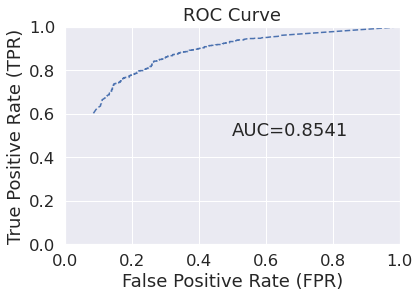

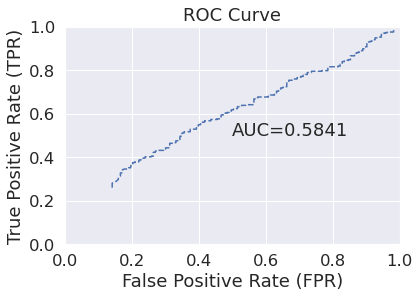

In [13]:
mdl = all_feature_ensembles[17]

print('Model ID: ', mdl.model_id)
mdl.model_performance(xval=True).plot()
mdl.model_performance(valid=True).plot()

In [31]:
mdl = top_ensemble_ALL_MODELS_METALEARNER_naivebayes
# top_ensemble_ALL_MODELS_METALEARNER_naivebayes_pca,

mdl.metalearner_

metric     threshold       value    idx
0                        max f1  7.182148e-01    0.952681  279.0
1                        max f2  9.296297e-06    0.963841  384.0
2                  max f0point5  9.740214e-01    0.970604  238.0
3                  max accuracy  7.729490e-01    0.938675  273.0
4                 max precision  9.999999e-01    1.000000    0.0
5                    max recall  1.235754e-09    1.000000  399.0
6               max specificity  9.999999e-01    1.000000    0.0
7              max absolute_mcc  9.505093e-01    0.868571  250.0
8    max min_per_class_accuracy  8.483864e-01    0.936250  269.0
9   max mean_per_class_accuracy  9.740214e-01    0.945123  238.0
10                      max tns  9.999999e-01  423.000000    0.0
11                      max fns  9.999999e-01  741.000000    0.0
12                      max fps  1.235754e-09  423.000000  399.0
13                      max tps  1.235754e-09  800.000000  399.0
14                      max tnr  9.999999e-01    1.000000    0.0
15                      max fnr  9.999999e-01    0.926250    0.0
16                      max fpr  1.235754e-09    1.000000  399.0
17                      max tpr  1.235754e-09    1.000000  399.0

group  cumulative_data_fraction  lower_threshold      lift  \
0         1                  0.010630     9.999999e-01  1.528750   
1         2                  0.020442     9.999999e-01  1.528750   
2         3                  0.030253     9.999999e-01  1.528750   
3         4                  0.040065     9.999999e-01  1.528750   
4         5                  0.050695     9.999999e-01  1.528750   
5         6                  0.100572     9.999999e-01  1.528750   
6         7                  0.150450     9.999999e-01  1.528750   
7         8                  0.200327     9.999998e-01  1.528750   
8         9                  0.300082     9.999989e-01  1.528750   
9        10                  0.399836     9.999923e-01  1.528750   
10       11                  0.500409     9.999136e-01  1.516321   
11       12                  0.600164     9.898078e-01  1.415973   
12       13                  0.699918     2.947770e-04  0.689191   
13       14                  0.799673     4.137504e-09  0.263145   
14       15                  0.899428     4.683362e-13  0.000000   
15       16                  1.000000     2.497716e-15  0.000000   

    cumulative_lift  response_rate         score  cumulative_response_rate  \
0          1.528750       1.000000  9.999999e-01                  1.000000   
1          1.528750       1.000000  9.999999e-01                  1.000000   
2          1.528750       1.000000  9.999999e-01                  1.000000   
3          1.528750       1.000000  9.999999e-01                  1.000000   
4          1.528750       1.000000  9.999999e-01                  1.000000   
5          1.528750       1.000000  9.999999e-01                  1.000000   
6          1.528750       1.000000  9.999999e-01                  1.000000   
7          1.528750       1.000000  9.999999e-01                  1.000000   
8          1.528750       1.000000  9.999995e-01                  1.000000   
9          1.528750       1.000000  9.999966e-01                  1.000000   
10         1.526252       0.991870  9.999680e-01                  0.998366   
11         1.507922       0.926230  9.985472e-01                  0.986376   
12         1.391234       0.450820  4.696914e-01                  0.910047   
13         1.250511       0.172131  1.880875e-05                  0.817996   
14         1.111818       0.000000  5.085584e-10                  0.727273   
15         1.000000       0.000000  1.394824e-13                  0.654129   

    cumulative_score  capture_rate  cumulative_capture_rate        gain  \
0           1.000000       0.01625                  0.01625   52.875000   
1           1.000000       0.01500                  0.03125   52.875000   
2           1.000000       0.01500                  0.04625   52.875000   
3           1.000000       0.01500                  0.06125   52.875000   
4           1.000000       0.01625                  0.07750   52.875000   
5           1.000000       0.07625                  0.15375   52.875000   
6           1.000000       0.07625                  0.23000   52.875000   
7           1.000000       0.07625                  0.30625   52.875000   
8           1.000000       0.15250                  0.45875   52.875000   
9           0.999999       0.15250                  0.61125   52.875000   
10          0.999993       0.15250                  0.76375   51.632114   
11          0.999752       0.14125                  0.90500   41.597336   
12          0.924206       0.06875                  0.97375  -31.080943   
13          0.808919       0.02625                  1.00000  -73.685451   
14          0.719203       0.00000                  1.00000 -100.000000   
15          0.646871       0.00000                  1.00000 -100.000000   

    cumulative_gain  
0         52.875000  
1         52.875000  
2         52.875000  
3         52.875000  
4         52.875000  
5         52.875000  
6         52.875000  
7         52.875000  
8         52.875000  
9         52.875000  
10  

0      1   Error            Rate
0      0  0.0  163.0     1.0   (163.0/163.0)
1      1  0.0  338.0     0.0     (0.0/338.0)
2  Total  0.0  501.0  0.3253   (163.0/501.0)

metric     threshold       value    idx
0                        max f1  5.554395e-09    0.805721  399.0
1                        max f2  5.554395e-09    0.912035  399.0
2                  max f0point5  9.466307e-01    0.768456  234.0
3                  max accuracy  3.504230e-06    0.694611  383.0
4                 max precision  9.999999e-01    1.000000    0.0
5                    max recall  5.554395e-09    1.000000  399.0
6               max specificity  9.999999e-01    1.000000    0.0
7              max absolute_mcc  9.998930e-01    0.306475   47.0
8    max min_per_class_accuracy  9.714174e-01    0.650888  222.0
9   max mean_per_class_accuracy  9.466307e-01    0.657776  234.0
10                      max tns  9.999999e-01  163.000000    0.0
11                      max fns  9.999999e-01  330.000000    0.0
12                      max fps  5.554395e-09  163.000000  399.0
13                      max tps  5.554395e-09  338.000000  399.0
14                      max tnr  9.999999e-01    1.000000    0.0
15                      max fnr  9.999999e-01    0.976331    0.0
16                      max fpr  5.554395e-09    1.000000  399.0
17                      max tpr  5.554395e-09    1.000000  399.0

group  cumulative_data_fraction  lower_threshold      lift  \
0         1                  0.011976     9.999999e-01  1.482249   
1         2                  0.021956     9.999999e-01  1.482249   
2         3                  0.031936     9.999999e-01  1.482249   
3         4                  0.041916     9.999997e-01  1.482249   
4         5                  0.051896     9.999996e-01  1.482249   
5         6                  0.101796     9.999992e-01  1.422959   
6         7                  0.151697     9.999945e-01  1.422959   
7         8                  0.201597     9.998930e-01  1.363669   
8         9                  0.301397     9.991927e-01  0.889349   
9        10                  0.401198     9.973609e-01  1.096864   
10       11                  0.500998     9.881253e-01  1.156154   
11       12                  0.600798     8.703645e-01  0.859704   
12       13                  0.700599     3.316903e-01  0.770769   
13       14                  0.800399     3.273818e-03  0.830059   
14       15                  0.900200     5.342073e-07  0.830059   
15       16                  1.000000     8.708480e-14  0.711479   

    cumulative_lift  response_rate         score  cumulative_response_rate  \
0          1.482249           1.00  9.999999e-01                  1.000000   
1          1.482249           1.00  9.999999e-01                  1.000000   
2          1.482249           1.00  9.999999e-01                  1.000000   
3          1.482249           1.00  9.999998e-01                  1.000000   
4          1.482249           1.00  9.999997e-01                  1.000000   
5          1.453185           0.96  9.999994e-01                  0.980392   
6          1.443242           0.96  9.999980e-01                  0.973684   
7          1.423546           0.92  9.999667e-01                  0.960396   
8          1.246659           0.60  9.995294e-01                  0.841060   
9          1.209397           0.74  9.984819e-01                  0.815920   
10         1.198791           0.78  9.943488e-01                  0.808765   
11         1.142464           0.58  9.582904e-01                  0.770764   
12         1.089516           0.52  6.150689e-01                  0.735043   
13         1.057165           0.56  1.133183e-01                  0.713217   
14         1.031987           0.56  2.557919e-04                  0.696231   
15         1.000000           0.48  8.586800e-08                  0.674651   

    cumulative_score  capture_rate  cumulative_capture_rate       gain  \
0           1.000000      0.017751                 0.017751  48.224852   
1           1.000000      0.014793                 0.032544  48.224852   
2           1.000000      0.014793                 0.047337  48.224852   
3           1.000000      0.014793                 0.062130  48.224852   
4           1.000000      0.014793                 0.076923  48.224852   
5           1.000000      0.071006                 0.147929  42.295858   
6           0.999999      0.071006                 0.218935  42.295858   
7           0.999991      0.068047                 0.286982  36.366864   
8           0.999838      0.088757                 0.375740 -11.065089   
9           0.999501      0.109467                 0.485207   9.686391   
10          0.998475      0.115385                 0.600592  15.615385   
11          0.991799      0.085799                 0.686391 -14.029586   
12          0.938134      0.076923                 0.763314 -22.923077   
13          0.835289      0.082840                 0.846154 -16.994083   
14          0.742713      0.082840                 0.928994 -16.994083   
15          0.668590      0.071006                 1.000000 -28.852071   

    cumulative_gain  
0         48.224852  
1         48.224852  
2         48.224852  
3         48.224852  
4         48.224852  
5         45.318482  
6         44.324198  
7         42.354561  
8         24.665935  
9         20.939680  
10        19.879064  

0      1   Error             Rate
0      0  319.0  104.0  0.2459    (104.0/423.0)
1      1   64.0  736.0    0.08     (64.0/800.0)
2  Total  383.0  840.0  0.1374   (168.0/1223.0)

metric     threshold       value    idx
0                        max f1  1.334384e-01    0.897561  316.0
1                        max f2  6.101910e-07    0.918195  397.0
2                  max f0point5  9.991626e-01    0.908046  146.0
3                  max accuracy  6.310639e-01    0.863451  293.0
4                 max precision  9.999997e-01    0.992620    1.0
5                    max recall  8.041773e-09    1.000000  399.0
6               max specificity  9.999999e-01    0.995272    0.0
7              max absolute_mcc  9.746009e-01    0.697211  238.0
8    max min_per_class_accuracy  9.871348e-01    0.853428  221.0
9   max mean_per_class_accuracy  9.909293e-01    0.856442  214.0
10                      max tns  9.999999e-01  421.000000    0.0
11                      max fns  9.999999e-01  592.000000    0.0
12                      max fps  8.041773e-09  423.000000  399.0
13                      max tps  8.041773e-09  800.000000  399.0
14                      max tnr  9.999999e-01    0.995272    0.0
15                      max fnr  9.999999e-01    0.740000    0.0
16                      max fpr  8.041773e-09    1.000000  399.0
17                      max tpr  8.041773e-09    1.000000  399.0

group  cumulative_data_fraction  lower_threshold      lift  \
0         1                  0.010630     1.000000e+00  1.528750   
1         2                  0.020442     1.000000e+00  1.528750   
2         3                  0.030253     1.000000e+00  1.528750   
3         4                  0.040065     9.999999e-01  1.528750   
4         5                  0.050695     9.999999e-01  1.528750   
5         6                  0.100572     9.999999e-01  1.503689   
6         7                  0.150450     9.999998e-01  1.528750   
7         8                  0.200327     9.999997e-01  1.503689   
8         9                  0.300082     9.999978e-01  1.503689   
9        10                  0.399836     9.999831e-01  1.441035   
10       11                  0.500409     9.997917e-01  1.354746   
11       12                  0.600164     9.929188e-01  1.127766   
12       13                  0.699918     2.342842e-02  0.801967   
13       14                  0.799673     2.942818e-08  0.350861   
14       15                  0.899428     5.234760e-12  0.213023   
15       16                  1.000000     6.579069e-18  0.174004   

    cumulative_lift  response_rate         score  cumulative_response_rate  \
0          1.528750       1.000000  1.000000e+00                  1.000000   
1          1.528750       1.000000  1.000000e+00                  1.000000   
2          1.528750       1.000000  1.000000e+00                  1.000000   
3          1.528750       1.000000  9.999999e-01                  1.000000   
4          1.528750       1.000000  9.999999e-01                  1.000000   
5          1.516321       0.983607  9.999999e-01                  0.991870   
6          1.520442       1.000000  9.999998e-01                  0.994565   
7          1.516270       0.983607  9.999998e-01                  0.991837   
8          1.512088       0.983607  9.999992e-01                  0.989101   
9          1.494361       0.942623  9.999929e-01                  0.977505   
10         1.466301       0.886179  9.999283e-01                  0.959150   
11         1.410032       0.737705  9.981953e-01                  0.922343   
12         1.323369       0.524590  6.812214e-01                  0.865654   
13         1.202054       0.229508  1.661793e-03                  0.786299   
14         1.092361       0.139344  3.003291e-09                  0.714545   
15         1.000000       0.113821  1.047997e-12                  0.654129   

    cumulative_score  capture_rate  cumulative_capture_rate       gain  \
0           1.000000       0.01625                  0.01625  52.875000   
1           1.000000       0.01500                  0.03125  52.875000   
2           1.000000       0.01500                  0.04625  52.875000   
3           1.000000       0.01500                  0.06125  52.875000   
4           1.000000       0.01625                  0.07750  52.875000   
5           1.000000       0.07500                  0.15250  50.368852   
6           1.000000       0.07625                  0.22875  52.875000   
7           1.000000       0.07500                  0.30375  50.368852   
8           1.000000       0.15000                  0.45375  50.368852   
9           0.999998       0.14375                  0.59750  44.103484   
10          0.999984       0.13625                  0.73375  35.474593   
11          0.999687       0.11250                  0.84625  12.776639   
12          0.954298       0.08000                  0.92625 -19.803279   
13          0.835462       0.03500                  0.96125 -64.913934   
14          0.742802       0.02125                  0.98250 -78.697746   
15          0.668096       0.01750                  1.00000 -82.599593   

    cumulative_gain  
0         52.875000  
1         52.875000  
2         52.875000  
3         52.875000  
4         52.875000  
5         51.632114  
6         52.044158  
7         51.627041  
8         51.208787  
9         49.436094  
10        46.630106  

0      1   Error            Rate
0      0  393.0   30.0  0.0709    (30.0/423.0)
1      1   45.0  755.0  0.0563    (45.0/800.0)
2  Total  438.0  785.0  0.0613   (75.0/1223.0)

metric     threshold       value    idx
0                        max f1  7.182148e-01    0.952681  279.0
1                        max f2  9.296297e-06    0.963841  384.0
2                  max f0point5  9.740214e-01    0.970604  238.0
3                  max accuracy  7.729490e-01    0.938675  273.0
4                 max precision  9.999999e-01    1.000000    0.0
5                    max recall  1.235754e-09    1.000000  399.0
6               max specificity  9.999999e-01    1.000000    0.0
7              max absolute_mcc  9.505093e-01    0.868571  250.0
8    max min_per_class_accuracy  8.483864e-01    0.936250  269.0
9   max mean_per_class_accuracy  9.740214e-01    0.945123  238.0
10                      max tns  9.999999e-01  423.000000    0.0
11                      max fns  9.999999e-01  741.000000    0.0
12                      max fps  1.235754e-09  423.000000  399.0
13                      max tps  1.235754e-09  800.000000  399.0
14                      max tnr  9.999999e-01    1.000000    0.0
15                      max fnr  9.999999e-01    0.926250    0.0
16                      max fpr  1.235754e-09    1.000000  399.0
17                      max tpr  1.235754e-09    1.000000  399.0

group  cumulative_data_fraction  lower_threshold      lift  \
0         1                  0.010630     9.999999e-01  1.528750   
1         2                  0.020442     9.999999e-01  1.528750   
2         3                  0.030253     9.999999e-01  1.528750   
3         4                  0.040065     9.999999e-01  1.528750   
4         5                  0.050695     9.999999e-01  1.528750   
5         6                  0.100572     9.999999e-01  1.528750   
6         7                  0.150450     9.999999e-01  1.528750   
7         8                  0.200327     9.999998e-01  1.528750   
8         9                  0.300082     9.999989e-01  1.528750   
9        10                  0.399836     9.999923e-01  1.528750   
10       11                  0.500409     9.999136e-01  1.516321   
11       12                  0.600164     9.898078e-01  1.415973   
12       13                  0.699918     2.947770e-04  0.689191   
13       14                  0.799673     4.137504e-09  0.263145   
14       15                  0.899428     4.683362e-13  0.000000   
15       16                  1.000000     2.497716e-15  0.000000   

    cumulative_lift  response_rate         score  cumulative_response_rate  \
0          1.528750       1.000000  9.999999e-01                  1.000000   
1          1.528750       1.000000  9.999999e-01                  1.000000   
2          1.528750       1.000000  9.999999e-01                  1.000000   
3          1.528750       1.000000  9.999999e-01                  1.000000   
4          1.528750       1.000000  9.999999e-01                  1.000000   
5          1.528750       1.000000  9.999999e-01                  1.000000   
6          1.528750       1.000000  9.999999e-01                  1.000000   
7          1.528750       1.000000  9.999999e-01                  1.000000   
8          1.528750       1.000000  9.999995e-01                  1.000000   
9          1.528750       1.000000  9.999966e-01                  1.000000   
10         1.526252       0.991870  9.999680e-01                  0.998366   
11         1.507922       0.926230  9.985472e-01                  0.986376   
12         1.391234       0.450820  4.696914e-01                  0.910047   
13         1.250511       0.172131  1.880875e-05                  0.817996   
14         1.111818       0.000000  5.085584e-10                  0.727273   
15         1.000000       0.000000  1.394824e-13                  0.654129   

    cumulative_score  capture_rate  cumulative_capture_rate        gain  \
0           1.000000       0.01625                  0.01625   52.875000   
1           1.000000       0.01500                  0.03125   52.875000   
2           1.000000       0.01500                  0.04625   52.875000   
3           1.000000       0.01500                  0.06125   52.875000   
4           1.000000       0.01625                  0.07750   52.875000   
5           1.000000       0.07625                  0.15375   52.875000   
6           1.000000       0.07625                  0.23000   52.875000   
7           1.000000       0.07625                  0.30625   52.875000   
8           1.000000       0.15250                  0.45875   52.875000   
9           0.999999       0.15250                  0.61125   52.875000   
10          0.999993       0.15250                  0.76375   51.632114   
11          0.999752       0.14125                  0.90500   41.597336   
12          0.924206       0.06875                  0.97375  -31.080943   
13          0.808919       0.02625                  1.00000  -73.685451   
14          0.719203       0.00000                  1.00000 -100.000000   
15          0.646871       0.00000                  1.00000 -100.000000   

    cumulative_gain  
0         52.875000  
1         52.875000  
2         52.875000  
3         52.875000  
4         52.875000  
5         52.875000  
6         52.875000  
7         52.875000  
8         52.875000  
9         52.875000  
10  

0      1   Error            Rate
0      0  0.0  163.0     1.0   (163.0/163.0)
1      1  0.0  338.0     0.0     (0.0/338.0)
2  Total  0.0  501.0  0.3253   (163.0/501.0)

metric     threshold       value    idx
0                        max f1  5.554395e-09    0.805721  399.0
1                        max f2  5.554395e-09    0.912035  399.0
2                  max f0point5  9.466307e-01    0.768456  234.0
3                  max accuracy  3.504230e-06    0.694611  383.0
4                 max precision  9.999999e-01    1.000000    0.0
5                    max recall  5.554395e-09    1.000000  399.0
6               max specificity  9.999999e-01    1.000000    0.0
7              max absolute_mcc  9.998930e-01    0.306475   47.0
8    max min_per_class_accuracy  9.714174e-01    0.650888  222.0
9   max mean_per_class_accuracy  9.466307e-01    0.657776  234.0
10                      max tns  9.999999e-01  163.000000    0.0
11                      max fns  9.999999e-01  330.000000    0.0
12                      max fps  5.554395e-09  163.000000  399.0
13                      max tps  5.554395e-09  338.000000  399.0
14                      max tnr  9.999999e-01    1.000000    0.0
15                      max fnr  9.999999e-01    0.976331    0.0
16                      max fpr  5.554395e-09    1.000000  399.0
17                      max tpr  5.554395e-09    1.000000  399.0

group  cumulative_data_fraction  lower_threshold      lift  \
0         1                  0.011976     9.999999e-01  1.482249   
1         2                  0.021956     9.999999e-01  1.482249   
2         3                  0.031936     9.999999e-01  1.482249   
3         4                  0.041916     9.999997e-01  1.482249   
4         5                  0.051896     9.999996e-01  1.482249   
5         6                  0.101796     9.999992e-01  1.422959   
6         7                  0.151697     9.999945e-01  1.422959   
7         8                  0.201597     9.998930e-01  1.363669   
8         9                  0.301397     9.991927e-01  0.889349   
9        10                  0.401198     9.973609e-01  1.096864   
10       11                  0.500998     9.881253e-01  1.156154   
11       12                  0.600798     8.703645e-01  0.859704   
12       13                  0.700599     3.316903e-01  0.770769   
13       14                  0.800399     3.273818e-03  0.830059   
14       15                  0.900200     5.342073e-07  0.830059   
15       16                  1.000000     8.708480e-14  0.711479   

    cumulative_lift  response_rate         score  cumulative_response_rate  \
0          1.482249           1.00  9.999999e-01                  1.000000   
1          1.482249           1.00  9.999999e-01                  1.000000   
2          1.482249           1.00  9.999999e-01                  1.000000   
3          1.482249           1.00  9.999998e-01                  1.000000   
4          1.482249           1.00  9.999997e-01                  1.000000   
5          1.453185           0.96  9.999994e-01                  0.980392   
6          1.443242           0.96  9.999980e-01                  0.973684   
7          1.423546           0.92  9.999667e-01                  0.960396   
8          1.246659           0.60  9.995294e-01                  0.841060   
9          1.209397           0.74  9.984819e-01                  0.815920   
10         1.198791           0.78  9.943488e-01                  0.808765   
11         1.142464           0.58  9.582904e-01                  0.770764   
12         1.089516           0.52  6.150689e-01                  0.735043   
13         1.057165           0.56  1.133183e-01                  0.713217   
14         1.031987           0.56  2.557919e-04                  0.696231   
15         1.000000           0.48  8.586800e-08                  0.674651   

    cumulative_score  capture_rate  cumulative_capture_rate       gain  \
0           1.000000      0.017751                 0.017751  48.224852   
1           1.000000      0.014793                 0.032544  48.224852   
2           1.000000      0.014793                 0.047337  48.224852   
3           1.000000      0.014793                 0.062130  48.224852   
4           1.000000      0.014793                 0.076923  48.224852   
5           1.000000      0.071006                 0.147929  42.295858   
6           0.999999      0.071006                 0.218935  42.295858   
7           0.999991      0.068047                 0.286982  36.366864   
8           0.999838      0.088757                 0.375740 -11.065089   
9           0.999501      0.109467                 0.485207   9.686391   
10          0.998475      0.115385                 0.600592  15.615385   
11          0.991799      0.085799                 0.686391 -14.029586   
12          0.938134      0.076923                 0.763314 -22.923077   
13          0.835289      0.082840                 0.846154 -16.994083   
14          0.742713      0.082840                 0.928994 -16.994083   
15          0.668590      0.071006                 1.000000 -28.852071   

    cumulative_gain  
0         48.224852  
1         48.224852  
2         48.224852  
3         48.224852  
4         48.224852  
5         45.318482  
6         44.324198  
7         42.354561  
8         24.665935  
9         20.939680  
10        19.879064  

0      1   Error             Rate
0      0  319.0  104.0  0.2459    (104.0/423.0)
1      1   64.0  736.0    0.08     (64.0/800.0)
2  Total  383.0  840.0  0.1374   (168.0/1223.0)

metric     threshold       value    idx
0                        max f1  1.334384e-01    0.897561  316.0
1                        max f2  6.101910e-07    0.918195  397.0
2                  max f0point5  9.991626e-01    0.908046  146.0
3                  max accuracy  6.310639e-01    0.863451  293.0
4                 max precision  9.999997e-01    0.992620    1.0
5                    max recall  8.041773e-09    1.000000  399.0
6               max specificity  9.999999e-01    0.995272    0.0
7              max absolute_mcc  9.746009e-01    0.697211  238.0
8    max min_per_class_accuracy  9.871348e-01    0.853428  221.0
9   max mean_per_class_accuracy  9.909293e-01    0.856442  214.0
10                      max tns  9.999999e-01  421.000000    0.0
11                      max fns  9.999999e-01  592.000000    0.0
12                      max fps  8.041773e-09  423.000000  399.0
13                      max tps  8.041773e-09  800.000000  399.0
14                      max tnr  9.999999e-01    0.995272    0.0
15                      max fnr  9.999999e-01    0.740000    0.0
16                      max fpr  8.041773e-09    1.000000  399.0
17                      max tpr  8.041773e-09    1.000000  399.0

TypeError: 'dict' object is not callable

In [39]:
top_ensemble_ALL_MODELS_METALEARNER_naivebayes_pca.metalearner_algorithm

TypeError: 'NoneType' object is not iterable

In [42]:
sorted(top_ensemble_ALL_MODELS_METALEARNER_xgboost_pca.metalearner().actual_params.items())

[('backend', 'auto'),
 ('booster', 'gbtree'),
 ('build_tree_one_node', False),
 ('calibrate_model', False),
 ('calibration_frame', None),
 ('categorical_encoding', 'AUTO'),
 ('checkpoint', None),
 ('col_sample_rate', 1.0),
 ('col_sample_rate_per_tree', 1.0),
 ('colsample_bylevel', 1.0),
 ('colsample_bytree', 1.0),
 ('distribution', 'bernoulli'),
 ('dmatrix_type', 'auto'),
 ('eta', 0.3),
 ('export_checkpoints_dir', None),
 ('fold_assignment', 'Random'),
 ('fold_column', None),
 ('gamma', 0.0),
 ('gpu_id', 0),
 ('grow_policy', 'depthwise'),
 ('ignore_const_cols', True),
 ('ignored_columns', None),
 ('keep_cross_validation_fold_assignment', False),
 ('keep_cross_validation_models', True),
 ('keep_cross_validation_predictions', False),
 ('learn_rate', 0.3),
 ('max_abs_leafnode_pred', 0.0),
 ('max_bins', 256),
 ('max_delta_step', 0.0),
 ('max_depth', 6),
 ('max_leaves', 0),
 ('max_runtime_secs', 0.0),
 ('min_child_weight', 1.0),
 ('min_data_in_leaf', 0.0),
 ('min_rows', 1.0),
 ('min_split_i

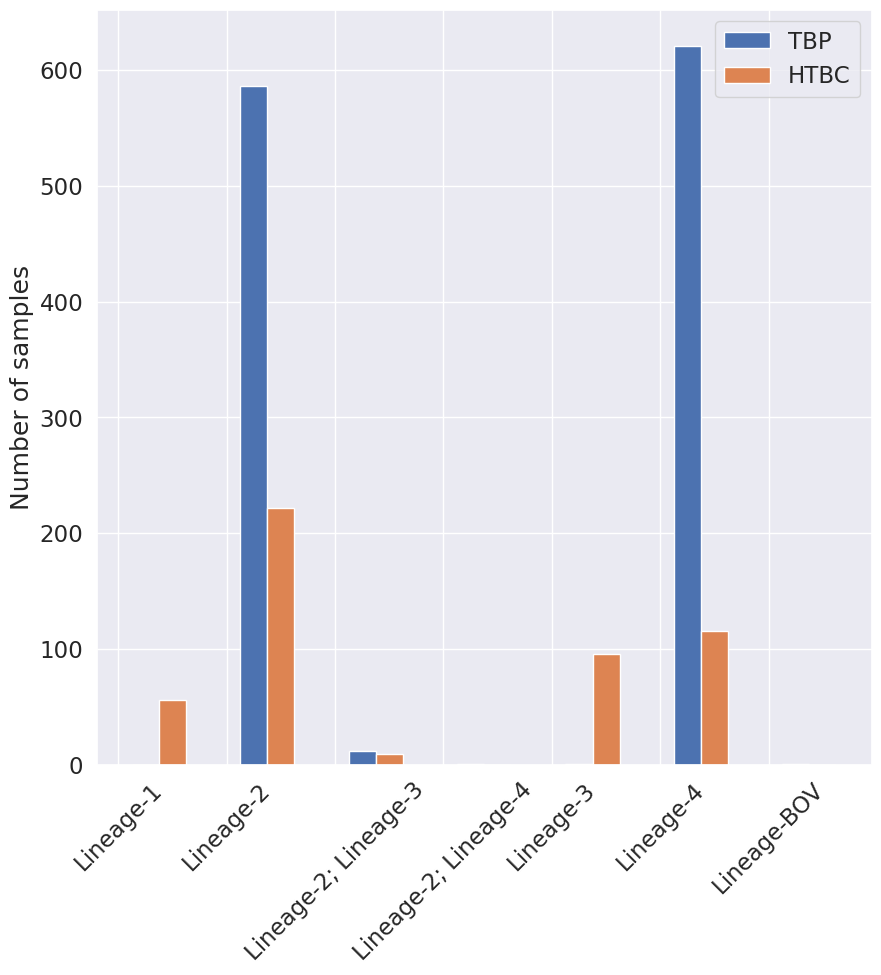

In [67]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
 

plt.figure(
    figsize=(10,10),
    dpi=100)

# set width of bar
barWidth = 0.25
 
# set height of bar
bars1 = [0, 586, 12, 1, 1, 621, 1]


import json
import pprint

pca300_auc_list = []

for mdl_tuple in all_final_model_metrics[1:12:2]:
    perf_dict = mdl_tuple[1]
    pca300_auc_list.append(perf_dict['XVal AUC'])
    pp.pprint(perf_dict['model_id'])

bars2 = [56, 222, 9, 0, 96, 116, 0]


# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

 
# Make the plot
plt.bar(r1, bars1, width=barWidth, edgecolor='white', label='TBP')
plt.bar(r2, bars2, width=barWidth, edgecolor='white', label='HTBC')
 
# Add xticks on the middle of the group bars
# plt.xlabel('Cohort Drug Resistance Profile', fontweight='bold')
plt.xticks([r - barWidth for r in range(len(bars1))], ['Lineage-1', 'Lineage-2', 'Lineage-2; Lineage-3', 'Lineage-2; Lineage-4', 'Lineage-3', 'Lineage-4', 'Lineage-BOV'])
plt.xticks(rotation=45)

plt.ylabel('Number of samples') 

# Create legend & Show graphic
plt.legend()
plt.show()

'DeepLearning_model_python_1605423034668_341'
'DRF_model_python_1605423034668_386'
'GBM_model_python_1605423034668_39'
'GLM_model_python_1605423034668_20'
'NaiveBayes_model_python_1605423034668_1'
'XGBoost_model_python_1605423034668_274'
'DeepLearning_model_python_1605362597414_3340'
'DRF_model_python_1605362597414_2415'
'GBM_model_python_1605362597414_1525'
'GLM_model_python_1605362597414_1506'
'NaiveBayes_model_python_1605362597414_1487'
'XGBoost_model_python_1605362597414_1768'


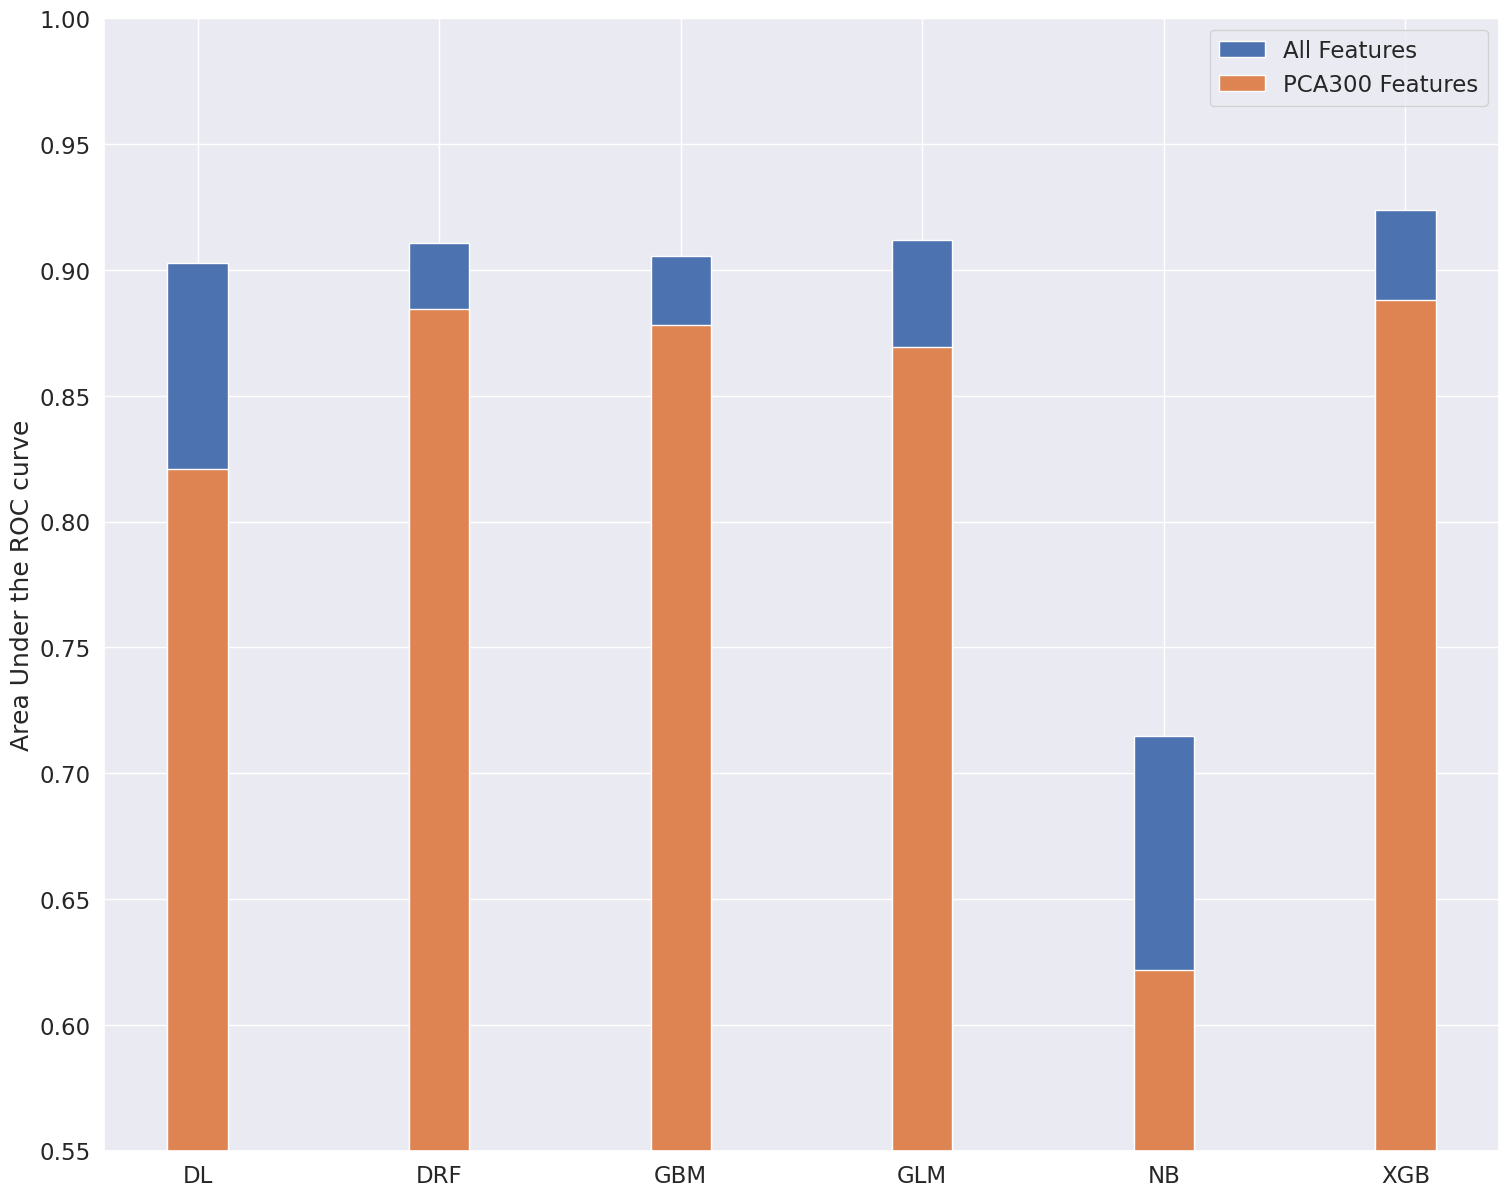

In [44]:
# NOTE: Performance of Top Models

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd

import json
import pprint

 

 
fig = plt.figure(
    figsize=(18,15),
    dpi=100)

ax = fig.add_subplot(1, 1, 1)


# set width of bar
barWidth = 0.25
 

all_features_auc_list = []

for mdl_tuple in all_final_model_metrics[0:12:2]:
    perf_dict = mdl_tuple[1]
    all_features_auc_list.append(perf_dict['XVal AUC'])
    pp.pprint(perf_dict['model_id'])


bars1 = all_features_auc_list



pca300_auc_list = []

for mdl_tuple in all_final_model_metrics[1:12:2]:
    perf_dict = mdl_tuple[1]
    pca300_auc_list.append(perf_dict['XVal AUC'])
    pp.pprint(perf_dict['model_id'])


bars2 =pca300_auc_list

# HTBC-Resistant
# bars3 = [21, 156, 0, 7, 87, 67]
# HTBC-Sensitive
# bars4 = [35, 66, 0, 2, 9, 49]


# # Heights of bars1 + bars2
# bars12_h = np.add(bars1, bars2).tolist()
# bars34_h = np.add(bars3, bars4).tolist()
 


# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

 

# Create brown bars
plt.bar(r1, bars1, edgecolor='white', width=barWidth, label='All Features')
# Create green bars (middle), on top of the firs ones
plt.bar(r1, bars2, bottom=0, edgecolor='white', width=barWidth, label='PCA300 Features')

 

# # Create brown bars
# plt.bar(r2, bars3, edgecolor='white', width=barWidth, label='HTBC-Resistant')
# # Create green bars (middle), on top of the firs ones
# plt.bar(r2, bars4, bottom=bars3, edgecolor='white', width=barWidth, label='HTBC-Sensitive')

 

# Custom X axis
plt.xticks([r1 for r1 in range(len(bars1))], ['DL', 'DRF', 'GBM', 'GLM', 'NB', 'XGB'])

# plt.xticks(rotation=45)

 
plt.ylabel('Area Under the ROC curve') 
# plt.xlabel('Class of Algorithms') 

ax.set_ylim(0.55, 1)



# Show graphic
plt.legend()
plt.show()

'DeepLearning_model_python_1605423034668_341'
'DRF_model_python_1605423034668_386'
'GBM_model_python_1605423034668_39'
'GLM_model_python_1605423034668_20'
'NaiveBayes_model_python_1605423034668_1'
'XGBoost_model_python_1605423034668_274'
'DeepLearning_model_python_1605362597414_3340'
'DRF_model_python_1605362597414_2415'
'GBM_model_python_1605362597414_1525'
'GLM_model_python_1605362597414_1506'
'NaiveBayes_model_python_1605362597414_1487'
'XGBoost_model_python_1605362597414_1768'


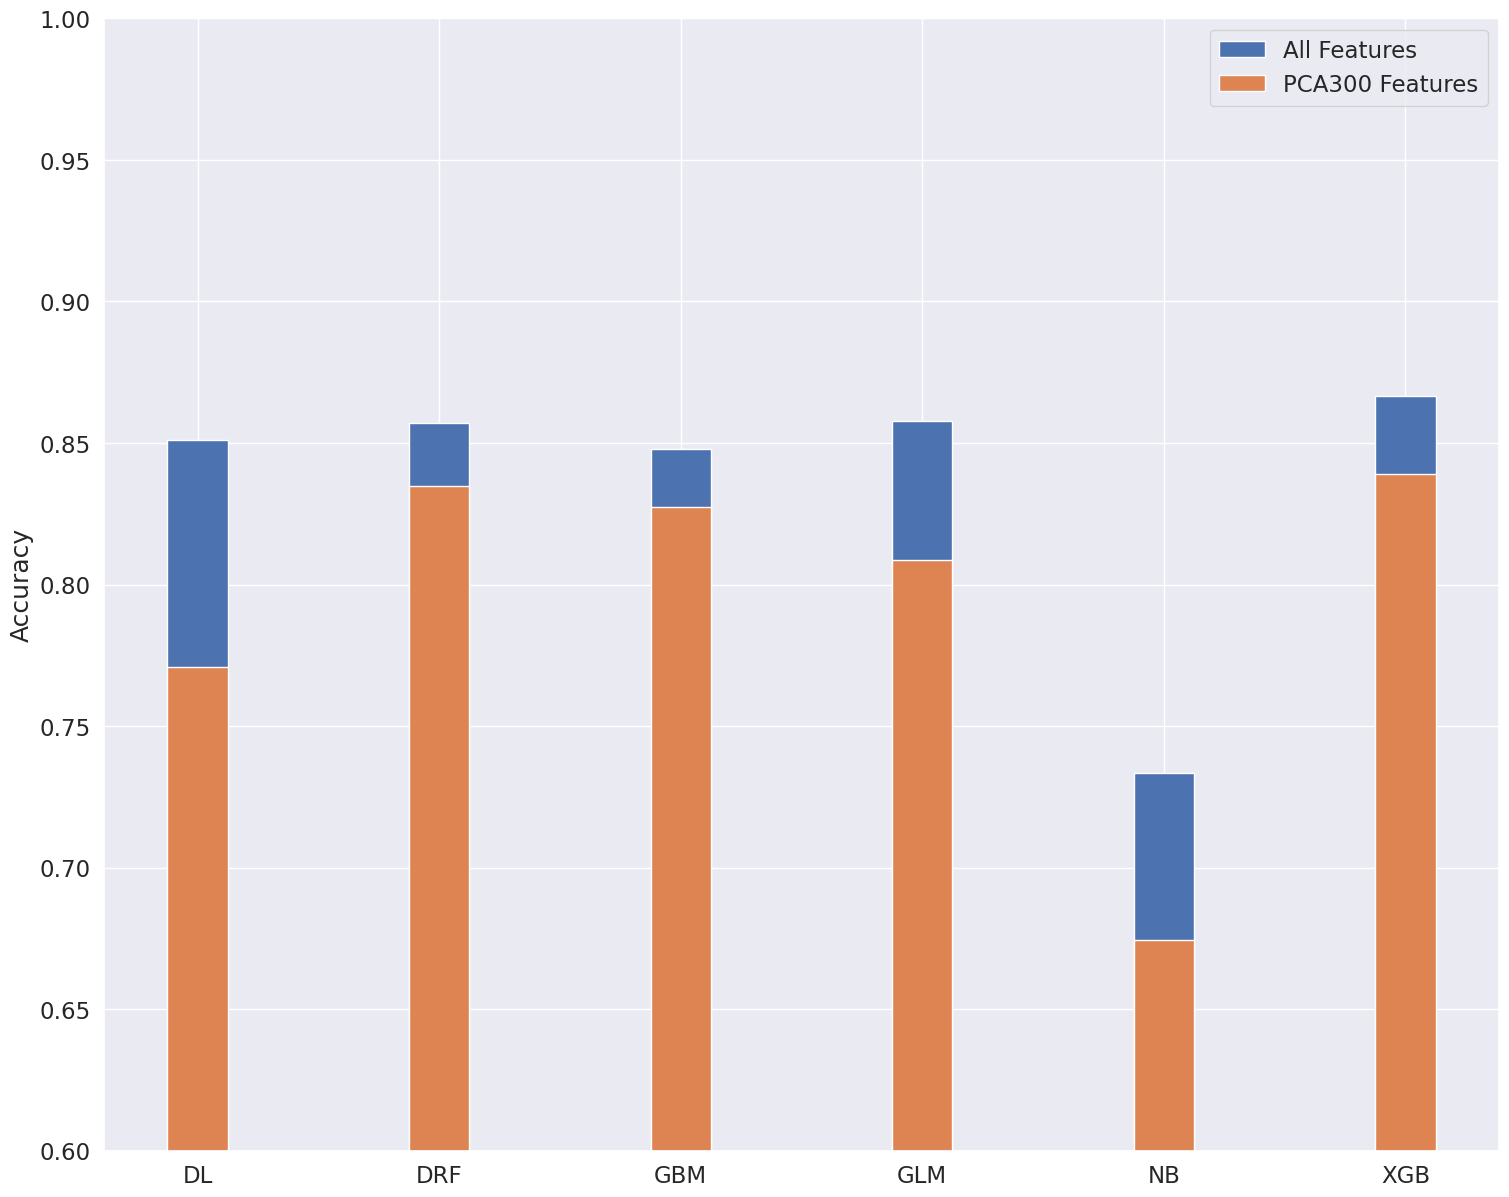

In [43]:
# NOTE: Performance of Top Models

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd

import json
import pprint

 

 
fig = plt.figure(
    figsize=(18,15),
    dpi=100)

ax = fig.add_subplot(1, 1, 1)


# set width of bar
barWidth = 0.25
 

all_features_accuracy_list = []

for mdl_tuple in all_final_model_metrics[0:12:2]:
    perf_dict = mdl_tuple[1]
    all_features_accuracy_list.append(perf_dict['XVal Accuracy'])
    pp.pprint(perf_dict['model_id'])


bars1 = all_features_accuracy_list



pca300_accuracy_list = []

for mdl_tuple in all_final_model_metrics[1:12:2]:
    perf_dict = mdl_tuple[1]
    pca300_accuracy_list.append(perf_dict['XVal Accuracy'])
    pp.pprint(perf_dict['model_id'])


bars2 =pca300_accuracy_list

# HTBC-Resistant
# bars3 = [21, 156, 0, 7, 87, 67]
# HTBC-Sensitive
# bars4 = [35, 66, 0, 2, 9, 49]


# # Heights of bars1 + bars2
# bars12_h = np.add(bars1, bars2).tolist()
# bars34_h = np.add(bars3, bars4).tolist()
 


# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

 

# Create brown bars
plt.bar(r1, bars1, edgecolor='white', width=barWidth, label='All Features')
# Create green bars (middle), on top of the firs ones
plt.bar(r1, bars2, bottom=0, edgecolor='white', width=barWidth, label='PCA300 Features')

 

# # Create brown bars
# plt.bar(r2, bars3, edgecolor='white', width=barWidth, label='HTBC-Resistant')
# # Create green bars (middle), on top of the firs ones
# plt.bar(r2, bars4, bottom=bars3, edgecolor='white', width=barWidth, label='HTBC-Sensitive')

 

# Custom X axis
plt.xticks([r1 for r1 in range(len(bars1))], ['DL', 'DRF', 'GBM', 'GLM', 'NB', 'XGB'])

# plt.xticks(rotation=45)

 
plt.ylabel('Accuracy') 
# plt.xlabel('Class of Algorithms') 

ax.set_ylim(0.6, 1)



# Show graphic
plt.legend()
plt.show()

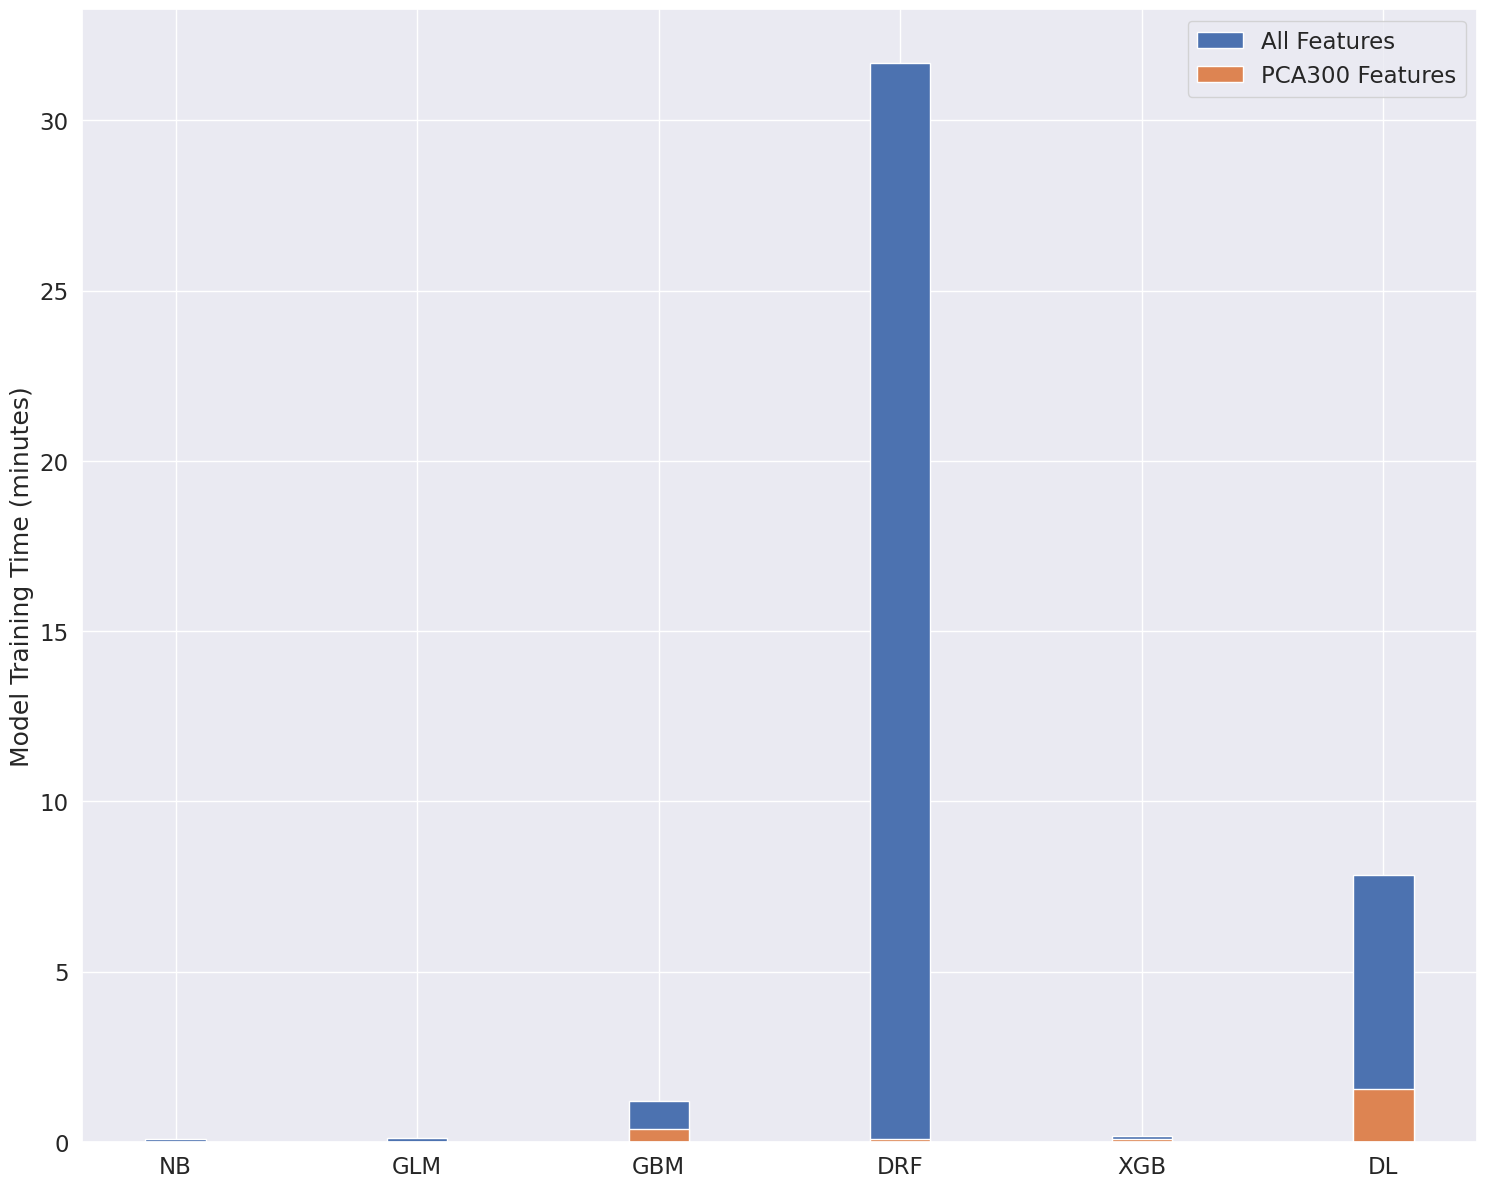

In [40]:
# NOTE: Time Performance of Top Models

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
 

 
fig = plt.figure(
    figsize=(18,15),
    dpi=100)

ax = fig.add_subplot(1, 1, 1)


# set width of bar
barWidth = 0.25
 



bars1 = list(map(lambda x: millis_to_minutes(x), 
[5211, 6048, 71120, 1900902, 9638, 470361]
))



bars2 = list(map(lambda x: millis_to_minutes(x), 
[130, 216, 22756, 4970, 4348, 92889]
))


# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

 

# Create brown bars
plt.bar(r1, bars1, edgecolor='white', width=barWidth, label='All Features')
# Create green bars (middle), on top of the firs ones
plt.bar(r1, bars2, bottom=0, edgecolor='white', width=barWidth, label='PCA300 Features')

 

# Custom X axis
plt.xticks([r1 for r1 in range(len(bars1))], ['NB', 'GLM', 'GBM', 'DRF', 'XGB', 'DL'])

# plt.xticks(rotation=45)

 
plt.ylabel('Model Training Time (minutes)') 
# plt.xlabel('Class of Algorithms') 

# ax.set_ylim(0.5, 1)



# Show graphic
plt.legend()
plt.show()

In [37]:
import math

def millis_to_minutes(millis):
    minutes=(millis/(1000*60))%60
    # minutes = math.ceil(float(minutes))
    return minutes

print(millis_to_minutes(5211))


0.08685


'DeepLearning_model_python_1605423034668_341'
'DRF_model_python_1605423034668_386'
'GBM_model_python_1605423034668_39'
'GLM_model_python_1605423034668_20'
'NaiveBayes_model_python_1605423034668_1'
'XGBoost_model_python_1605423034668_274'
'DeepLearning_model_python_1605362597414_3340'
'DRF_model_python_1605362597414_2415'
'GBM_model_python_1605362597414_1525'
'GLM_model_python_1605362597414_1506'
'NaiveBayes_model_python_1605362597414_1487'
'XGBoost_model_python_1605362597414_1768'


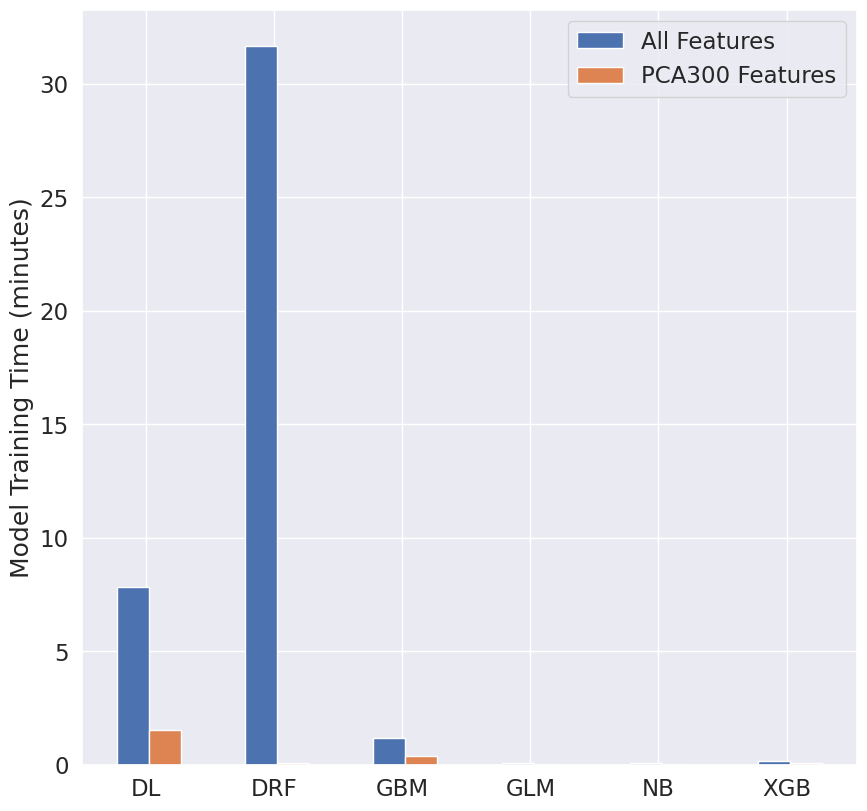

In [42]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
 

plt.figure(
    figsize=(10,10),
    dpi=100)

# set width of bar
barWidth = 0.25
 
 

all_features_time_list = []

for mdl_tuple in all_final_model_metrics[0:12:2]:
    perf_dict = mdl_tuple[1]
    all_features_time_list.append(perf_dict['Training time (ms)'])
    pp.pprint(perf_dict['model_id'])


bars1 = all_features_time_list



pca300_time_list = []

for mdl_tuple in all_final_model_metrics[1:12:2]:
    perf_dict = mdl_tuple[1]
    pca300_time_list.append(perf_dict['Training time (ms)'])
    pp.pprint(perf_dict['model_id'])


bars2 =pca300_time_list



bars1 = list(map(lambda x: millis_to_minutes(x), 
all_features_time_list
))



bars2 = list(map(lambda x: millis_to_minutes(x), 
pca300_time_list
))


# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, bars1, width=barWidth, edgecolor='white', label='All Features')
plt.bar(r2, bars2, width=barWidth, edgecolor='white', label='PCA300 Features')
 
# Add xticks on the middle of the group bars
# plt.xlabel('Cohort Drug Resistance Profile', fontweight='bold')
plt.xticks([r + 0.10 for r in range(len(bars1))], ['DL', 'DRF', 'GBM', 'GLM', 'NB', 'XGB'])
# plt.xticks(rotation=45)

plt.ylabel('Model Training Time (minutes)') 

# pyplot.xlabel('Statistics for samples with 500+ mutations') 


# Create legend & Show graphic
plt.legend()
plt.show()

## Visualization for STENs

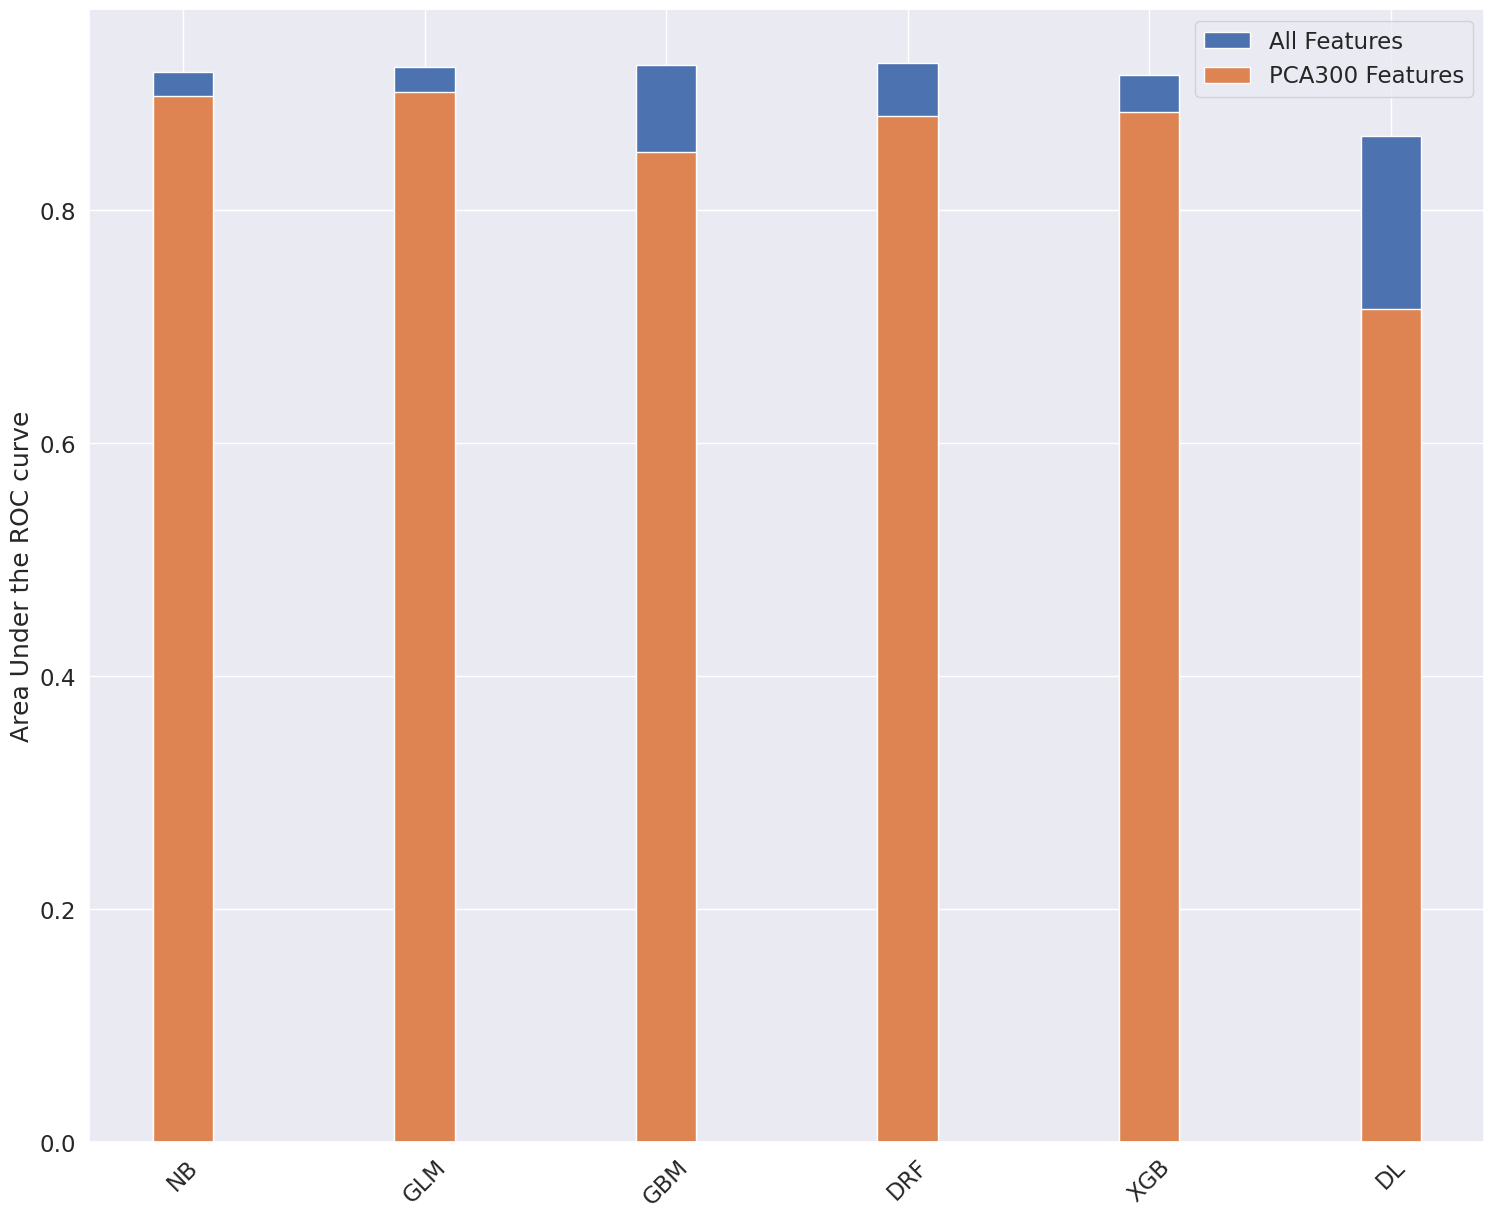

In [28]:
# NOTE: Performance of Stacked Models with All Base

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
 

 
plt.figure(
    figsize=(18,15),
    dpi=100)

# set width of bar
barWidth = 0.25
 



bars1 = [0.9184530141843972, # NB
         0.9231072695035462, # GLM
         0.9249010047281323, # GBM
         0.9260268912529551, # DRF
         0.9159352836879433, # XGB
         0.8633983451536642  # DL
]


bars2 = [0.8984471040189125, # NB
         0.9017479314420803, # GLM
         0.8498921394799054, # GBM
         0.880774231678487,  # DRF
         0.8839967494089835, # XGB
         0.7148921394799055  # DL
]


# HTBC-Resistant
# bars3 = [21, 156, 0, 7, 87, 67]
# HTBC-Sensitive
# bars4 = [35, 66, 0, 2, 9, 49]


# Heights of bars1 + bars2
bars12_h = np.add(bars1, bars2).tolist()
bars34_h = np.add(bars3, bars4).tolist()
 


# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

 

# Create brown bars
plt.bar(r1, bars1, edgecolor='white', width=barWidth, label='All Features')
# Create green bars (middle), on top of the firs ones
plt.bar(r1, bars2, bottom=0, edgecolor='white', width=barWidth, label='PCA300 Features')

 

# # Create brown bars
# plt.bar(r2, bars3, edgecolor='white', width=barWidth, label='HTBC-Resistant')
# # Create green bars (middle), on top of the firs ones
# plt.bar(r2, bars4, bottom=bars3, edgecolor='white', width=barWidth, label='HTBC-Sensitive')

 

# Custom X axis
plt.xticks([r1 for r1 in range(len(bars1))], ['NB', 'GLM', 'GBM', 'DRF', 'XGB', 'DL'])

plt.xticks(rotation=45)

 
plt.ylabel('Area Under the ROC curve') 
# plt.xlabel('Class of Algorithms') 


# Show graphic
plt.legend()
plt.show()

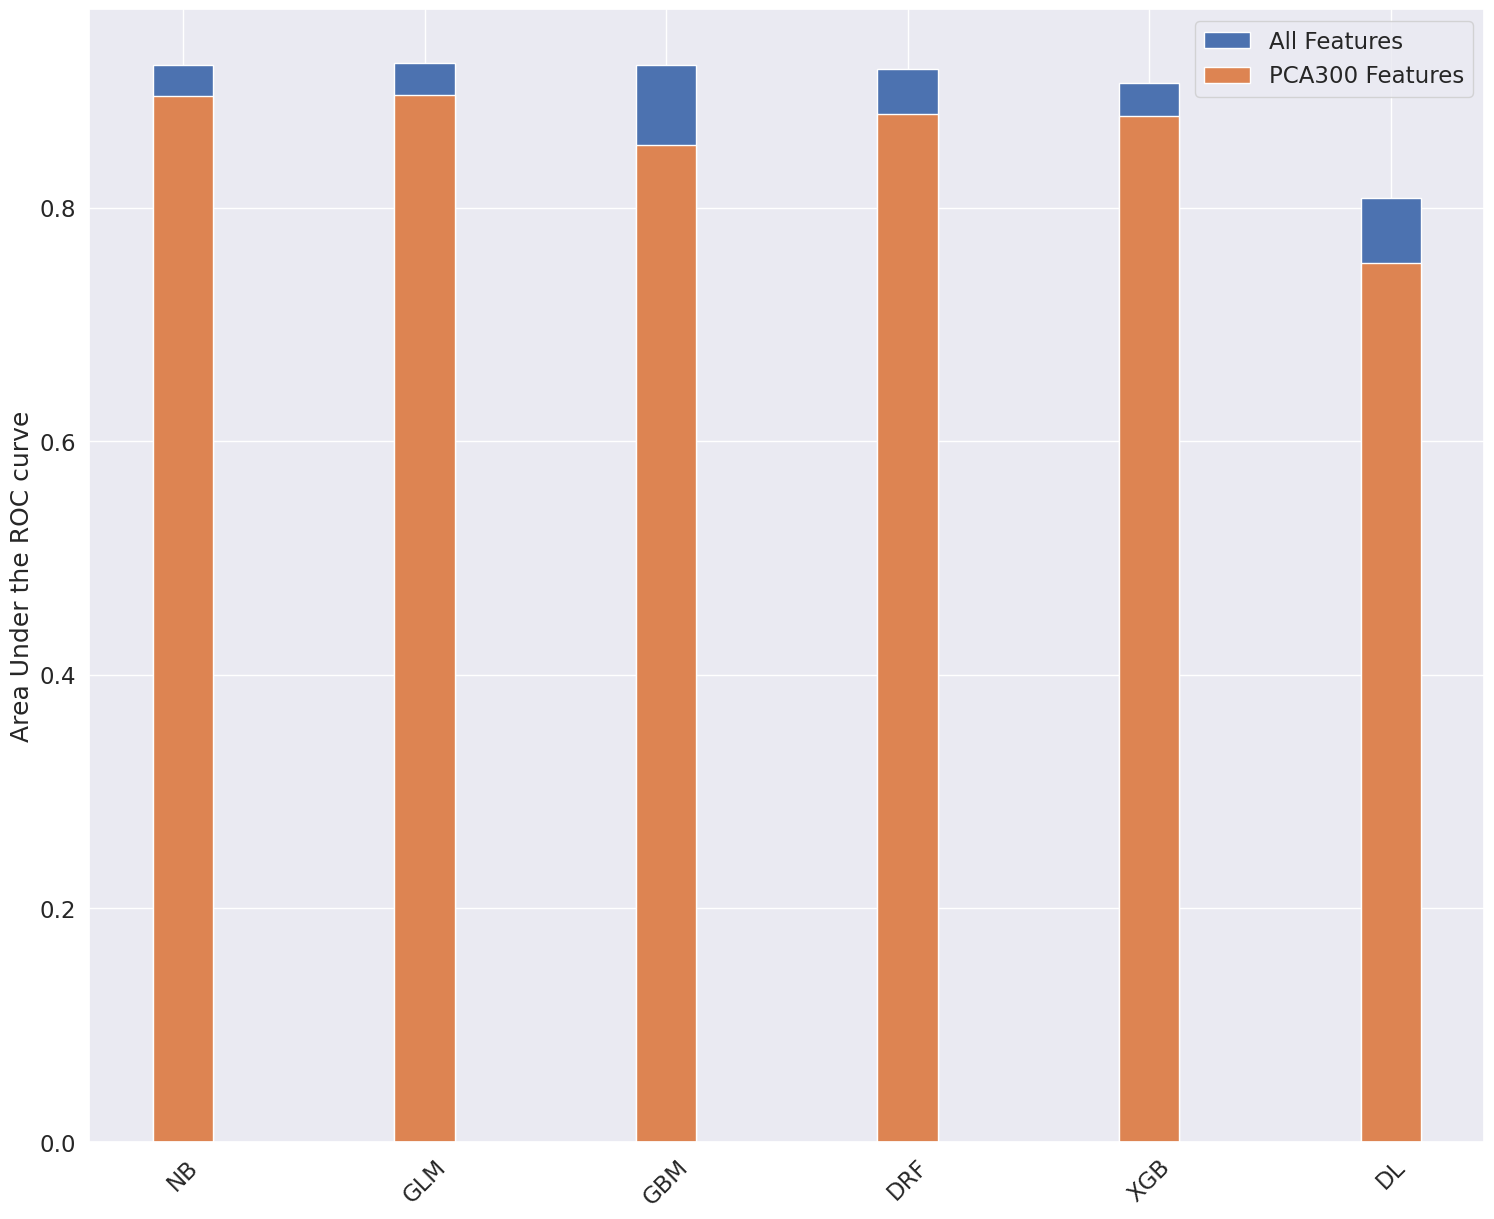

In [30]:
# NOTE: Performance of Stacked Models with Checkpoint Base Learners

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
 

 
plt.figure(
    figsize=(18,15),
    dpi=100)

# set width of bar
barWidth = 0.25
 
#---------------------

# NOTE: Performance of Stacked Models with Checkpoint Base Learners

bars1 = [0.9221498226950354, # NB
         0.9235534869976358, # GLM
         0.9223847517730496, # GBM
         0.9191282505910165, # DRF
         0.9068676122931443, # XGB
         0.8082505910165484  # DL
]


bars2 = [0.8956368203309693, # NB
         0.8965174349881797, # GLM
         0.854057328605201,  # GBM
         0.8804920212765958, # DRF
         0.8786244089834515, # XGB
         0.7530082742316785  # DL
]

#---------------------

# HTBC-Resistant
# bars3 = [21, 156, 0, 7, 87, 67]
# HTBC-Sensitive
# bars4 = [35, 66, 0, 2, 9, 49]


# Heights of bars1 + bars2
bars12_h = np.add(bars1, bars2).tolist()
bars34_h = np.add(bars3, bars4).tolist()
 


# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

 

# Create brown bars
plt.bar(r1, bars1, edgecolor='white', width=barWidth, label='All Features')
# Create green bars (middle), on top of the firs ones
plt.bar(r1, bars2, bottom=0, edgecolor='white', width=barWidth, label='PCA300 Features')

 

# # Create brown bars
# plt.bar(r2, bars3, edgecolor='white', width=barWidth, label='HTBC-Resistant')
# # Create green bars (middle), on top of the firs ones
# plt.bar(r2, bars4, bottom=bars3, edgecolor='white', width=barWidth, label='HTBC-Sensitive')

 

# Custom X axis
plt.xticks([r1 for r1 in range(len(bars1))], ['NB', 'GLM', 'GBM', 'DRF', 'XGB', 'DL'])

plt.xticks(rotation=45)

 
plt.ylabel('Area Under the ROC curve') 
# plt.xlabel('Class of Algorithms') 


# Show graphic
plt.legend()
plt.show()

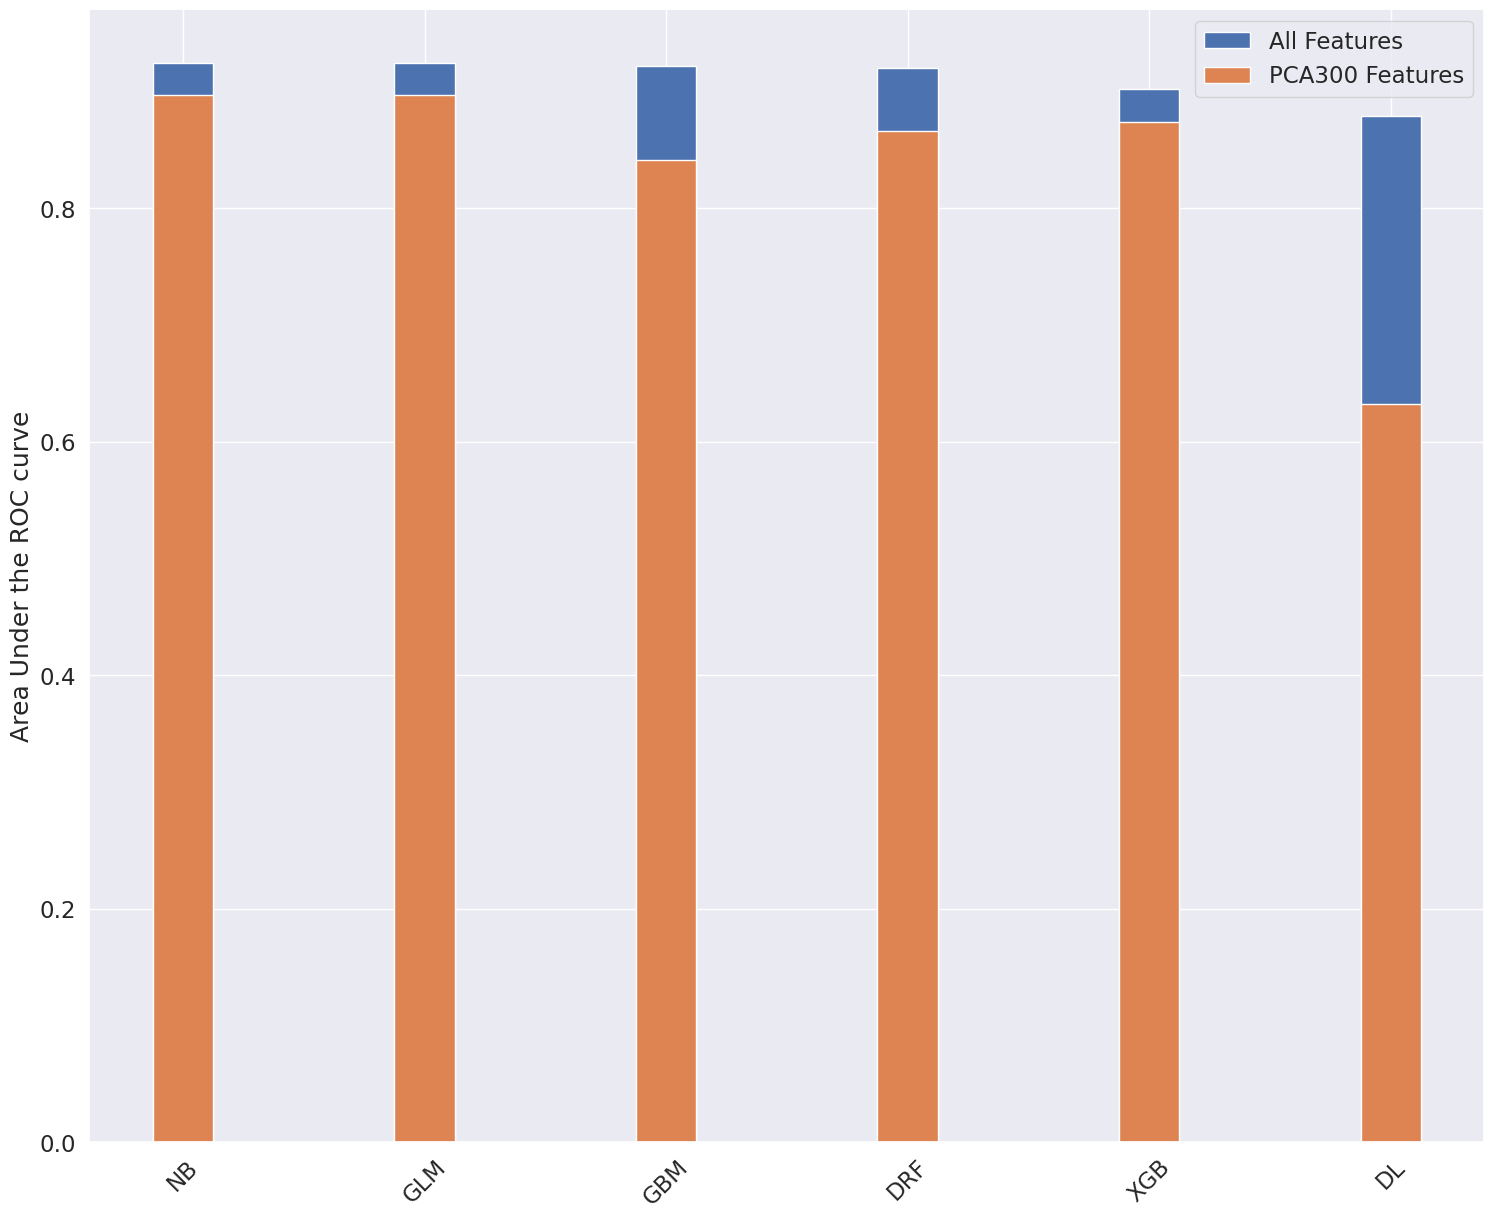

In [31]:
# NOTE: Performance of Stacked Models with Minimal Checkpoint Base Learners

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
 

 
plt.figure(
    figsize=(18,15),
    dpi=100)

# set width of bar
barWidth = 0.25
 
#---------------------

# NOTE: Performance of Stacked Models with Minimal Checkpoint Base Learners

bars1 = [0.9242686170212766, # NB
         0.9242213356973995, # GLM
         0.9218543144208038, # GBM
         0.9200059101654847, # DRF
         0.9019355791962175, # XGB
         0.8788741134751773  # DL
]


bars2 = [0.8972680260047281, # NB
         0.8967715721040189, # GLM
         0.8412086288416076, # GBM
         0.8663593380614658, # DRF
         0.8744400118203309, # XGB
         0.6323758865248227  # DL
]

#---------------------

# HTBC-Resistant
# bars3 = [21, 156, 0, 7, 87, 67]
# HTBC-Sensitive
# bars4 = [35, 66, 0, 2, 9, 49]


# Heights of bars1 + bars2
bars12_h = np.add(bars1, bars2).tolist()
bars34_h = np.add(bars3, bars4).tolist()
 


# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

 

# Create brown bars
plt.bar(r1, bars1, edgecolor='white', width=barWidth, label='All Features')
# Create green bars (middle), on top of the firs ones
plt.bar(r1, bars2, bottom=0, edgecolor='white', width=barWidth, label='PCA300 Features')

 

# # Create brown bars
# plt.bar(r2, bars3, edgecolor='white', width=barWidth, label='HTBC-Resistant')
# # Create green bars (middle), on top of the firs ones
# plt.bar(r2, bars4, bottom=bars3, edgecolor='white', width=barWidth, label='HTBC-Sensitive')

 

# Custom X axis
plt.xticks([r1 for r1 in range(len(bars1))], ['NB', 'GLM', 'GBM', 'DRF', 'XGB', 'DL'])

plt.xticks(rotation=45)

 
plt.ylabel('Area Under the ROC curve') 
# plt.xlabel('Class of Algorithms') 


# Show graphic
plt.legend()
plt.show()

## Combined Stacked Ensemble Metrics

'stacked_ensemble_ALL_FEATURES_ALL_MODELS_metalearner_deeplearning'
'stacked_ensemble_ALL_FEATURES_ALL_MODELS_metalearner_drf'
'stacked_ensemble_ALL_FEATURES_ALL_MODELS_metalearner_gbm'
'stacked_ensemble_ALL_FEATURES_ALL_MODELS_metalearner_glm'
'stacked_ensemble_ALL_FEATURES_ALL_MODELS_metalearner_naivebayes'
'stacked_ensemble_ALL_FEATURES_ALL_MODELS_metalearner_xgboost'
'stacked_ensemble_PCA300_FEATURES_ALL_MODELS_metalearner_deeplearning'
'stacked_ensemble_PCA300_FEATURES_ALL_MODELS_metalearner_drf'
'stacked_ensemble_PCA300_FEATURES_ALL_MODELS_metalearner_gbm'
'stacked_ensemble_PCA300_FEATURES_ALL_MODELS_metalearner_glm'
'stacked_ensemble_PCA300_FEATURES_ALL_MODELS_metalearner_naivebayes'
'stacked_ensemble_PCA300_FEATURES_ALL_MODELS_metalearner_xgboost'
'stacked_ensemble_ALL_FEATURES_CHECKPOINT_MODELS_metalearner_deeplearning'
'stacked_ensemble_ALL_FEATURES_CHECKPOINT_MODELS_metalearner_drf'
'stacked_ensemble_ALL_FEATURES_CHECKPOINT_MODELS_metalearner_gbm'
'stacked_ensemble_ALL_FEATU

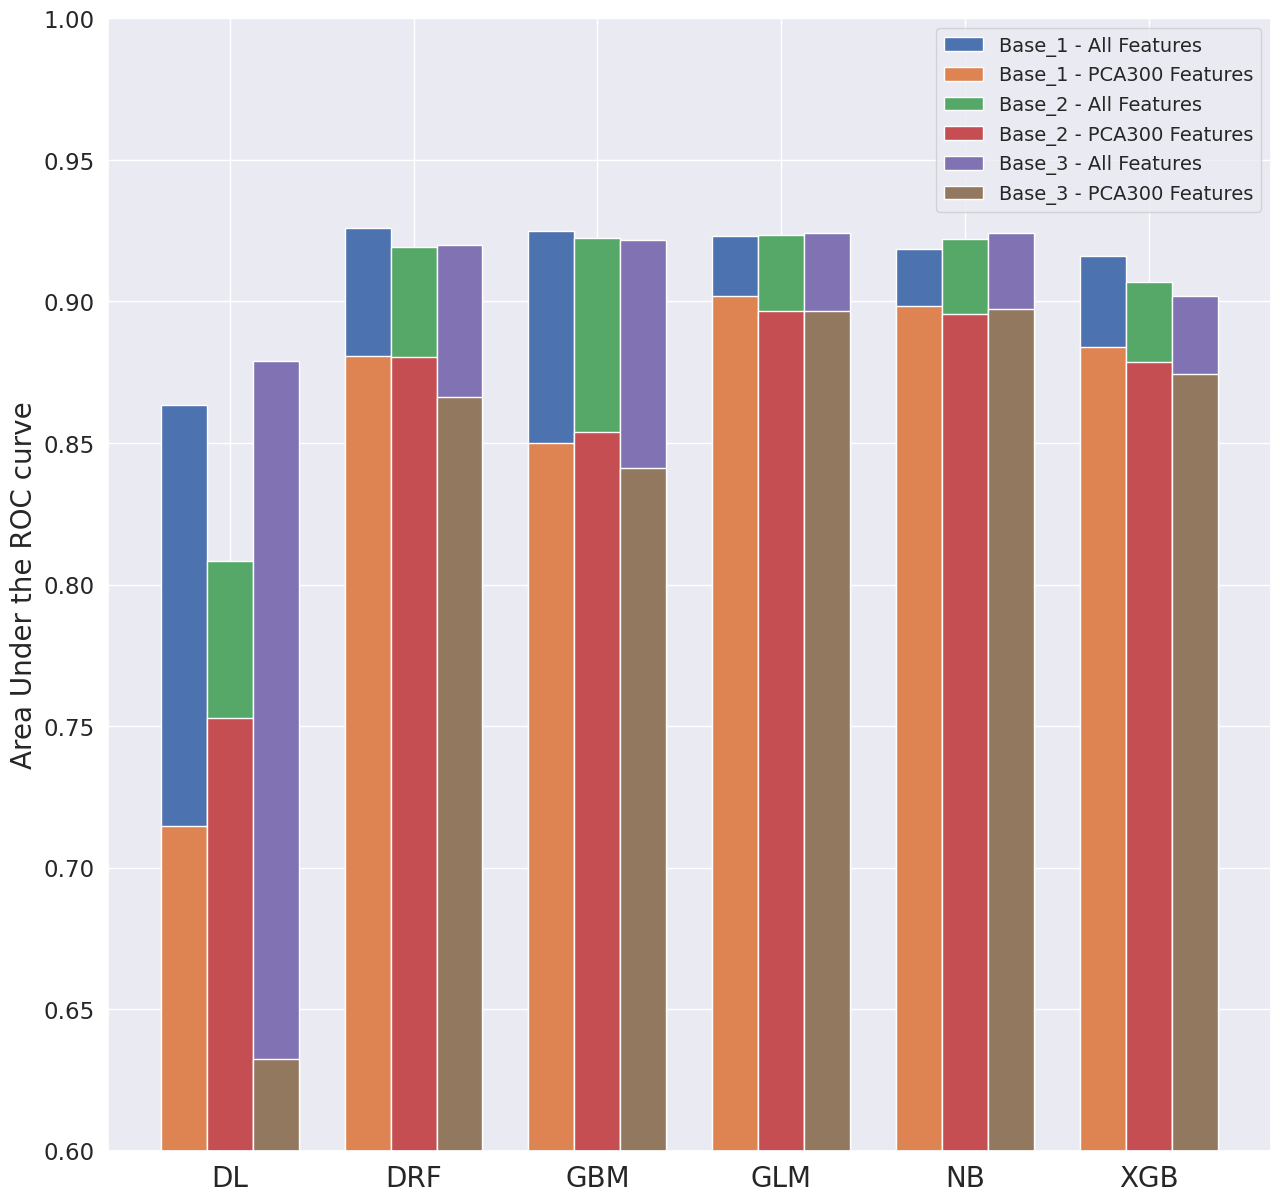

In [47]:
# NOTE: Performance of Top Models

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
 

 



fig = plt.figure(
    figsize=(15,15),
    dpi=100)

ax = fig.add_subplot(1, 1, 1)


# set width of bar
barWidth = 0.25
 

bars1 = []

for mdl_tuple in all_final_model_metrics[12:24:2]:
    perf_dict = mdl_tuple[1]
    bars1.append(perf_dict['XVal AUC'])
    pp.pprint(perf_dict['model_id'])





bars2 = []

for mdl_tuple in all_final_model_metrics[13:24:2]:
    perf_dict = mdl_tuple[1]
    bars2.append(perf_dict['XVal AUC'])
    pp.pprint(perf_dict['model_id'])





#---------------------

# NOTE: Performance of Stacked Models with Checkpoint Base Learners


bars3 = []

for mdl_tuple in all_final_model_metrics[24:36:2]:
    perf_dict = mdl_tuple[1]
    bars3.append(perf_dict['XVal AUC'])
    pp.pprint(perf_dict['model_id'])





bars4 = []

for mdl_tuple in all_final_model_metrics[25:36:2]:
    perf_dict = mdl_tuple[1]
    bars4.append(perf_dict['XVal AUC'])
    pp.pprint(perf_dict['model_id'])




#---------------------

#---------------------

# NOTE: Performance of Stacked Models with Minimal Checkpoint Base Learners

bars5 = []

for mdl_tuple in all_final_model_metrics[36:48:2]:
    perf_dict = mdl_tuple[1]
    bars5.append(perf_dict['XVal AUC'])
    pp.pprint(perf_dict['model_id'])





bars6 = []

for mdl_tuple in all_final_model_metrics[37:48:2]:
    perf_dict = mdl_tuple[1]
    bars6.append(perf_dict['XVal AUC'])
    pp.pprint(perf_dict['model_id'])



#---------------------


# Heights of bars3 + bars2
bars34_h = np.add(bars3, bars2).tolist()
bars56_h = np.add(bars5, bars6).tolist()
 


# Set position of bar on X axis
r1 = np.arange(len(bars3))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]




# Create brown bars
plt.bar(r1, bars1, edgecolor='white', width=barWidth, label='Base_1 - All Features')
# Create green bars (middle), on top of the firs ones
plt.bar(r1, bars2, bottom=0, edgecolor='white', width=barWidth, label='Base_1 - PCA300 Features')

 
 

# Create brown bars
plt.bar(r2, bars3, edgecolor='white', width=barWidth, label='Base_2 - All Features')
# Create green bars (middle), on top of the firs ones
plt.bar(r2, bars4, bottom=0, edgecolor='white', width=barWidth, label='Base_2 - PCA300 Features')

 

# # Create brown bars
plt.bar(r3, bars5, edgecolor='white', width=barWidth, label='Base_3 - All Features')
# # Create green bars (middle), on top of the firs ones
plt.bar(r3, bars6, bottom=0, edgecolor='white', width=barWidth, label='Base_3 - PCA300 Features')

 

# Custom X axis
plt.xticks([r1 + barWidth for r1 in range(len(bars3))], ['DL', 'DRF', 'GBM', 'GLM', 'NB', 'XGB'], fontsize= 20)

# plt.xticks(rotation=45)

ax.set_ylim(0.6, 1)

 
plt.ylabel('Area Under the ROC curve', fontsize= 20) 
# plt.xlabel('Class of Algorithms') 


# Show graphic
plt.legend(fontsize= 14)
plt.show()

'stacked_ensemble_ALL_FEATURES_ALL_MODELS_metalearner_deeplearning'
'stacked_ensemble_ALL_FEATURES_ALL_MODELS_metalearner_drf'
'stacked_ensemble_ALL_FEATURES_ALL_MODELS_metalearner_gbm'
'stacked_ensemble_ALL_FEATURES_ALL_MODELS_metalearner_glm'
'stacked_ensemble_ALL_FEATURES_ALL_MODELS_metalearner_naivebayes'
'stacked_ensemble_ALL_FEATURES_ALL_MODELS_metalearner_xgboost'
'stacked_ensemble_PCA300_FEATURES_ALL_MODELS_metalearner_deeplearning'
'stacked_ensemble_PCA300_FEATURES_ALL_MODELS_metalearner_drf'
'stacked_ensemble_PCA300_FEATURES_ALL_MODELS_metalearner_gbm'
'stacked_ensemble_PCA300_FEATURES_ALL_MODELS_metalearner_glm'
'stacked_ensemble_PCA300_FEATURES_ALL_MODELS_metalearner_naivebayes'
'stacked_ensemble_PCA300_FEATURES_ALL_MODELS_metalearner_xgboost'
'stacked_ensemble_ALL_FEATURES_CHECKPOINT_MODELS_metalearner_deeplearning'
'stacked_ensemble_ALL_FEATURES_CHECKPOINT_MODELS_metalearner_drf'
'stacked_ensemble_ALL_FEATURES_CHECKPOINT_MODELS_metalearner_gbm'
'stacked_ensemble_ALL_FEATU

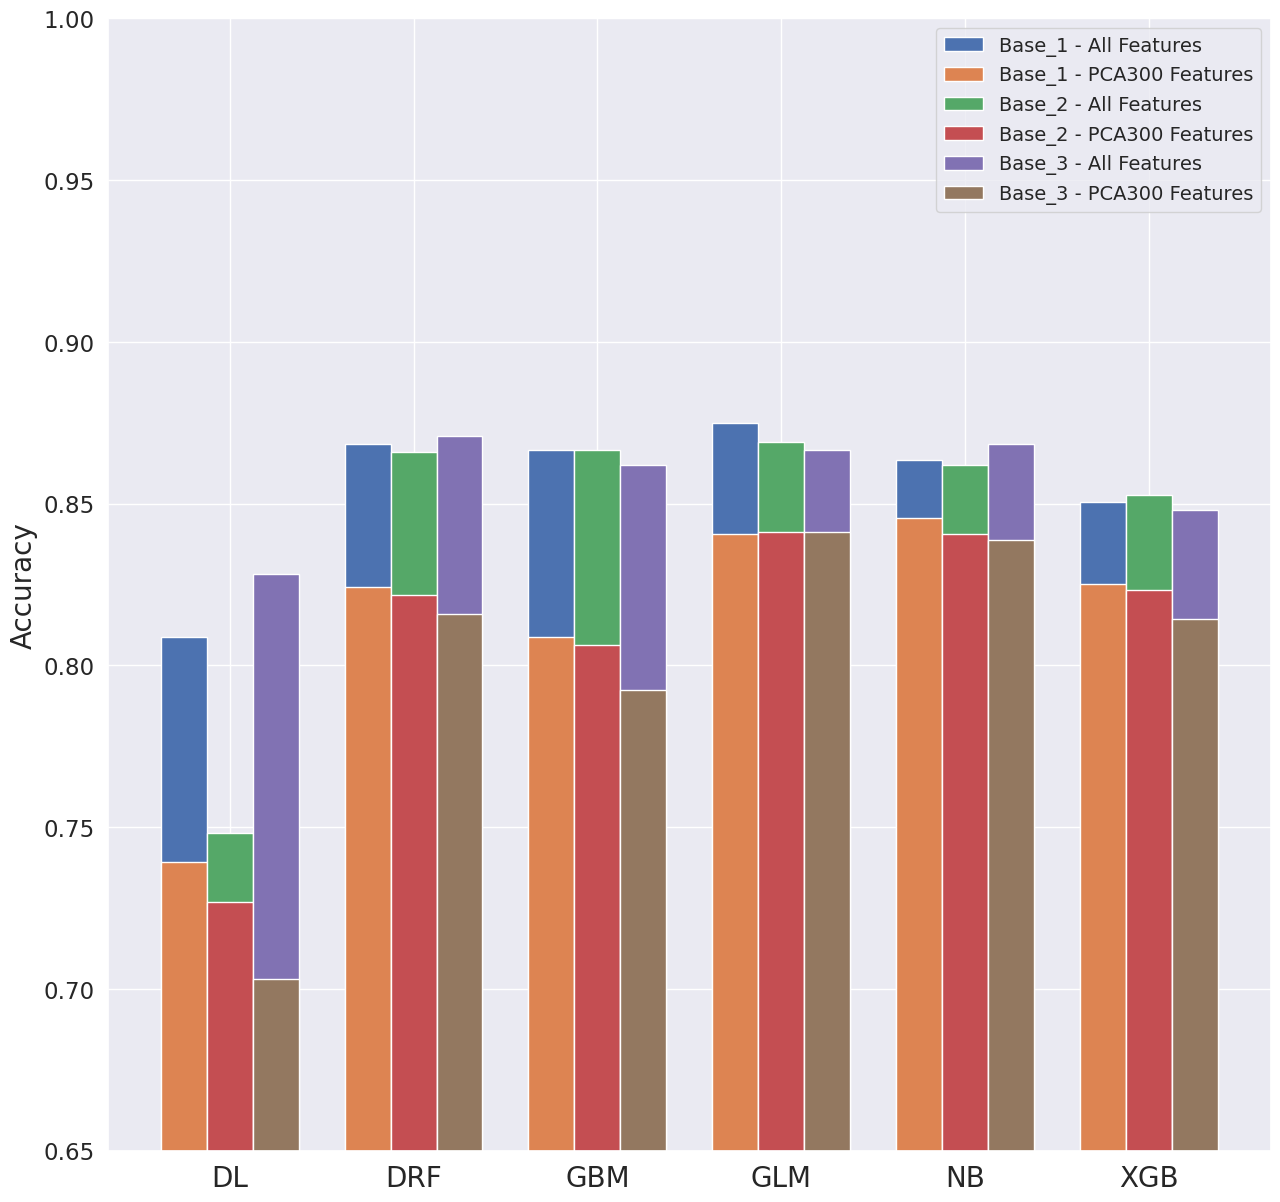

In [50]:
# NOTE: Performance of Top Models

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
 

 



fig = plt.figure(
    figsize=(15,15),
    dpi=100)

ax = fig.add_subplot(1, 1, 1)


# set width of bar
barWidth = 0.25
 

bars1 = []

for mdl_tuple in all_final_model_metrics[12:24:2]:
    perf_dict = mdl_tuple[1]
    bars1.append(perf_dict['XVal Accuracy'])
    pp.pprint(perf_dict['model_id'])





bars2 = []

for mdl_tuple in all_final_model_metrics[13:24:2]:
    perf_dict = mdl_tuple[1]
    bars2.append(perf_dict['XVal Accuracy'])
    pp.pprint(perf_dict['model_id'])





#---------------------

# NOTE: Performance of Stacked Models with Checkpoint Base Learners


bars3 = []

for mdl_tuple in all_final_model_metrics[24:36:2]:
    perf_dict = mdl_tuple[1]
    bars3.append(perf_dict['XVal Accuracy'])
    pp.pprint(perf_dict['model_id'])





bars4 = []

for mdl_tuple in all_final_model_metrics[25:36:2]:
    perf_dict = mdl_tuple[1]
    bars4.append(perf_dict['XVal Accuracy'])
    pp.pprint(perf_dict['model_id'])




#---------------------

#---------------------

# NOTE: Performance of Stacked Models with Minimal Checkpoint Base Learners

bars5 = []

for mdl_tuple in all_final_model_metrics[36:48:2]:
    perf_dict = mdl_tuple[1]
    bars5.append(perf_dict['XVal Accuracy'])
    pp.pprint(perf_dict['model_id'])





bars6 = []

for mdl_tuple in all_final_model_metrics[37:48:2]:
    perf_dict = mdl_tuple[1]
    bars6.append(perf_dict['XVal Accuracy'])
    pp.pprint(perf_dict['model_id'])



#---------------------


# Heights of bars3 + bars2
bars34_h = np.add(bars3, bars2).tolist()
bars56_h = np.add(bars5, bars6).tolist()
 


# Set position of bar on X axis
r1 = np.arange(len(bars3))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]




# Create brown bars
plt.bar(r1, bars1, edgecolor='white', width=barWidth, label='Base_1 - All Features')
# Create green bars (middle), on top of the firs ones
plt.bar(r1, bars2, bottom=0, edgecolor='white', width=barWidth, label='Base_1 - PCA300 Features')

 
 

# Create brown bars
plt.bar(r2, bars3, edgecolor='white', width=barWidth, label='Base_2 - All Features')
# Create green bars (middle), on top of the firs ones
plt.bar(r2, bars4, bottom=0, edgecolor='white', width=barWidth, label='Base_2 - PCA300 Features')

 

# # Create brown bars
plt.bar(r3, bars5, edgecolor='white', width=barWidth, label='Base_3 - All Features')
# # Create green bars (middle), on top of the firs ones
plt.bar(r3, bars6, bottom=0, edgecolor='white', width=barWidth, label='Base_3 - PCA300 Features')

 

# Custom X axis
plt.xticks([r1 + barWidth for r1 in range(len(bars3))], ['DL', 'DRF', 'GBM', 'GLM', 'NB', 'XGB'], fontsize= 20)

# plt.xticks(rotation=45)

ax.set_ylim(0.65, 1)

 
plt.ylabel('Accuracy', fontsize= 20) 
# plt.xlabel('Class of Algorithms') 


# Show graphic
plt.legend(fontsize= 14)
plt.show()

'stacked_ensemble_ALL_FEATURES_ALL_MODELS_metalearner_deeplearning'
'stacked_ensemble_ALL_FEATURES_ALL_MODELS_metalearner_drf'
'stacked_ensemble_ALL_FEATURES_ALL_MODELS_metalearner_gbm'
'stacked_ensemble_ALL_FEATURES_ALL_MODELS_metalearner_glm'
'stacked_ensemble_ALL_FEATURES_ALL_MODELS_metalearner_naivebayes'
'stacked_ensemble_ALL_FEATURES_ALL_MODELS_metalearner_xgboost'
'stacked_ensemble_ALL_FEATURES_ALL_MODELS_metalearner_deeplearning'
'stacked_ensemble_ALL_FEATURES_ALL_MODELS_metalearner_drf'
'stacked_ensemble_ALL_FEATURES_ALL_MODELS_metalearner_gbm'
'stacked_ensemble_ALL_FEATURES_ALL_MODELS_metalearner_glm'
'stacked_ensemble_ALL_FEATURES_ALL_MODELS_metalearner_naivebayes'
'stacked_ensemble_ALL_FEATURES_ALL_MODELS_metalearner_xgboost'
'stacked_ensemble_ALL_FEATURES_CHECKPOINT_MODELS_metalearner_deeplearning'
'stacked_ensemble_ALL_FEATURES_CHECKPOINT_MODELS_metalearner_drf'
'stacked_ensemble_ALL_FEATURES_CHECKPOINT_MODELS_metalearner_gbm'
'stacked_ensemble_ALL_FEATURES_CHECKPOINT_MOD

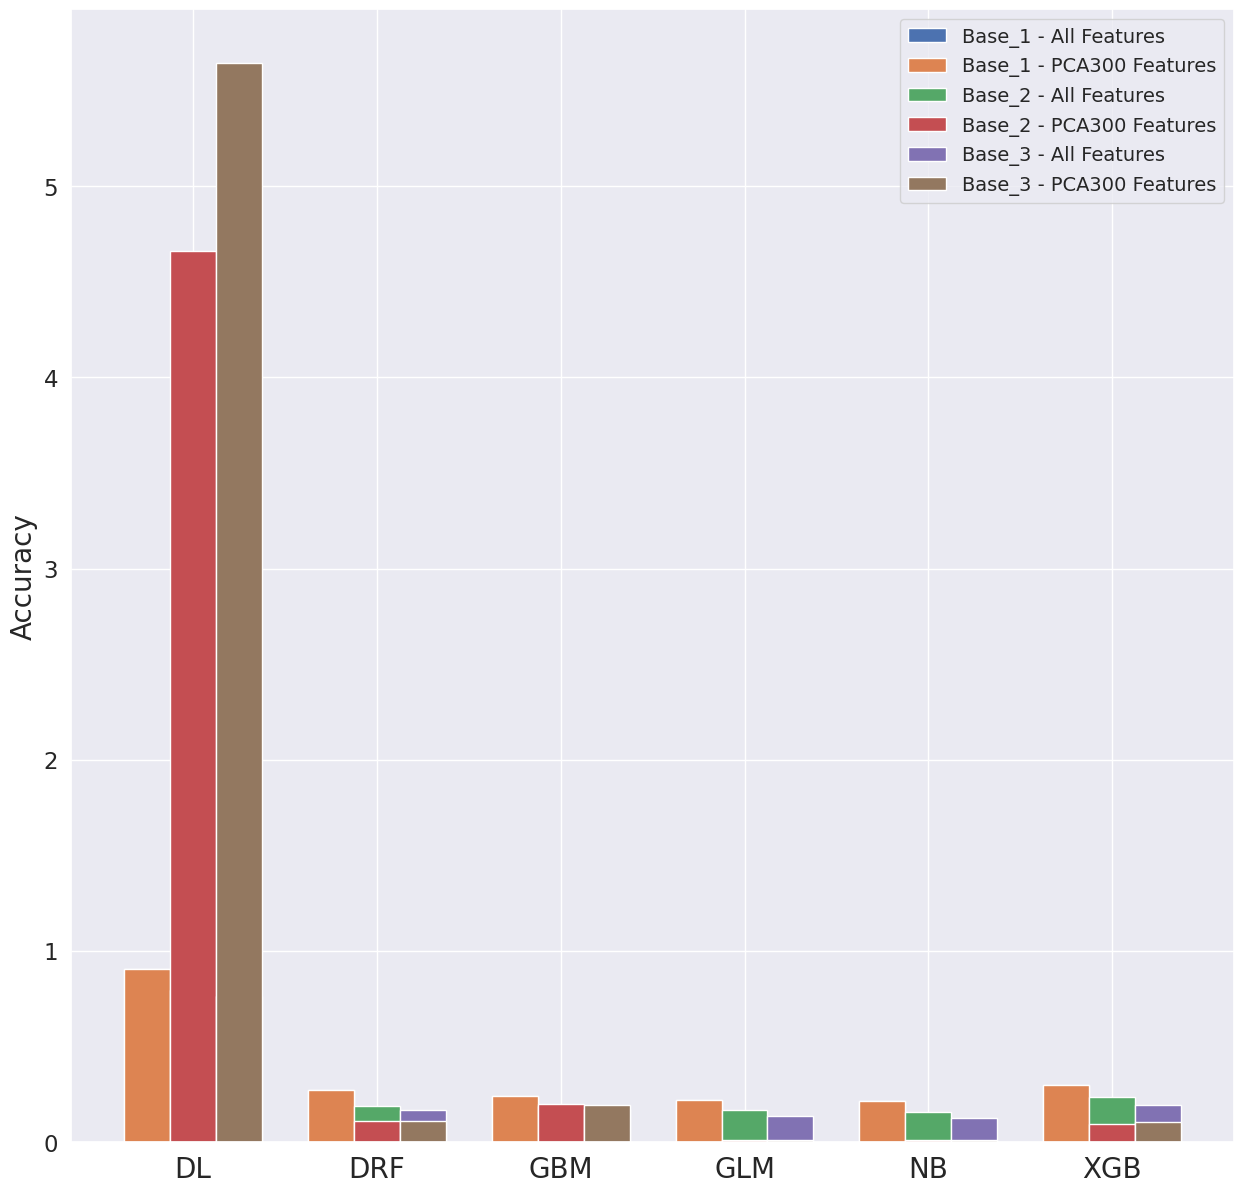

In [55]:
# NOTE: Performance of Top Models

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
 

 



fig = plt.figure(
    figsize=(15,15),
    dpi=100)

ax = fig.add_subplot(1, 1, 1)


# set width of bar
barWidth = 0.25
 

bars1 = []

for mdl_tuple in all_final_model_metrics[12:24:2]:
    perf_dict = mdl_tuple[1]
    bars1.append(perf_dict['Training time (ms)'])
    pp.pprint(perf_dict['model_id'])





bars2 = []

for mdl_tuple in all_final_model_metrics[12:24:2]:
    perf_dict = mdl_tuple[1]
    bars2.append(perf_dict['Training time (ms)'])
    pp.pprint(perf_dict['model_id'])



bars1 = list(map(lambda x: millis_to_minutes(x), 
bars1
))



bars2 = list(map(lambda x: millis_to_minutes(x), 
bars2
))




#-------------------------------------------------


bars3 = []

for mdl_tuple in all_final_model_metrics[24:36:2]:
    perf_dict = mdl_tuple[1]
    bars3.append(perf_dict['Training time (ms)'])
    pp.pprint(perf_dict['model_id'])





bars4 = []

for mdl_tuple in all_final_model_metrics[25:36:2]:
    perf_dict = mdl_tuple[1]
    bars4.append(perf_dict['Training time (ms)'])
    pp.pprint(perf_dict['model_id'])

bars3 = list(map(lambda x: millis_to_minutes(x), 
bars3
))



bars4 = list(map(lambda x: millis_to_minutes(x), 
bars4
))

#-------------------------------------------------



bars5 = []

for mdl_tuple in all_final_model_metrics[36:48:2]:
    perf_dict = mdl_tuple[1]
    bars5.append(perf_dict['Training time (ms)'])
    pp.pprint(perf_dict['model_id'])



bars6 = []

for mdl_tuple in all_final_model_metrics[37:48:2]:
    perf_dict = mdl_tuple[1]
    bars6.append(perf_dict['Training time (ms)'])
    pp.pprint(perf_dict['model_id'])



bars5 = list(map(lambda x: millis_to_minutes(x), 
bars5
))



bars6 = list(map(lambda x: millis_to_minutes(x), 
bars6
))
#-------------------------------------------------



#---------------------


# Heights of bars3 + bars2
bars34_h = np.add(bars3, bars2).tolist()
bars56_h = np.add(bars5, bars6).tolist()
 


# Set position of bar on X axis
r1 = np.arange(len(bars3))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]




# Create brown bars
plt.bar(r1, bars1, edgecolor='white', width=barWidth, label='Base_1 - All Features')
# Create green bars (middle), on top of the firs ones
plt.bar(r1, bars2, bottom=0, edgecolor='white', width=barWidth, label='Base_1 - PCA300 Features')

 
 

# Create brown bars
plt.bar(r2, bars3, edgecolor='white', width=barWidth, label='Base_2 - All Features')
# Create green bars (middle), on top of the firs ones
plt.bar(r2, bars4, bottom=0, edgecolor='white', width=barWidth, label='Base_2 - PCA300 Features')

 

# # Create brown bars
plt.bar(r3, bars5, edgecolor='white', width=barWidth, label='Base_3 - All Features')
# # Create green bars (middle), on top of the firs ones
plt.bar(r3, bars6, bottom=0, edgecolor='white', width=barWidth, label='Base_3 - PCA300 Features')

 

# Custom X axis
plt.xticks([r1 + barWidth for r1 in range(len(bars3))], ['DL', 'DRF', 'GBM', 'GLM', 'NB', 'XGB'], fontsize= 20)

# plt.xticks(rotation=45)

# ax.set_ylim(0.65, 1)

 
plt.ylabel('Accuracy', fontsize= 20) 
# plt.xlabel('Class of Algorithms') 


# Show graphic
plt.legend(fontsize= 14)
plt.show()

In [58]:
import matplotlib.pyplot as plt
import numpy as np


bars1 = []

for mdl_tuple in all_final_model_metrics[12:24:2]:
    perf_dict = mdl_tuple[1]
    bars1.append(perf_dict['Training time (ms)'])
    pp.pprint(perf_dict['model_id'])





bars2 = []

for mdl_tuple in all_final_model_metrics[12:24:2]:
    perf_dict = mdl_tuple[1]
    bars2.append(perf_dict['Training time (ms)'])
    pp.pprint(perf_dict['model_id'])



bars1 = list(map(lambda x: millis_to_minutes(x), 
bars1
))



bars2 = list(map(lambda x: millis_to_minutes(x), 
bars2
))




#-------------------------------------------------


bars3 = []

for mdl_tuple in all_final_model_metrics[24:36:2]:
    perf_dict = mdl_tuple[1]
    bars3.append(perf_dict['Training time (ms)'])
    pp.pprint(perf_dict['model_id'])





bars4 = []

for mdl_tuple in all_final_model_metrics[25:36:2]:
    perf_dict = mdl_tuple[1]
    bars4.append(perf_dict['Training time (ms)'])
    pp.pprint(perf_dict['model_id'])

bars3 = list(map(lambda x: millis_to_minutes(x), 
bars3
))



bars4 = list(map(lambda x: millis_to_minutes(x), 
bars4
))

#-------------------------------------------------



bars5 = []

for mdl_tuple in all_final_model_metrics[36:48:2]:
    perf_dict = mdl_tuple[1]
    bars5.append(perf_dict['Training time (ms)'])
    pp.pprint(perf_dict['model_id'])



bars6 = []

for mdl_tuple in all_final_model_metrics[37:48:2]:
    perf_dict = mdl_tuple[1]
    bars6.append(perf_dict['Training time (ms)'])
    pp.pprint(perf_dict['model_id'])



bars5 = list(map(lambda x: millis_to_minutes(x), 
bars5
))



bars6 = list(map(lambda x: millis_to_minutes(x), 
bars6
))
#-------------------------------------------------


fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, figsize=(15,15), dpi=100)

pl1= ax1.bar(bars1, bars2, label = 'Base_1')
ax1.set_ylabel("Base_1")
ax1.set_xlabel("Base_1")

pl2 = ax2.bar(bars3, bars4, label= 'Base_2')
ax2.set_ylabel("Base_2")

pl3 = ax3.bar(bars5 , bars6, label= 'Base_3')
ax3.set_ylabel("Base_3")



plt.xticks([r1 for r1 in range(len(bars3))], ['DL', 'DRF', 'GBM', 'GLM', 'NB', 'XGB'], fontsize= 20)

# plt.legend([pl1, pl2, pl3],['Base_1', 'Base_2', 'Base_3'])
# plt.ylabel("LABEL")

plt.show()

'stacked_ensemble_ALL_FEATURES_ALL_MODELS_metalearner_deeplearning'
'stacked_ensemble_ALL_FEATURES_ALL_MODELS_metalearner_drf'
'stacked_ensemble_ALL_FEATURES_ALL_MODELS_metalearner_gbm'
'stacked_ensemble_ALL_FEATURES_ALL_MODELS_metalearner_glm'
'stacked_ensemble_ALL_FEATURES_ALL_MODELS_metalearner_naivebayes'
'stacked_ensemble_ALL_FEATURES_ALL_MODELS_metalearner_xgboost'
'stacked_ensemble_ALL_FEATURES_ALL_MODELS_metalearner_deeplearning'
'stacked_ensemble_ALL_FEATURES_ALL_MODELS_metalearner_drf'
'stacked_ensemble_ALL_FEATURES_ALL_MODELS_metalearner_gbm'
'stacked_ensemble_ALL_FEATURES_ALL_MODELS_metalearner_glm'
'stacked_ensemble_ALL_FEATURES_ALL_MODELS_metalearner_naivebayes'
'stacked_ensemble_ALL_FEATURES_ALL_MODELS_metalearner_xgboost'
'stacked_ensemble_ALL_FEATURES_CHECKPOINT_MODELS_metalearner_deeplearning'
'stacked_ensemble_ALL_FEATURES_CHECKPOINT_MODELS_metalearner_drf'
'stacked_ensemble_ALL_FEATURES_CHECKPOINT_MODELS_metalearner_gbm'
'stacked_ensemble_ALL_FEATURES_CHECKPOINT_MOD

TypeError: bar() missing 1 required positional argument: 'height'

'stacked_ensemble_ALL_FEATURES_ALL_MODELS_metalearner_deeplearning'
'stacked_ensemble_ALL_FEATURES_ALL_MODELS_metalearner_drf'
'stacked_ensemble_ALL_FEATURES_ALL_MODELS_metalearner_gbm'
'stacked_ensemble_ALL_FEATURES_ALL_MODELS_metalearner_glm'
'stacked_ensemble_ALL_FEATURES_ALL_MODELS_metalearner_naivebayes'
'stacked_ensemble_ALL_FEATURES_ALL_MODELS_metalearner_xgboost'
'stacked_ensemble_ALL_FEATURES_ALL_MODELS_metalearner_deeplearning'
'stacked_ensemble_ALL_FEATURES_ALL_MODELS_metalearner_drf'
'stacked_ensemble_ALL_FEATURES_ALL_MODELS_metalearner_gbm'
'stacked_ensemble_ALL_FEATURES_ALL_MODELS_metalearner_glm'
'stacked_ensemble_ALL_FEATURES_ALL_MODELS_metalearner_naivebayes'
'stacked_ensemble_ALL_FEATURES_ALL_MODELS_metalearner_xgboost'


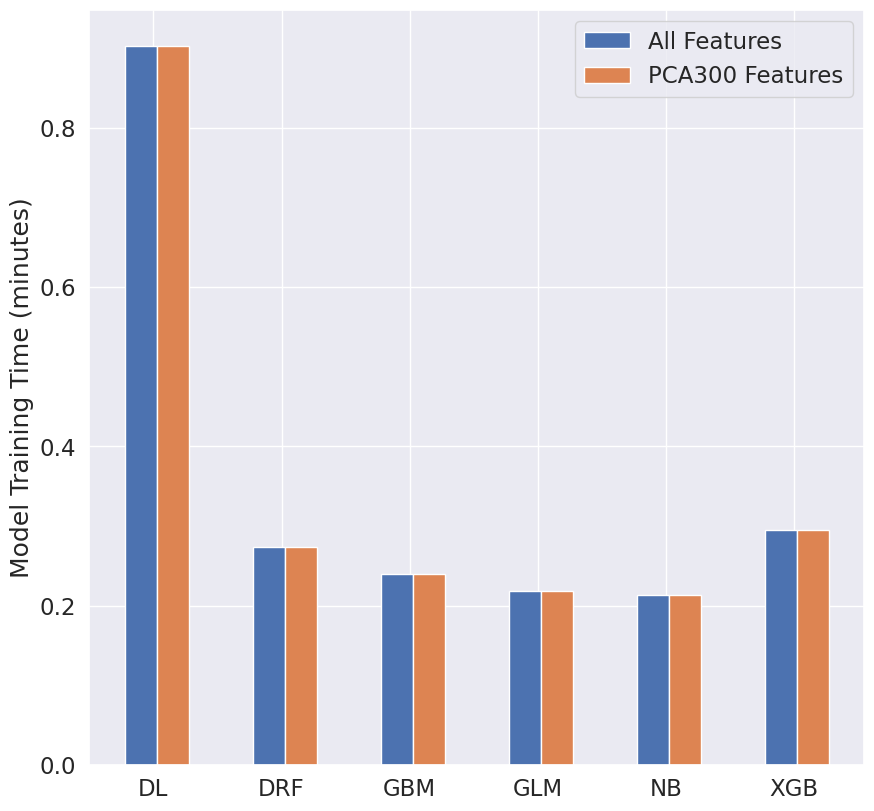

In [59]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
 

plt.figure(
    figsize=(10,10),
    dpi=100)

# set width of bar
barWidth = 0.25
 
 


bars1 = []

for mdl_tuple in all_final_model_metrics[12:24:2]:
    perf_dict = mdl_tuple[1]
    bars1.append(perf_dict['Training time (ms)'])
    pp.pprint(perf_dict['model_id'])





bars2 = []

for mdl_tuple in all_final_model_metrics[12:24:2]:
    perf_dict = mdl_tuple[1]
    bars2.append(perf_dict['Training time (ms)'])
    pp.pprint(perf_dict['model_id'])



bars1 = list(map(lambda x: millis_to_minutes(x), 
bars1
))



bars2 = list(map(lambda x: millis_to_minutes(x), 
bars2
))




#-------------------------------------------------

#-------------------------------------------------



# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, bars1, width=barWidth, edgecolor='white', label='All Features')
plt.bar(r2, bars2, width=barWidth, edgecolor='white', label='PCA300 Features')
 
# Add xticks on the middle of the group bars
# plt.xlabel('Cohort Drug Resistance Profile', fontweight='bold')
plt.xticks([r + 0.10 for r in range(len(bars1))], ['DL', 'DRF', 'GBM', 'GLM', 'NB', 'XGB'])
# plt.xticks(rotation=45)

plt.ylabel('Model Training Time (minutes)') 

# pyplot.xlabel('Statistics for samples with 500+ mutations') 


# Create legend & Show graphic
plt.legend()
plt.show()

In [ ]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
 

plt.figure(
    figsize=(10,10),
    dpi=100)

# set width of bar
barWidth = 0.25
 
 



bars3 = []

for mdl_tuple in all_final_model_metrics[24:36:2]:
    perf_dict = mdl_tuple[1]
    bars3.append(perf_dict['Training time (ms)'])
    pp.pprint(perf_dict['model_id'])





bars4 = []

for mdl_tuple in all_final_model_metrics[25:36:2]:
    perf_dict = mdl_tuple[1]
    bars4.append(perf_dict['Training time (ms)'])
    pp.pprint(perf_dict['model_id'])

bars3 = list(map(lambda x: millis_to_minutes(x), 
bars3
))



bars4 = list(map(lambda x: millis_to_minutes(x), 
bars4
))

#-------------------------------------------------






#-------------------------------------------------

#-------------------------------------------------



# Set position of bar on X axis
r1 = np.arange(len(bars3))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, bars3, width=barWidth, edgecolor='white', label='All Features')
plt.bar(r2, bars4, width=barWidth, edgecolor='white', label='PCA300 Features')
 
# Add xticks on the middle of the group bars
# plt.xlabel('Cohort Drug Resistance Profile', fontweight='bold')
plt.xticks([r + 0.10 for r in range(len(bars3))], ['DL', 'DRF', 'GBM', 'GLM', 'NB', 'XGB'])
# plt.xticks(rotation=45)

plt.ylabel('Model Training Time (minutes)') 

# pyplot.xlabel('Statistics for samples with 500+ mutations') 


# Create legend & Show graphic
plt.legend()
plt.show()

In [ ]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
 

plt.figure(
    figsize=(10,10),
    dpi=100)

# set width of bar
barWidth = 0.25
 
 



bars5 = []

for mdl_tuple in all_final_model_metrics[36:48:2]:
    perf_dict = mdl_tuple[1]
    bars5.append(perf_dict['Training time (ms)'])
    pp.pprint(perf_dict['model_id'])



bars6 = []

for mdl_tuple in all_final_model_metrics[37:48:2]:
    perf_dict = mdl_tuple[1]
    bars6.append(perf_dict['Training time (ms)'])
    pp.pprint(perf_dict['model_id'])



bars5 = list(map(lambda x: millis_to_minutes(x), 
bars5
))



bars6 = list(map(lambda x: millis_to_minutes(x), 
bars6
))
#-------------------------------------------------





#-------------------------------------------------

#-------------------------------------------------



# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, bars1, width=barWidth, edgecolor='white', label='All Features')
plt.bar(r2, bars2, width=barWidth, edgecolor='white', label='PCA300 Features')
 
# Add xticks on the middle of the group bars
# plt.xlabel('Cohort Drug Resistance Profile', fontweight='bold')
plt.xticks([r + 0.10 for r in range(len(bars1))], ['DL', 'DRF', 'GBM', 'GLM', 'NB', 'XGB'])
# plt.xticks(rotation=45)

plt.ylabel('Model Training Time (minutes)') 

# pyplot.xlabel('Statistics for samples with 500+ mutations') 


# Create legend & Show graphic
plt.legend()
plt.show()

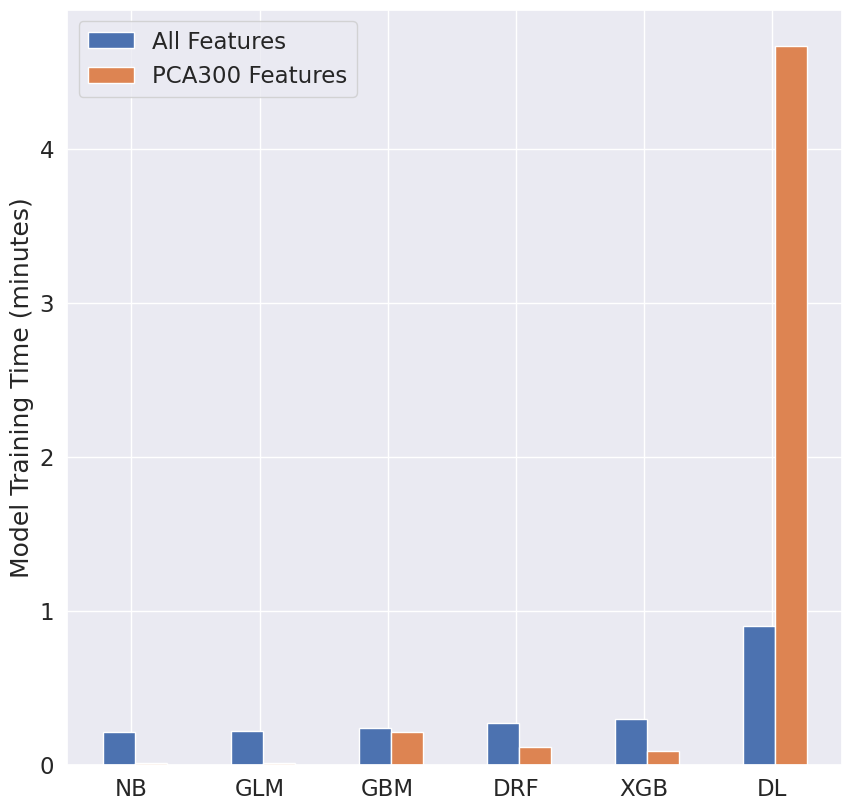

In [139]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
 

plt.figure(
    figsize=(10,10),
    dpi=100)

# set width of bar
barWidth = 0.25
 

# ALL BASE LEARNERS

bars1 = list(map(lambda x: millis_to_minutes(x), 
[12785,  # NB
13136,    # GLM
14372,   # GBM
16388, # DRF
17681,    # XGB
54195   # DL 
] 
))



bars2 = list(map(lambda x: millis_to_minutes(x), 
[655, # NB
685,     # GLM
12611,   # GBM
7132,    # DRF
5528,    # XGB
280253    # DL
]
))



# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, bars1, width=barWidth, edgecolor='white', label='All Features')
plt.bar(r2, bars2, width=barWidth, edgecolor='white', label='PCA300 Features')
 
# Add xticks on the middle of the group bars
# plt.xlabel('Cohort Drug Resistance Profile', fontweight='bold')
plt.xticks([r + 0.10 for r in range(len(bars1))], ['NB', 'GLM', 'GBM', 'DRF', 'XGB', 'DL'])
# plt.xticks(rotation=45)

plt.ylabel('Model Training Time (minutes)') 

# pyplot.xlabel('Statistics for samples with 500+ mutations') 


# Create legend & Show graphic
plt.legend()
plt.show()

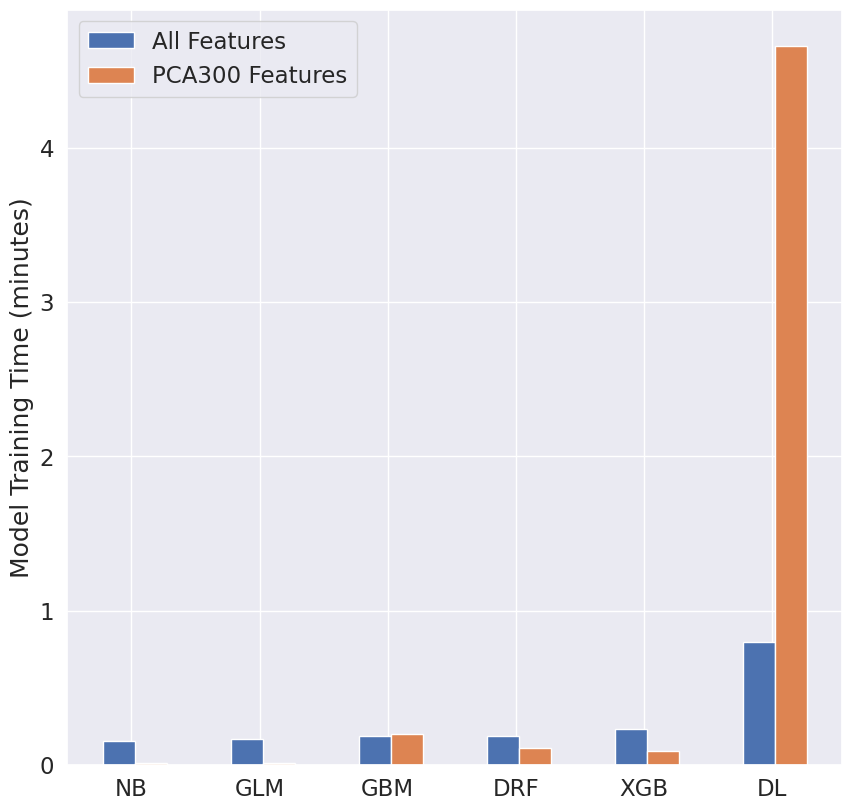

In [137]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
 

plt.figure(
    figsize=(10,10),
    dpi=100)

# set width of bar
barWidth = 0.25
 

# ALL BASE LEARNERS

bars1 = list(map(lambda x: millis_to_minutes(x), 
[9295,  # NB
9850,    # GLM
11276,   # GBM
11379, # DRF
14069,    # XGB
47602   # DL 
] 
))



bars2 = list(map(lambda x: millis_to_minutes(x), 
[601, # NB
597,     # GLM
11894,   # GBM
6638,    # DRF
5439,    # XGB
279786    # DL
]
))



# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, bars1, width=barWidth, edgecolor='white', label='All Features')
plt.bar(r2, bars2, width=barWidth, edgecolor='white', label='PCA300 Features')
 
# Add xticks on the middle of the group bars
# plt.xlabel('Cohort Drug Resistance Profile', fontweight='bold')
plt.xticks([r + 0.10 for r in range(len(bars1))], ['NB', 'GLM', 'GBM', 'DRF', 'XGB', 'DL'])
# plt.xticks(rotation=45)

plt.ylabel('Model Training Time (minutes)') 

# pyplot.xlabel('Statistics for samples with 500+ mutations') 


# Create legend & Show graphic
plt.legend()
plt.show()

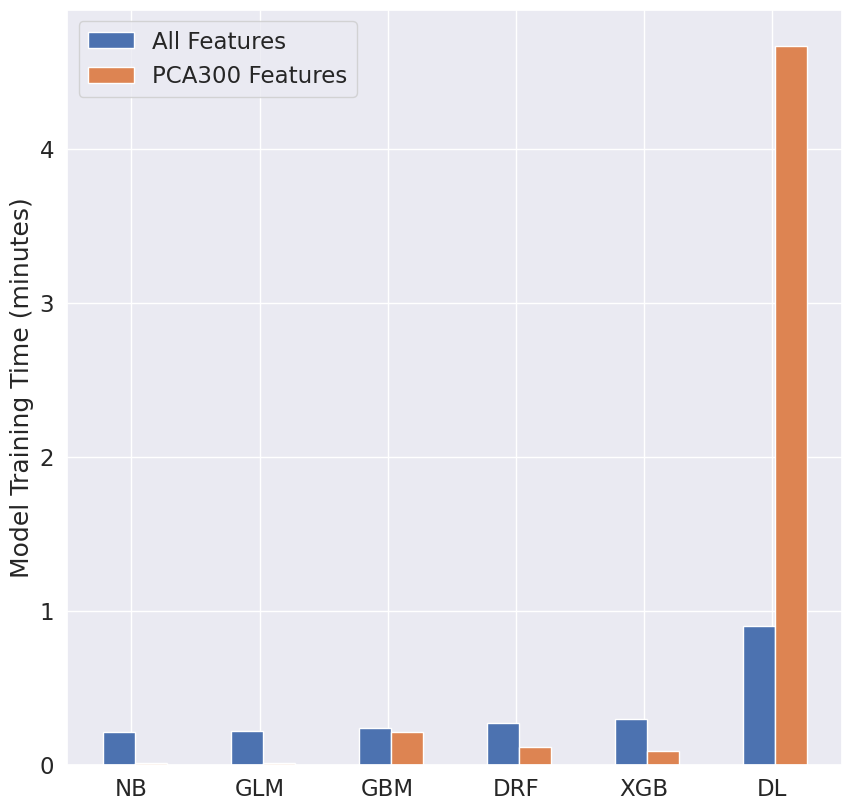

In [140]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
 

plt.figure(
    figsize=(10,10),
    dpi=100)

# set width of bar
barWidth = 0.25
 

# ALL BASE LEARNERS

bars1 = list(map(lambda x: millis_to_minutes(x), 
[12785,  # NB
13136,    # GLM
14372,   # GBM
16388, # DRF
17681,    # XGB
54195   # DL 
] 
))



bars2 = list(map(lambda x: millis_to_minutes(x), 
[655, # NB
685,     # GLM
12611,   # GBM
7132,    # DRF
5528,    # XGB
280253    # DL
]
))



# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, bars1, width=barWidth, edgecolor='white', label='All Features')
plt.bar(r2, bars2, width=barWidth, edgecolor='white', label='PCA300 Features')
 
# Add xticks on the middle of the group bars
# plt.xlabel('Cohort Drug Resistance Profile', fontweight='bold')
plt.xticks([r + 0.10 for r in range(len(bars1))], ['NB', 'GLM', 'GBM', 'DRF', 'XGB', 'DL'])
# plt.xticks(rotation=45)

plt.ylabel('Model Training Time (minutes)') 

# pyplot.xlabel('Statistics for samples with 500+ mutations') 


# Create legend & Show graphic
plt.legend()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


bars1 = []

for mdl_tuple in all_final_model_metrics[12:24:2]:
    perf_dict = mdl_tuple[1]
    bars1.append(perf_dict['Training time (ms)'])
    pp.pprint(perf_dict['model_id'])





bars2 = []

for mdl_tuple in all_final_model_metrics[12:24:2]:
    perf_dict = mdl_tuple[1]
    bars2.append(perf_dict['Training time (ms)'])
    pp.pprint(perf_dict['model_id'])



bars1 = list(map(lambda x: millis_to_minutes(x), 
bars1
))



bars2 = list(map(lambda x: millis_to_minutes(x), 
bars2
))




#-------------------------------------------------


bars3 = []

for mdl_tuple in all_final_model_metrics[24:36:2]:
    perf_dict = mdl_tuple[1]
    bars3.append(perf_dict['Training time (ms)'])
    pp.pprint(perf_dict['model_id'])





bars4 = []

for mdl_tuple in all_final_model_metrics[25:36:2]:
    perf_dict = mdl_tuple[1]
    bars4.append(perf_dict['Training time (ms)'])
    pp.pprint(perf_dict['model_id'])

bars3 = list(map(lambda x: millis_to_minutes(x), 
bars3
))



bars4 = list(map(lambda x: millis_to_minutes(x), 
bars4
))

#-------------------------------------------------



bars5 = []

for mdl_tuple in all_final_model_metrics[36:48:2]:
    perf_dict = mdl_tuple[1]
    bars5.append(perf_dict['Training time (ms)'])
    pp.pprint(perf_dict['model_id'])



bars6 = []

for mdl_tuple in all_final_model_metrics[37:48:2]:
    perf_dict = mdl_tuple[1]
    bars6.append(perf_dict['Training time (ms)'])
    pp.pprint(perf_dict['model_id'])



bars5 = list(map(lambda x: millis_to_minutes(x), 
bars5
))



bars6 = list(map(lambda x: millis_to_minutes(x), 
bars6
))
#-------------------------------------------------


fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, figsize=(15,15), dpi=100)

pl1= ax1.bar(bars1, bars2, label = 'Base_1')
ax1.set_ylabel("Base_1")
ax1.set_xlabel("Base_1")

pl2 = ax2.bar(bars3, bars4, label= 'Base_2')
ax2.set_ylabel("Base_2")

pl3 = ax3.bar(bars5 , bars6, label= 'Base_3')
ax3.set_ylabel("Base_3")



plt.xticks([r1 for r1 in range(len(bars3))], ['DL', 'DRF', 'GBM', 'GLM', 'NB', 'XGB'], fontsize= 20)

# plt.legend([pl1, pl2, pl3],['Base_1', 'Base_2', 'Base_3'])
# plt.ylabel("LABEL")

plt.show()